<a href="https://colab.research.google.com/github/CC-Shivansh-Gupta/logistic-_reg/blob/main/v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy, math

std_data = pd.read_csv('Student_Performance.csv')
std_data.columns = std_data.columns.str.replace(' ', '_')
std_data
#print(type(std_data))
#print(std_data.info())

Hours_Studied  Previous_Scores Extracurricular_Activities  Sleep_Hours  \
0                 7               99                        Yes            9   
1                 4               82                         No            4   
2                 8               51                        Yes            7   
3                 5               52                        Yes            5   
4                 7               75                         No            8   
...             ...              ...                        ...          ...   
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8   

      Sample_Question_Papers_Practiced  Performance_Index  
0                                    1               91.0  
1                                    2               65.0  
2                                    2               45.0  
3                                    2               36.0  
4                                    5               66.0  
...                                ...                ...  
9995                                 2               23.0  
9996                                 5               58.0  
9997                                 5               74.0  
9998                                 0               95.0  
9999                                 1               64.0  

[10000 rows x 6 columns]

In [44]:
#std_data.rename(columns={'Extracurricular Activities' : 'Extracurricular'}, inplace = True)
#std_data
std_data = std_data.replace('Yes', '1', regex = True)
std_data = std_data.replace('No', '0', regex = True)
std_data['Extracurricular_Activities'] = std_data['Extracurricular_Activities'].astype('int64')
std_data

Hours_Studied  Previous_Scores  Extracurricular_Activities  Sleep_Hours  \
0                 7               99                           1            9   
1                 4               82                           0            4   
2                 8               51                           1            7   
3                 5               52                           1            5   
4                 7               75                           0            8   
...             ...              ...                         ...          ...   
9995              1               49                           1            4   
9996              7               64                           1            8   
9997              6               83                           1            8   
9998              9               97                           1            7   
9999              7               74                           0            8   

      Sample_Question_Papers_Practiced  Performance_Index  
0                                    1               91.0  
1                                    2               65.0  
2                                    2               45.0  
3                                    2               36.0  
4                                    5               66.0  
...                                ...                ...  
9995                                 2               23.0  
9996                                 5               58.0  
9997                                 5               74.0  
9998                                 0               95.0  
9999                                 1               64.0  

[10000 rows x 6 columns]

In [45]:
def normalise_data(arr):
  #min_val = np.min(arr)
  #max_val = np.max(arr)
  mean = np.mean(arr)
  std = np.std(arr)
  norm_arr = np.zeros(len(arr))
  for i in range(len(arr)):
    norm_arr[i] = (arr[i] - mean) / std
  return norm_arr


In [46]:
for i in range(std_data.shape[1]-1):
  std_data.iloc[:, i] = normalise_data(std_data.iloc[:, i])
std_data

<ipython-input-46-fae890c2cb34>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.77518771 -0.38348058  1.16141048 ...  0.38896495  1.54763324
  0.77518771]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  std_data.iloc[:, i] = normalise_data(std_data.iloc[:, i])
<ipython-input-46-fae890c2cb34>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.70417565  0.72391268 -1.06362569 ...  0.7815752   1.5888506
  0.26261245]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  std_data.iloc[:, i] = normalise_data(std_data.iloc[:, i])
<ipython-input-46-fae890c2cb34>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01045465 -0.98965352  1.01045465 ...  1.01045465  1.01045465
 -0.98965352]' has dtyp

Hours_Studied  Previous_Scores  Extracurricular_Activities  Sleep_Hours  \
0          0.775188         1.704176                    1.010455     1.456205   
1         -0.383481         0.723913                   -0.989654    -1.492294   
2          1.161410        -1.063626                    1.010455     0.276805   
3          0.002742        -1.005963                    1.010455    -0.902594   
4          0.775188         0.320275                   -0.989654     0.866505   
...             ...              ...                         ...          ...   
9995      -1.542149        -1.178951                    1.010455    -1.492294   
9996       0.775188        -0.314013                    1.010455     0.866505   
9997       0.388965         0.781575                    1.010455     0.866505   
9998       1.547633         1.588851                    1.010455     0.276805   
9999       0.775188         0.262612                   -0.989654     0.866505   

      Sample_Question_Papers_Practiced  Performance_Index  
0                            -1.249754               91.0  
1                            -0.900982               65.0  
2                            -0.900982               45.0  
3                            -0.900982               36.0  
4                             0.145333               66.0  
...                                ...                ...  
9995                         -0.900982               23.0  
9996                          0.145333               58.0  
9997                          0.145333               74.0  
9998                         -1.598526               95.0  
9999                         -1.249754               64.0  

[10000 rows x 6 columns]

In [47]:
number = std_data.shape[0]
print(number)
number_train = int(number * 9 / 10)
lam = 0.1
alp = 1

10000


In [48]:
x_train_list = []
for j in range(std_data.shape[1]):
    xj_train = np.zeros(number_train)
    for i in range(number_train):
        xj_train[i] = std_data.iloc[i, j]
    x_train_list.append(xj_train)  # Append xj_train directly to the list

# Separate the features (x_train) from the target (y_train)
x_train_tup = tuple(x_train_list[:-1]) # Exclude the last column (target)
x_train = np.column_stack(x_train_tup)
y_train = x_train_list[-1]  # The last column is the target

print(x_train)
print(y_train)

[[ 0.77518771  1.70417565  1.01045465  1.45620461 -1.24975394]
 [-0.38348058  0.72391268 -0.98965352 -1.49229423 -0.90098215]
 [ 1.16141048 -1.06362569  1.01045465  0.27680507 -0.90098215]
 ...
 [-0.38348058  1.24287543 -0.98965352  0.27680507 -1.24975394]
 [ 1.54763324 -0.71765053 -0.98965352 -0.90259446 -1.59852572]
 [-1.15592611 -0.19868777 -0.98965352 -0.3128947   1.54042034]]
[91. 65. 45. ... 77. 51. 43.]


In [49]:
w_para = np.array([-4.60065594, -0.75392081, -3.94309975, -1.22232583, 6.10488682])
print(w_para)
b_para = 23.647361075152435
print(b_para)

[-4.65295234 -0.76207969 -3.98796864 -1.23596361  6.17399129]
23.427942647094575


In [50]:
def prediction(x, w, b):
  c = np.dot(x, w) + b
  return c

In [51]:
def predict(n, x, w, b):
  predic= np.zeros(n)
  for i in range(n):
    predic[i] = prediction(x[i], w, b)
    #print(predic)
  return predic


In [52]:
pred = predict(number_train, x_train, w_para, b_para)

In [53]:
def loss_calc(p, y):
  loss = 1/2*((p - y) ** 2)
  return loss

In [54]:
def lossss(pr, y, n):
  losses = np.zeros(n)
  for i in range(n):
    losses[i] = loss_calc(pr[i], y[i])
  #print(losses)
  return losses

In [55]:
loss = lossss(pred, y_train, number_train)

In [56]:
def cost_function(losss, l, w):
  costie = np.mean(losss) + (l * np.sum(np.square(w)))/(2*len(losss))
  #print(costie)
  return costie

In [57]:
def rmse(loss):
  rmse = np.sqrt(np.mean(loss))
  return rmse

In [58]:
cost = cost_function(loss, lam, w_para)

In [59]:
def grad_desc(w, b, p, x, y, l, a, n):
  temp_w = copy.deepcopy(w)
  dj_dw = np.zeros(len(w))
  for k in range(len(w)):
    for i in range(n):
      dj_dw[k] = (((p[i] - y[i])/n)*x[i][k]) + ((l*w[k])/n)
      temp_w[k] = w[k] - (a * dj_dw[k])
      dj_db = (p[i] - y[i])/n
      temp_b = b - (a * dj_db)
    w[k] = temp_w[k]
    b = temp_b
  return w, b
  #print(w_para)
  #print(b_para)

In [60]:
'''def grad_desc(w, b, cost, pred, x, y, lam, alp, n):
      dj_dw = (x.T @ (pred - y)) / n + (lam * w) / n
      dj_db = np.mean(pred - y)
      w = w - (alp * dj_dw)
      b = b - (alp * dj_db)
      return w, b'''

'def grad_desc(w, b, cost, pred, x, y, lam, alp, n):\n      dj_dw = (x.T @ (pred - y)) / n + (lam * w) / n\n      dj_db = np.mean(pred - y)\n      w = w - (alp * dj_dw)\n      b = b - (alp * dj_db)\n      return w, b'

In [61]:
w_para, b_para = grad_desc(w_para, b_para, pred, x_train, y_train, lam, alp, number_train)

0th iteration, 765.2963259783617


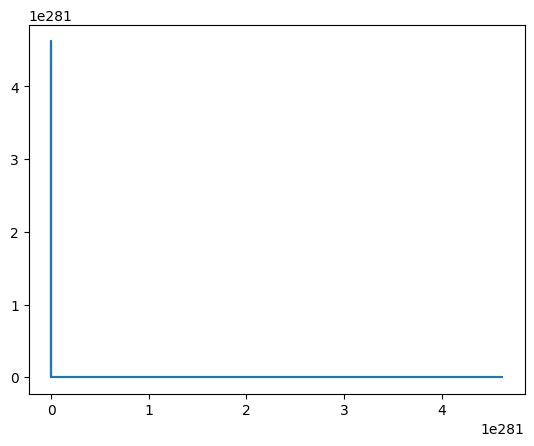

1th iteration, 765.2922031552421


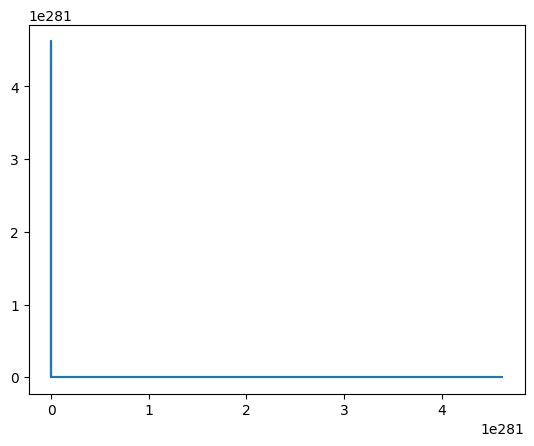

2th iteration, 765.2880803696493


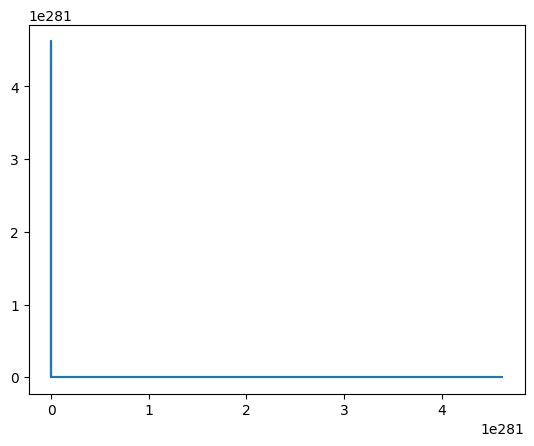

3th iteration, 765.283957621583


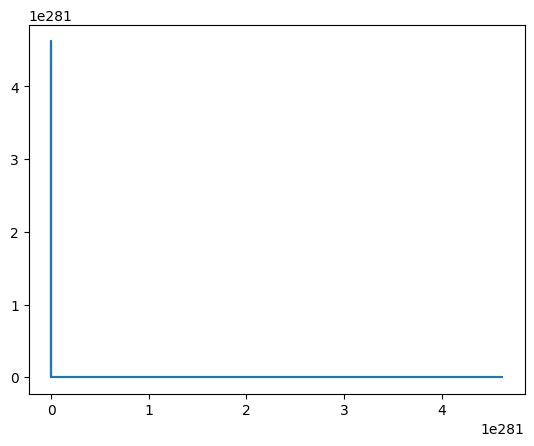

4th iteration, 765.2798349110424


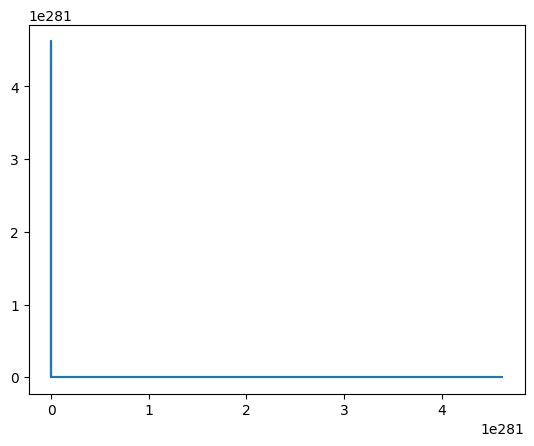

5th iteration, 765.2757122380275


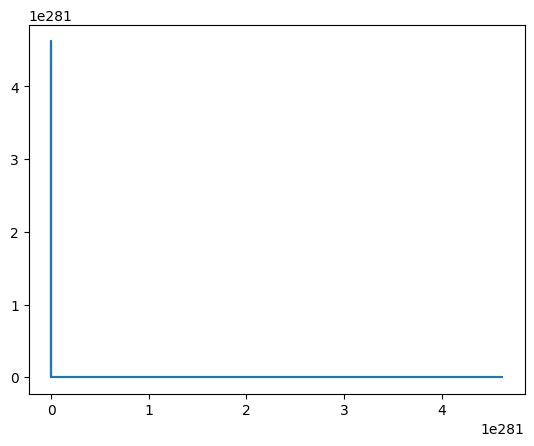

6th iteration, 765.2715896025381


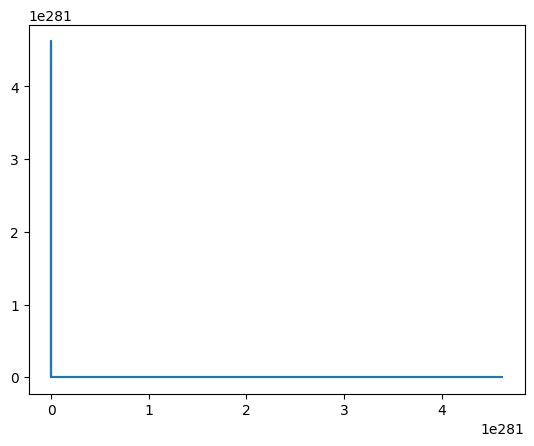

7th iteration, 765.2674670045737


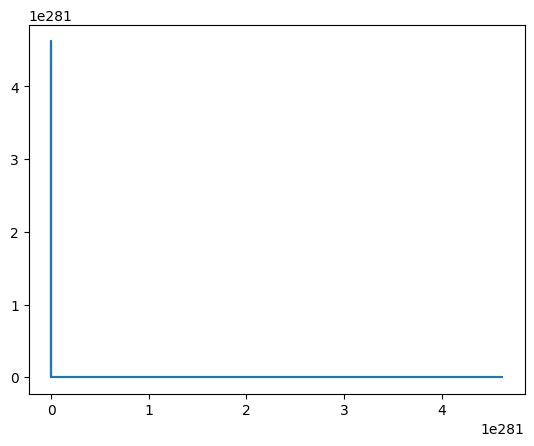

8th iteration, 765.2633444441337


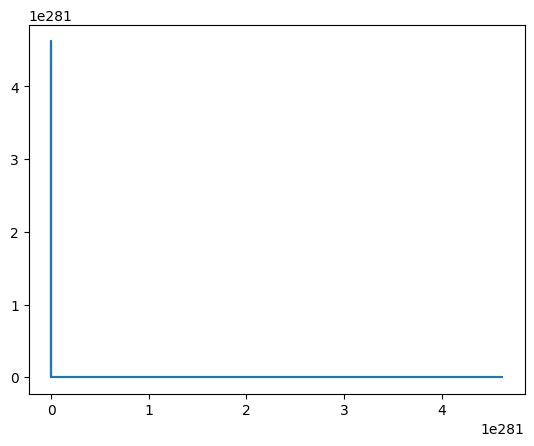

9th iteration, 765.2592219212179


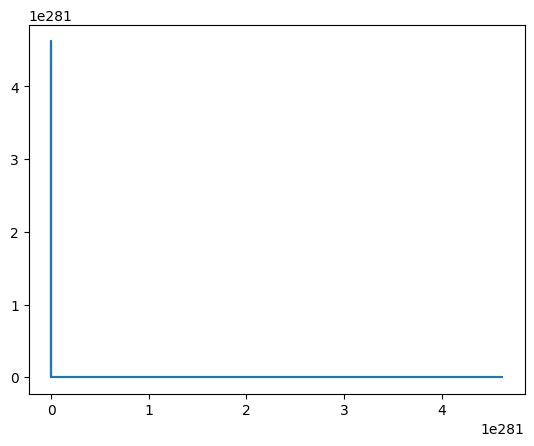

10th iteration, 765.2550994358259


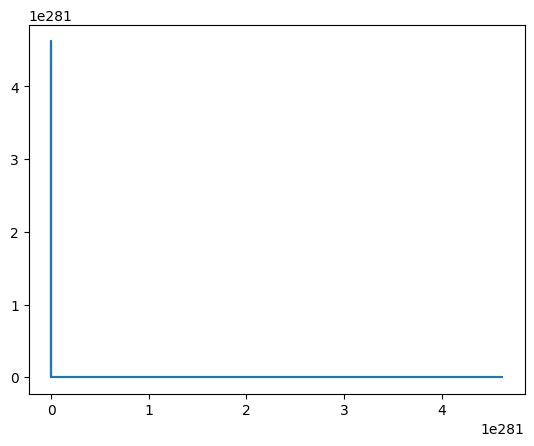

11th iteration, 765.2509769879573


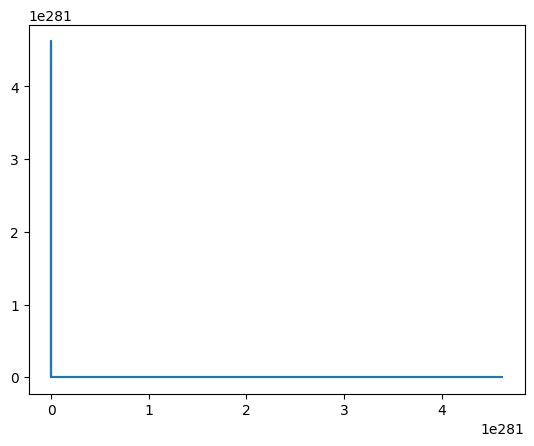

12th iteration, 765.2468545776114


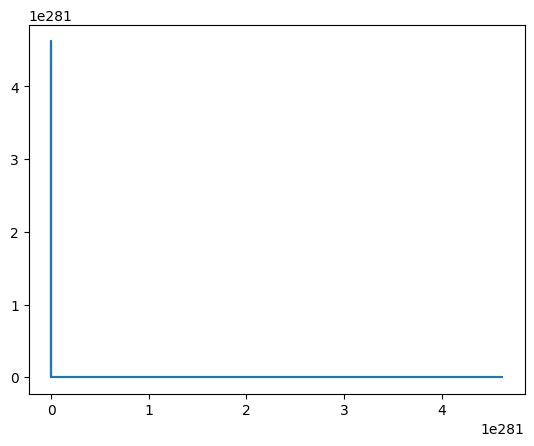

13th iteration, 765.2427322047882


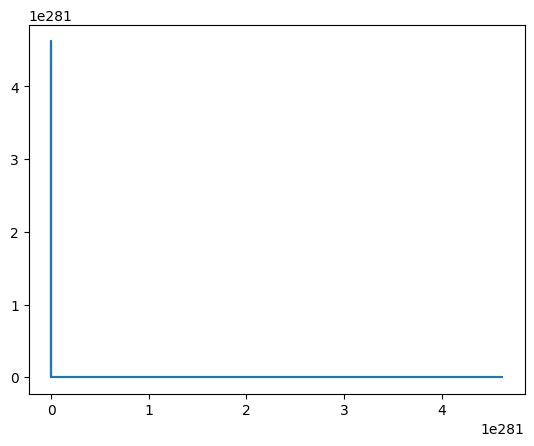

14th iteration, 765.2386098694872


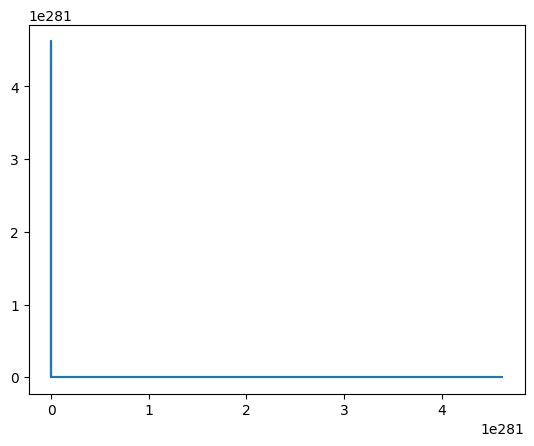

15th iteration, 765.2344875717081


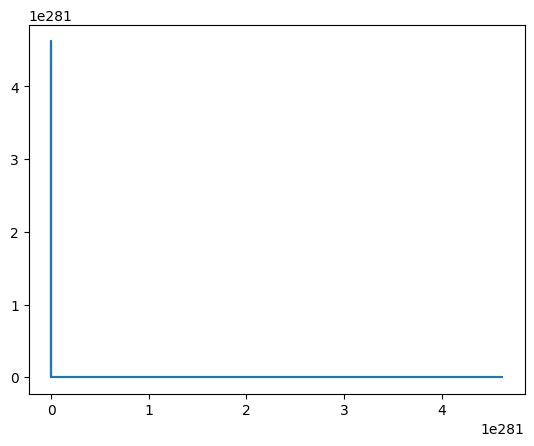

16th iteration, 765.2303653114501


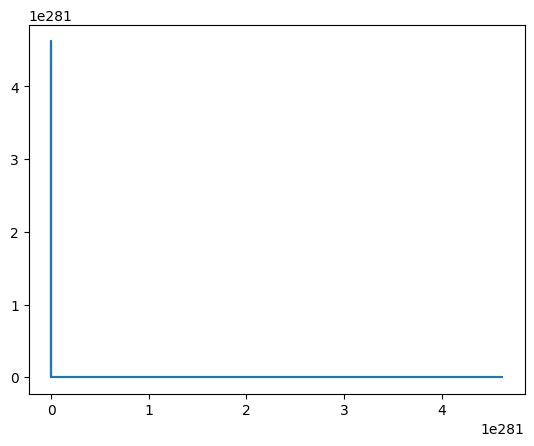

17th iteration, 765.2262430887134


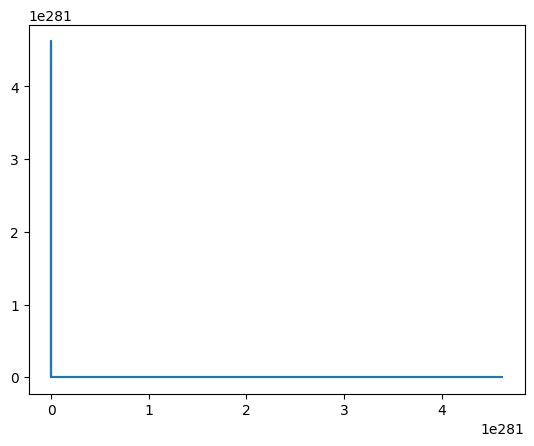

18th iteration, 765.2221209034976


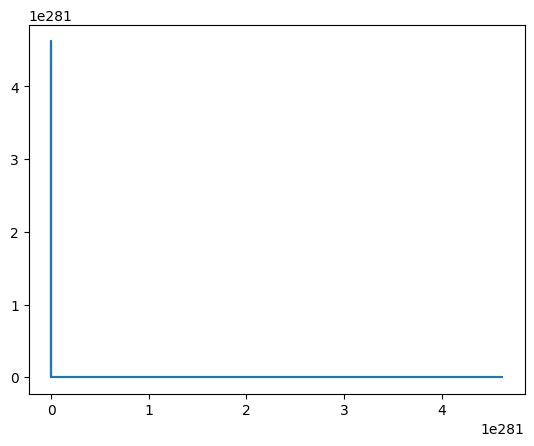

19th iteration, 765.2179987558014


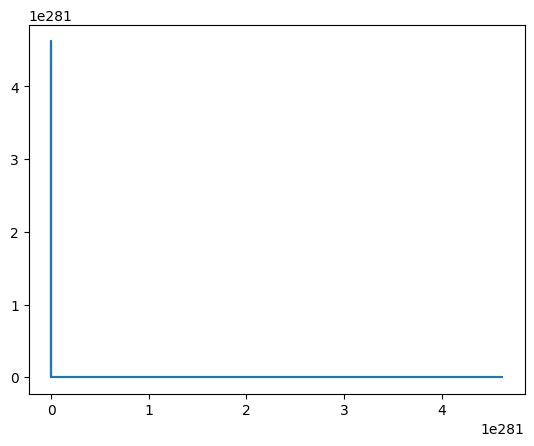

20th iteration, 765.2138766456253


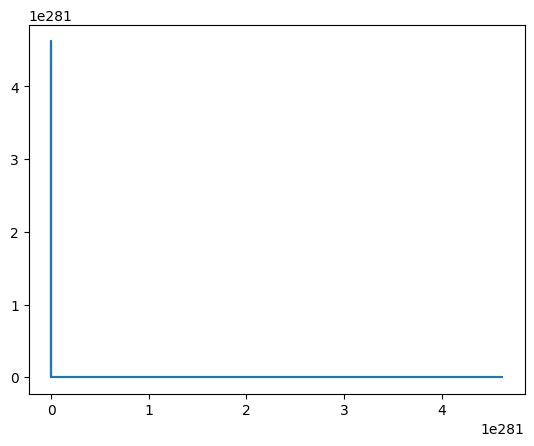

21th iteration, 765.2097545729686


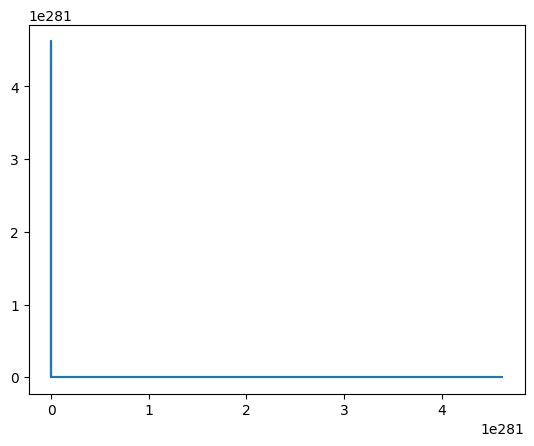

22th iteration, 765.2056325378311


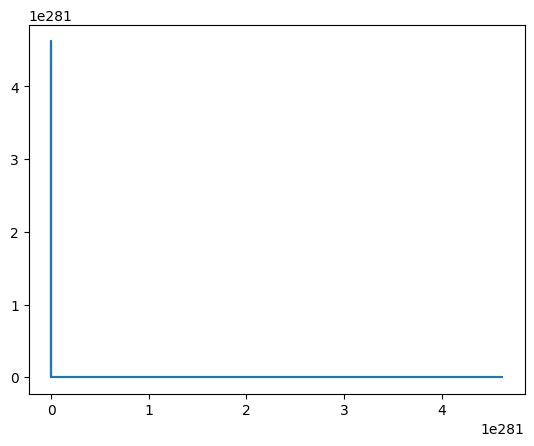

23th iteration, 765.201510540212


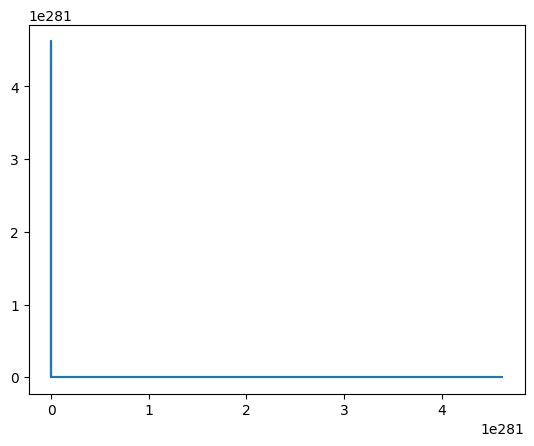

24th iteration, 765.1973885801116


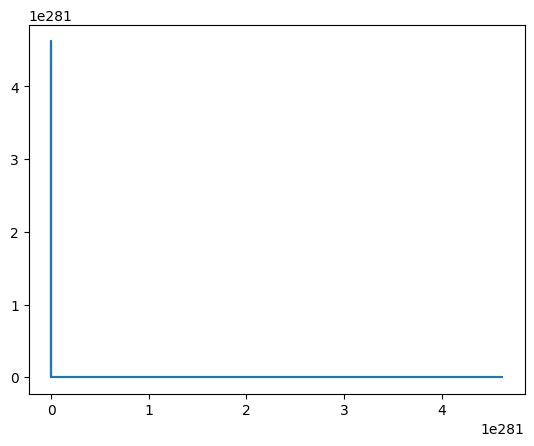

25th iteration, 765.193266657529


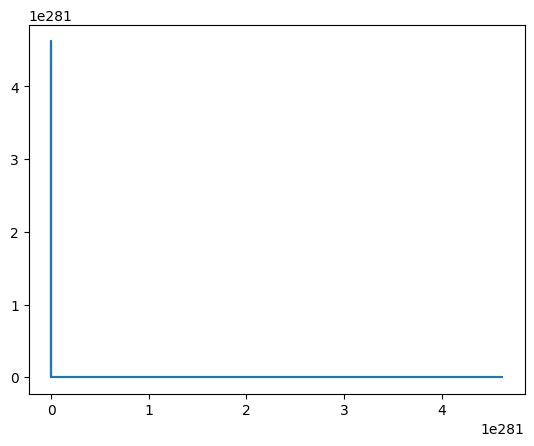

26th iteration, 765.1891447724639


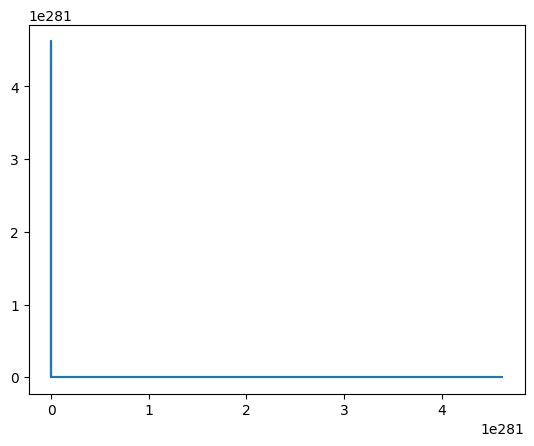

27th iteration, 765.1850229249156


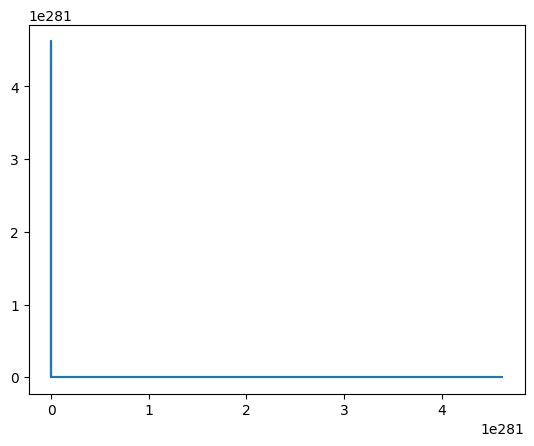

28th iteration, 765.1809011148845


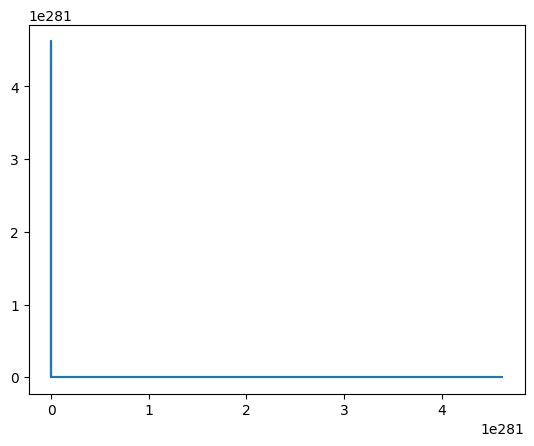

29th iteration, 765.1767793423694


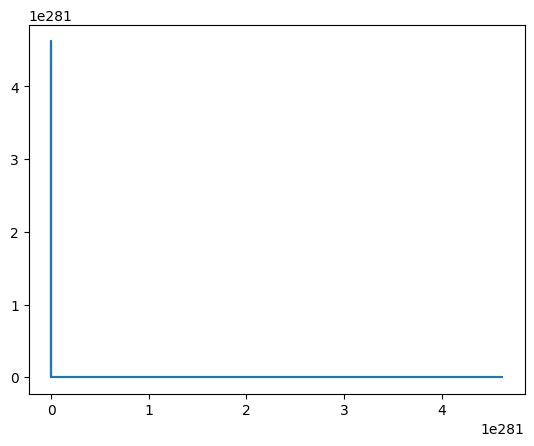

30th iteration, 765.1726576073701


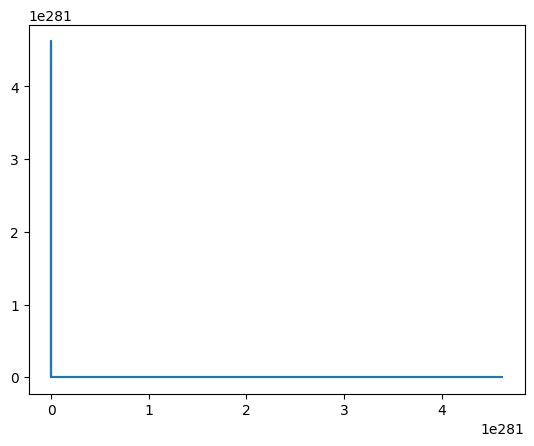

31th iteration, 765.1685359098866


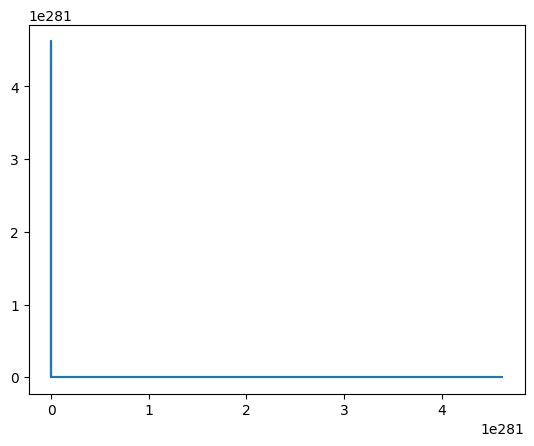

32th iteration, 765.1644142499182


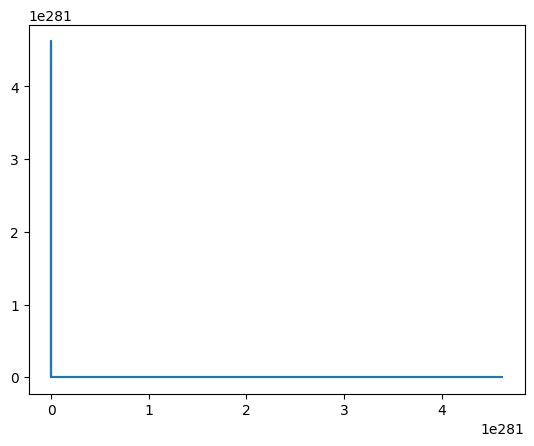

33th iteration, 765.1602926274644


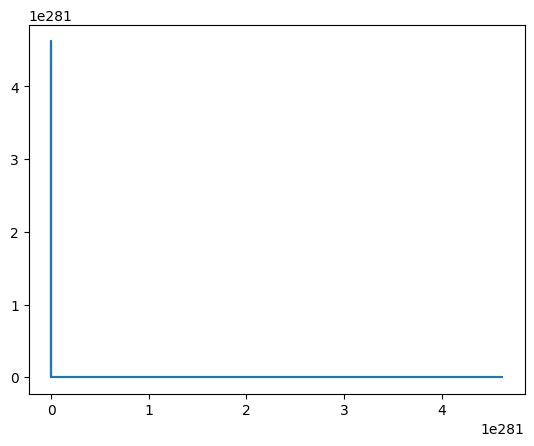

34th iteration, 765.1561710425253


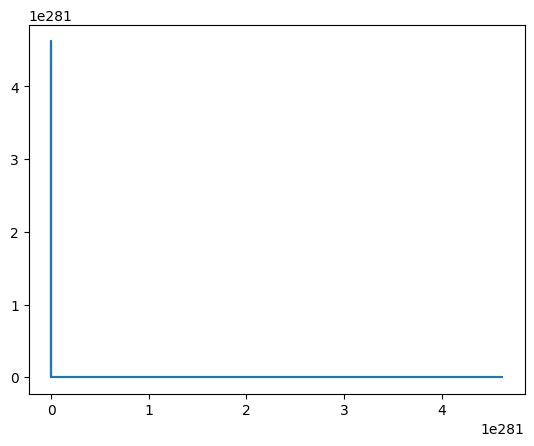

35th iteration, 765.1520494951003


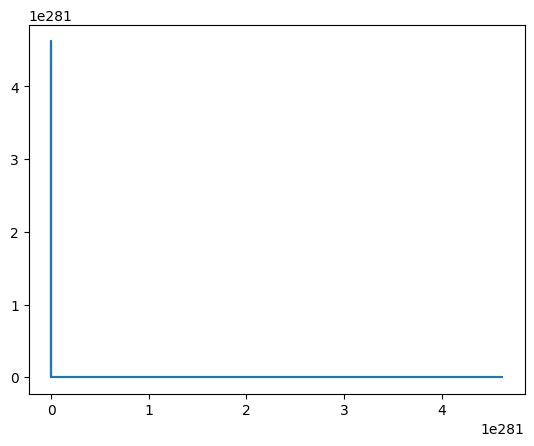

36th iteration, 765.1479279851884


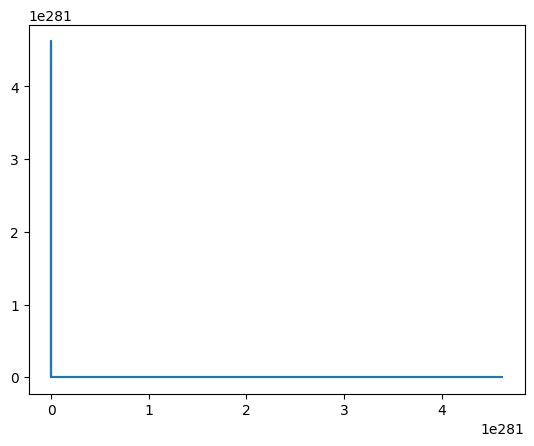

37th iteration, 765.14380651279


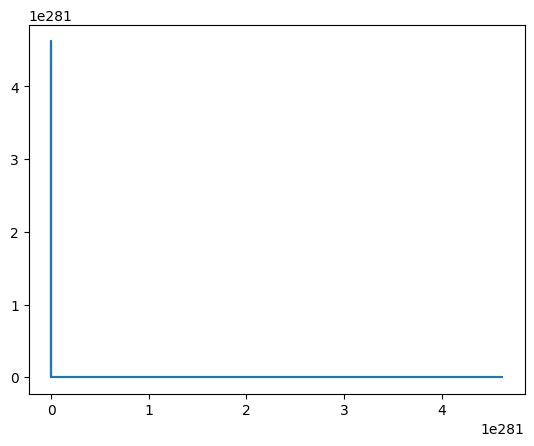

38th iteration, 765.1396850779041


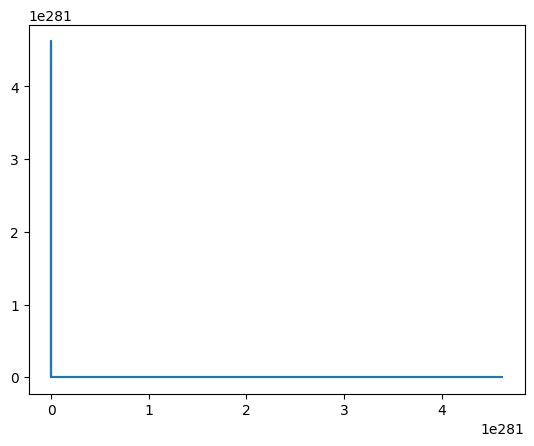

39th iteration, 765.1355636805308


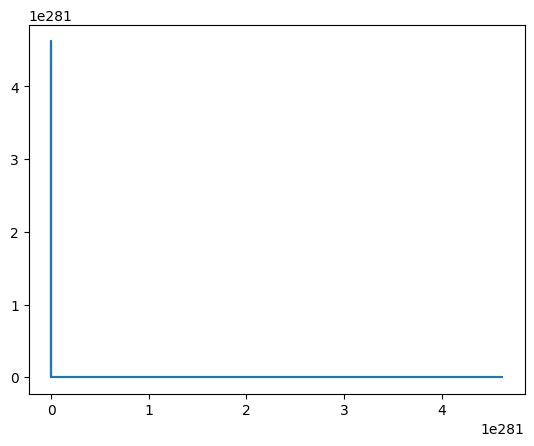

40th iteration, 765.1314423206696


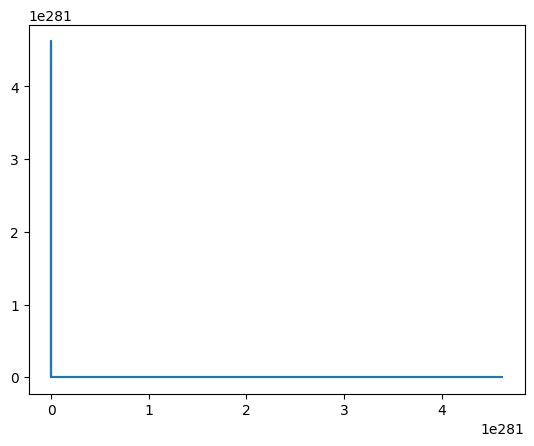

41th iteration, 765.1273209983203


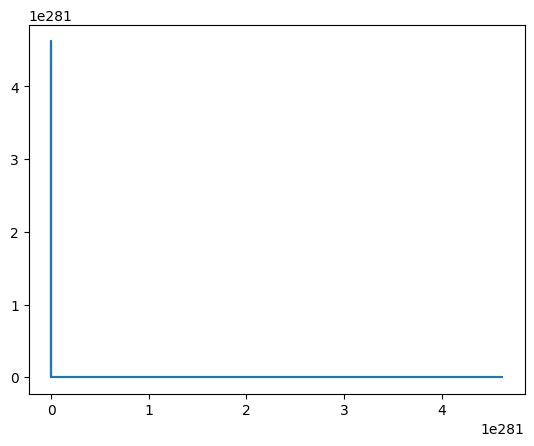

42th iteration, 765.123199713482


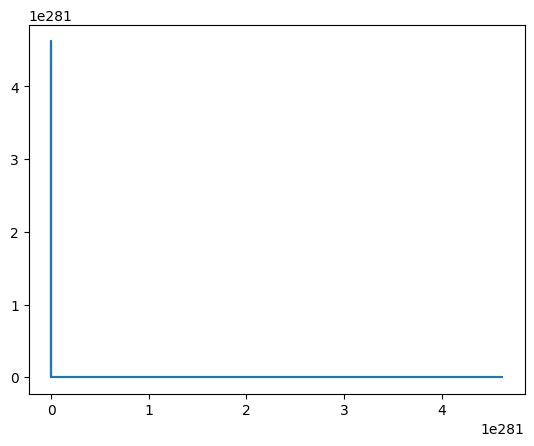

43th iteration, 765.1190784661545


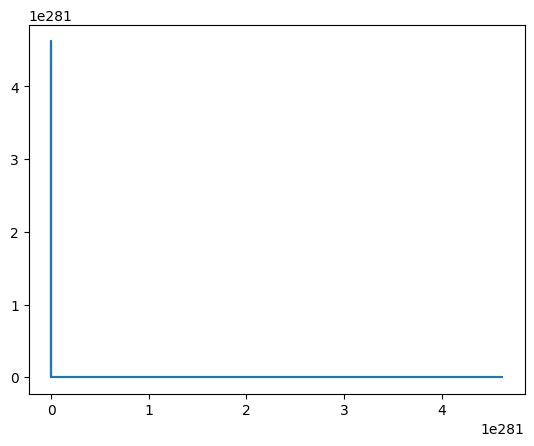

44th iteration, 765.1149572563376


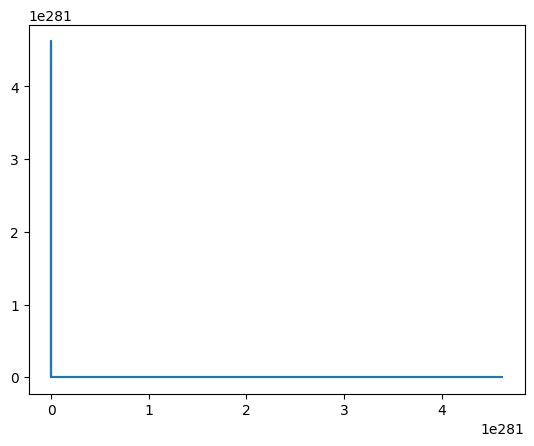

45th iteration, 765.1108360840308


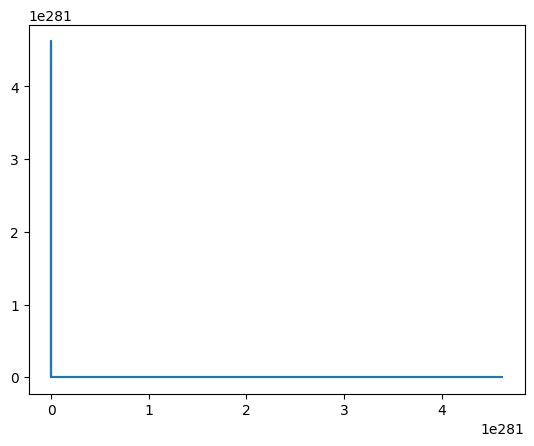

46th iteration, 765.1067149492336


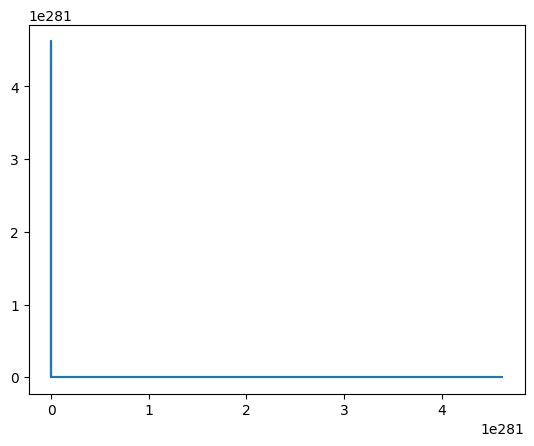

47th iteration, 765.1025938519455


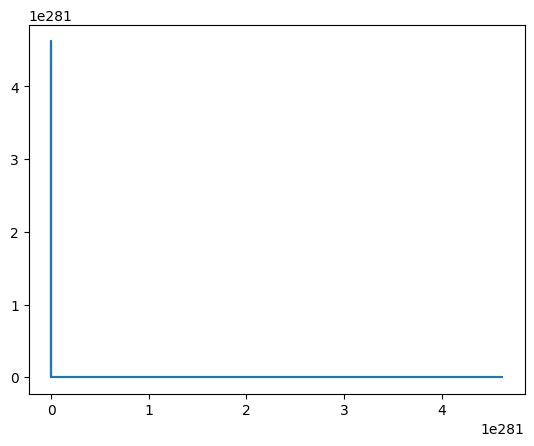

48th iteration, 765.0984727921665


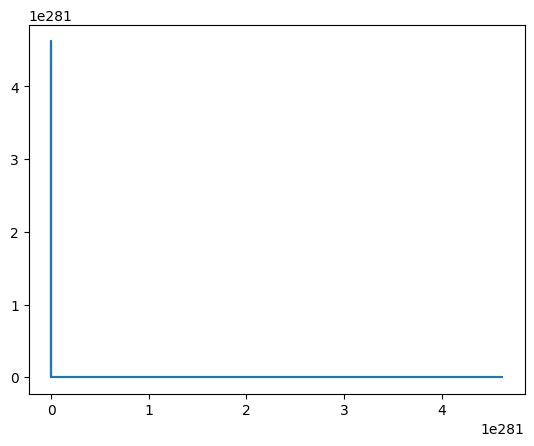

49th iteration, 765.0943517698963


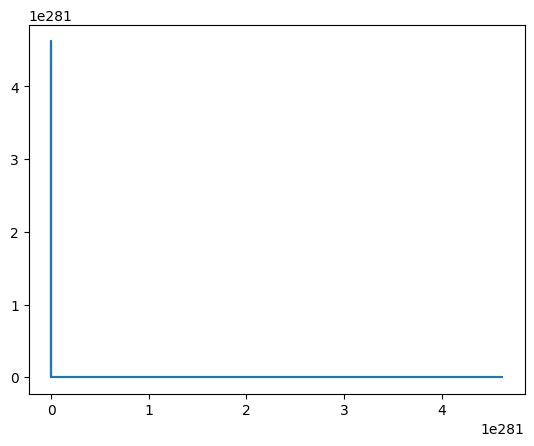

50th iteration, 765.0902307851337


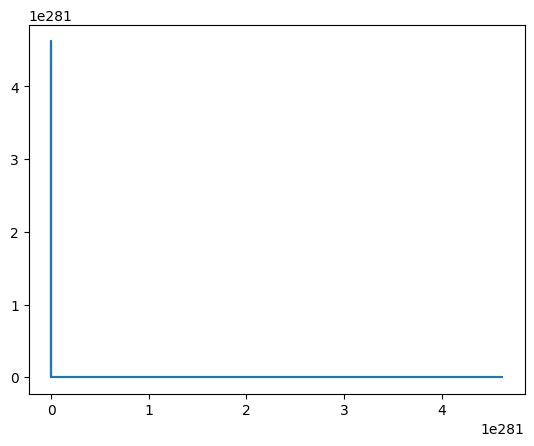

51th iteration, 765.0861098378791


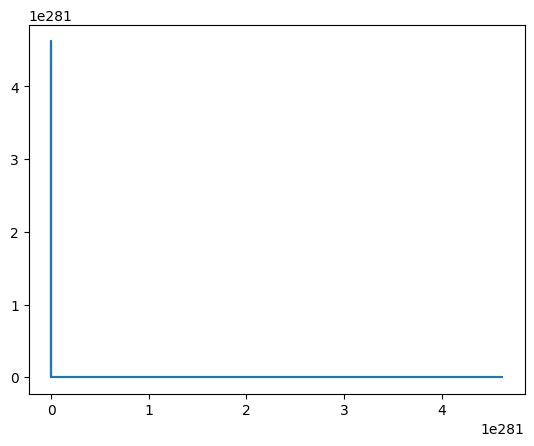

52th iteration, 765.0819889281322


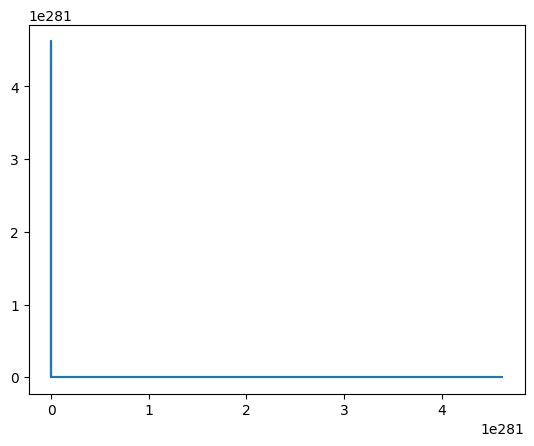

53th iteration, 765.0778680558918


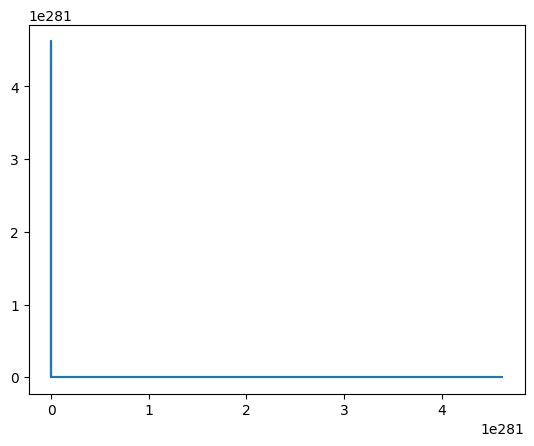

54th iteration, 765.0737472211582


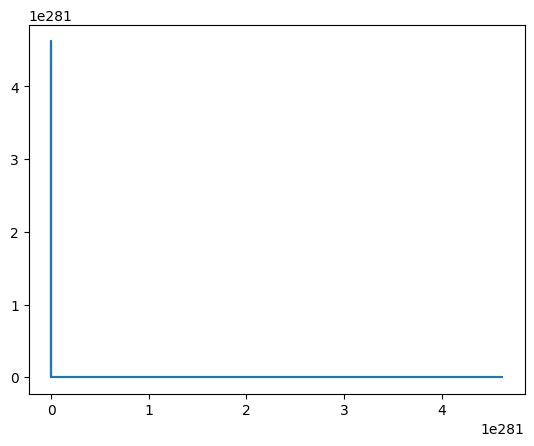

55th iteration, 765.0696264239306


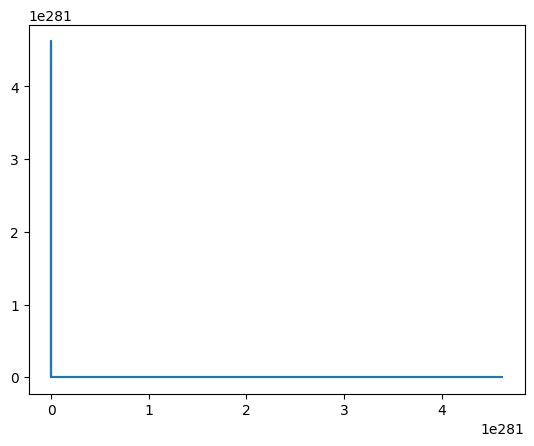

56th iteration, 765.0655056642088


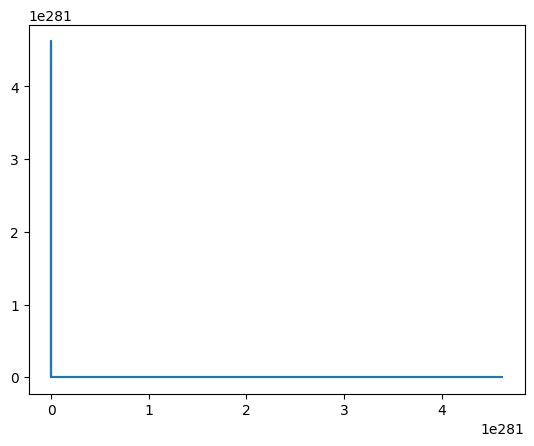

57th iteration, 765.0613849419923


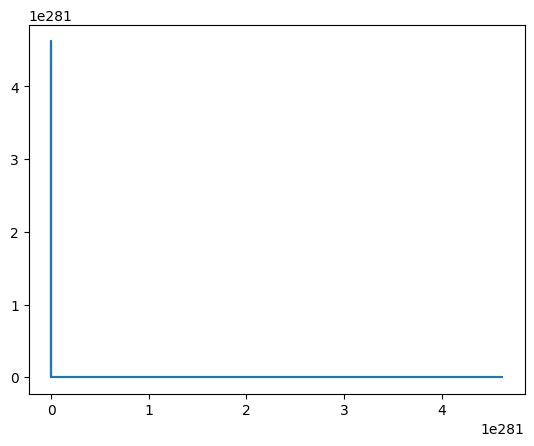

58th iteration, 765.0572642572812


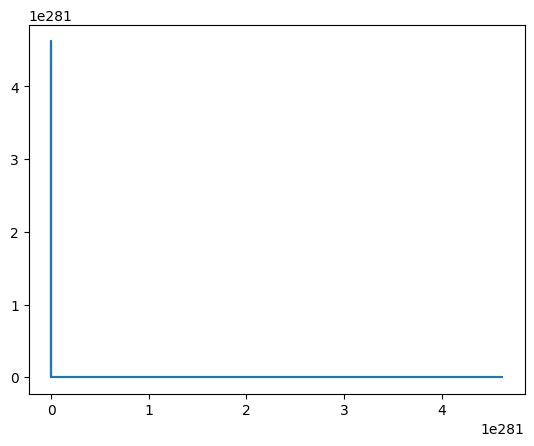

59th iteration, 765.0531436100744


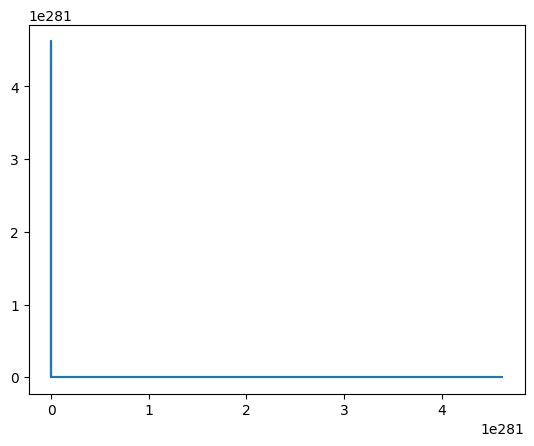

60th iteration, 765.0490230003718


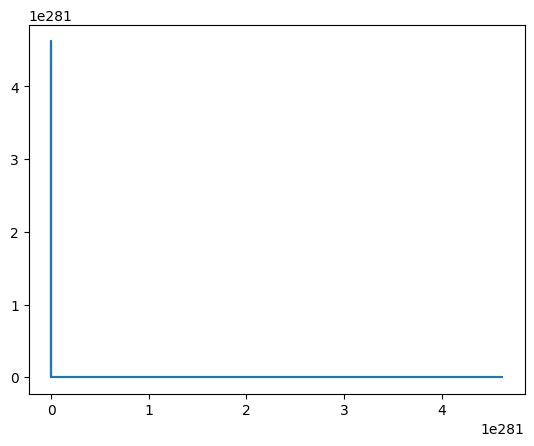

61th iteration, 765.0449024281731


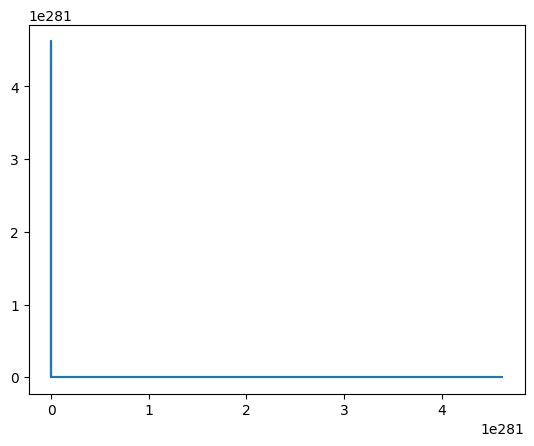

62th iteration, 765.0407818934783


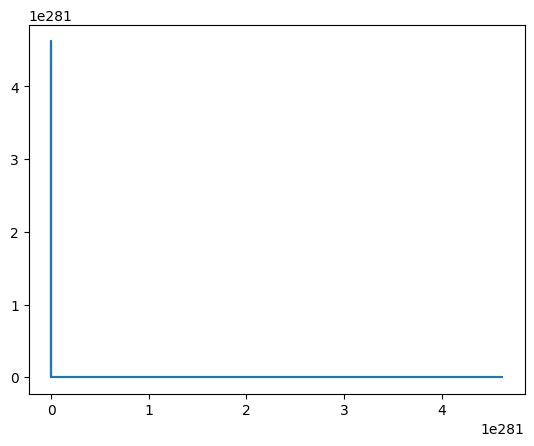

63th iteration, 765.036661396286


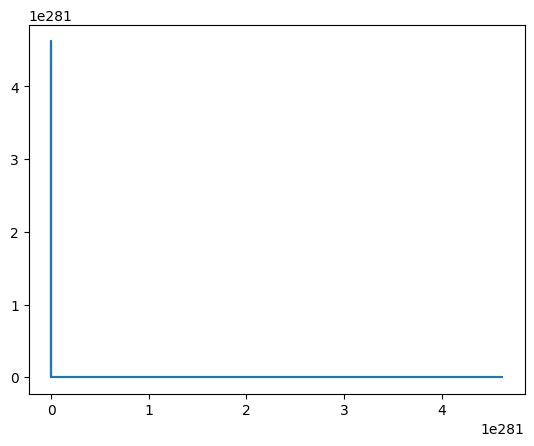

64th iteration, 765.0325409365969


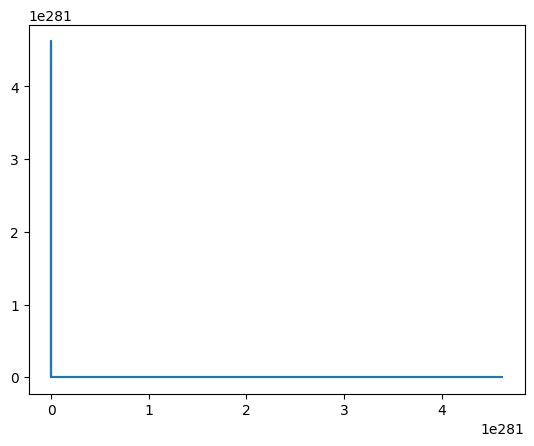

65th iteration, 765.0284205144096


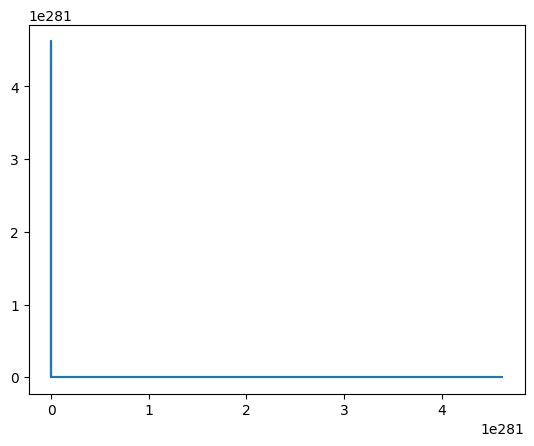

66th iteration, 765.0243001297245


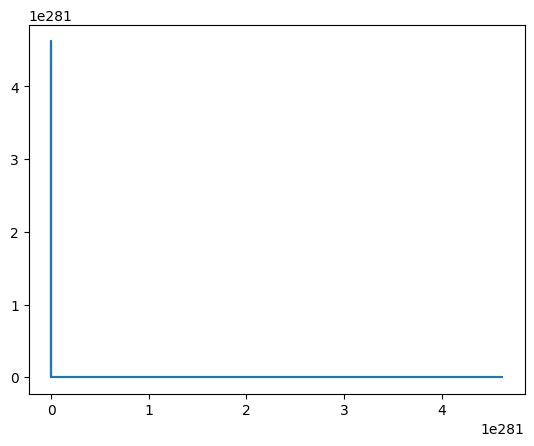

67th iteration, 765.020179782541


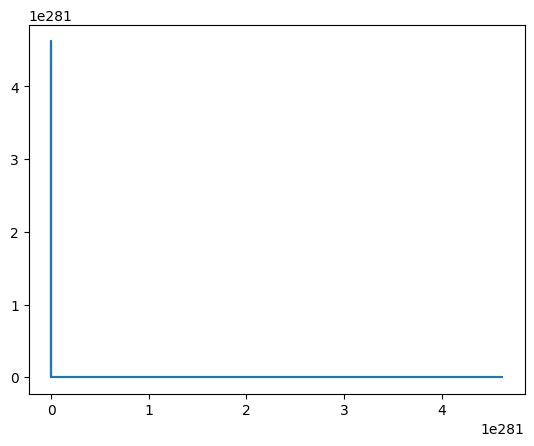

68th iteration, 765.0160594728584


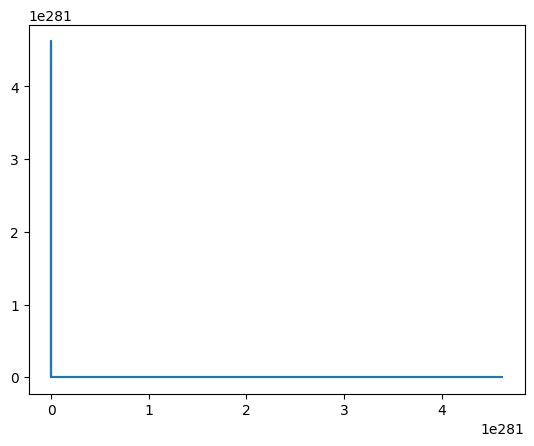

69th iteration, 765.0119392006765


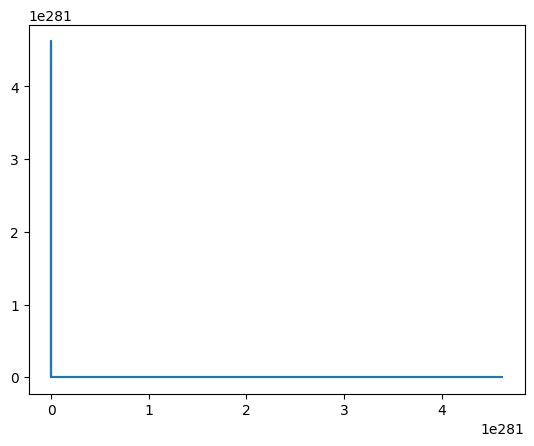

70th iteration, 765.0078189659952


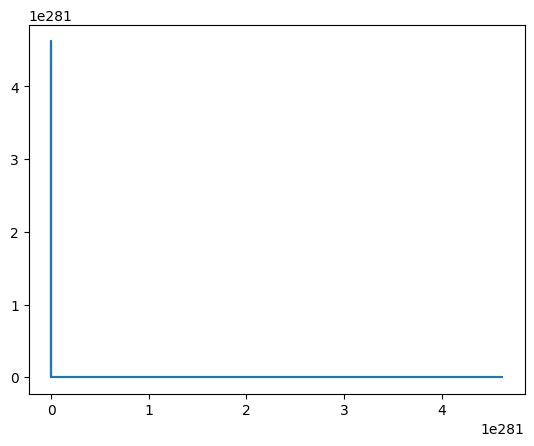

71th iteration, 765.0036987688136


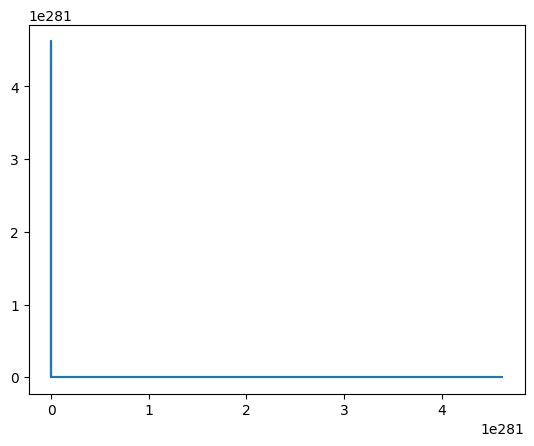

72th iteration, 764.9995786091317


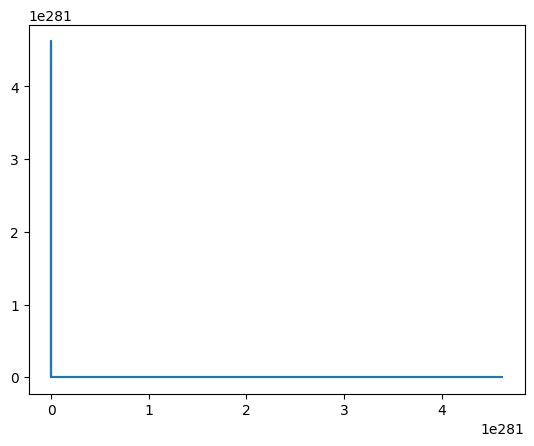

73th iteration, 764.995458486949


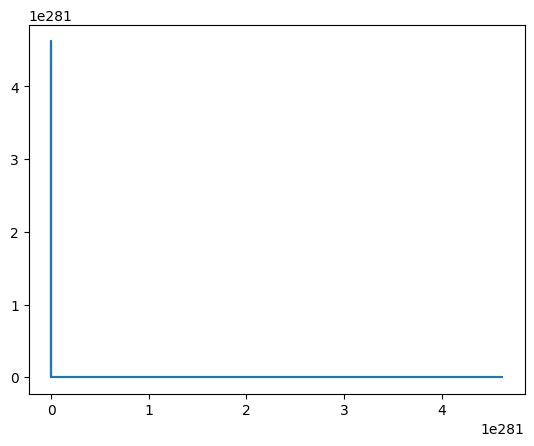

74th iteration, 764.9913384022653


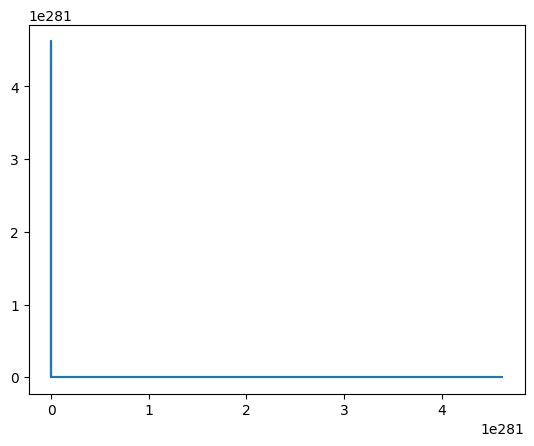

75th iteration, 764.9872183550796


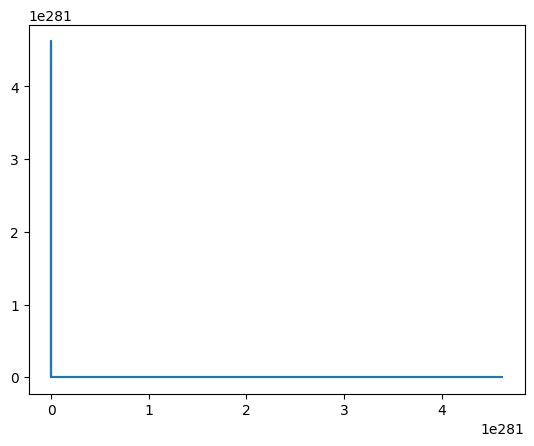

76th iteration, 764.983098345392


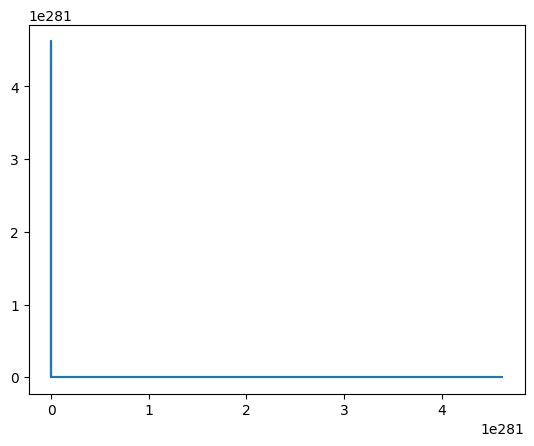

77th iteration, 764.9789783732022


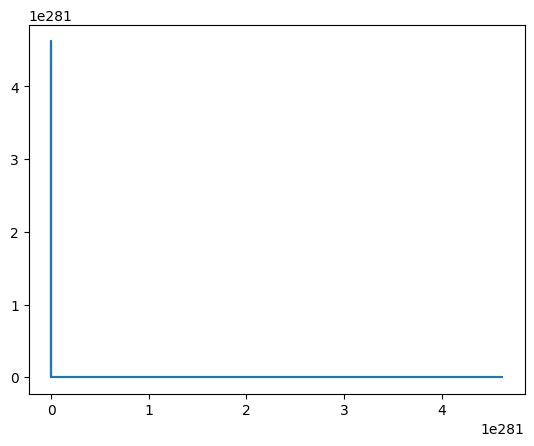

78th iteration, 764.9748584385094


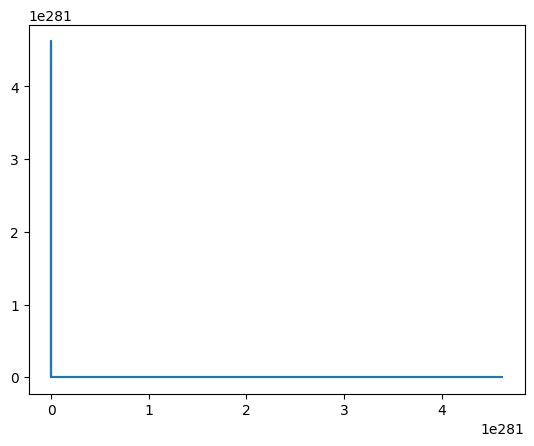

79th iteration, 764.9707385413138


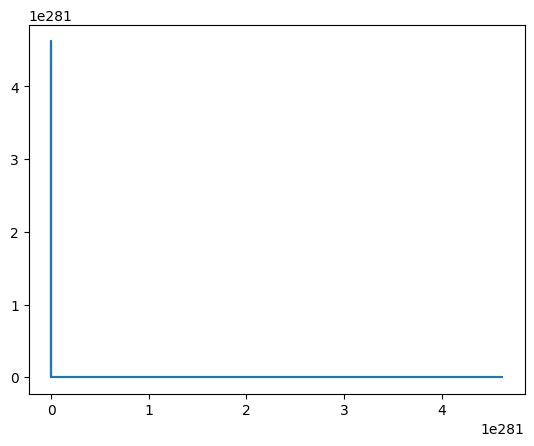

80th iteration, 764.9666186816145


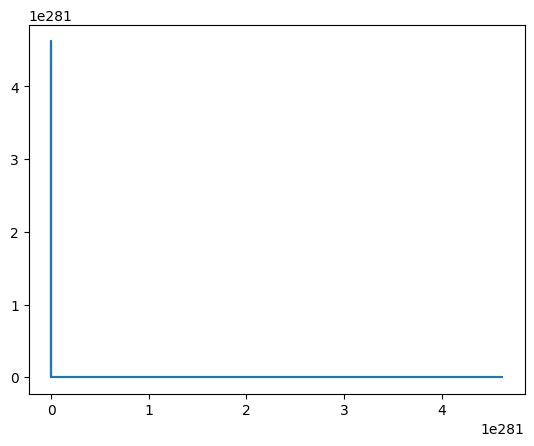

81th iteration, 764.9624988594109


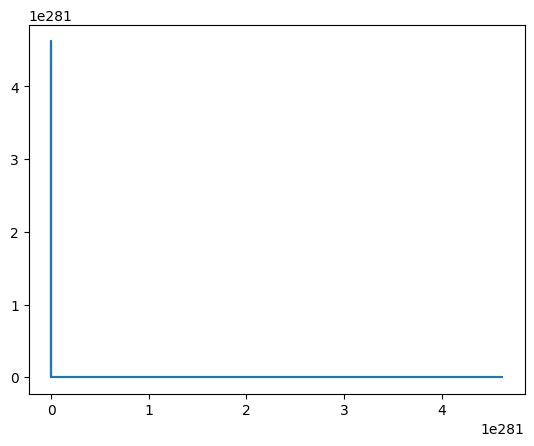

82th iteration, 764.958379074703


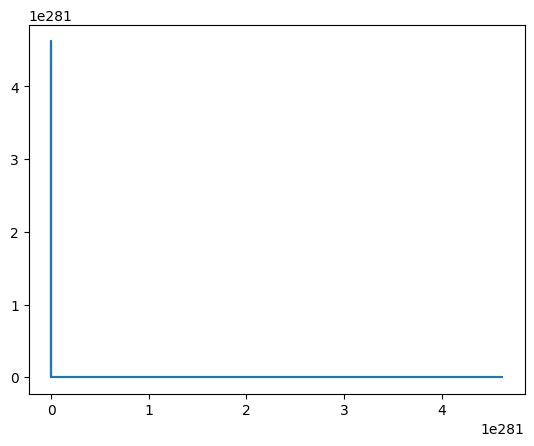

83th iteration, 764.9542593274905


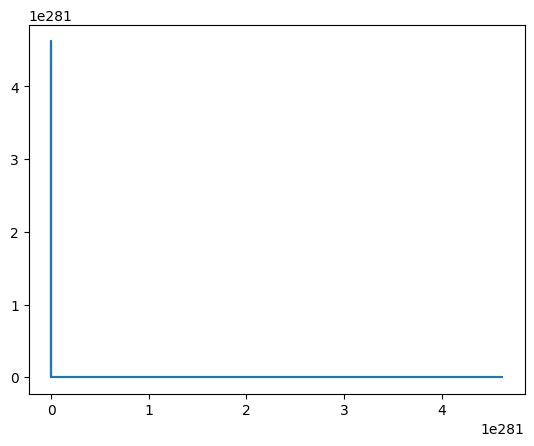

84th iteration, 764.9501396177732


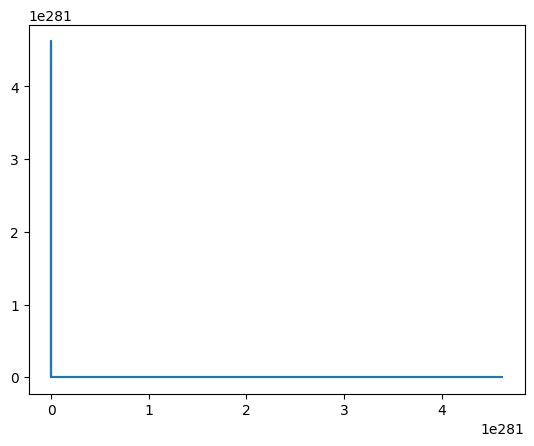

85th iteration, 764.9460199455502


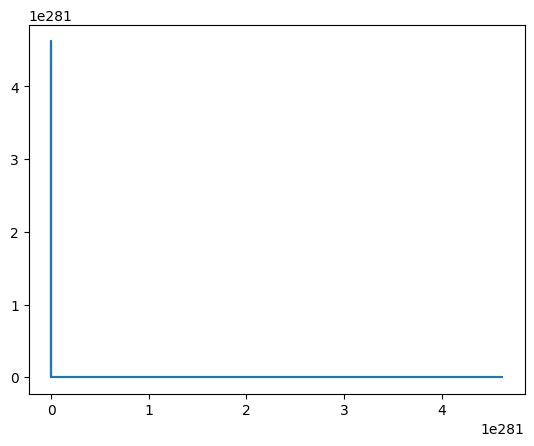

86th iteration, 764.9419003108213


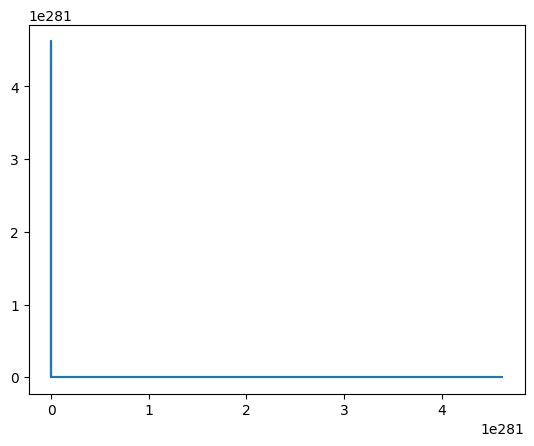

87th iteration, 764.9377807135861


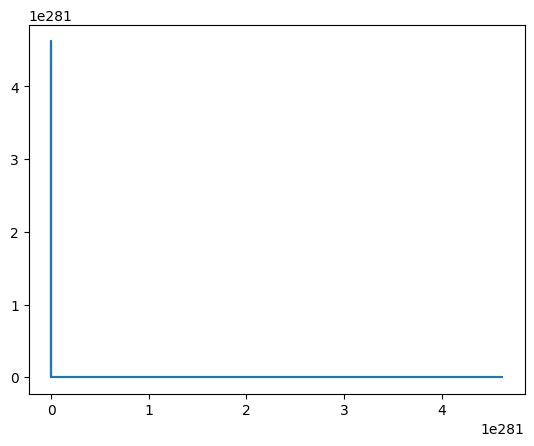

88th iteration, 764.9336611538444


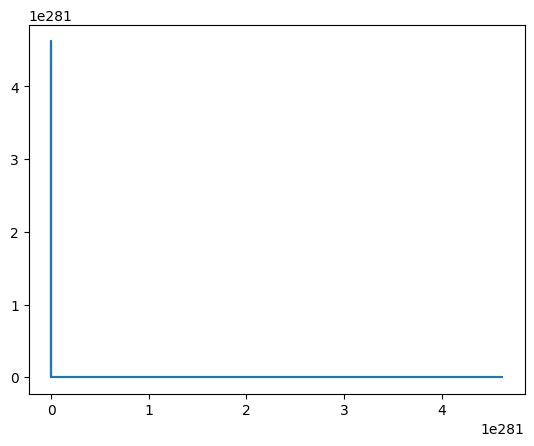

89th iteration, 764.9295416315953


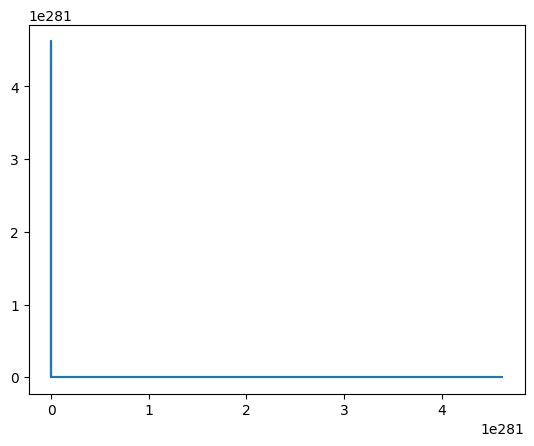

90th iteration, 764.9254221468391


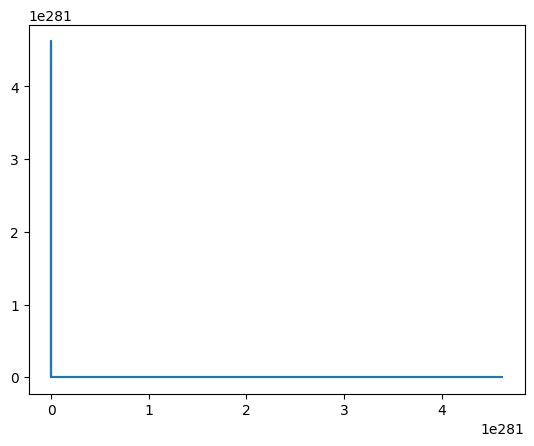

91th iteration, 764.921302699575


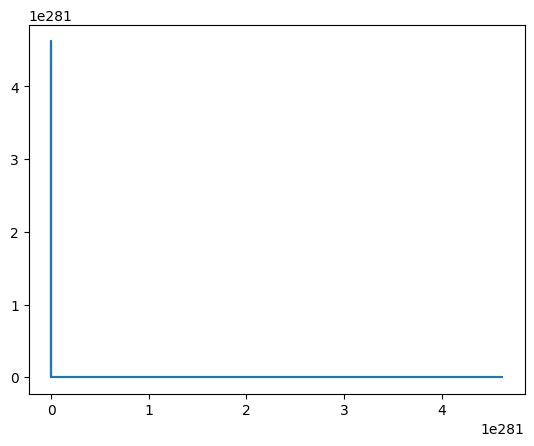

92th iteration, 764.9171832898028


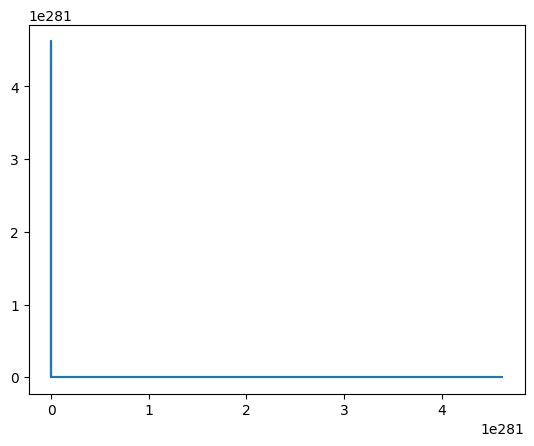

93th iteration, 764.9130639175218


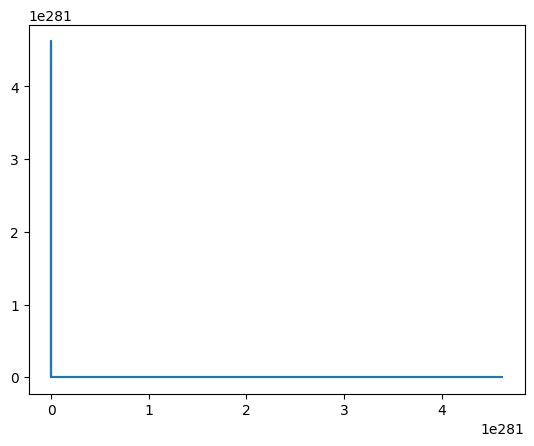

94th iteration, 764.9089445827317


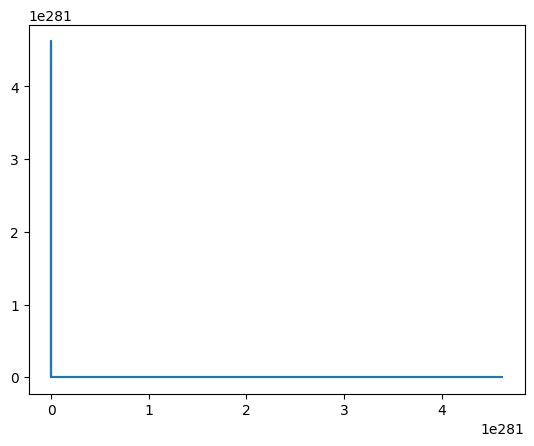

95th iteration, 764.9048252854321


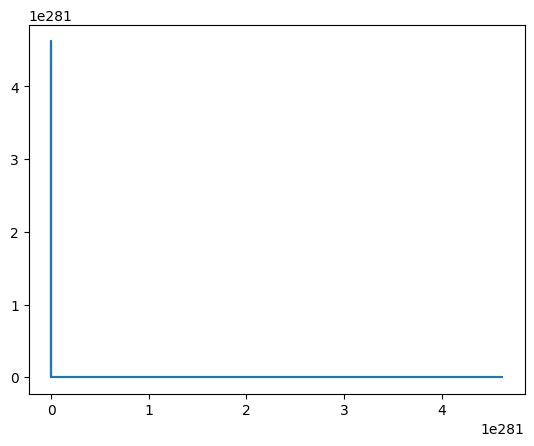

96th iteration, 764.9007060256231


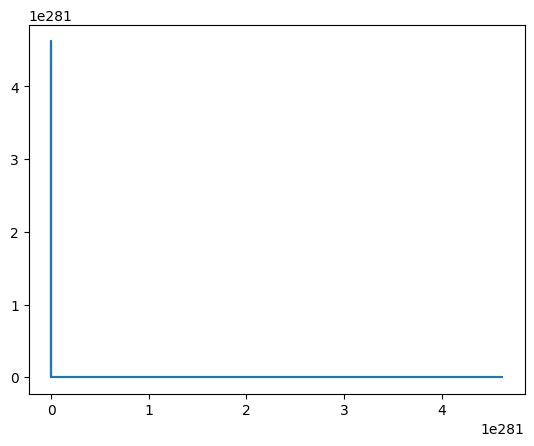

97th iteration, 764.8965868033041


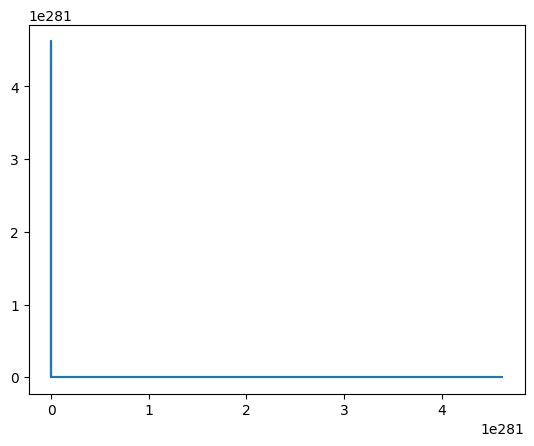

98th iteration, 764.8924676184744


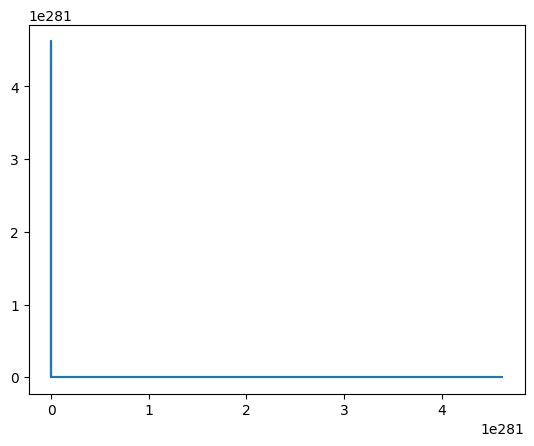

99th iteration, 764.8883484711336


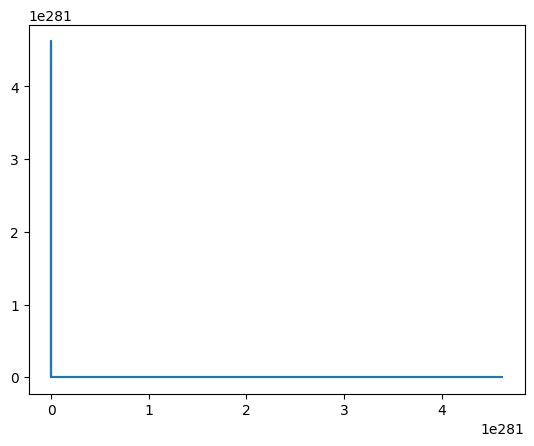

100th iteration, 764.8842293612817


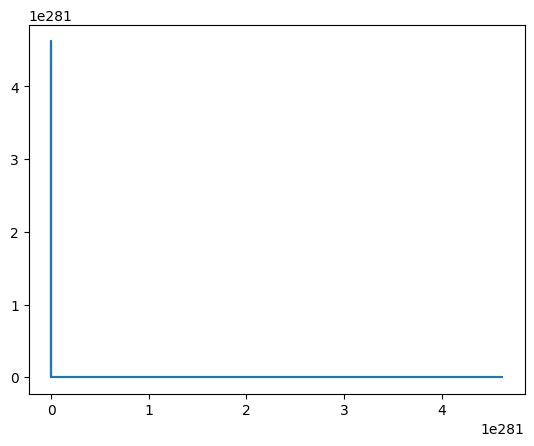

101th iteration, 764.8801102889178


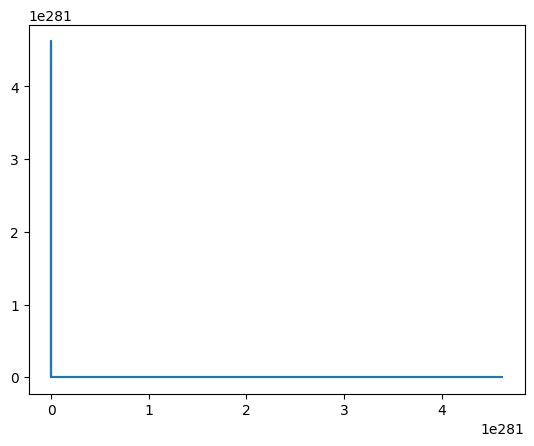

102th iteration, 764.875991254042


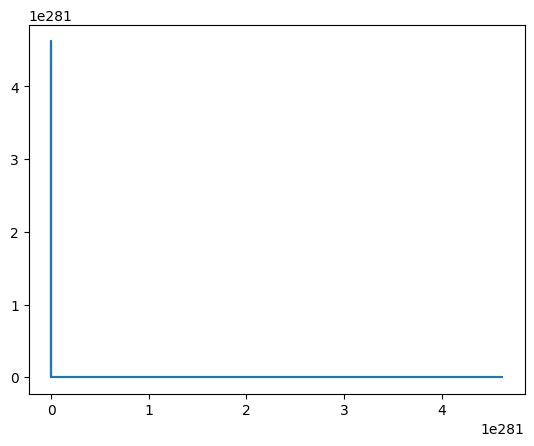

103th iteration, 764.8718722566538


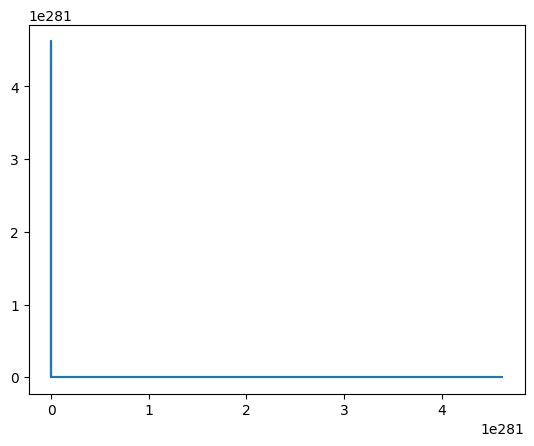

104th iteration, 764.8677532967525


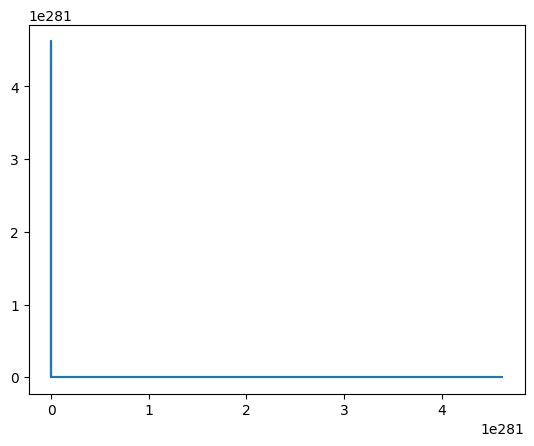

105th iteration, 764.8636343743377


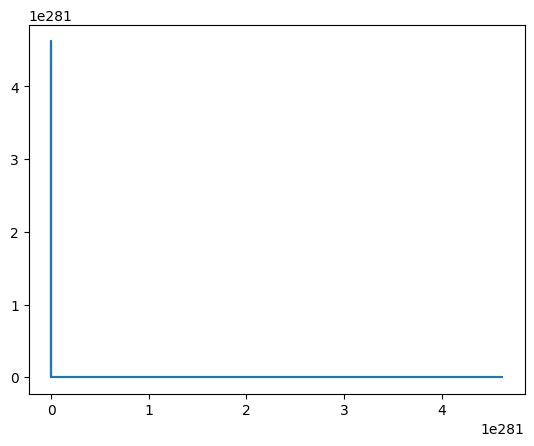

106th iteration, 764.8595154894098


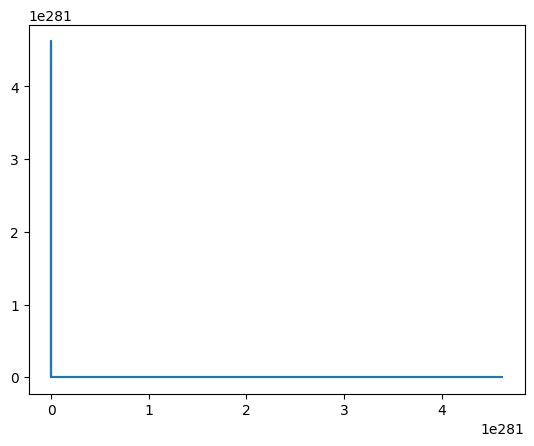

107th iteration, 764.8553966419673


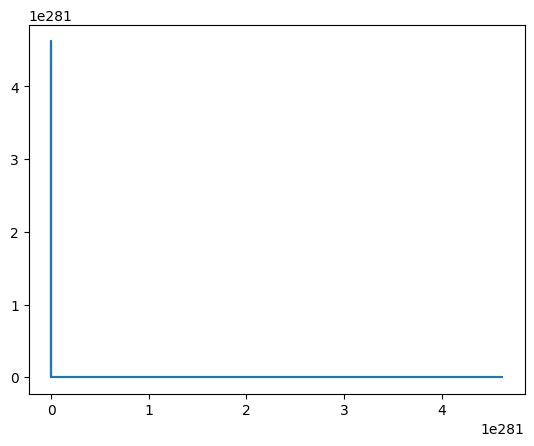

108th iteration, 764.8512778320107


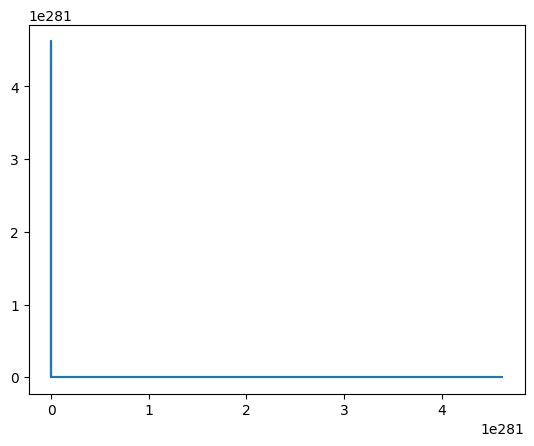

109th iteration, 764.8471590595394


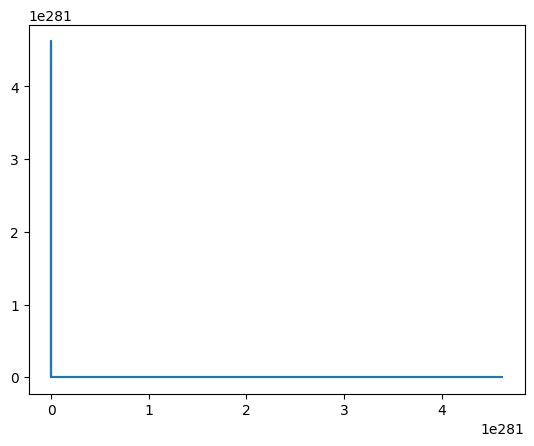

110th iteration, 764.8430403245524


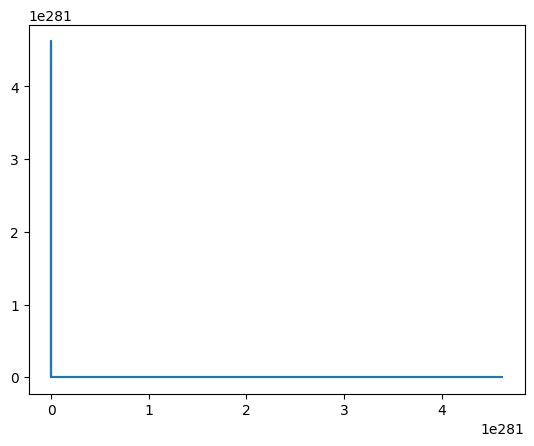

111th iteration, 764.8389216270504


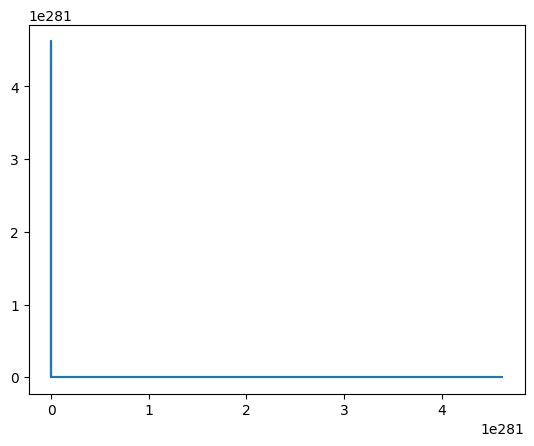

112th iteration, 764.8348029670325


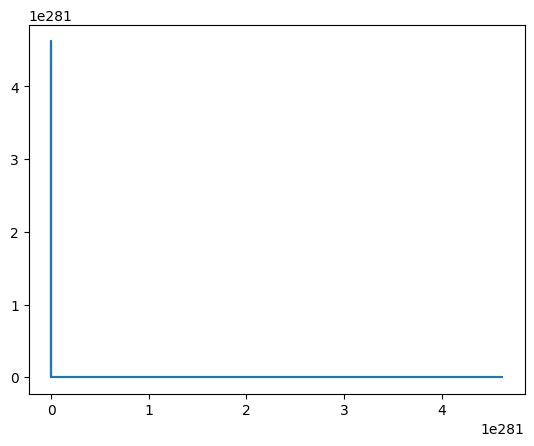

113th iteration, 764.8306843444975


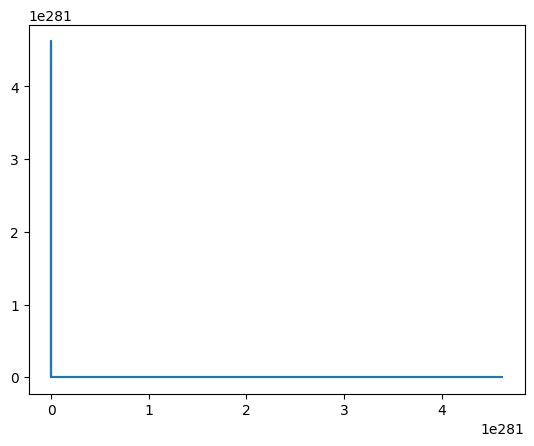

114th iteration, 764.8265657594462


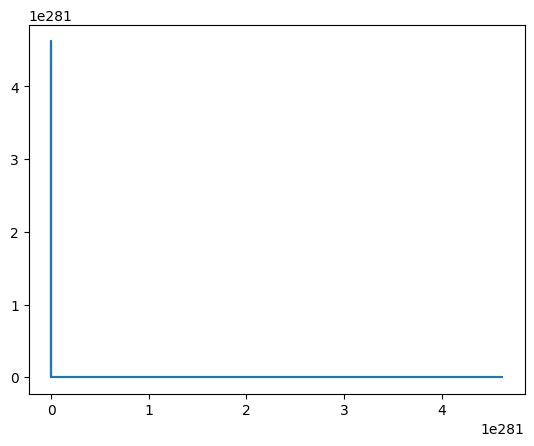

115th iteration, 764.8224472118773


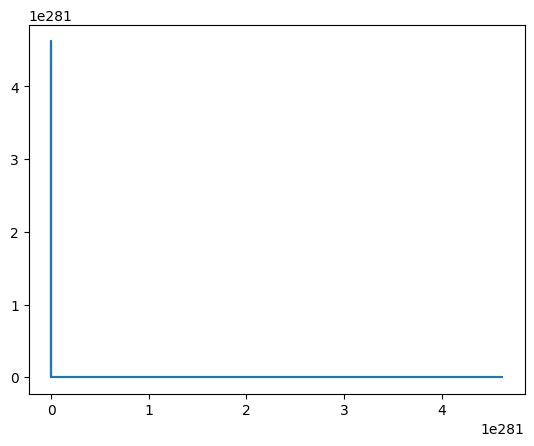

116th iteration, 764.8183287017908


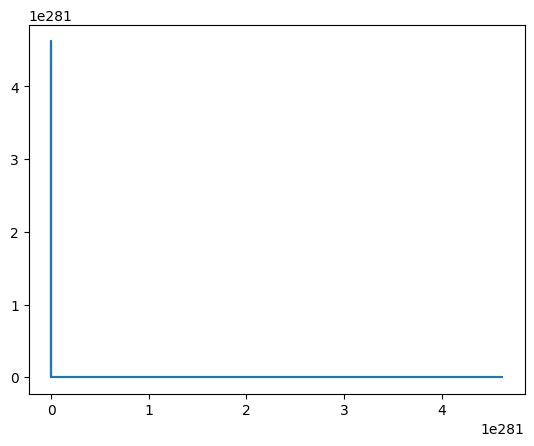

117th iteration, 764.8142102291865


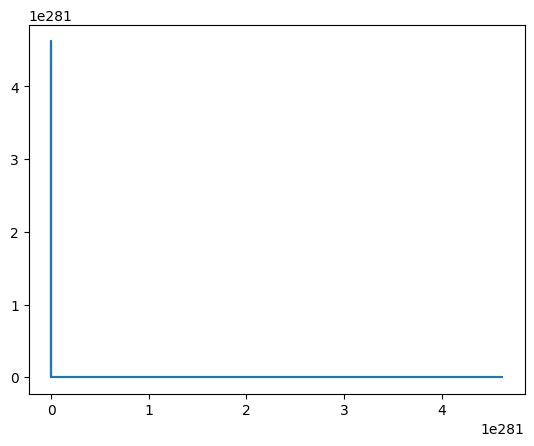

118th iteration, 764.8100917940643


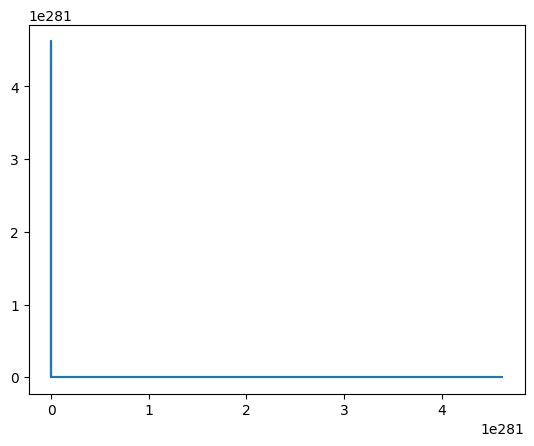

119th iteration, 764.8059733964228


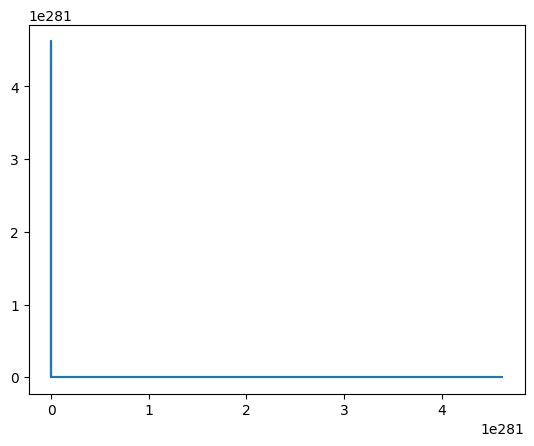

120th iteration, 764.801855036263


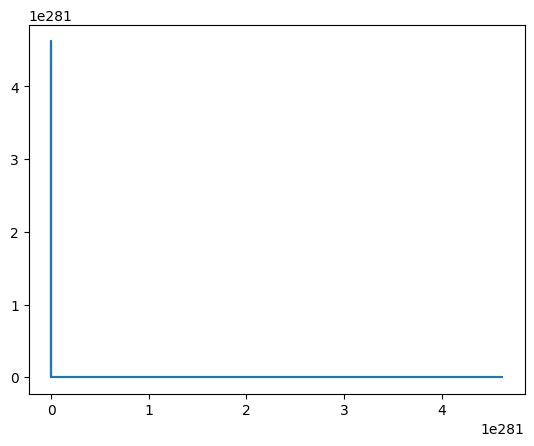

121th iteration, 764.7977367135835


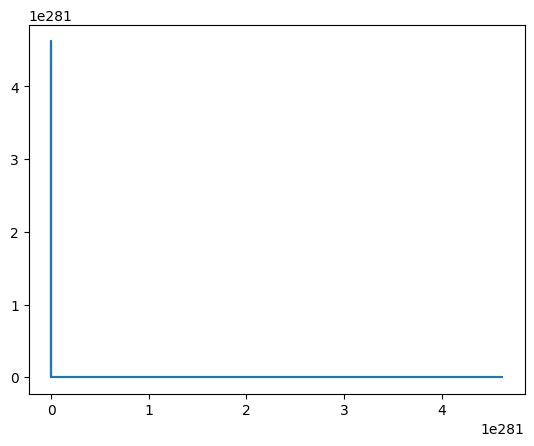

122th iteration, 764.7936184283838


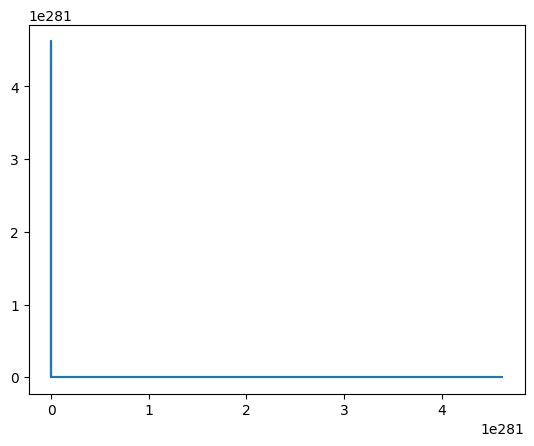

123th iteration, 764.7895001806639


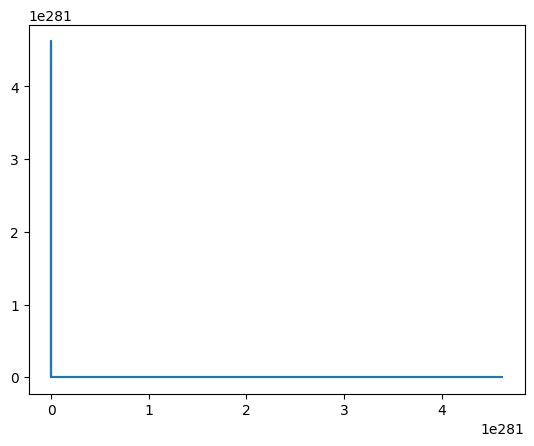

124th iteration, 764.7853819704236


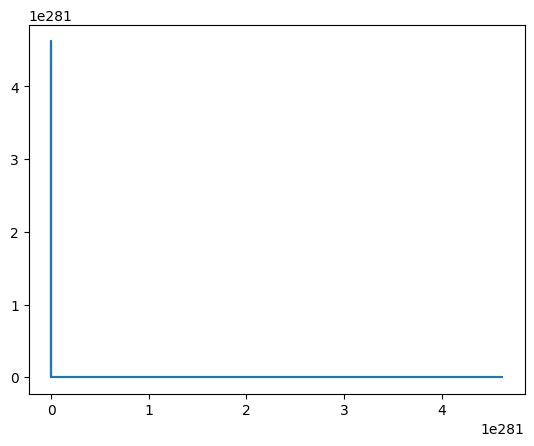

125th iteration, 764.781263797662


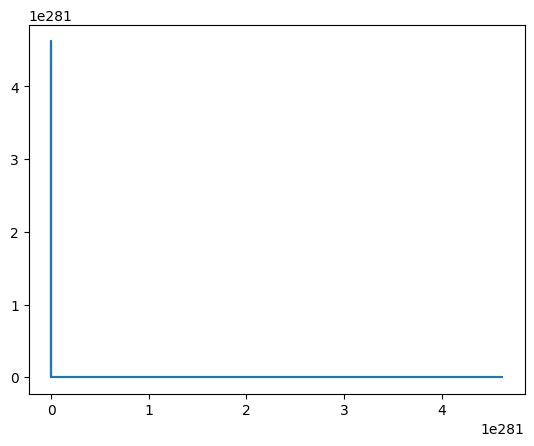

126th iteration, 764.7771456623791


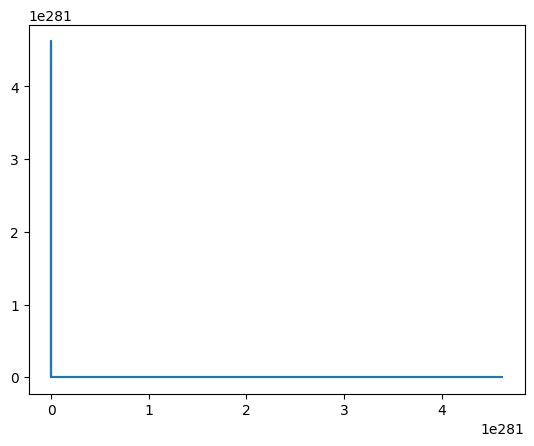

127th iteration, 764.7730275645746


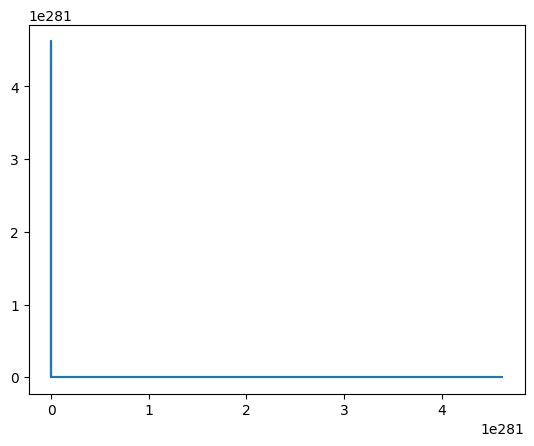

128th iteration, 764.7689095042477


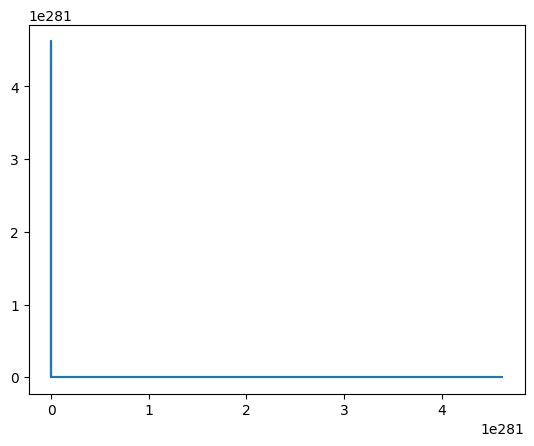

129th iteration, 764.7647914813983


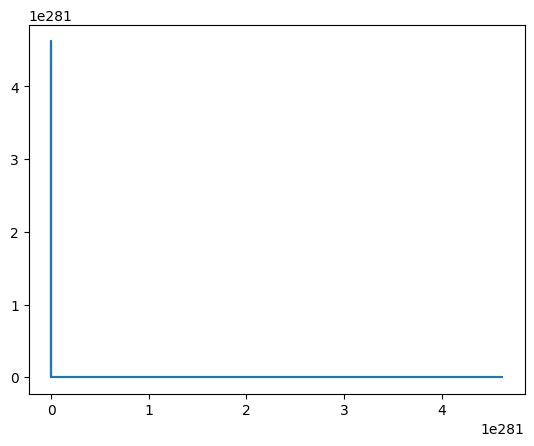

130th iteration, 764.7606734960258


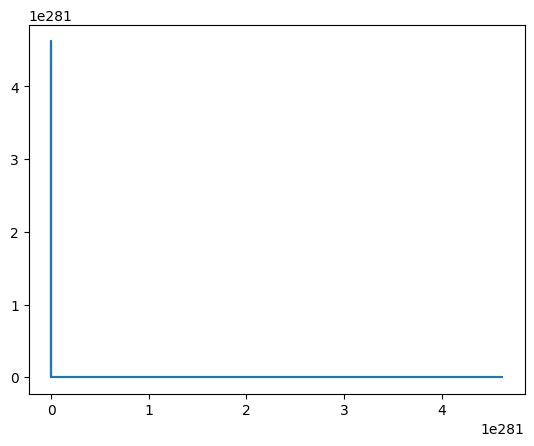

131th iteration, 764.7565555481301


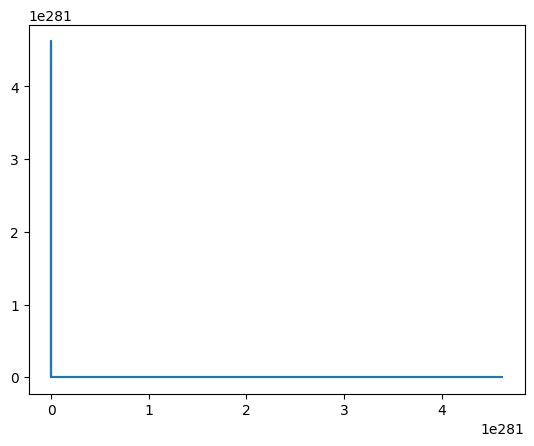

132th iteration, 764.7524376377106


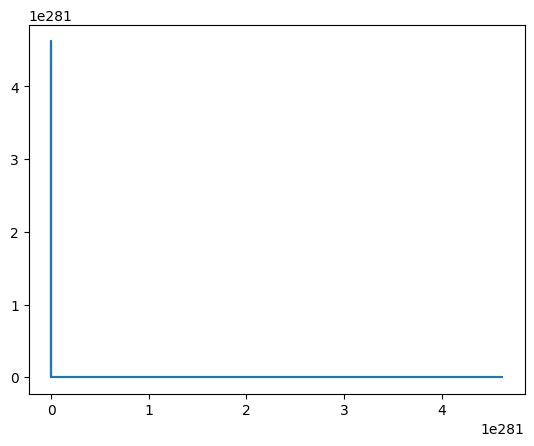

133th iteration, 764.7483197647668


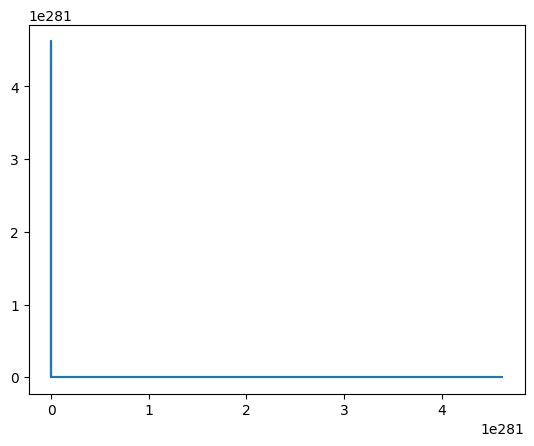

134th iteration, 764.7442019292984


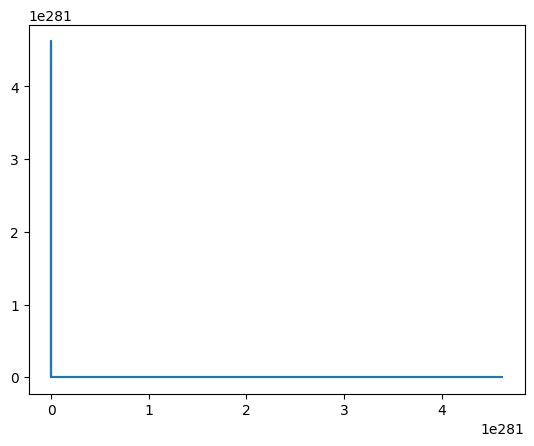

135th iteration, 764.7400841313055


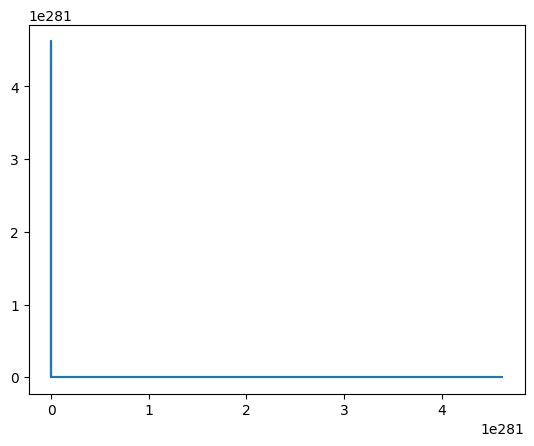

136th iteration, 764.7359663707867


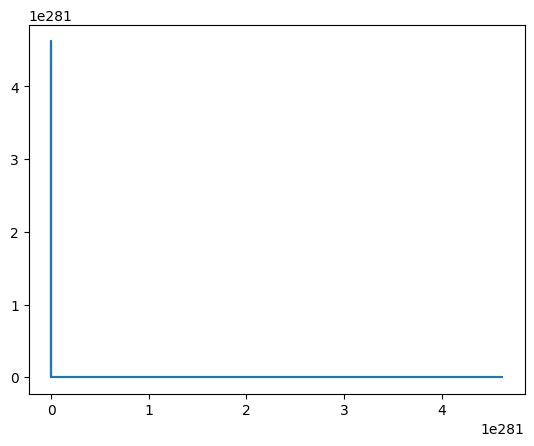

137th iteration, 764.7318486477426


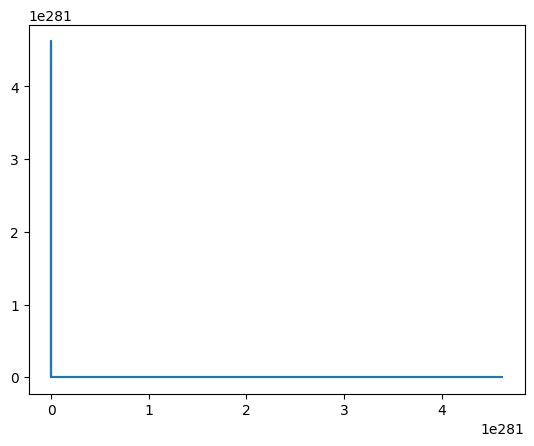

138th iteration, 764.7277309621726


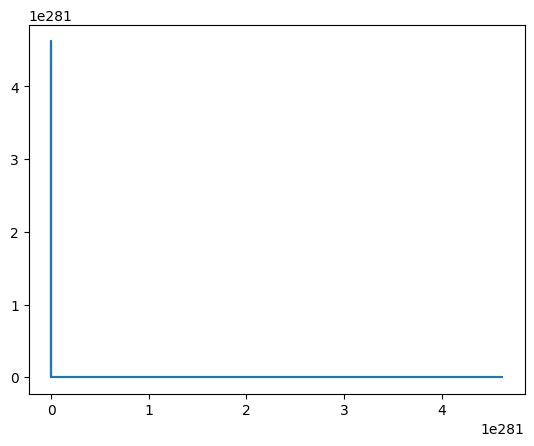

139th iteration, 764.7236133140755


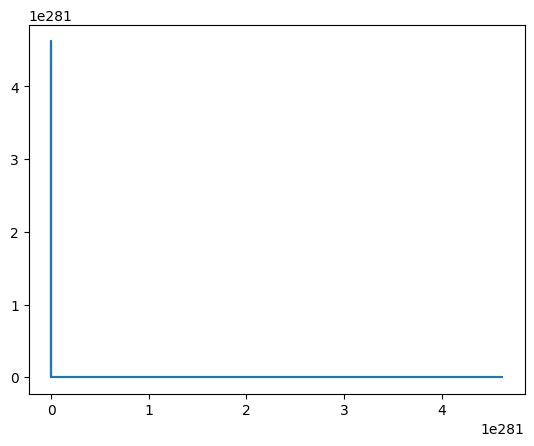

140th iteration, 764.719495703452


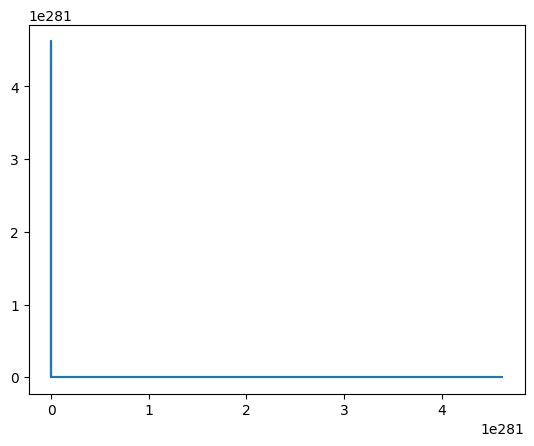

141th iteration, 764.715378130301


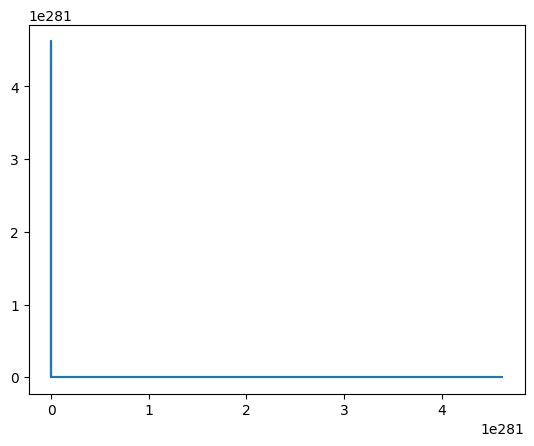

142th iteration, 764.7112605946229


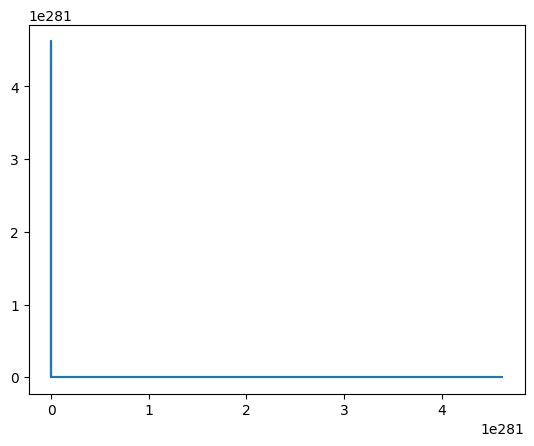

143th iteration, 764.707143096416


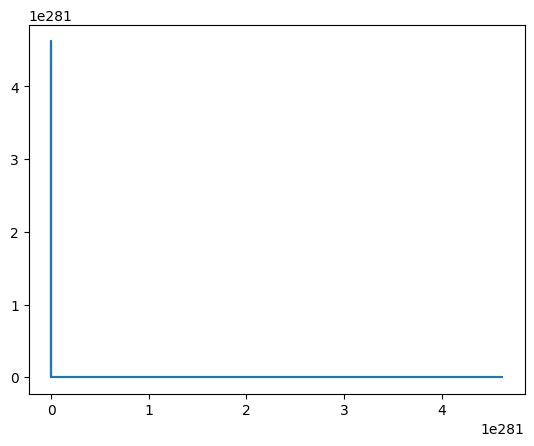

144th iteration, 764.7030256356811


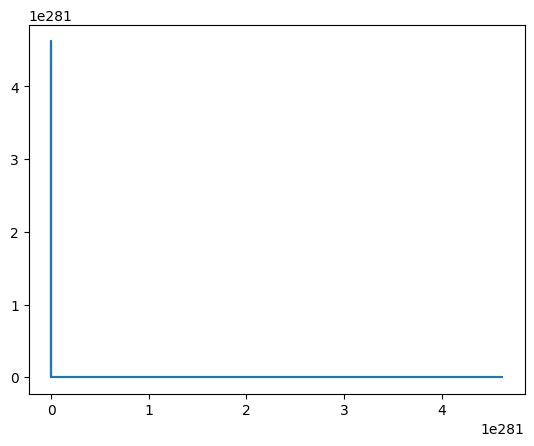

145th iteration, 764.6989082124171


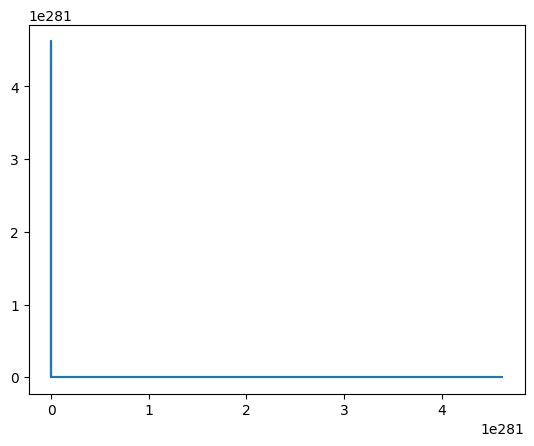

146th iteration, 764.6947908266246


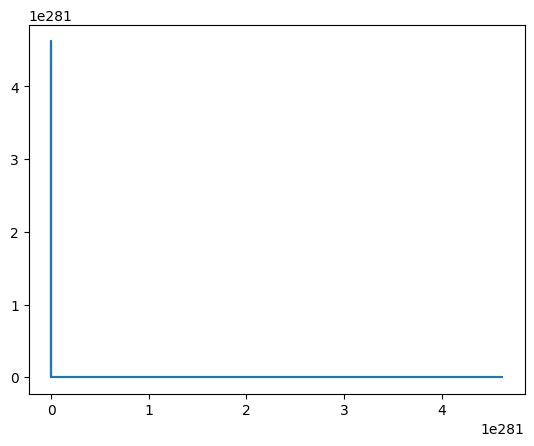

147th iteration, 764.6906734783023


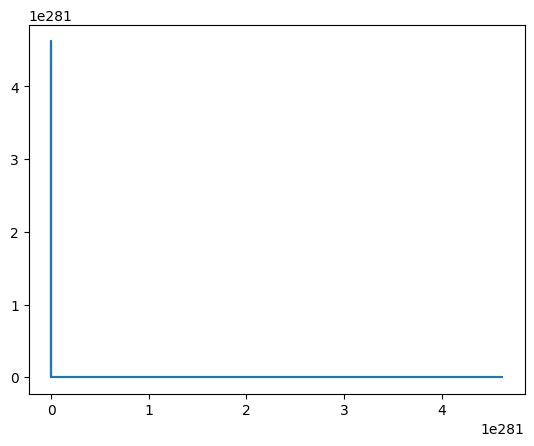

148th iteration, 764.6865561674495


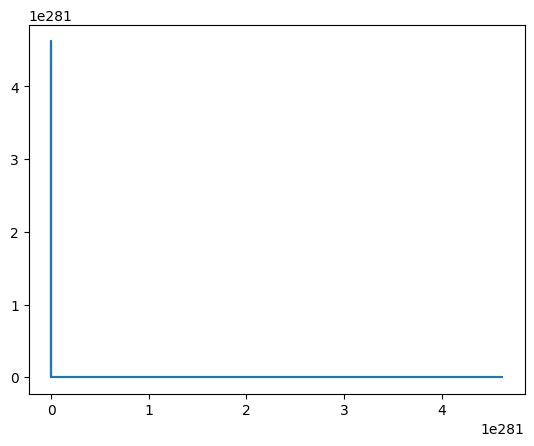

149th iteration, 764.6824388940669


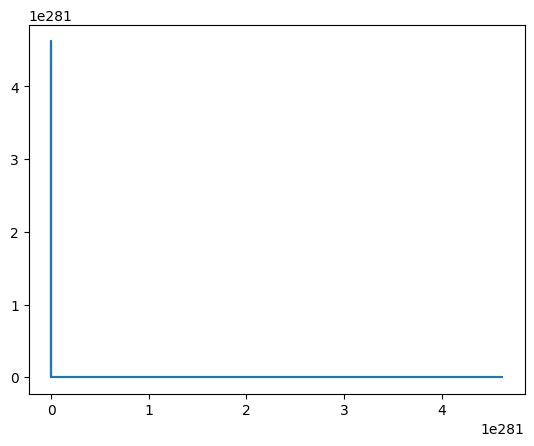

150th iteration, 764.6783216581533


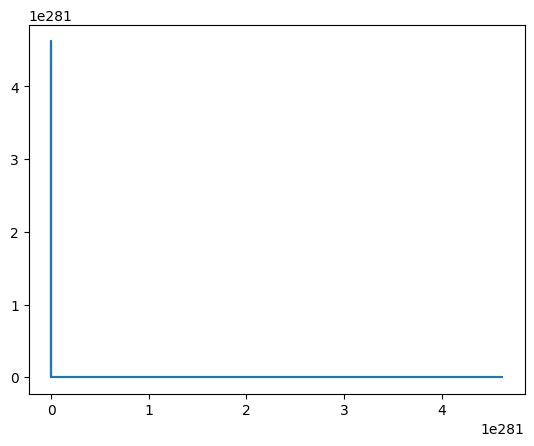

151th iteration, 764.6742044597087


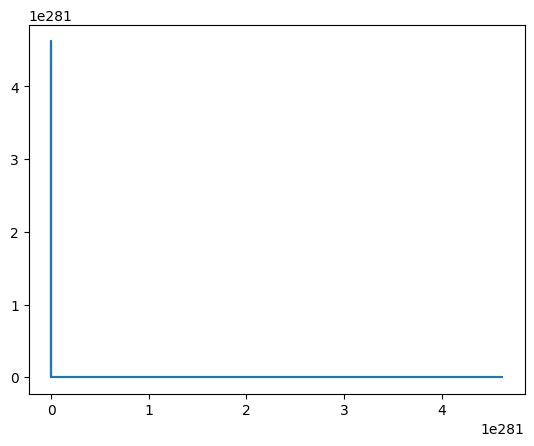

152th iteration, 764.6700872987325


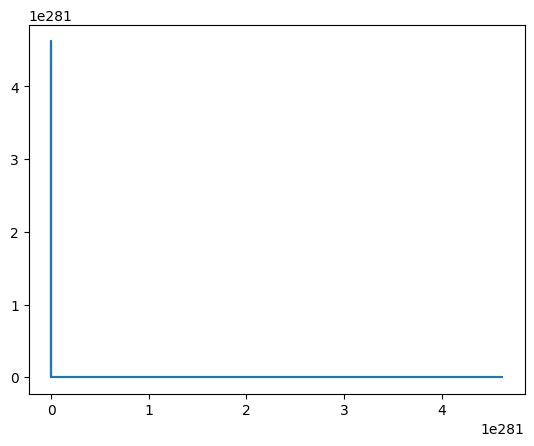

153th iteration, 764.6659701752247


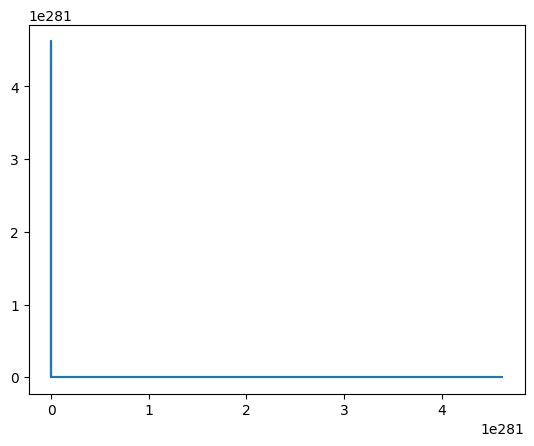

154th iteration, 764.6618530891845


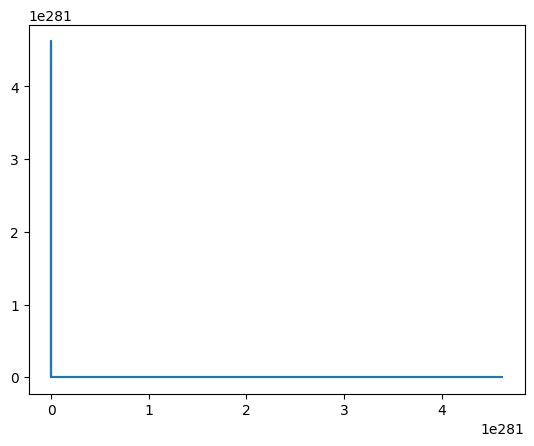

155th iteration, 764.6577360406114


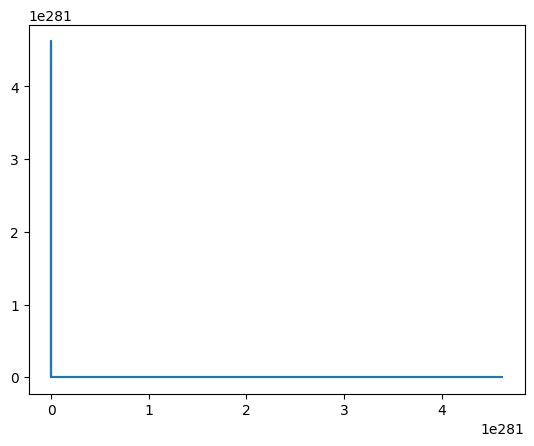

156th iteration, 764.6536190295054


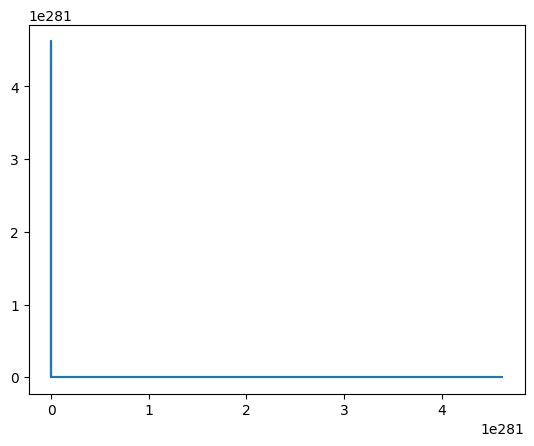

157th iteration, 764.6495020558663


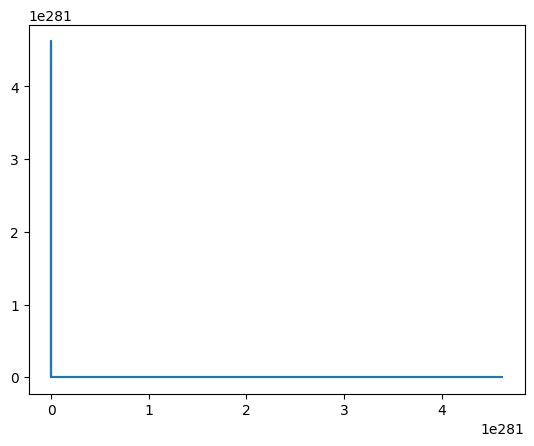

158th iteration, 764.6453851196928


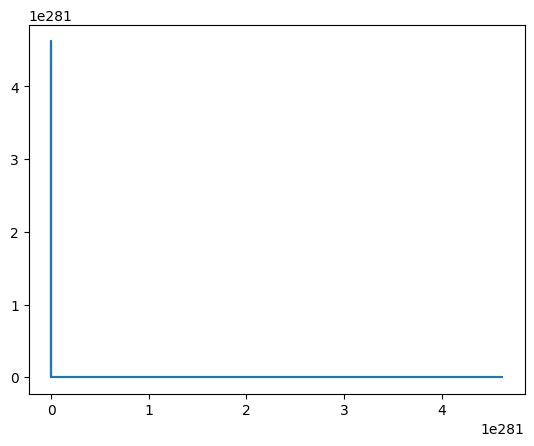

159th iteration, 764.6412682209851


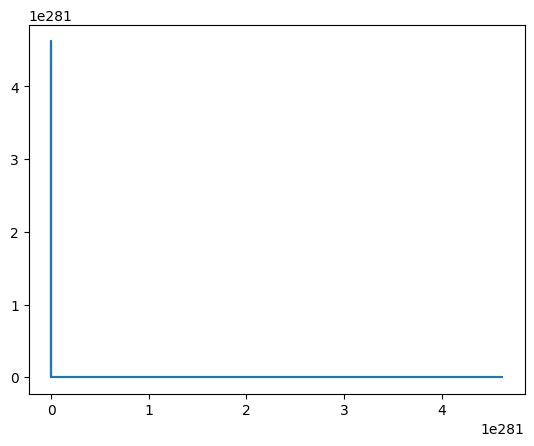

160th iteration, 764.6371513597428


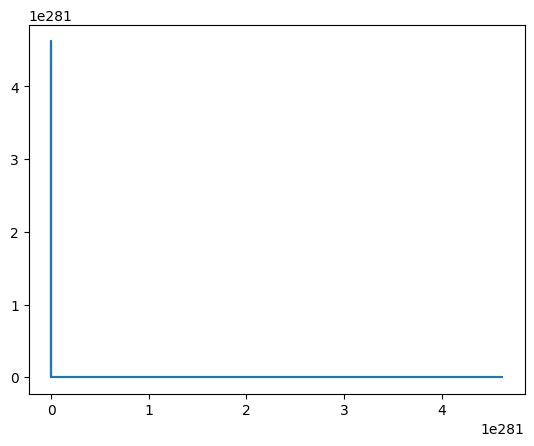

161th iteration, 764.6330345359656


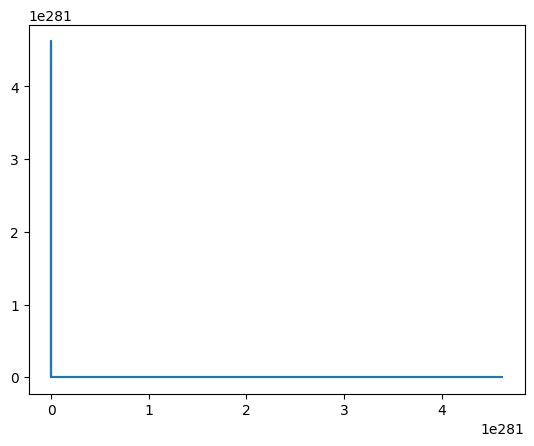

162th iteration, 764.6289177496534


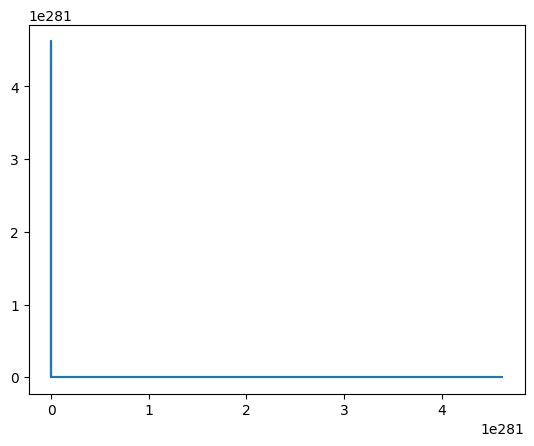

163th iteration, 764.6248010008052


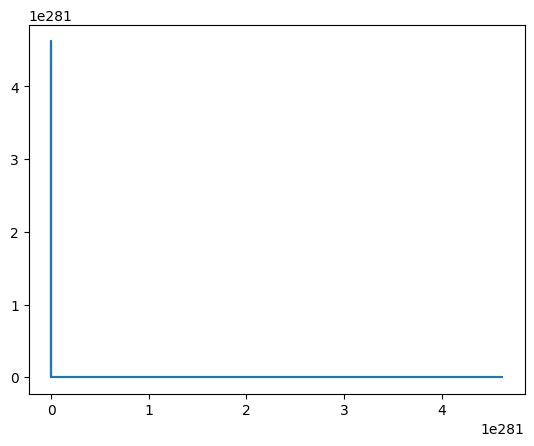

164th iteration, 764.6206842894208


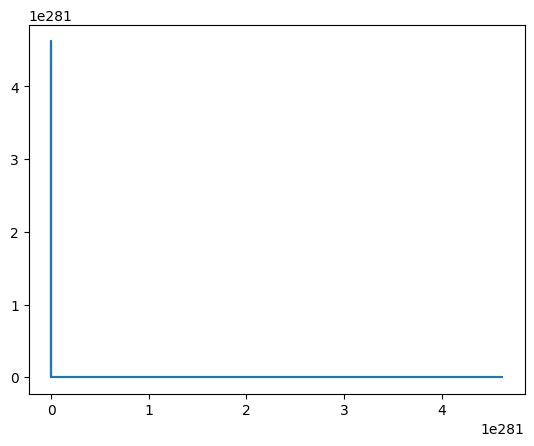

165th iteration, 764.6165676155001


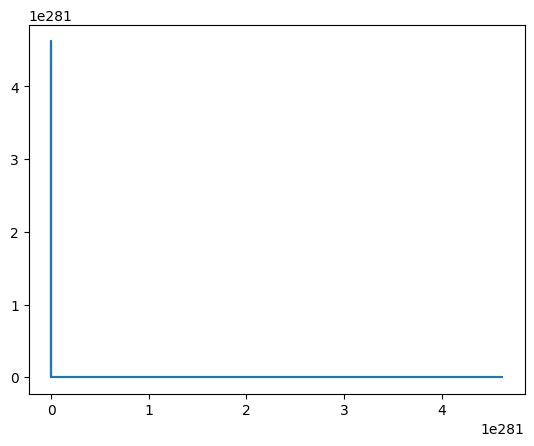

166th iteration, 764.6124509790419


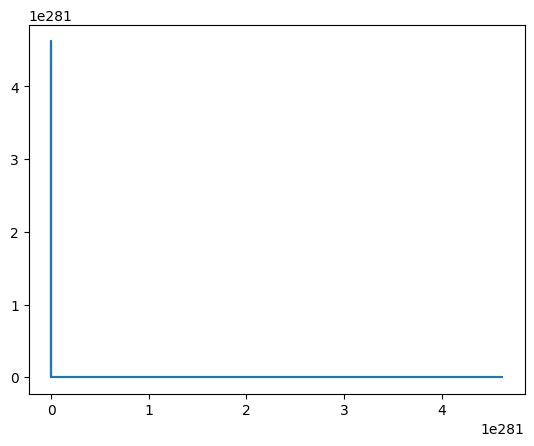

167th iteration, 764.6083343800467


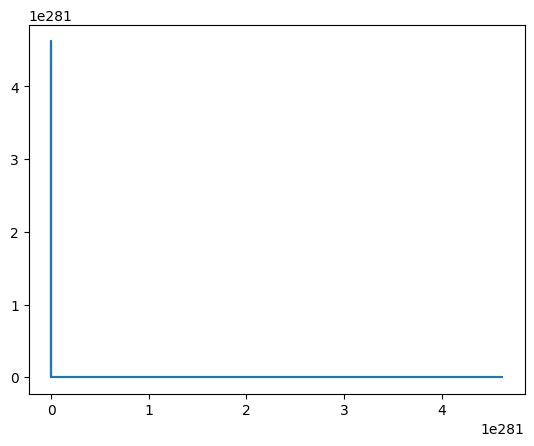

168th iteration, 764.604217818514


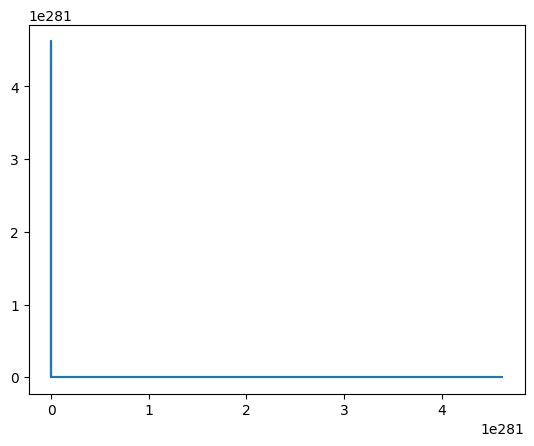

169th iteration, 764.6001012944431


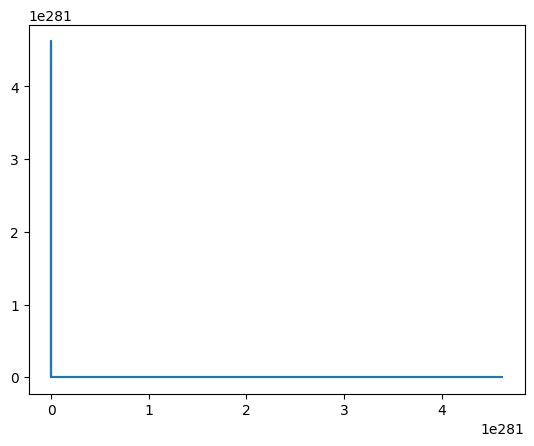

170th iteration, 764.5959848078338


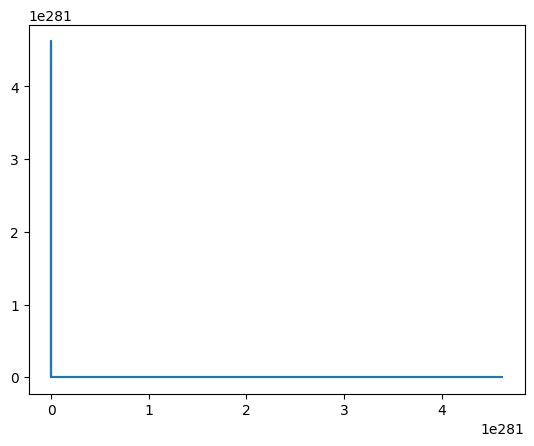

171th iteration, 764.5918683586856


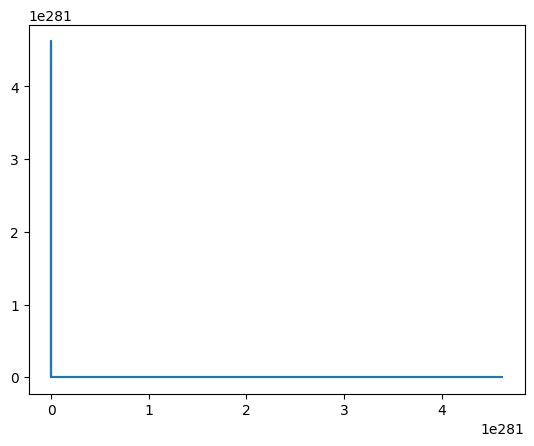

172th iteration, 764.5877519469977


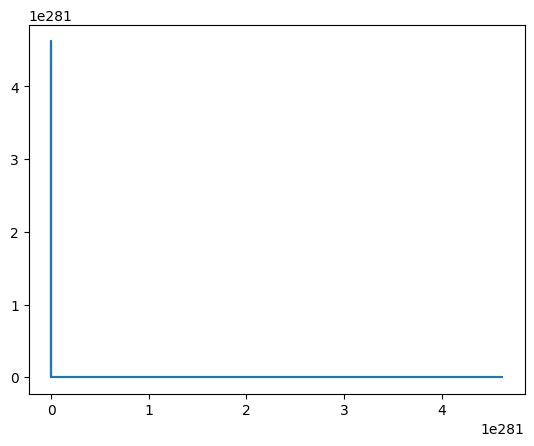

173th iteration, 764.5836355727705


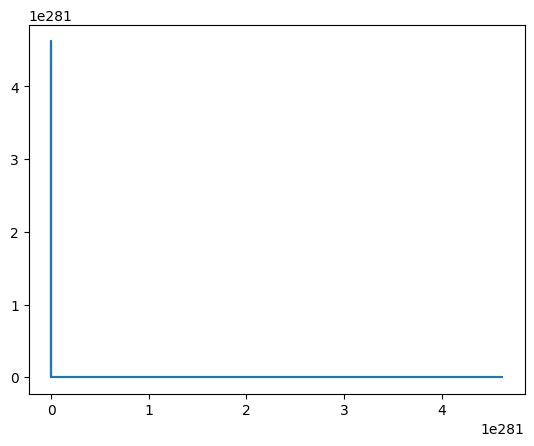

174th iteration, 764.5795192360033


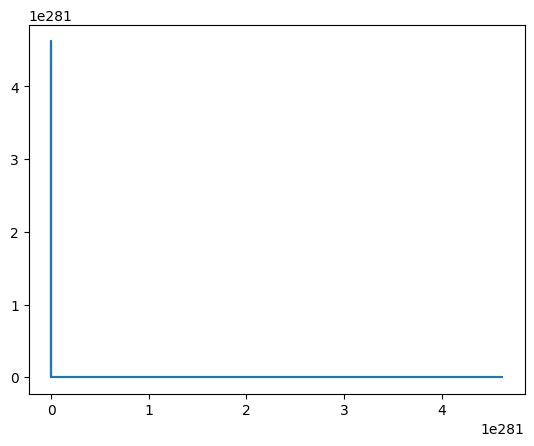

175th iteration, 764.5754029366959


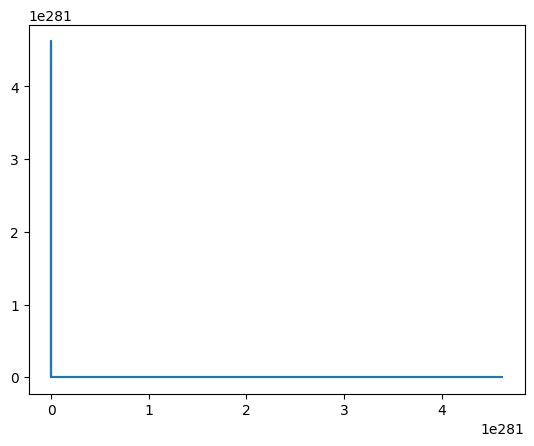

176th iteration, 764.5712866748474


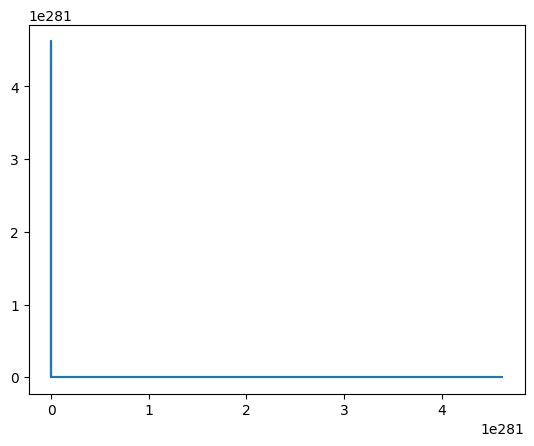

177th iteration, 764.5671704504579


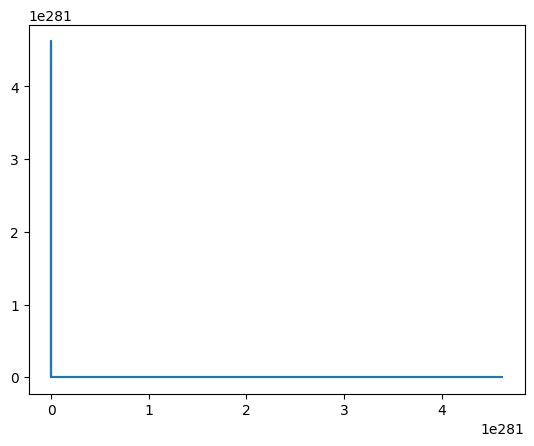

178th iteration, 764.5630542635267


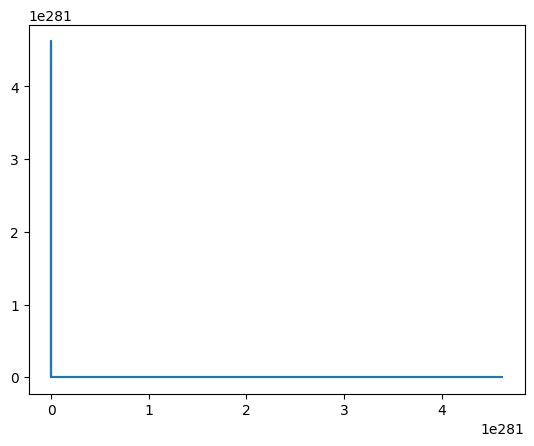

179th iteration, 764.5589381140535


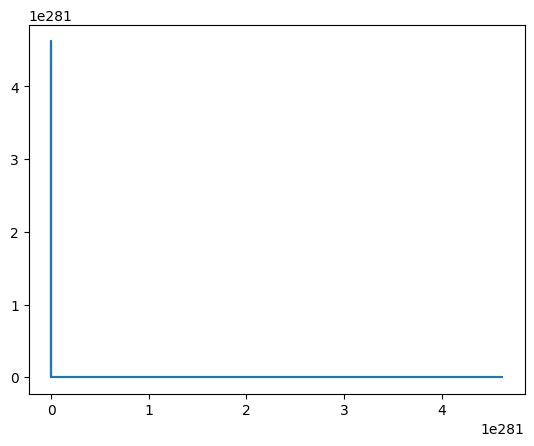

180th iteration, 764.554822002038


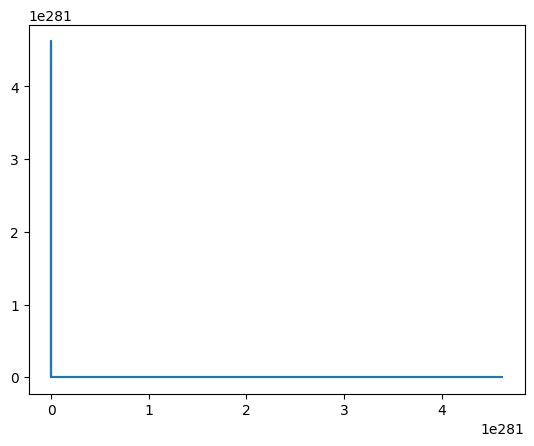

181th iteration, 764.5507059274798


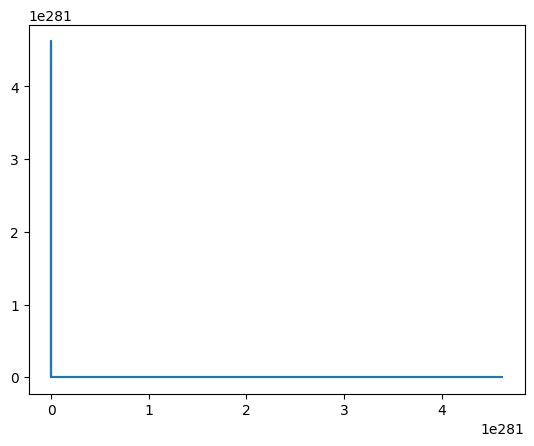

182th iteration, 764.5465898903783


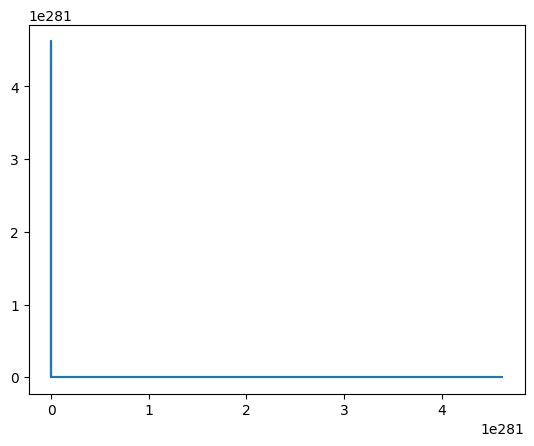

183th iteration, 764.5424738907336


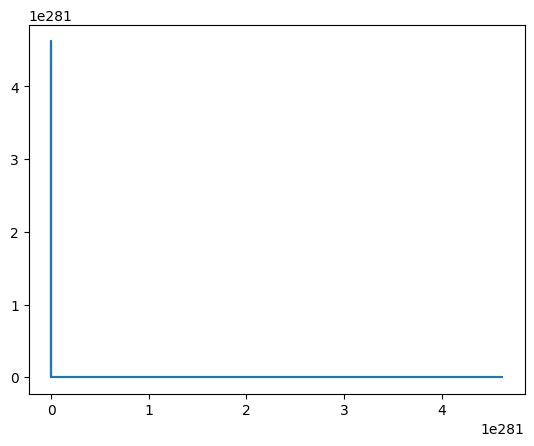

184th iteration, 764.5383579285449


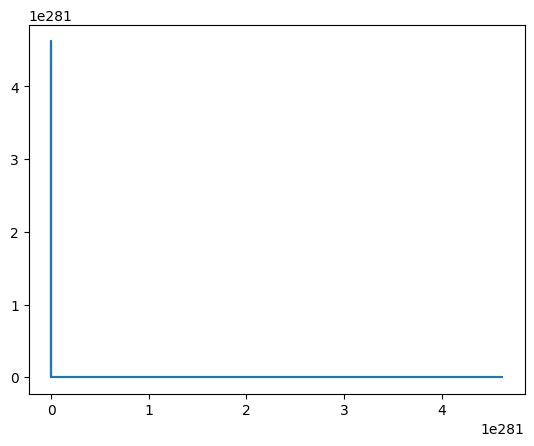

185th iteration, 764.5342420038114


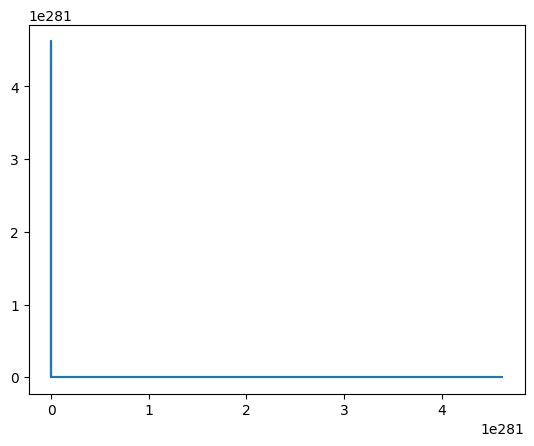

186th iteration, 764.5301261165336


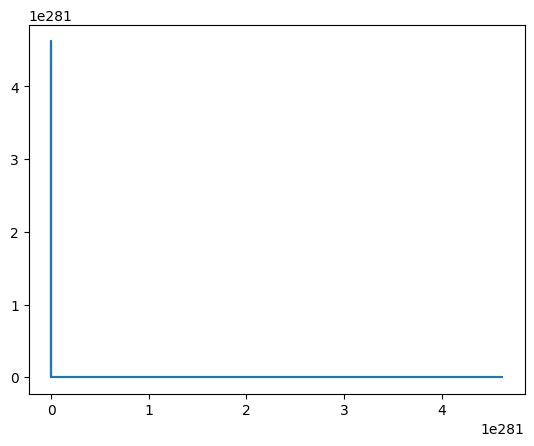

187th iteration, 764.5260102667106


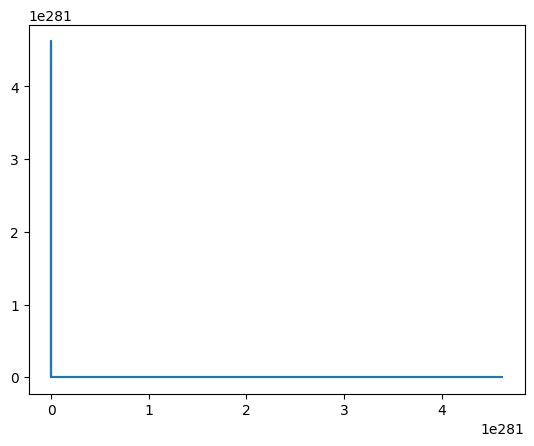

188th iteration, 764.5218944543426


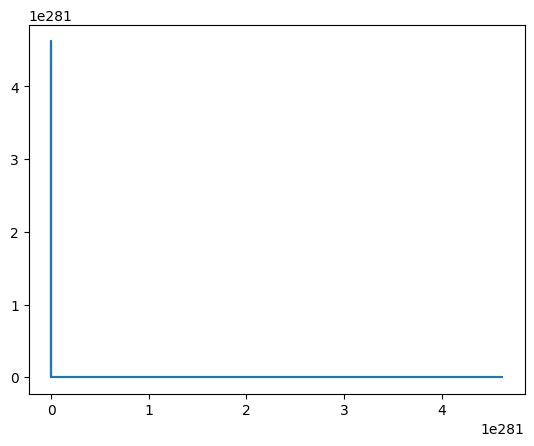

189th iteration, 764.5177786794284


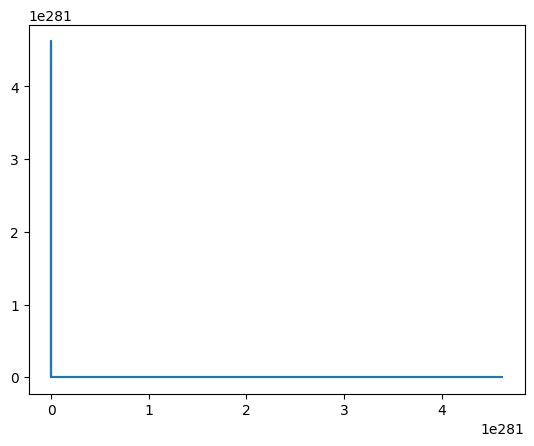

190th iteration, 764.513662941968


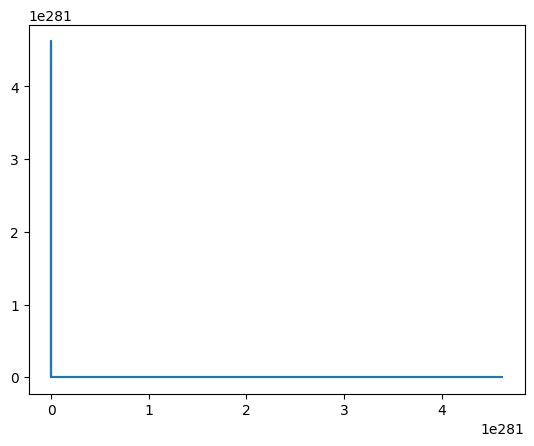

191th iteration, 764.5095472419611


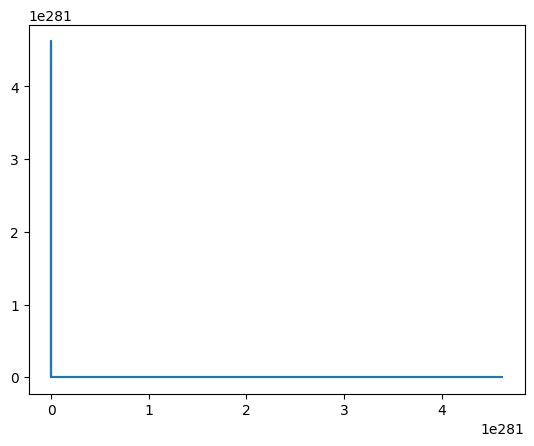

192th iteration, 764.5054315794073


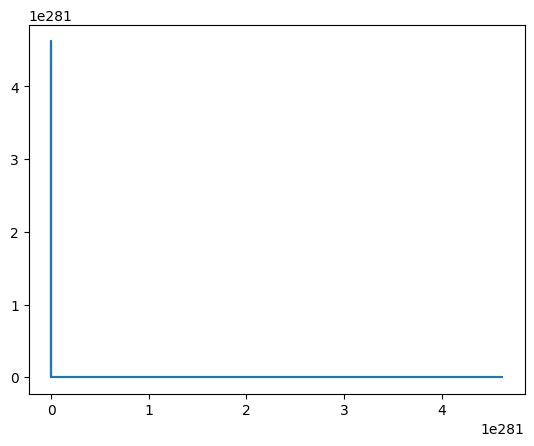

193th iteration, 764.5013159543058


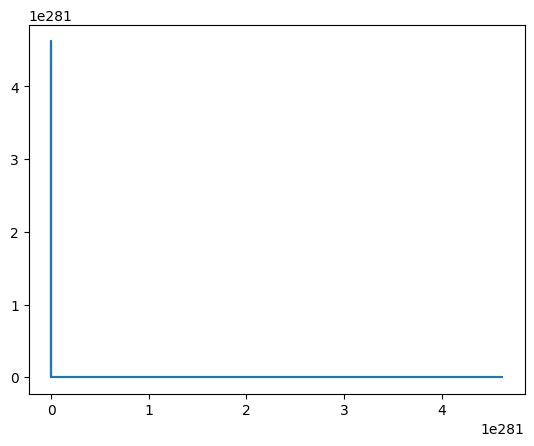

194th iteration, 764.4972003666567


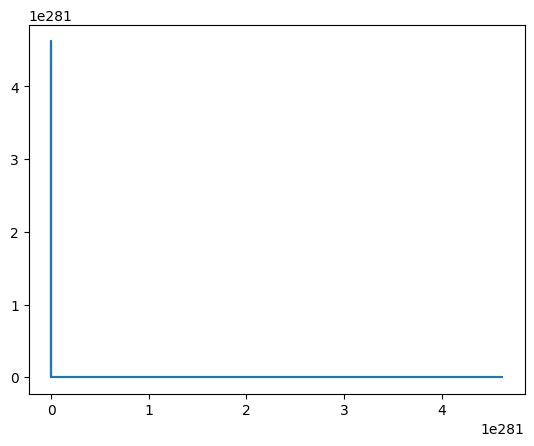

195th iteration, 764.4930848164594


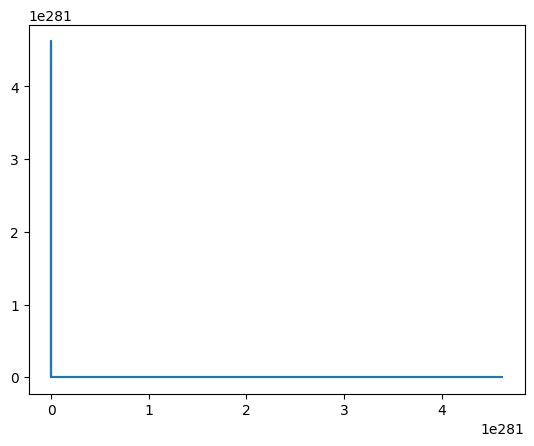

196th iteration, 764.4889693037134


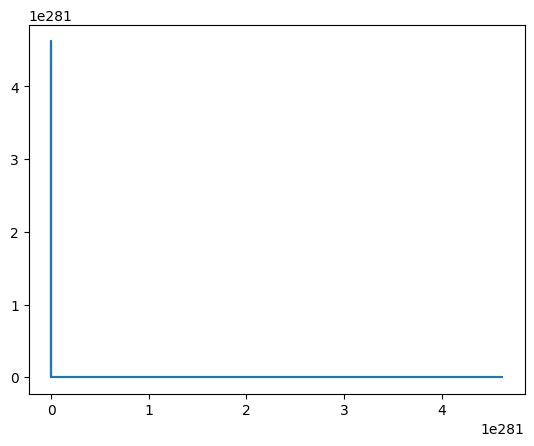

197th iteration, 764.4848538284191


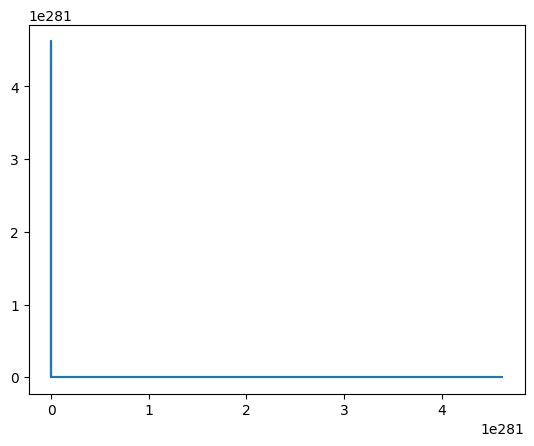

198th iteration, 764.4807383905751


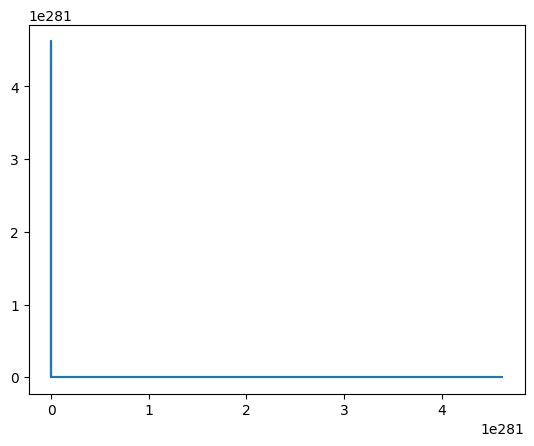

199th iteration, 764.4766229901816


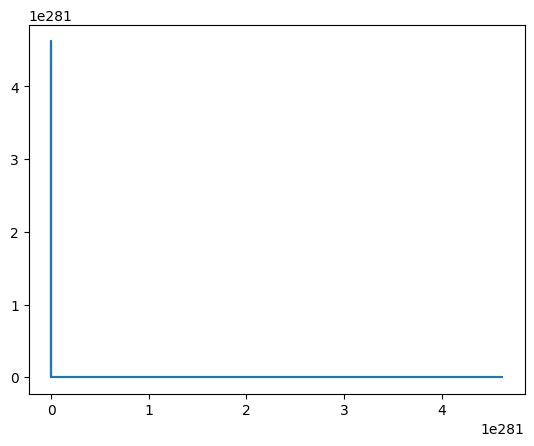

200th iteration, 764.472507627238


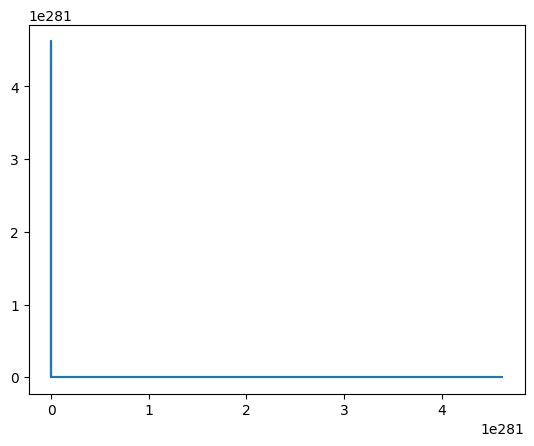

201th iteration, 764.4683923017434


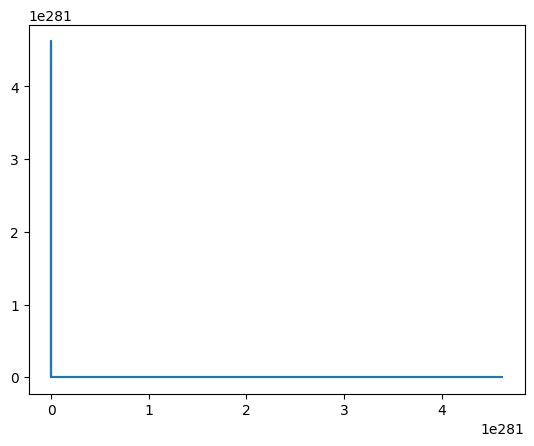

202th iteration, 764.4642770136986


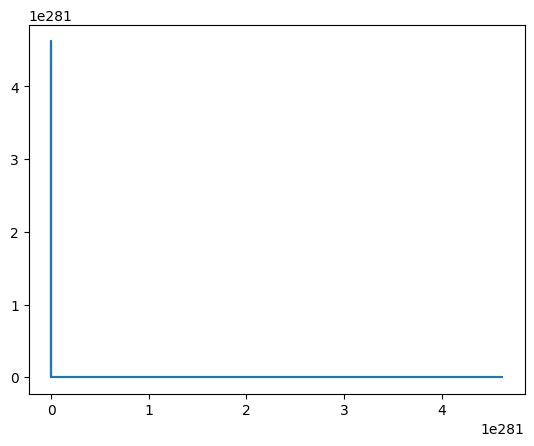

203th iteration, 764.4601617631023


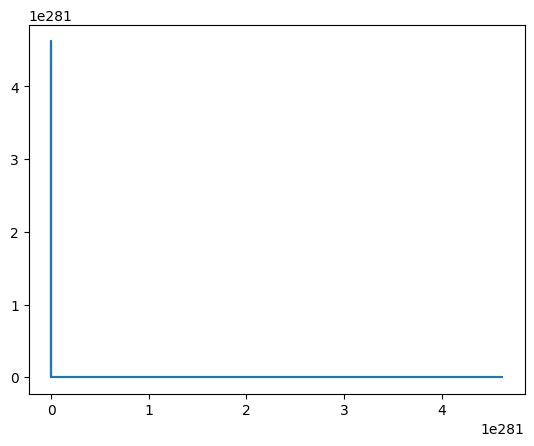

204th iteration, 764.4560465499544


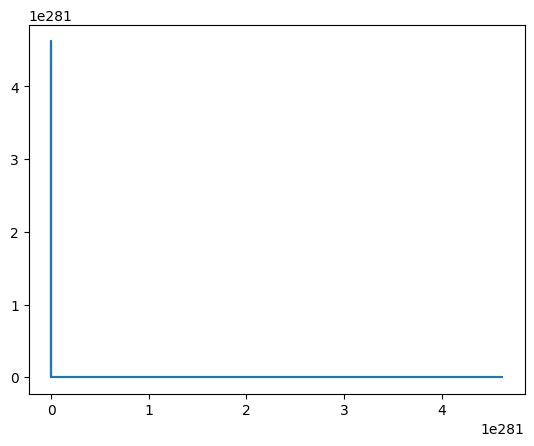

205th iteration, 764.4519313742547


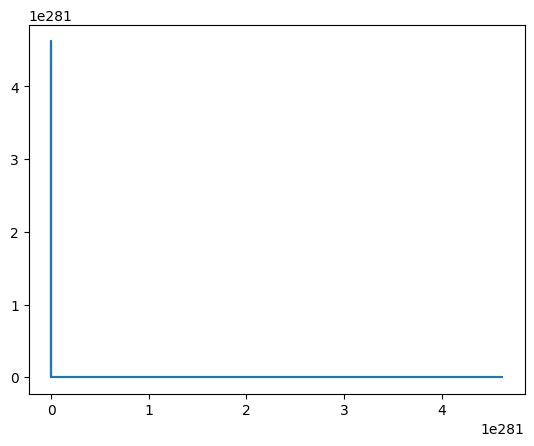

206th iteration, 764.4478162360026


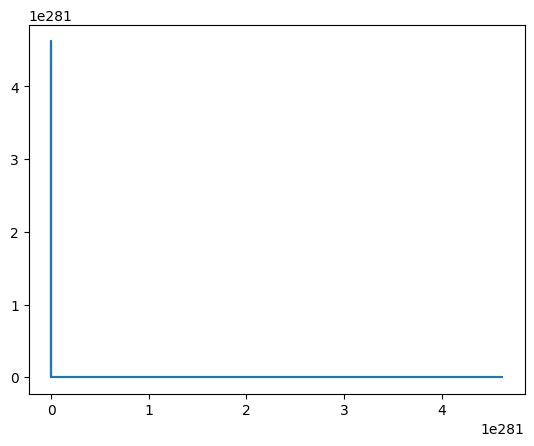

207th iteration, 764.4437011351971


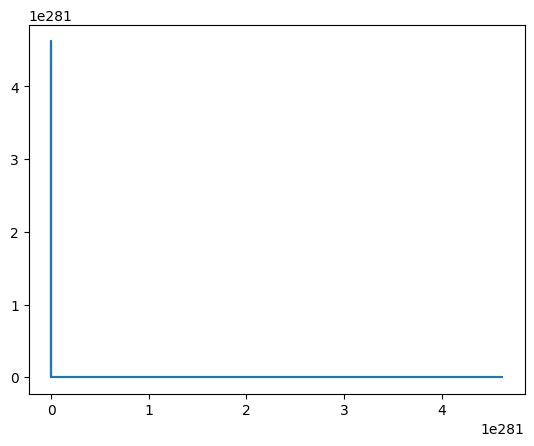

208th iteration, 764.4395860718387


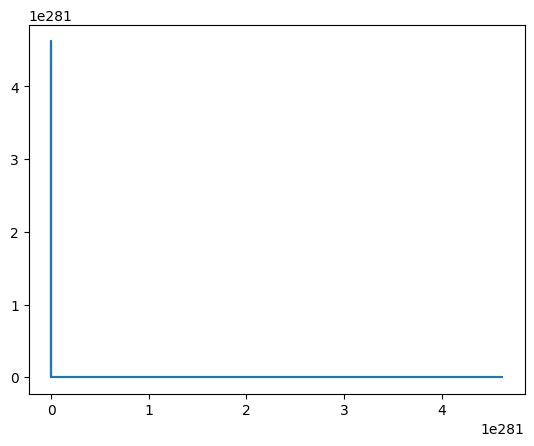

209th iteration, 764.435471045927


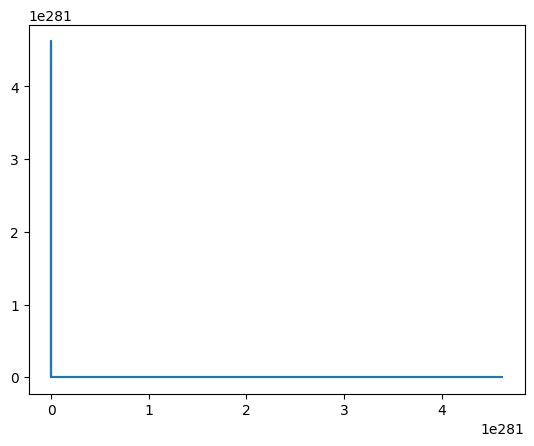

210th iteration, 764.4313560574614


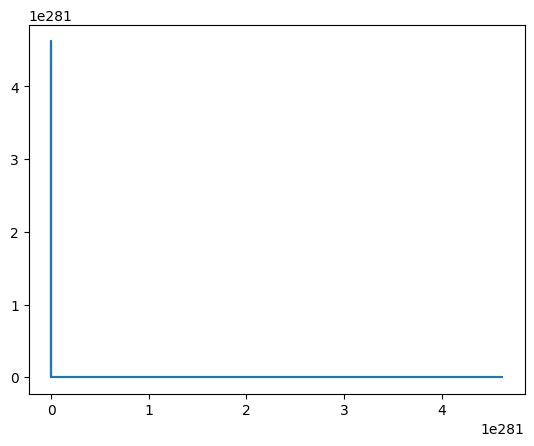

211th iteration, 764.4272411064412


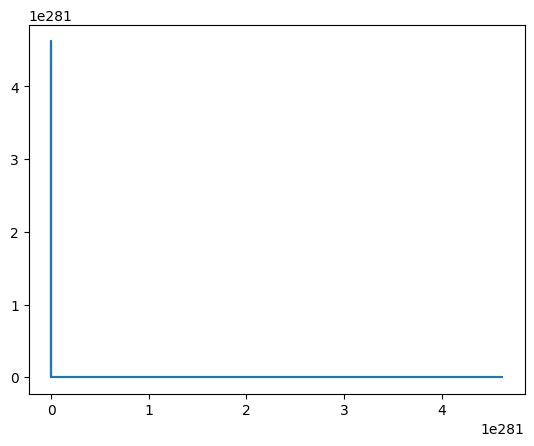

212th iteration, 764.4231261928664


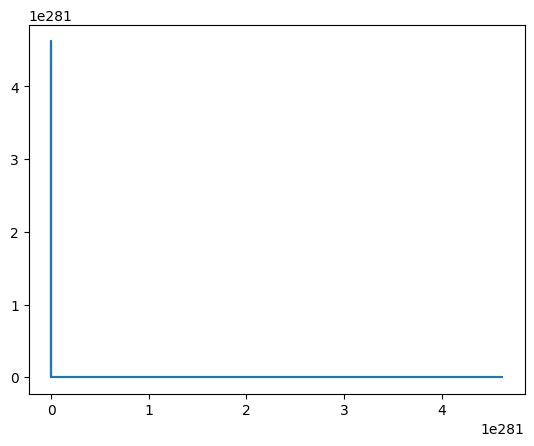

213th iteration, 764.4190113167366


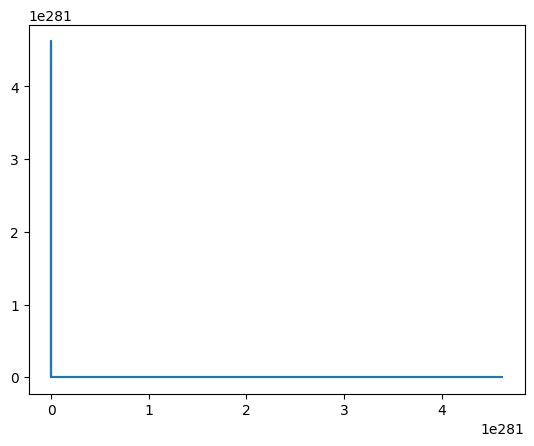

214th iteration, 764.4148964780513


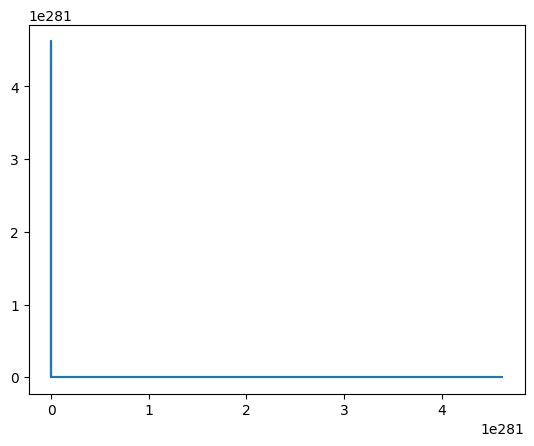

215th iteration, 764.4107816768102


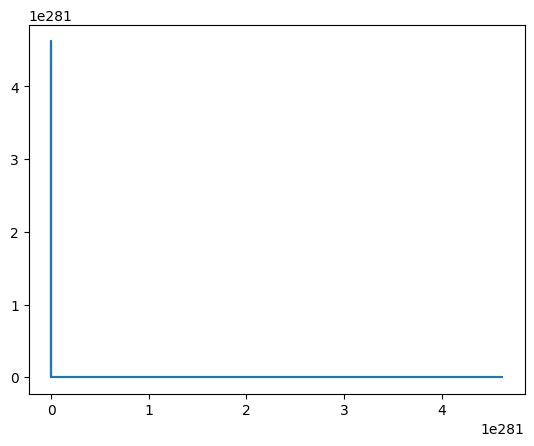

216th iteration, 764.4066669130124


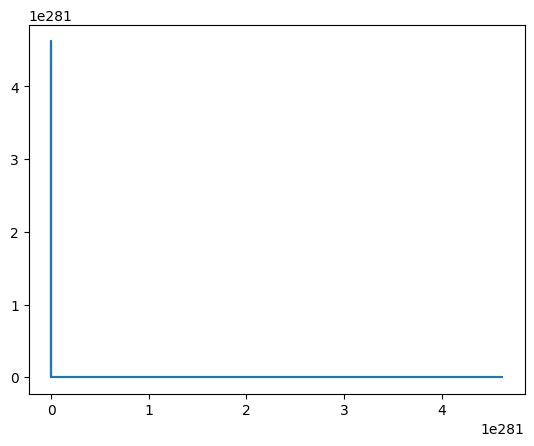

217th iteration, 764.402552186658


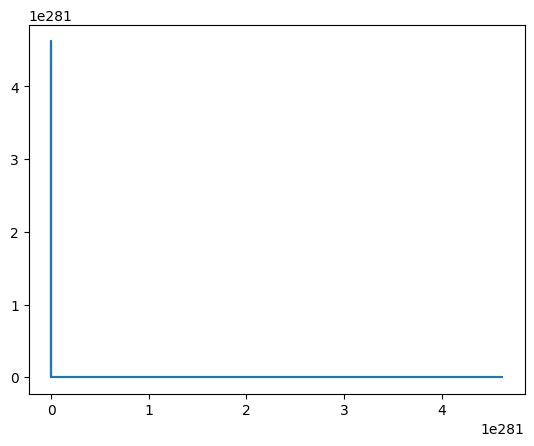

218th iteration, 764.3984374977468


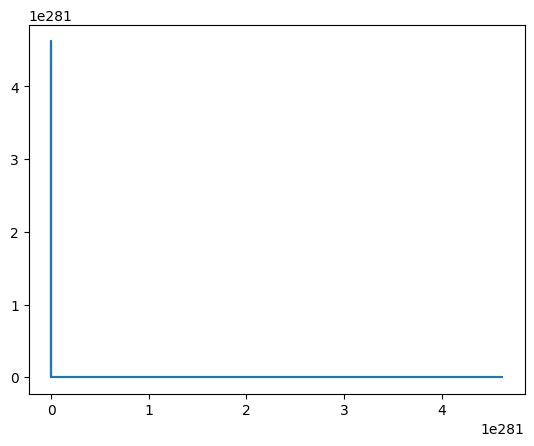

219th iteration, 764.394322846278


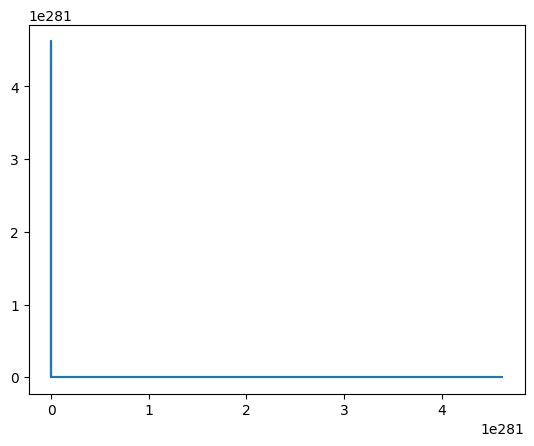

220th iteration, 764.3902082322518


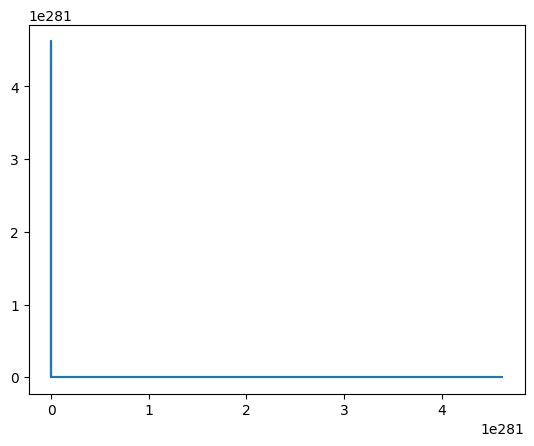

221th iteration, 764.3860936556672


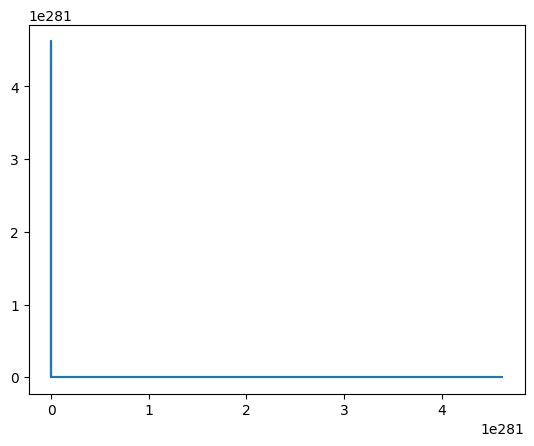

222th iteration, 764.3819791165237


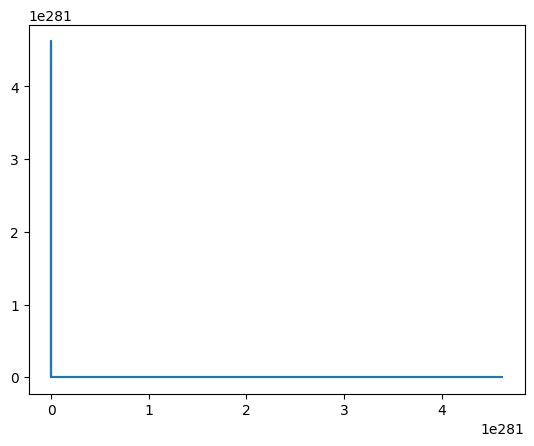

223th iteration, 764.3778646148214


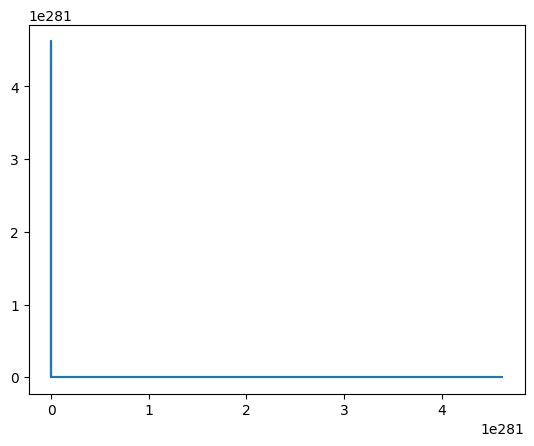

224th iteration, 764.3737501505597


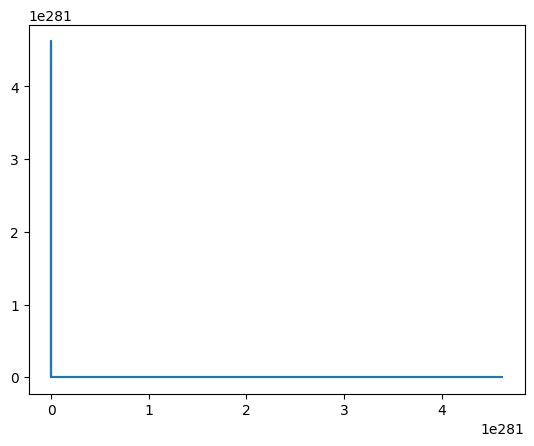

225th iteration, 764.3696357237385


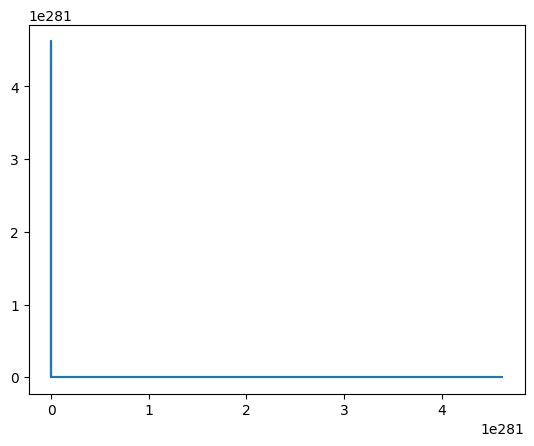

226th iteration, 764.3655213343568


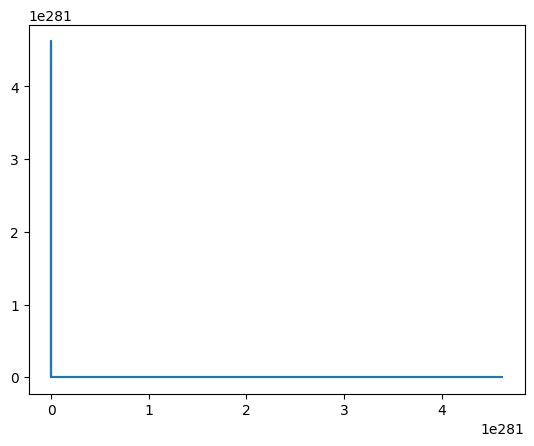

227th iteration, 764.3614069824148


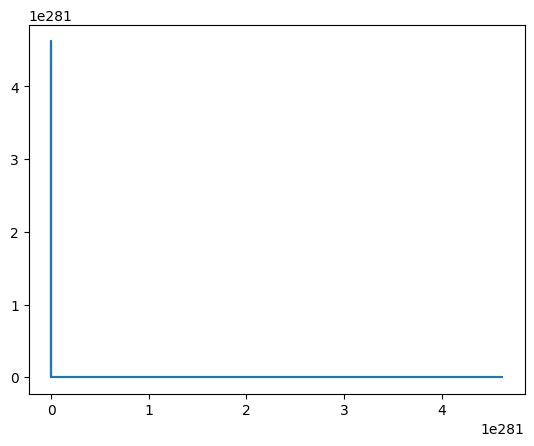

228th iteration, 764.357292667912


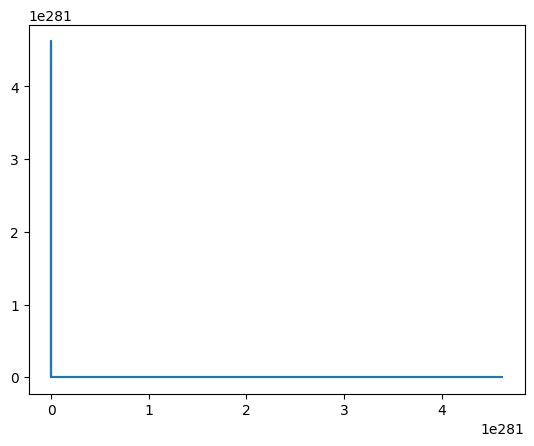

229th iteration, 764.353178390848


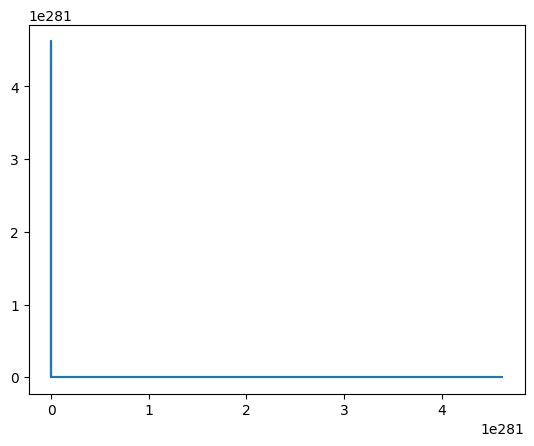

230th iteration, 764.3490641512223


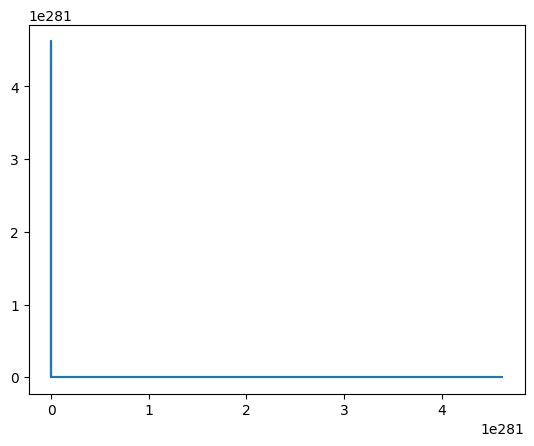

231th iteration, 764.3449499490347


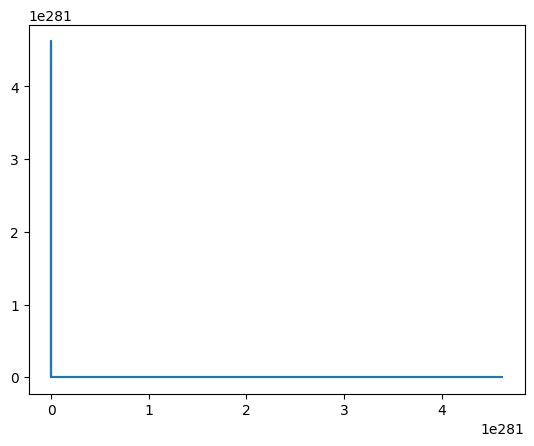

232th iteration, 764.3408357842841


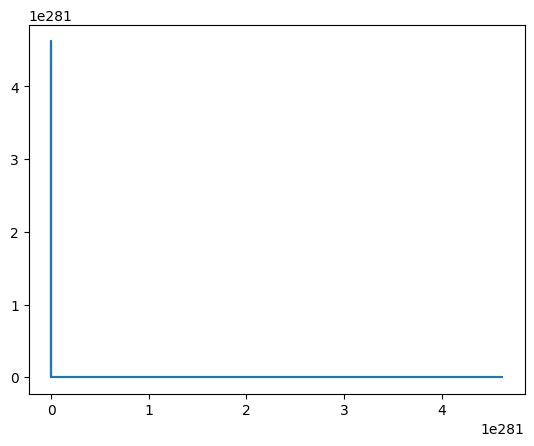

233th iteration, 764.3367216569711


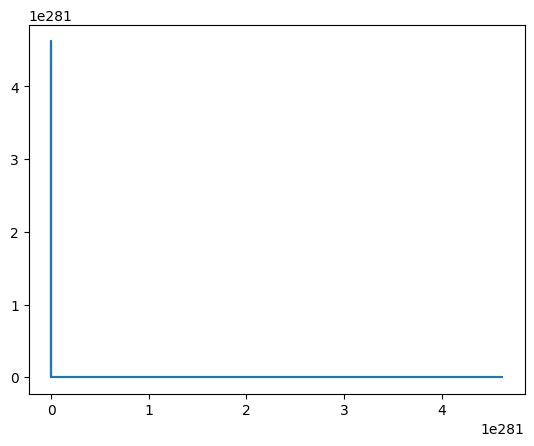

234th iteration, 764.332607567095


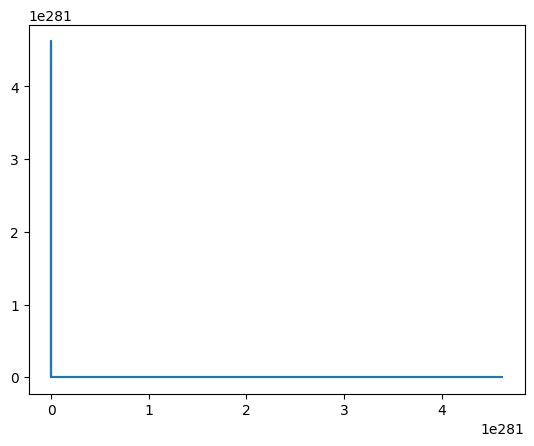

235th iteration, 764.3284935146548


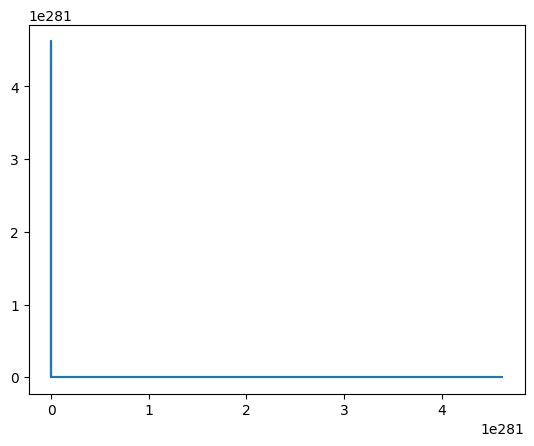

236th iteration, 764.324379499651


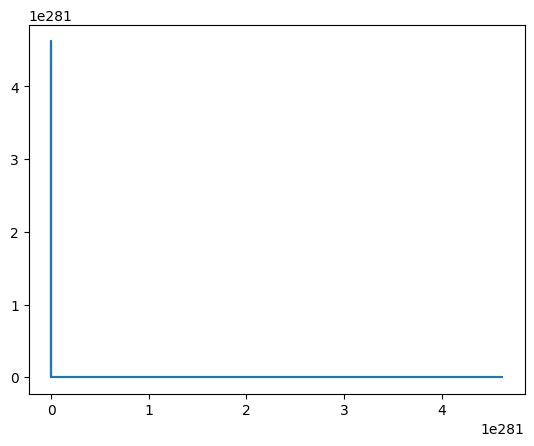

237th iteration, 764.3202655220827


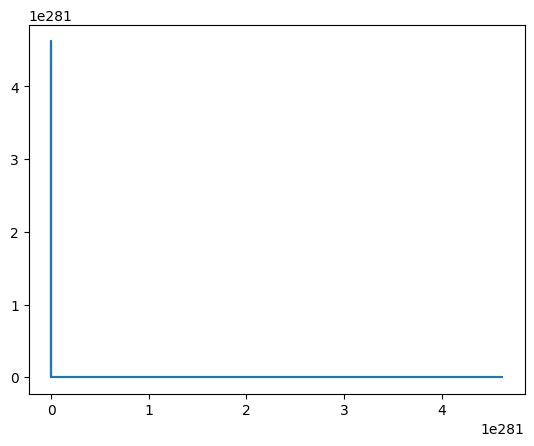

238th iteration, 764.3161515819497


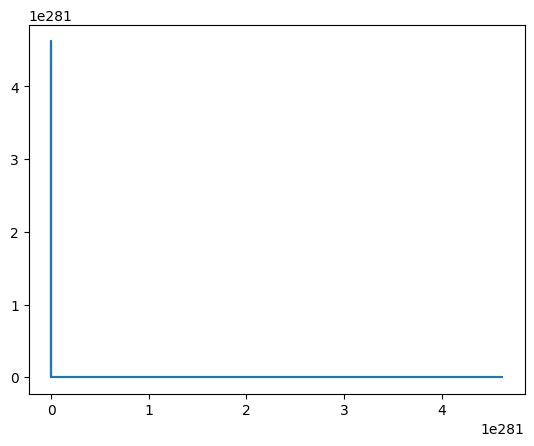

239th iteration, 764.3120376792517


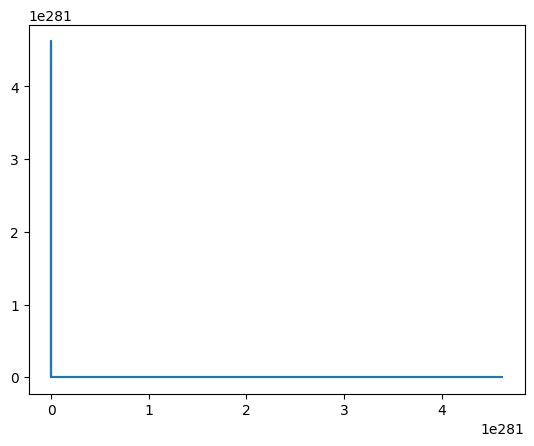

240th iteration, 764.3079238139877


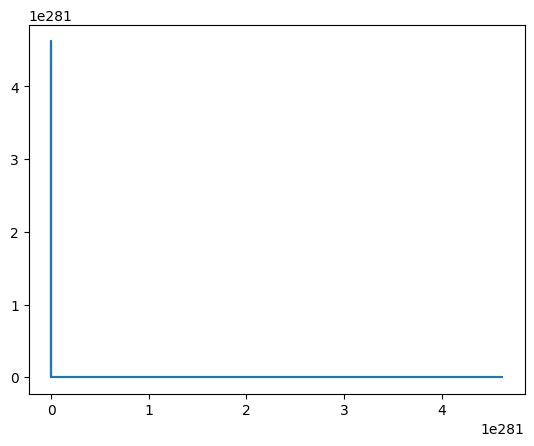

241th iteration, 764.303809986158


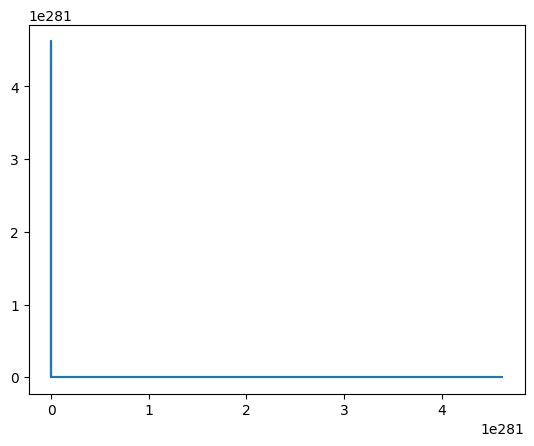

242th iteration, 764.299696195762


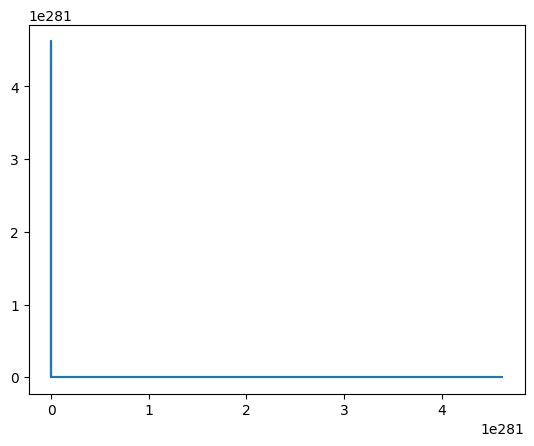

243th iteration, 764.2955824427991


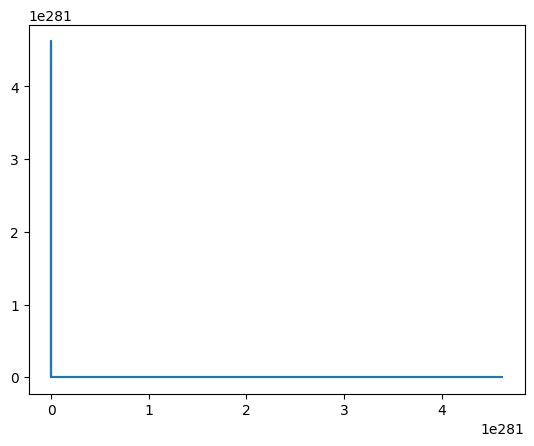

244th iteration, 764.2914687272694


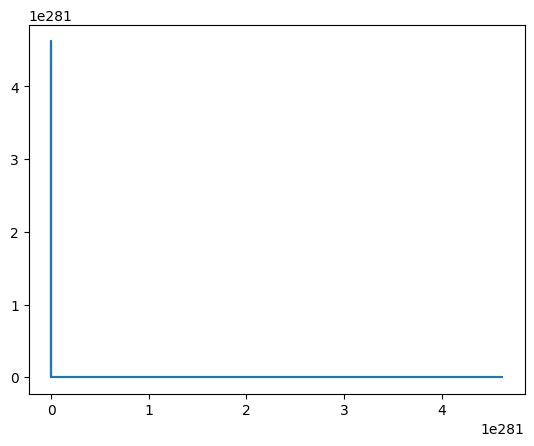

245th iteration, 764.2873550491724


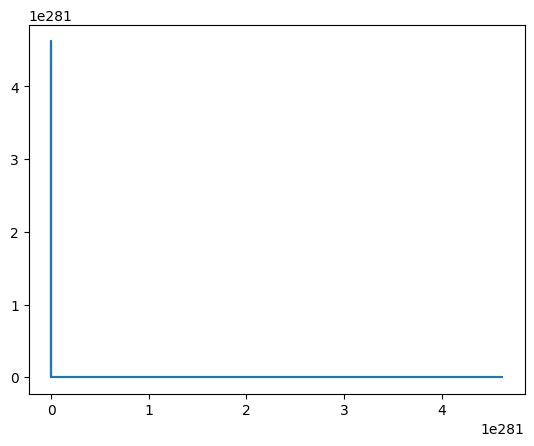

246th iteration, 764.2832414085074


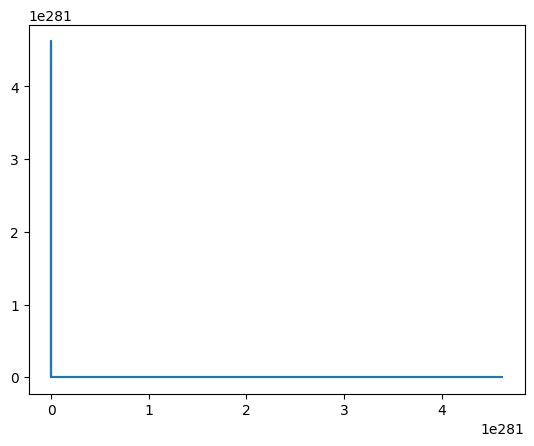

247th iteration, 764.279127805274


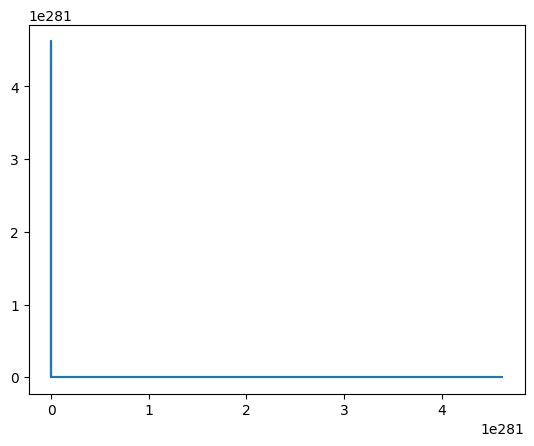

248th iteration, 764.275014239472


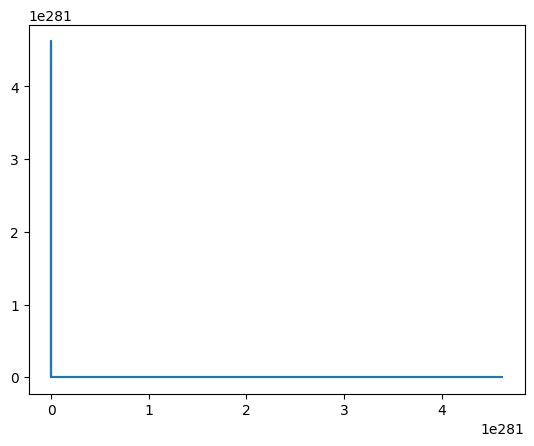

249th iteration, 764.2709007111011


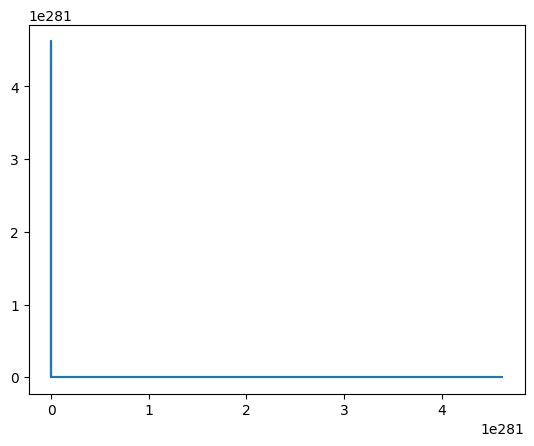

250th iteration, 764.2667872201607


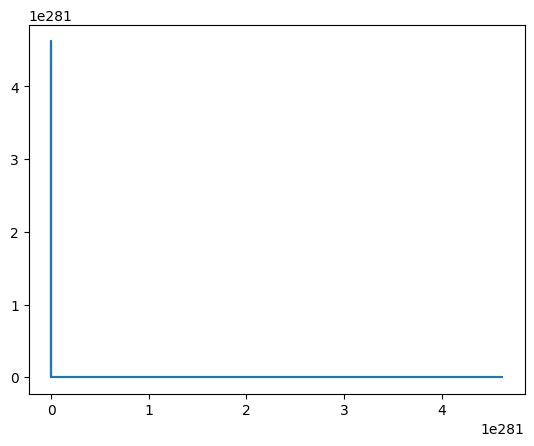

251th iteration, 764.262673766651


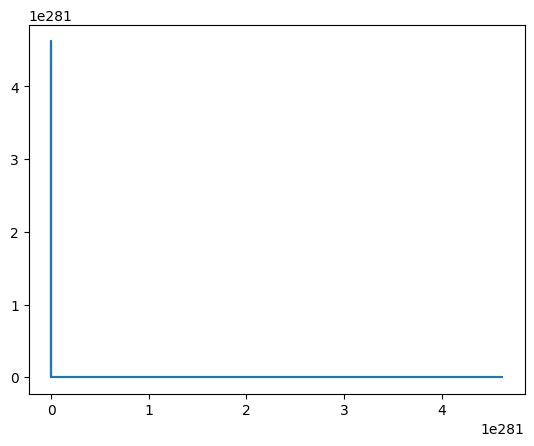

252th iteration, 764.258560350571


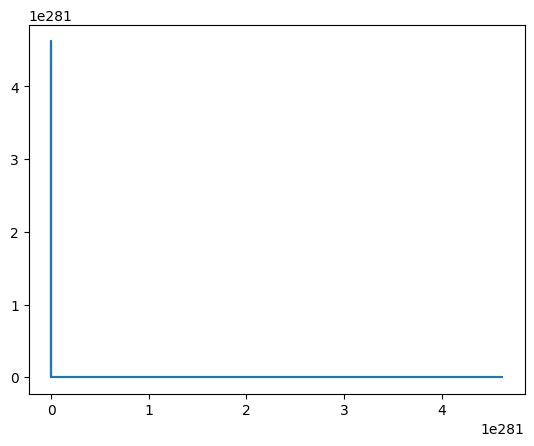

253th iteration, 764.2544469719202


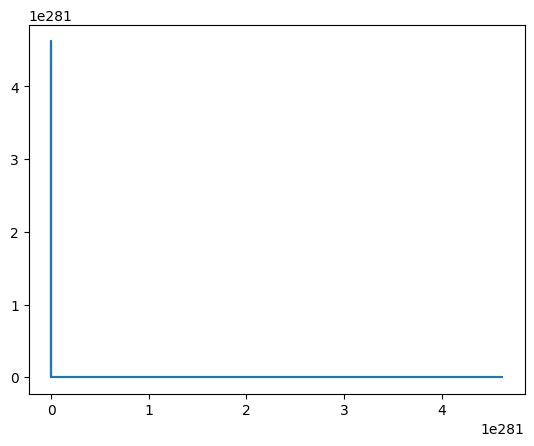

254th iteration, 764.2503336306985


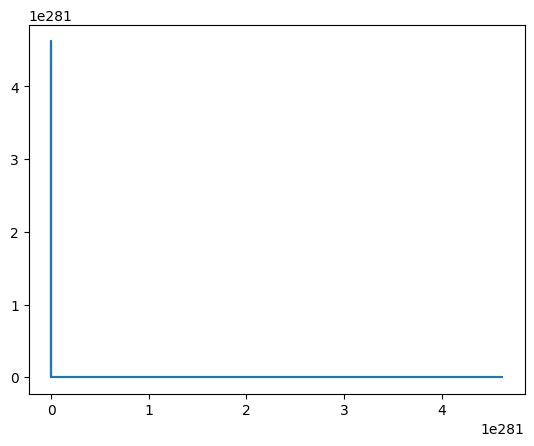

255th iteration, 764.2462203269054


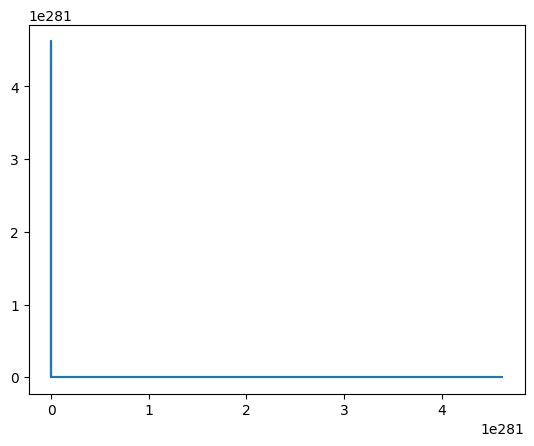

256th iteration, 764.2421070605411


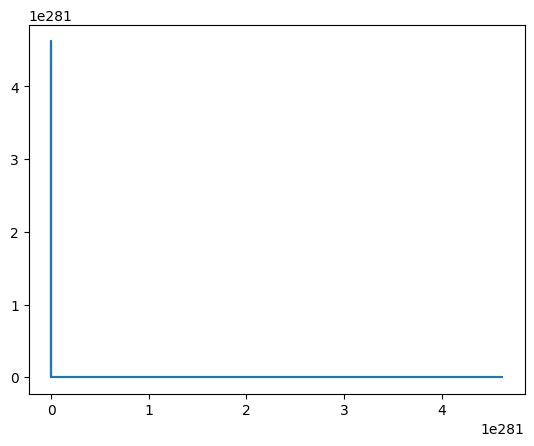

257th iteration, 764.2379938316042


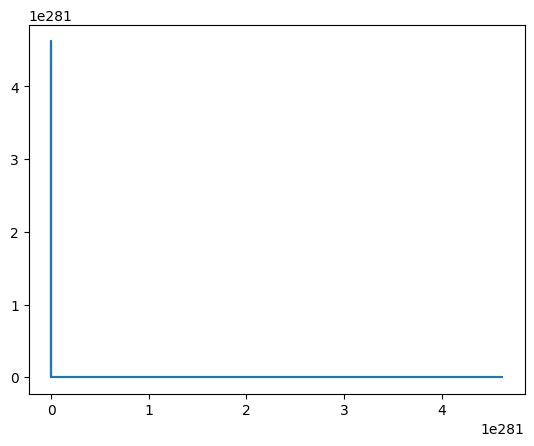

258th iteration, 764.233880640095


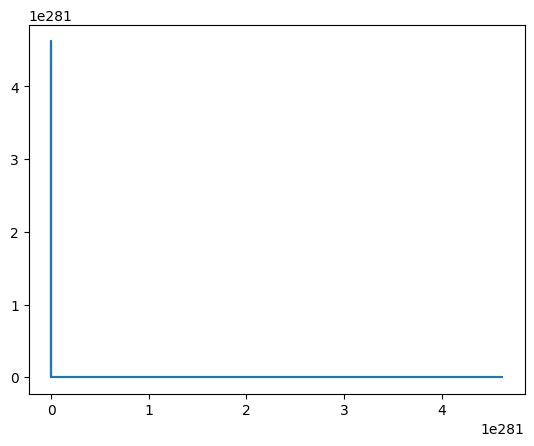

259th iteration, 764.2297674860132


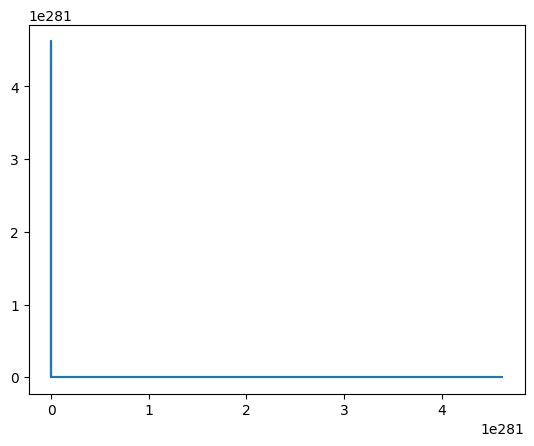

260th iteration, 764.2256543693583


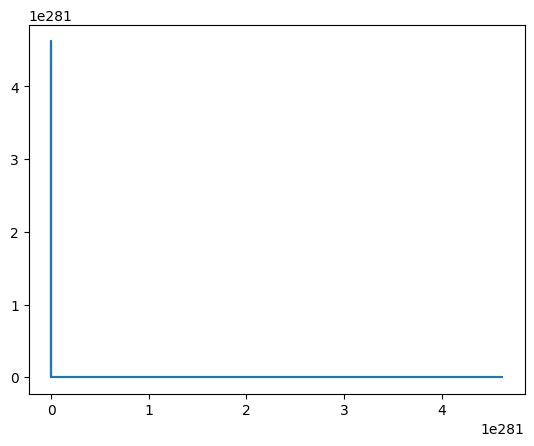

261th iteration, 764.2215412901294


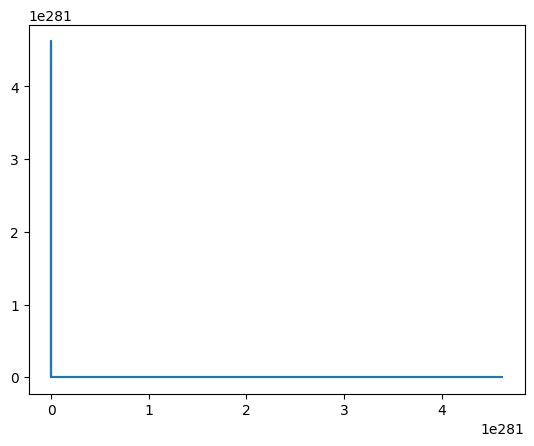

262th iteration, 764.2174282483264


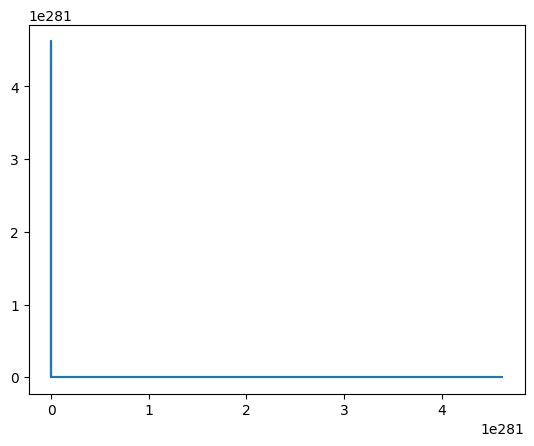

263th iteration, 764.2133152439492


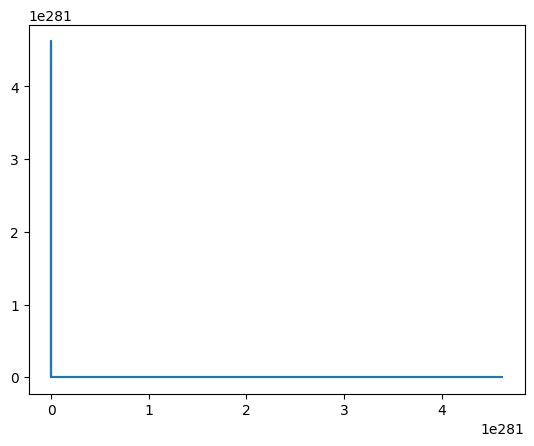

264th iteration, 764.209202276997


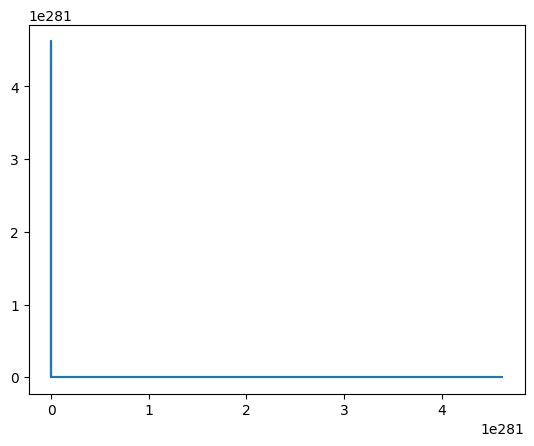

265th iteration, 764.2050893474694


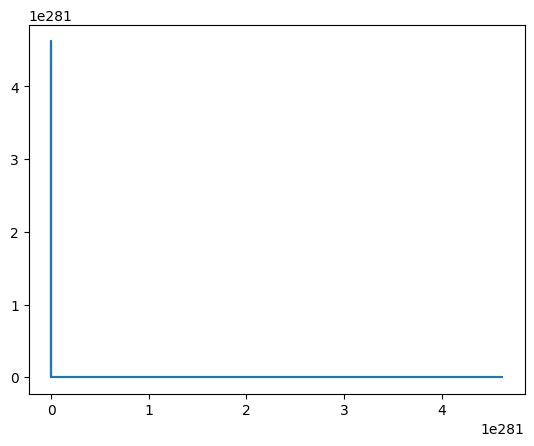

266th iteration, 764.2009764553666


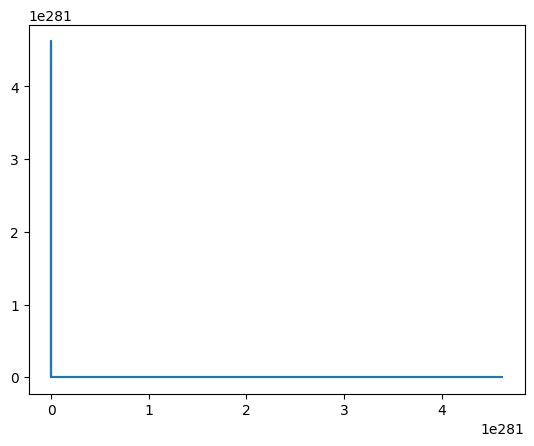

267th iteration, 764.1968636006881


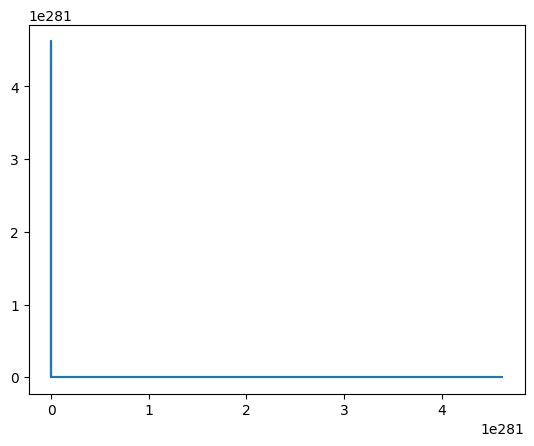

268th iteration, 764.1927507834328


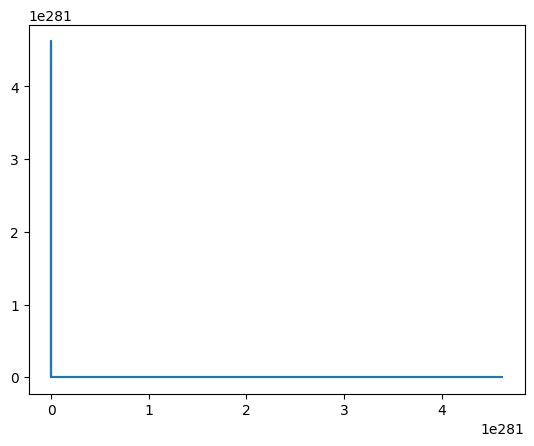

269th iteration, 764.1886380036015


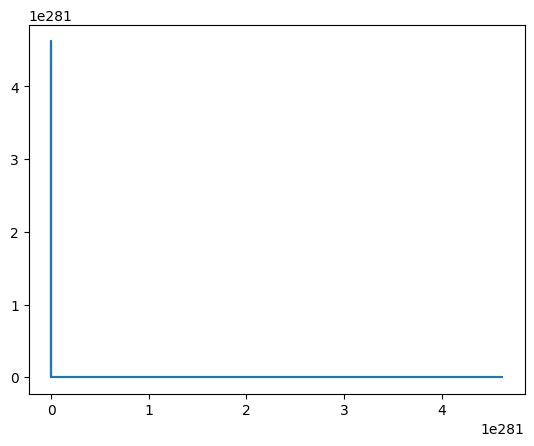

270th iteration, 764.1845252611923


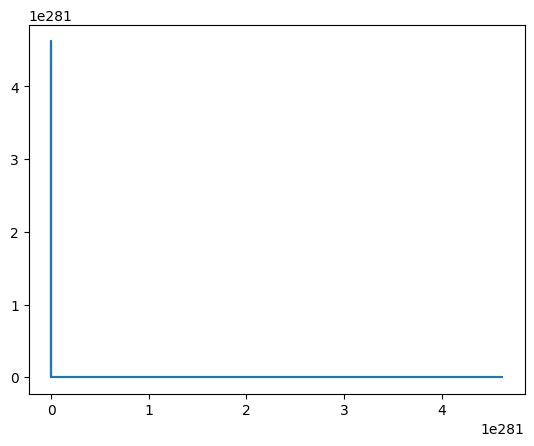

271th iteration, 764.180412556206


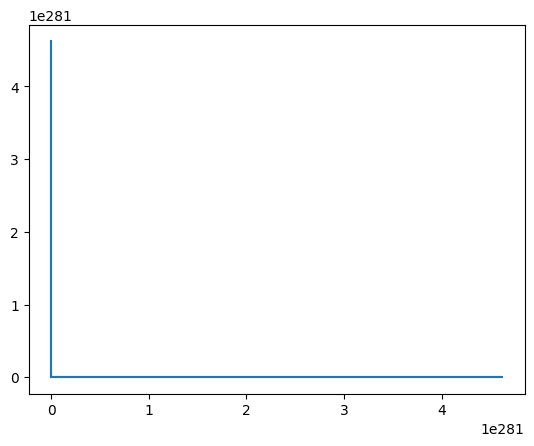

272th iteration, 764.176299888642


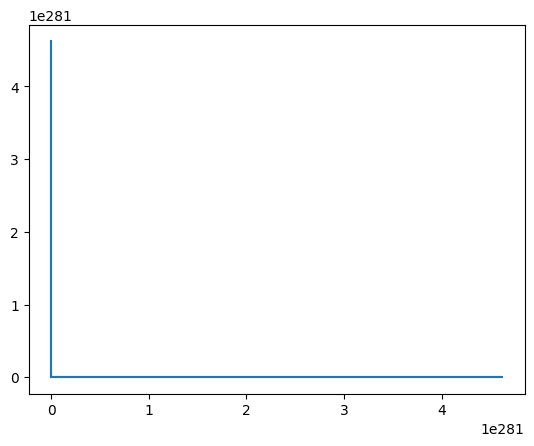

273th iteration, 764.1721872584995


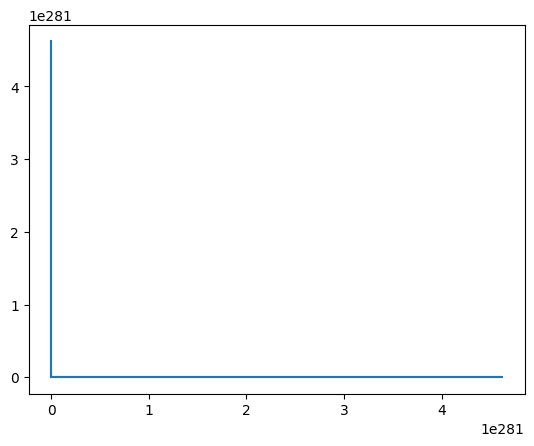

274th iteration, 764.1680746657787


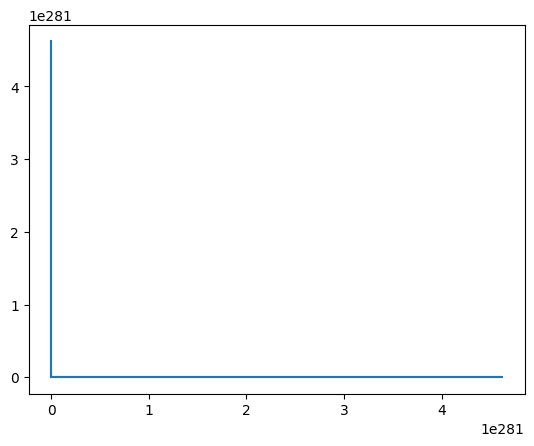

275th iteration, 764.1639621104788


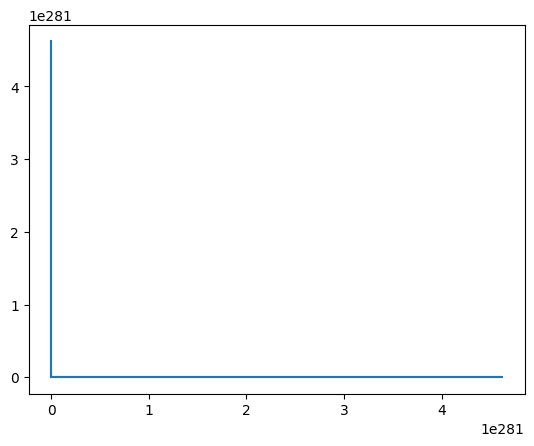

276th iteration, 764.159849592599


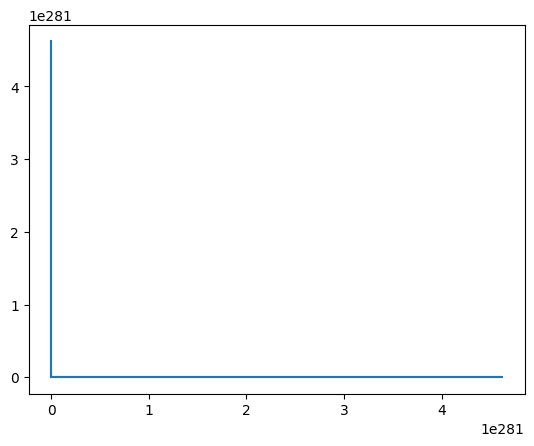

277th iteration, 764.15573711214


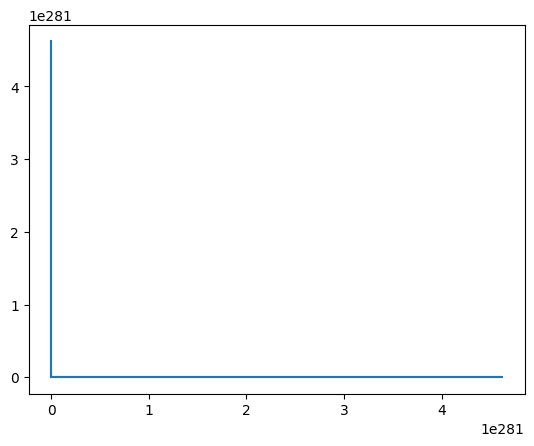

278th iteration, 764.1516246691007


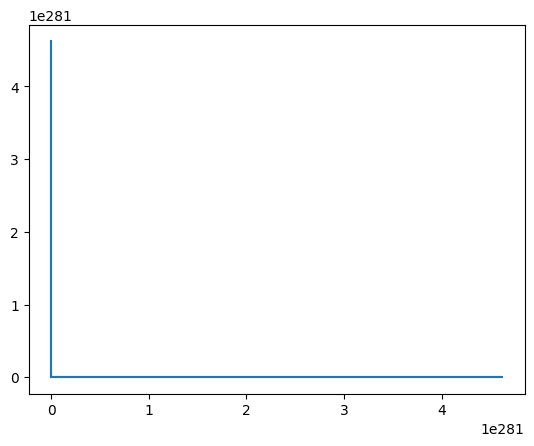

279th iteration, 764.1475122634807


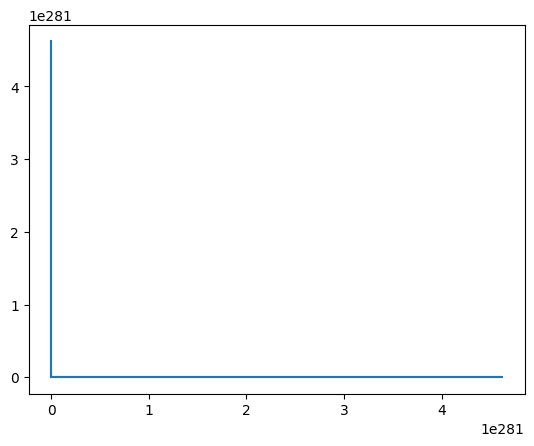

280th iteration, 764.14339989528


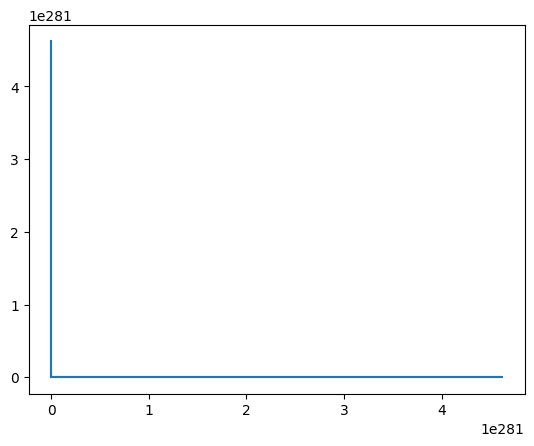

281th iteration, 764.1392875644979


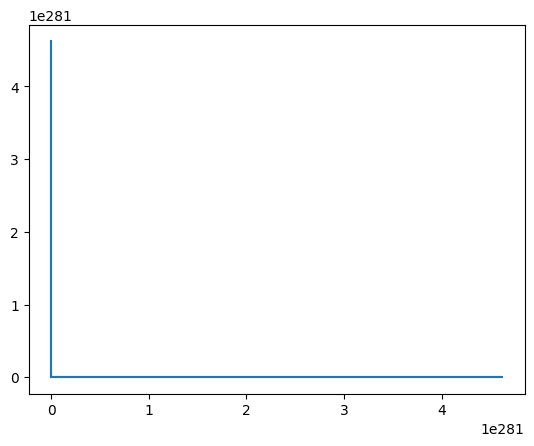

282th iteration, 764.1351752711337


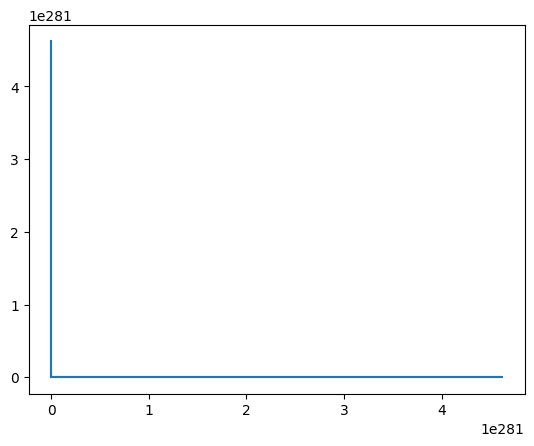

283th iteration, 764.1310630151876


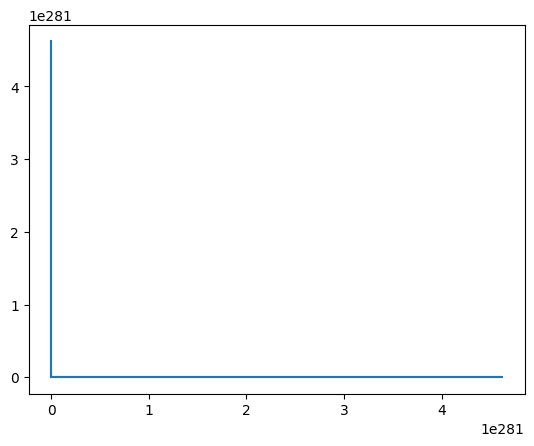

284th iteration, 764.126950796659


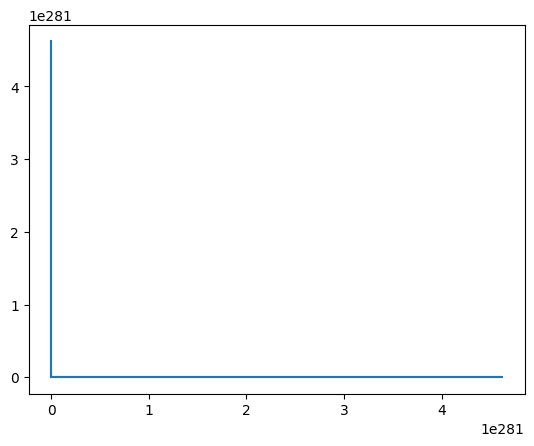

285th iteration, 764.1228386155478


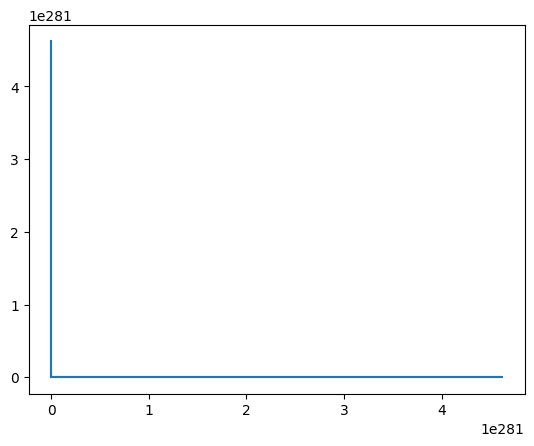

286th iteration, 764.1187264718532


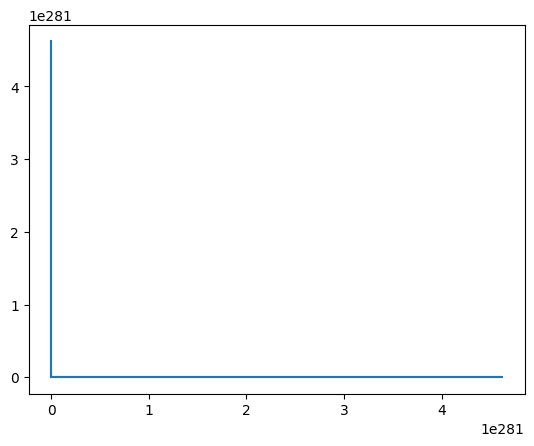

287th iteration, 764.1146143655749


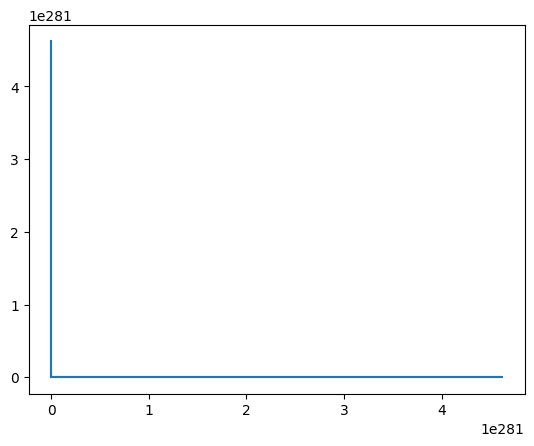

288th iteration, 764.1105022967125


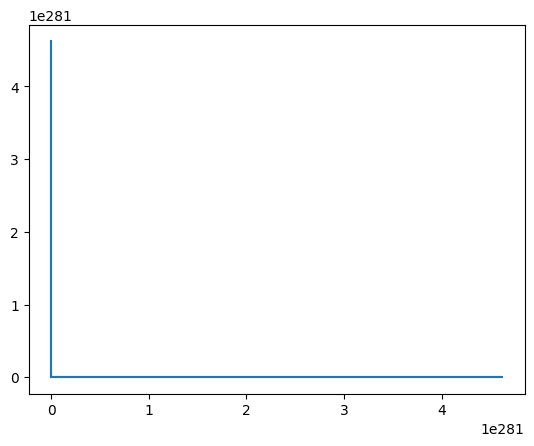

289th iteration, 764.106390265266


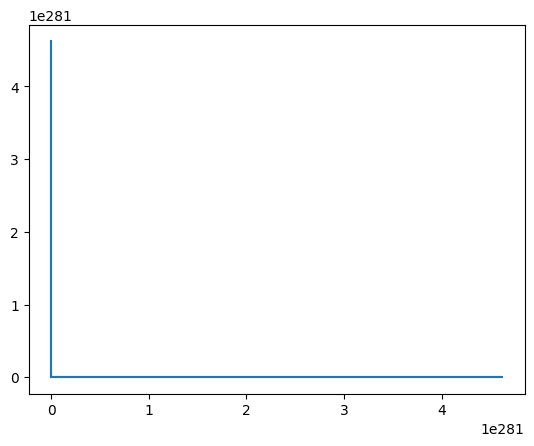

290th iteration, 764.1022782712342


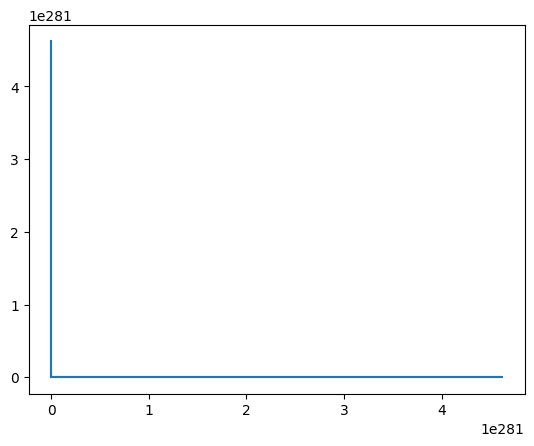

291th iteration, 764.0981663146181


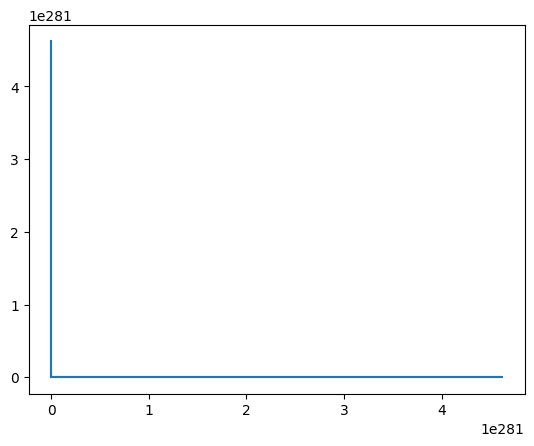

292th iteration, 764.094054395416


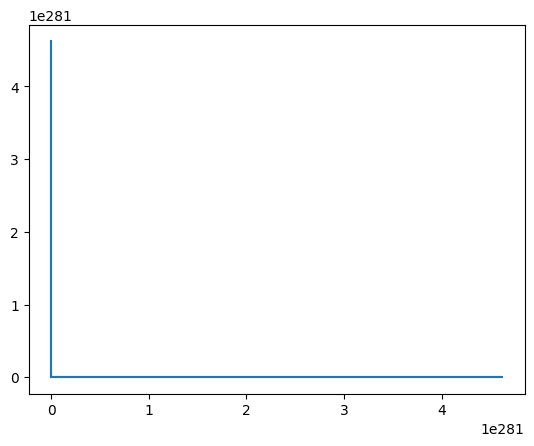

293th iteration, 764.089942513628


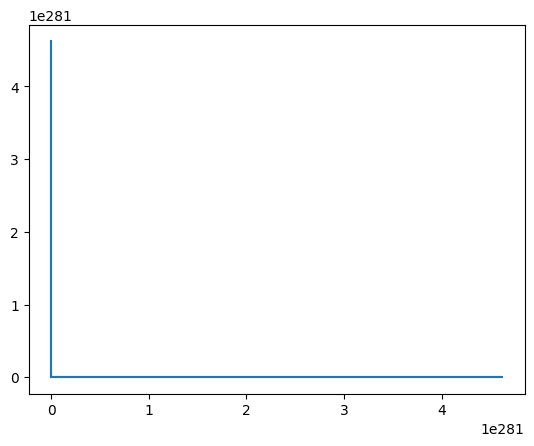

294th iteration, 764.0858306692536


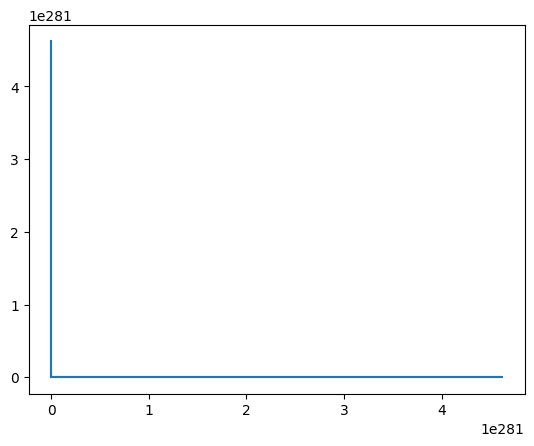

295th iteration, 764.0817188622923


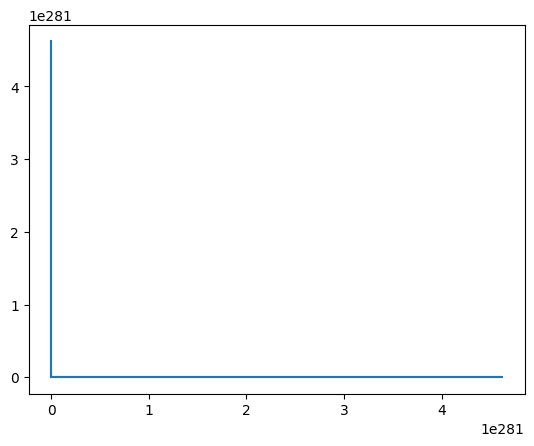

296th iteration, 764.077607092744


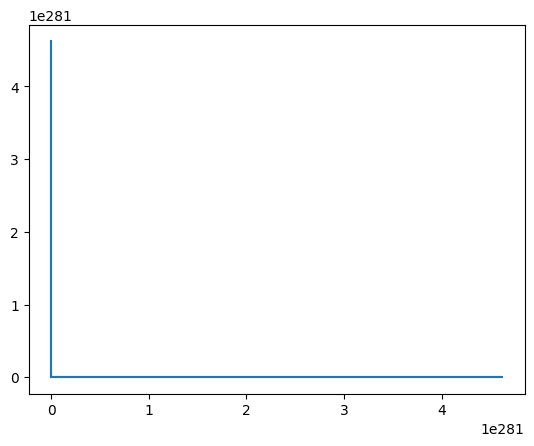

297th iteration, 764.0734953606083


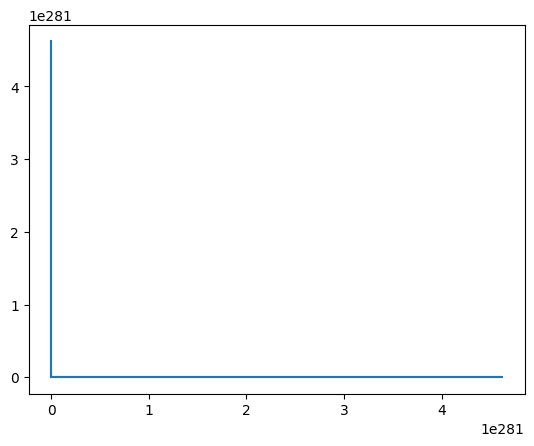

298th iteration, 764.0693836658846


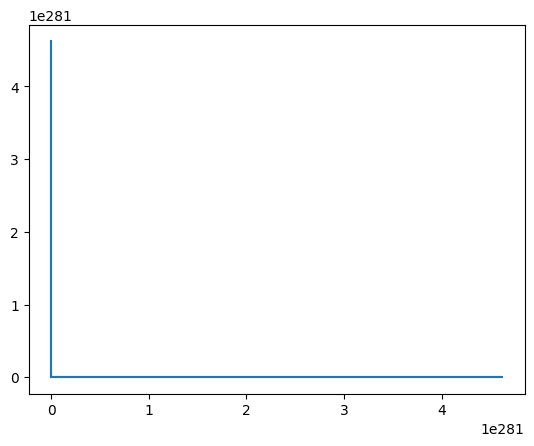

299th iteration, 764.0652720085726


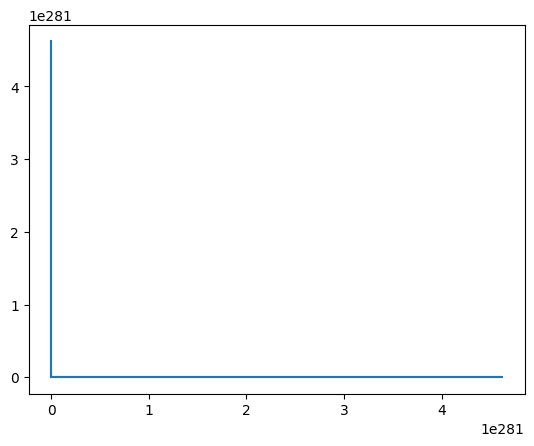

300th iteration, 764.0611603886725


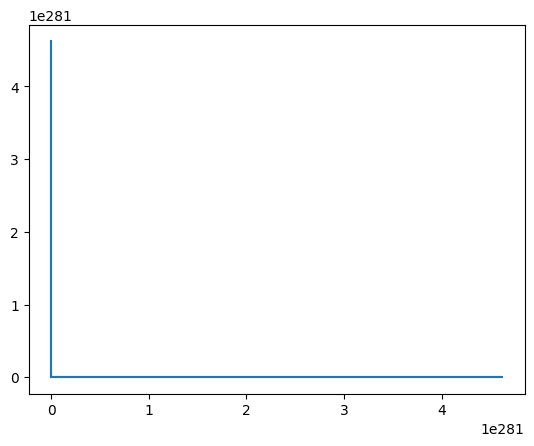

301th iteration, 764.0570488061834


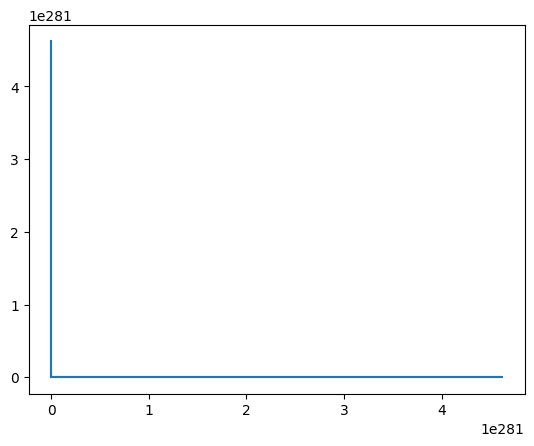

302th iteration, 764.0529372611044


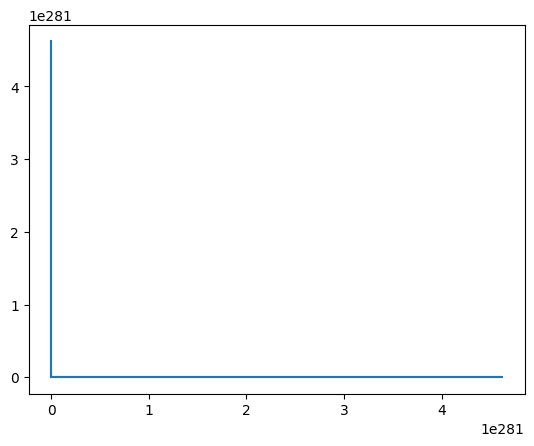

303th iteration, 764.0488257534358


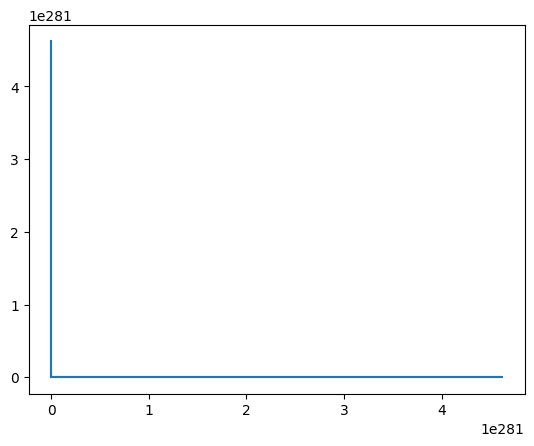

304th iteration, 764.044714283177


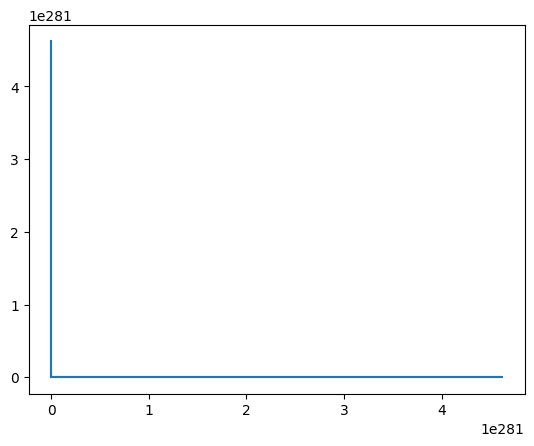

305th iteration, 764.0406028503276


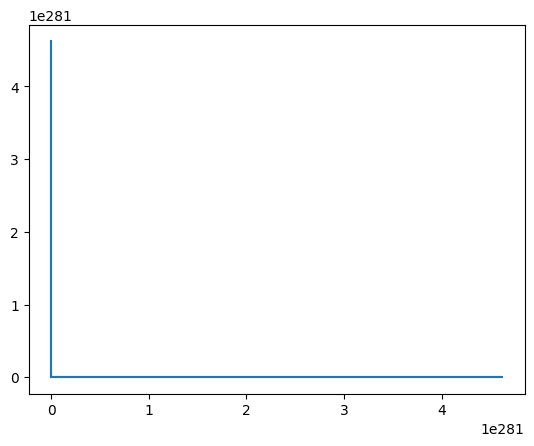

306th iteration, 764.0364914548873


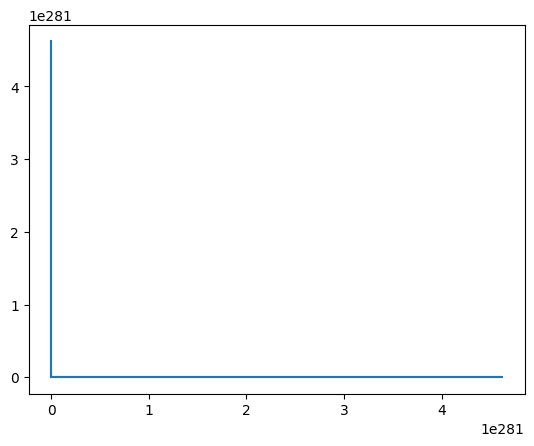

307th iteration, 764.0323800968557


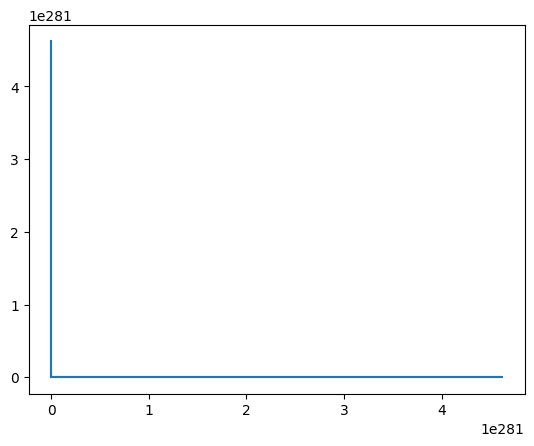

308th iteration, 764.0282687762322


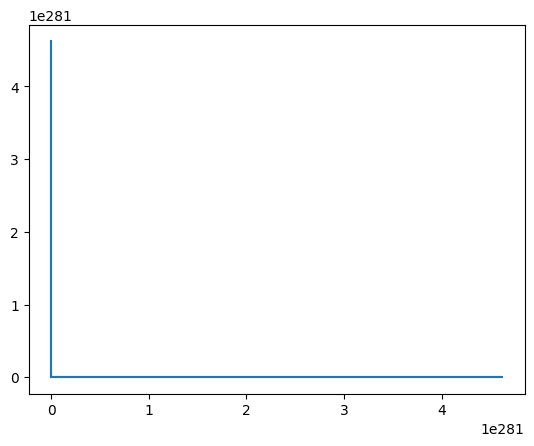

309th iteration, 764.0241574930168


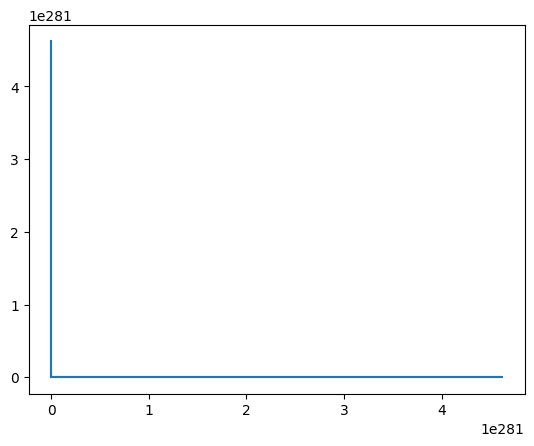

310th iteration, 764.0200462472087


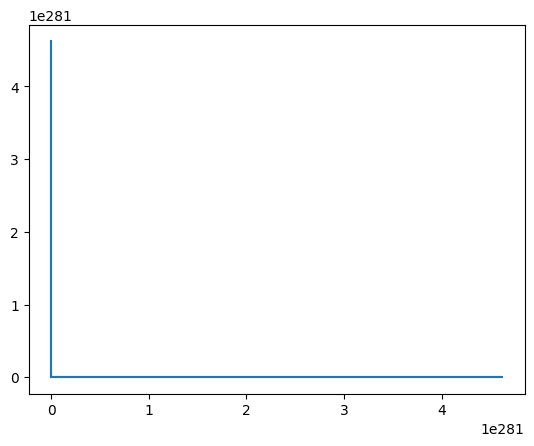

311th iteration, 764.015935038808


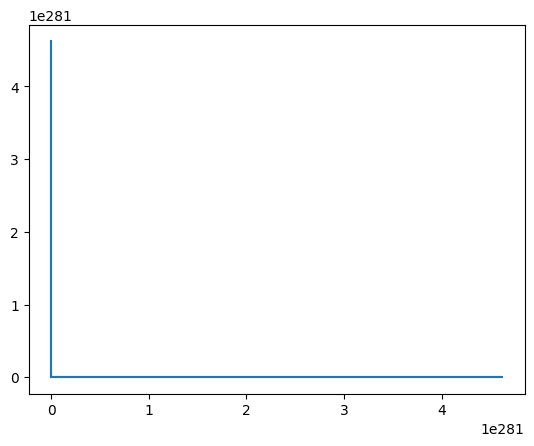

312th iteration, 764.0118238678142


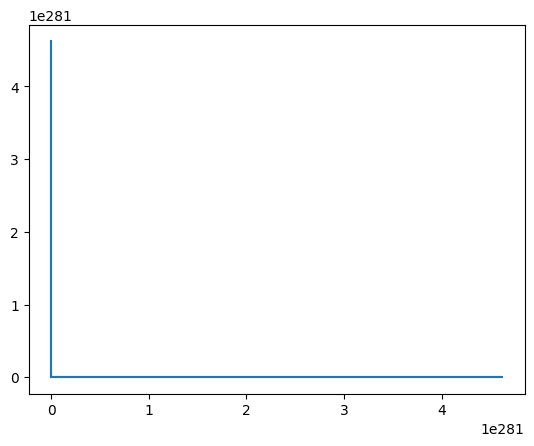

313th iteration, 764.0077127342266


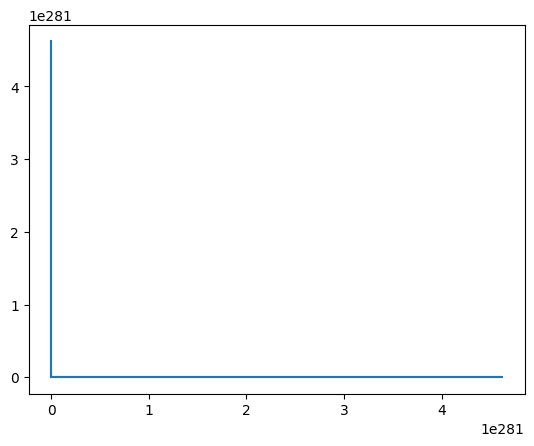

314th iteration, 764.0036016380451


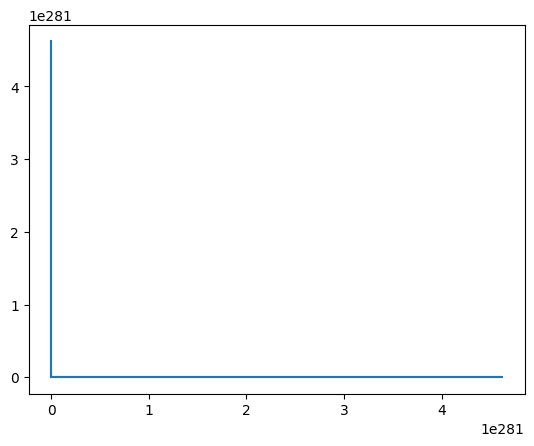

315th iteration, 763.9994905792691


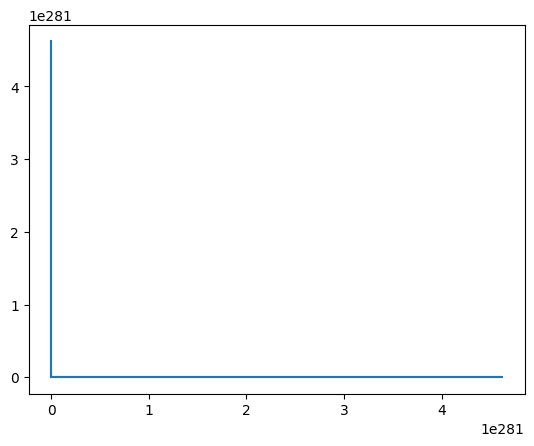

316th iteration, 763.9953795578981


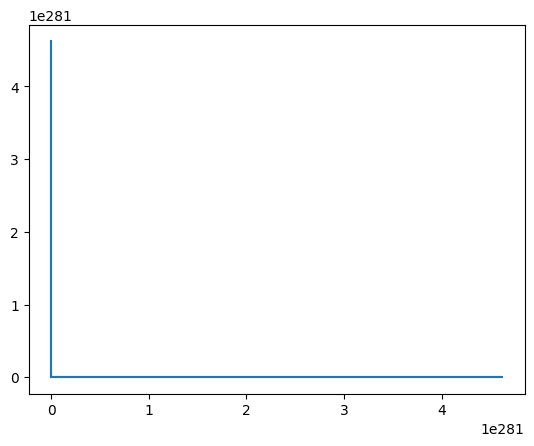

317th iteration, 763.9912685739324


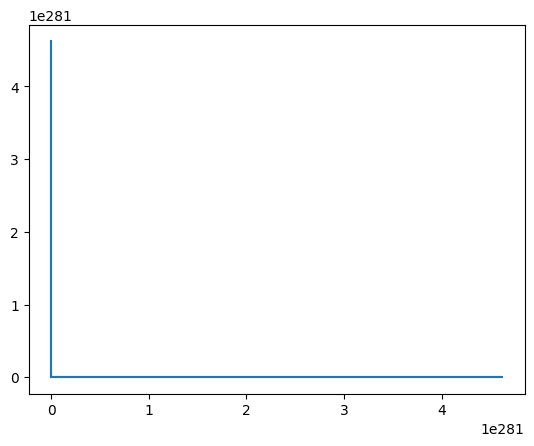

318th iteration, 763.9871576273707


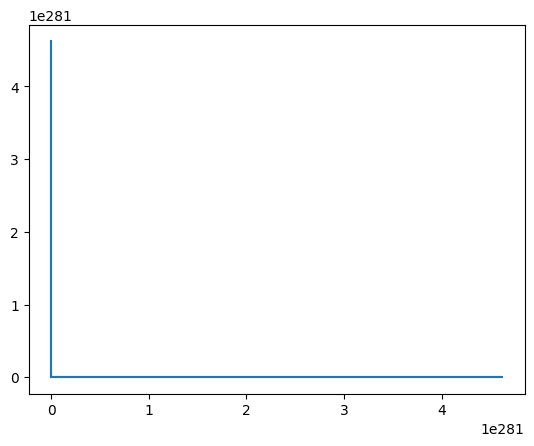

319th iteration, 763.9830467182135


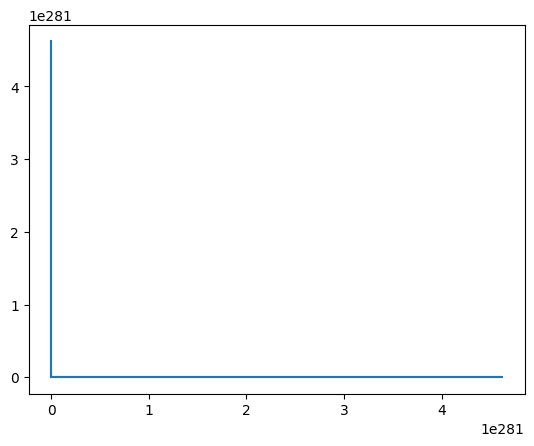

320th iteration, 763.9789358464598


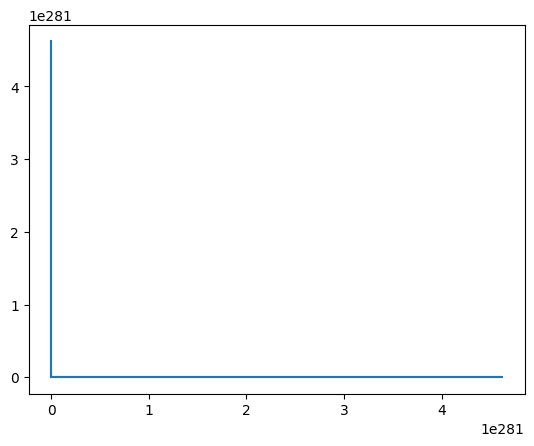

321th iteration, 763.9748250121092


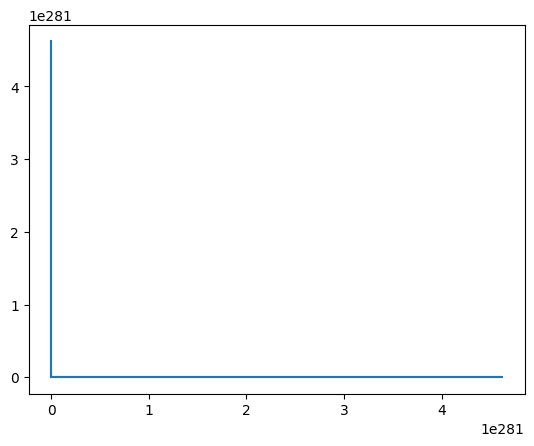

322th iteration, 763.9707142151614


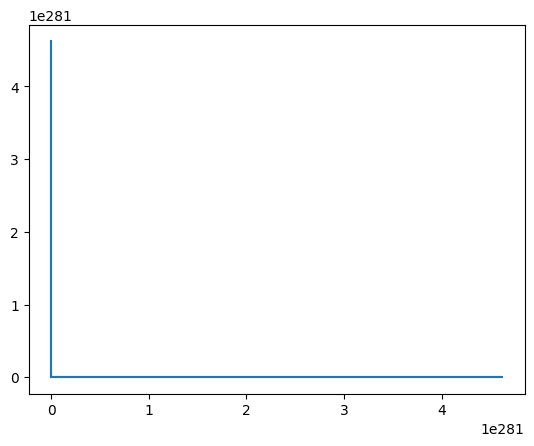

323th iteration, 763.9666034556159


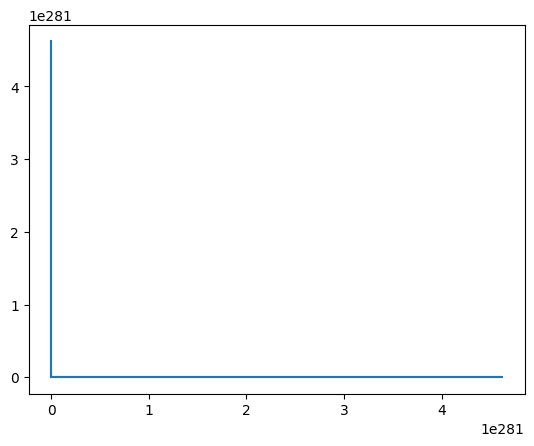

324th iteration, 763.9624927334728


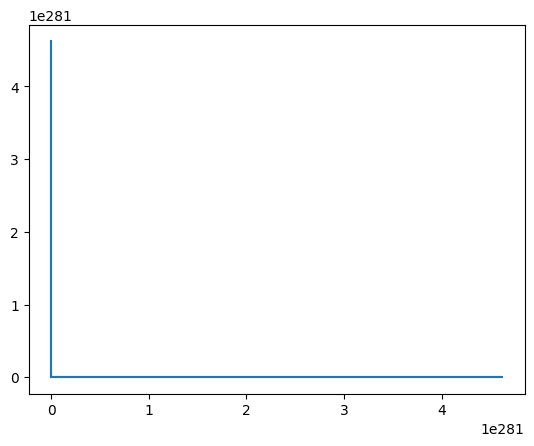

325th iteration, 763.9583820487319


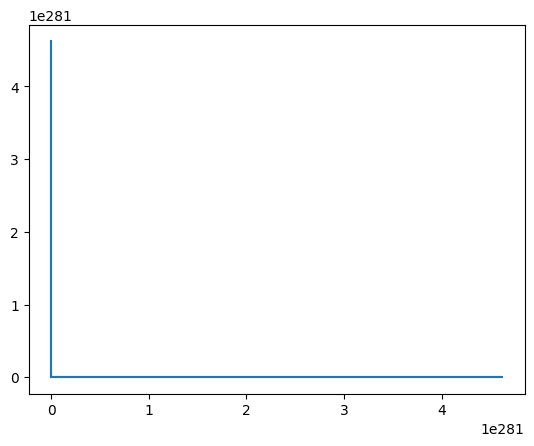

326th iteration, 763.9542714013919


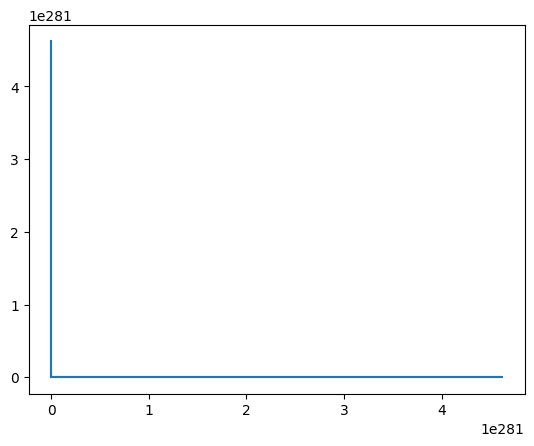

327th iteration, 763.9501607914527


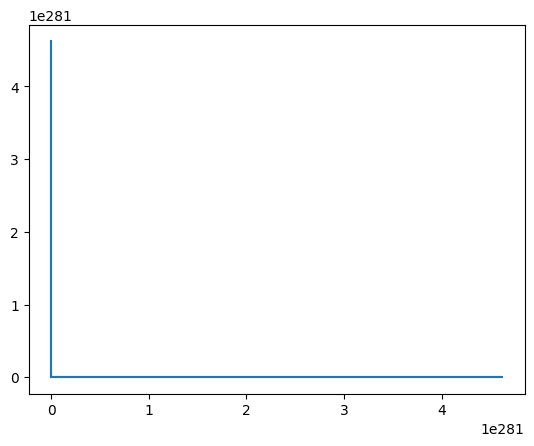

328th iteration, 763.9460502189144


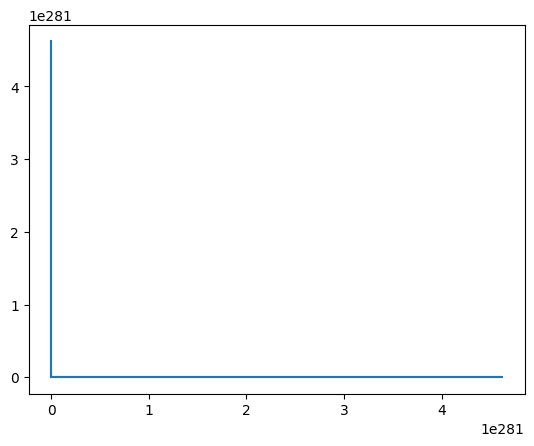

329th iteration, 763.9419396837766


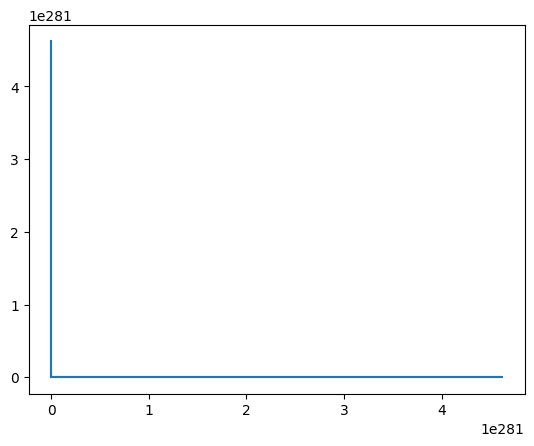

330th iteration, 763.9378291860386


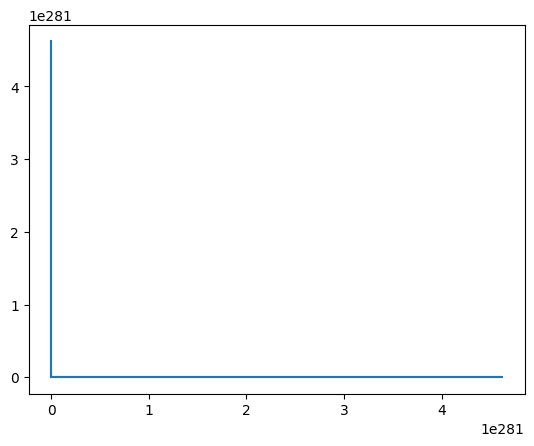

331th iteration, 763.9337187257


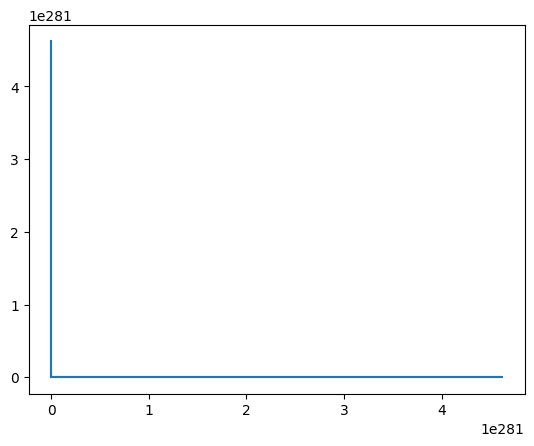

332th iteration, 763.9296083027604


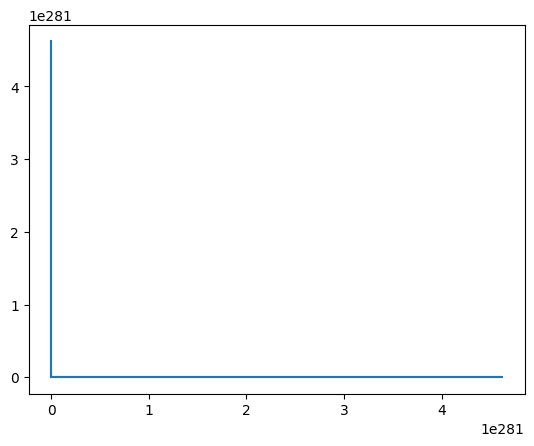

333th iteration, 763.9254979172197


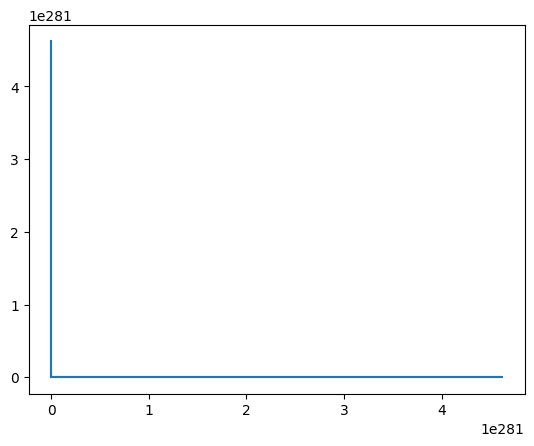

334th iteration, 763.9213875690768


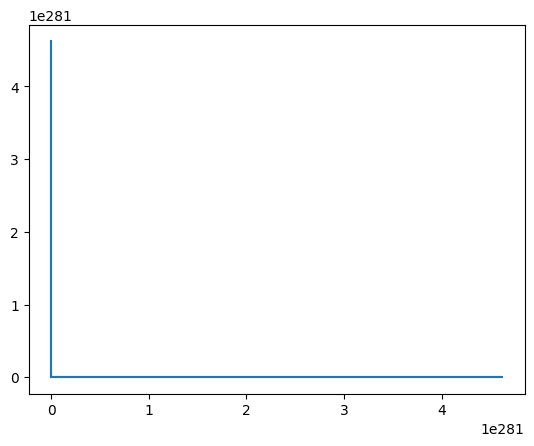

335th iteration, 763.9172772583323


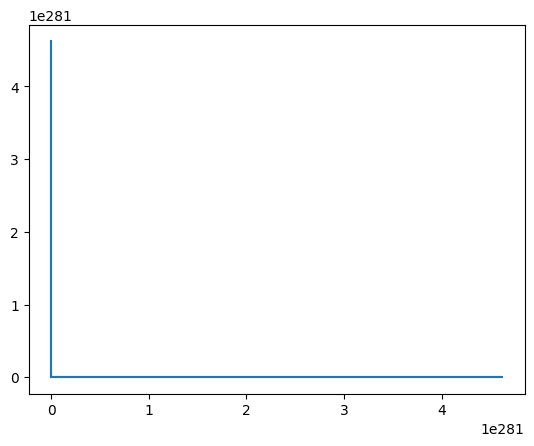

336th iteration, 763.9131669849853


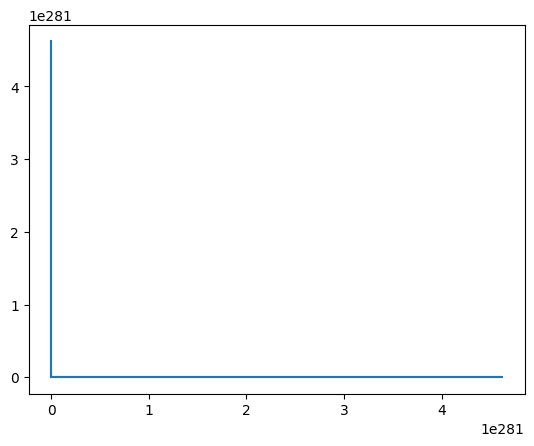

337th iteration, 763.9090567490354


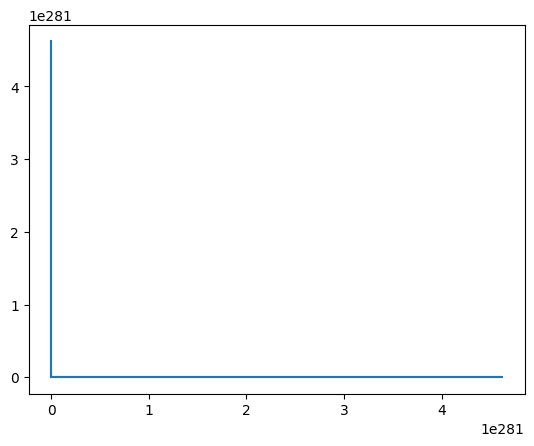

338th iteration, 763.9049465504826


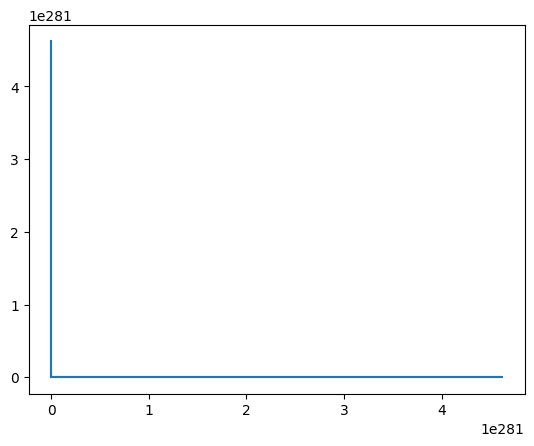

339th iteration, 763.9008363893257


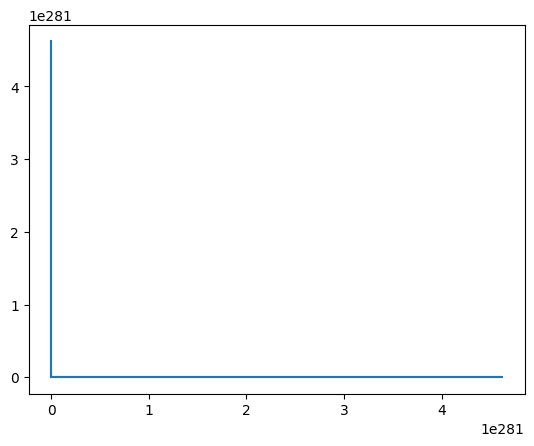

340th iteration, 763.8967262655648


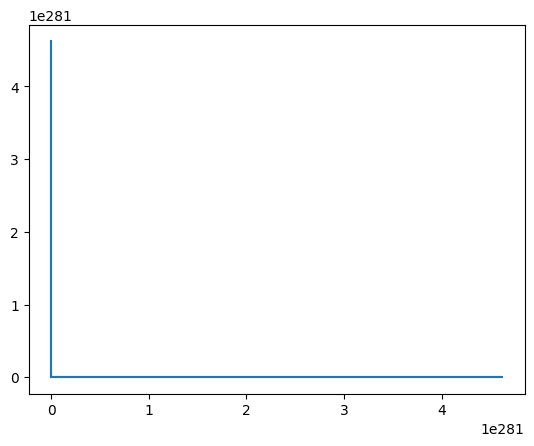

341th iteration, 763.8926161791994


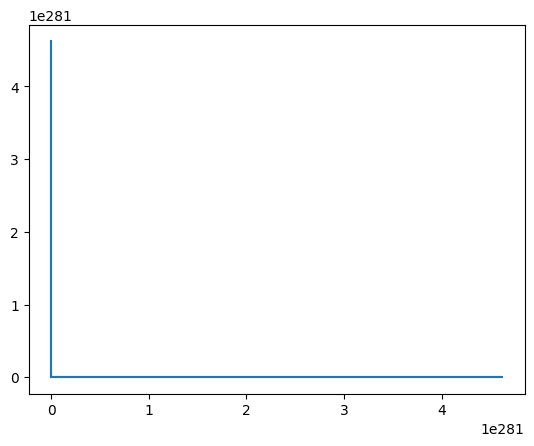

342th iteration, 763.8885061302293


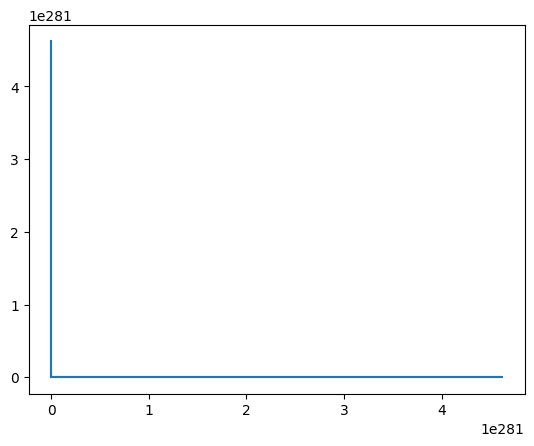

343th iteration, 763.8843961186544


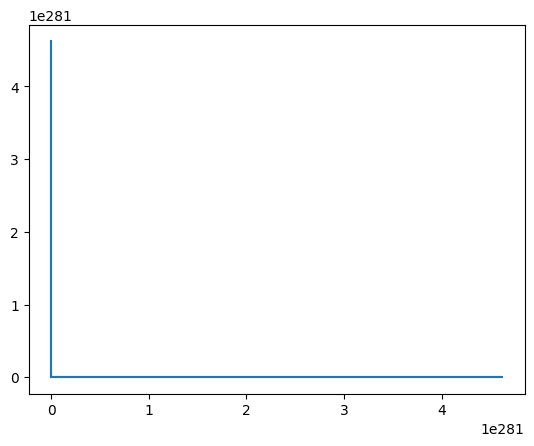

344th iteration, 763.8802861444736


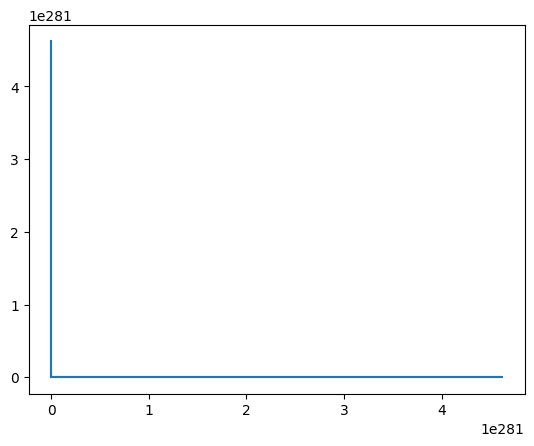

345th iteration, 763.876176207687


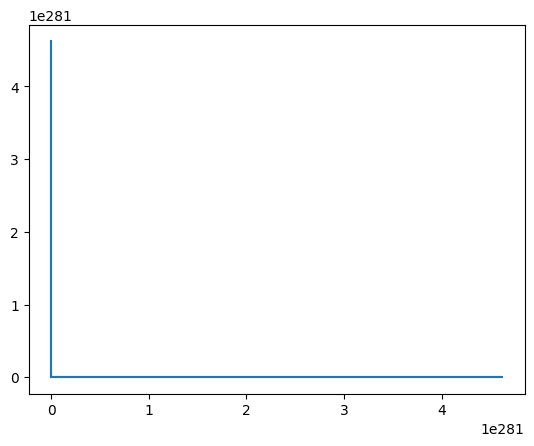

346th iteration, 763.872066308294


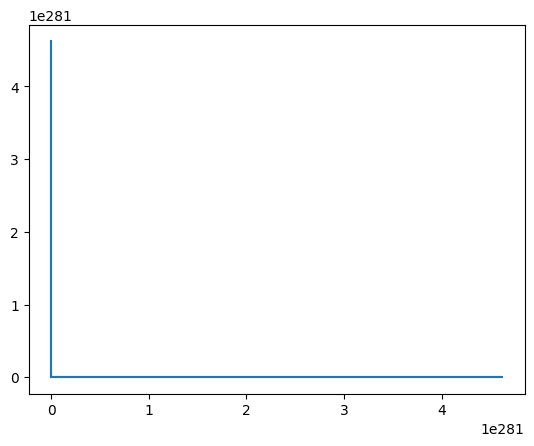

347th iteration, 763.8679564462947


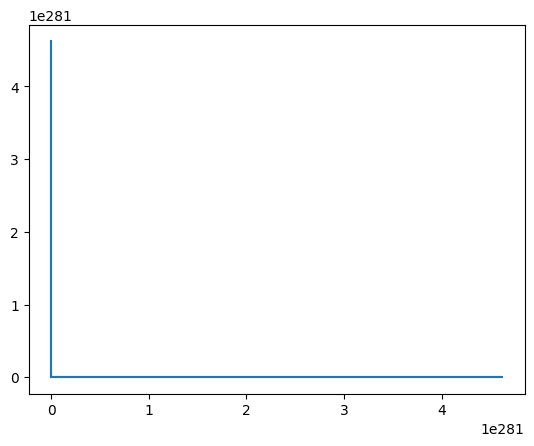

348th iteration, 763.8638466216878


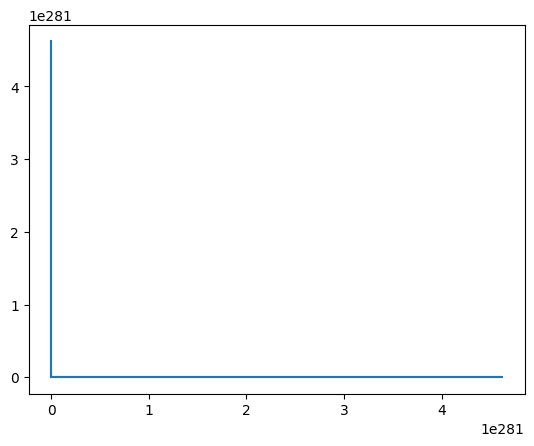

349th iteration, 763.859736834474


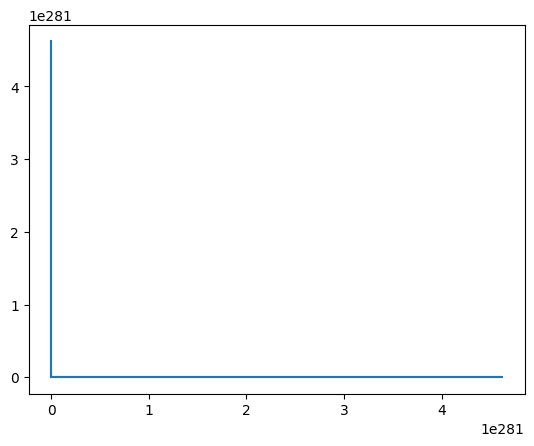

350th iteration, 763.8556270846524


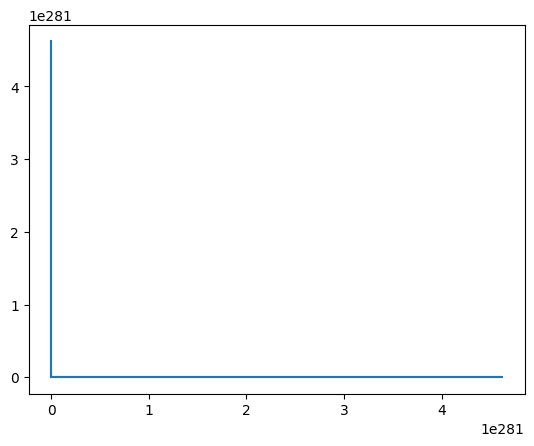

351th iteration, 763.851517372222


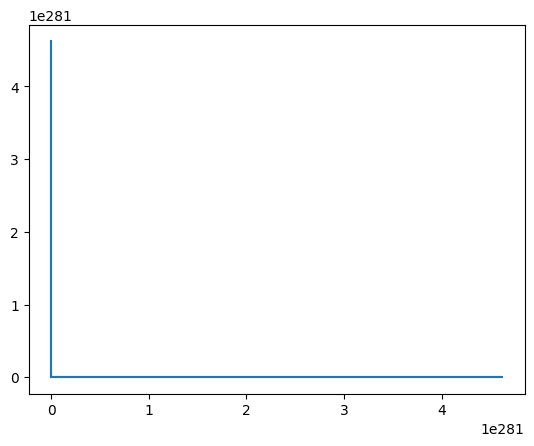

352th iteration, 763.8474076971833


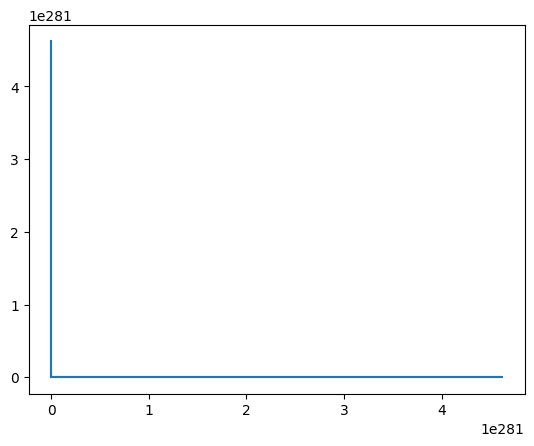

353th iteration, 763.8432980595354


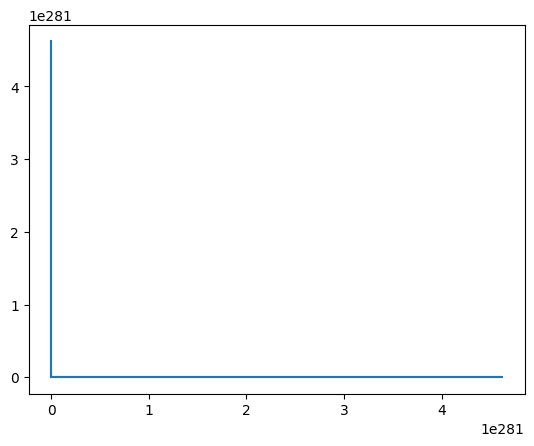

354th iteration, 763.8391884592781


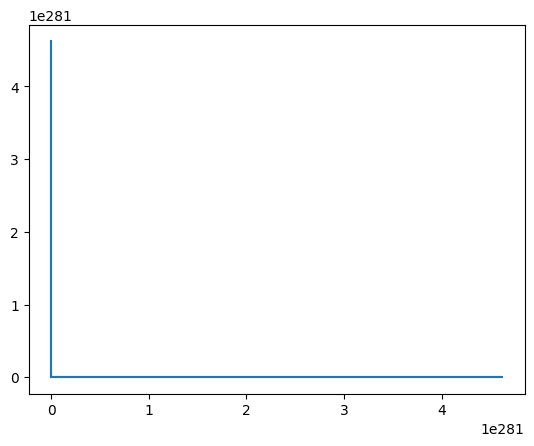

355th iteration, 763.835078896411


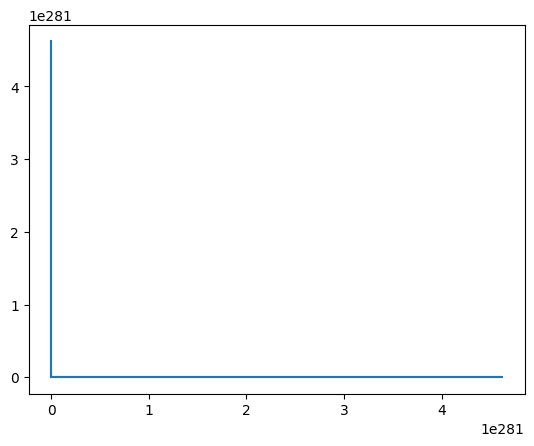

356th iteration, 763.8309693709341


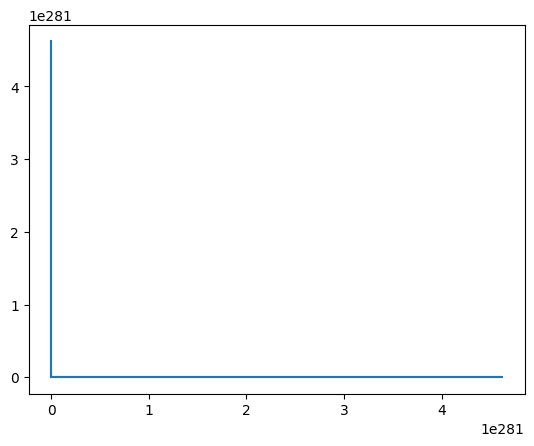

357th iteration, 763.8268598828467


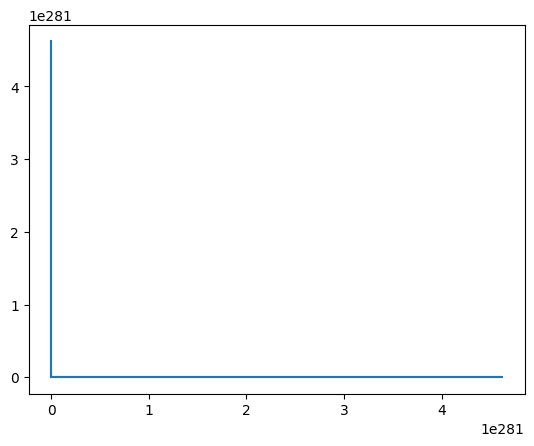

358th iteration, 763.8227504321485


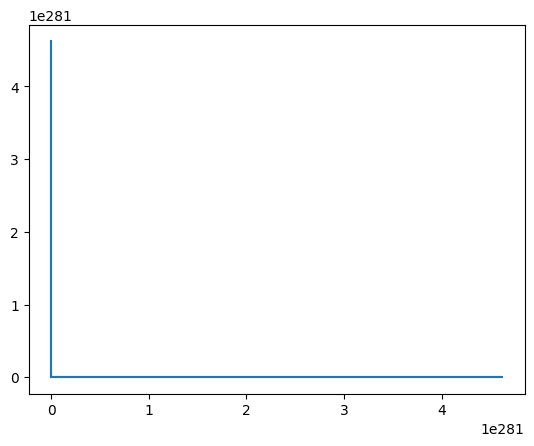

359th iteration, 763.8186410188389


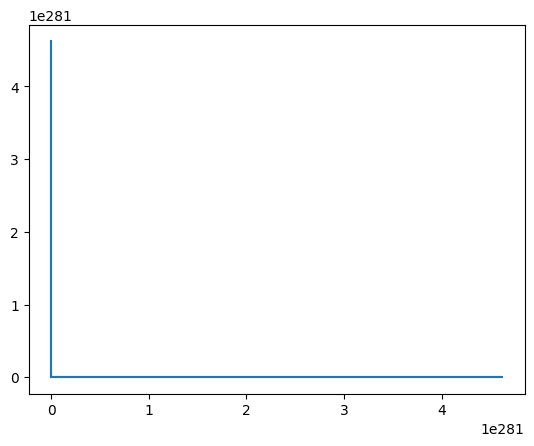

360th iteration, 763.8145316429178


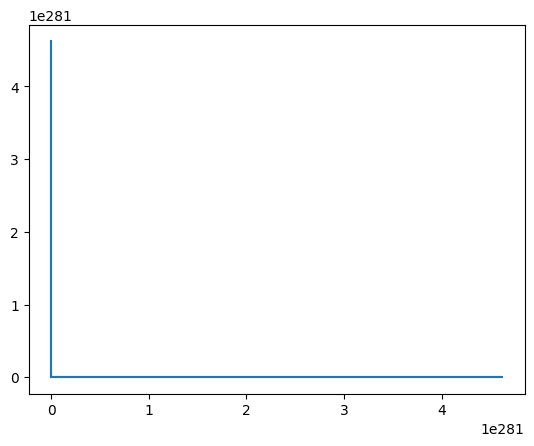

361th iteration, 763.8104223043842


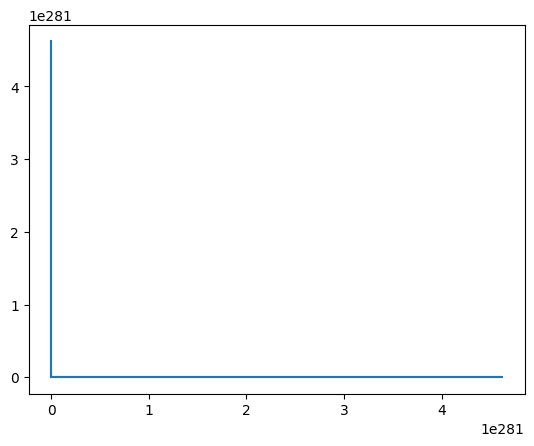

362th iteration, 763.8063130032388


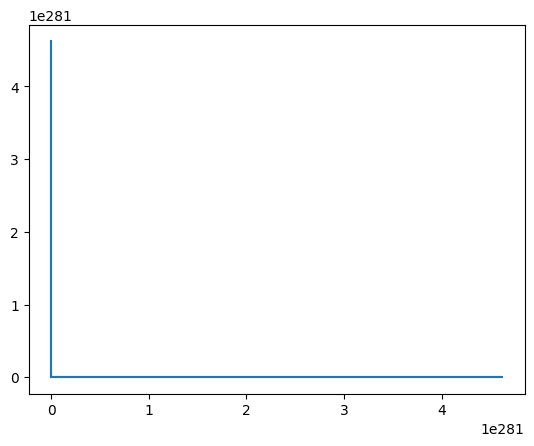

363th iteration, 763.8022037394801


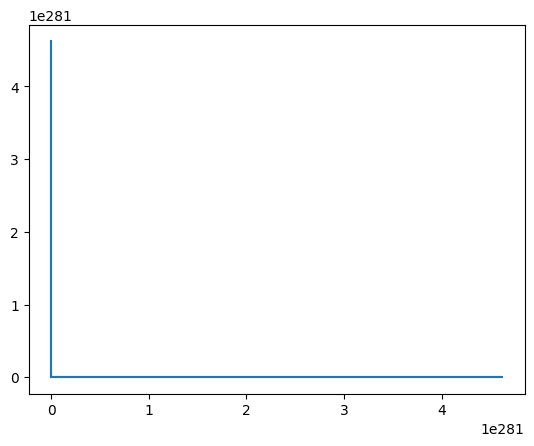

364th iteration, 763.7980945131084


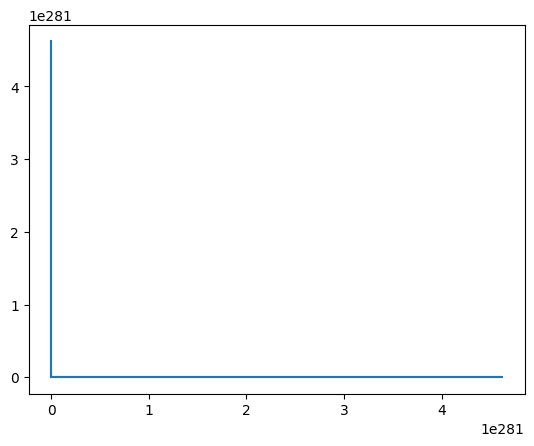

365th iteration, 763.793985324123


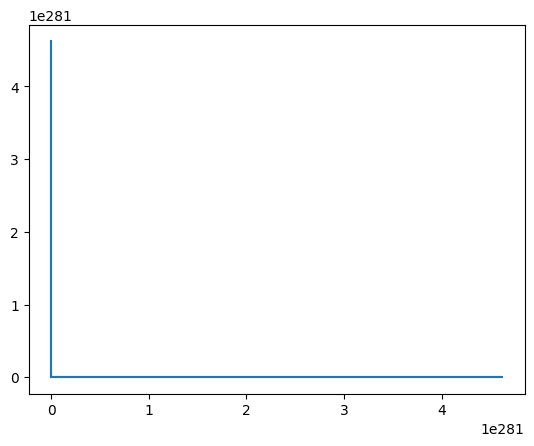

366th iteration, 763.7898761725237


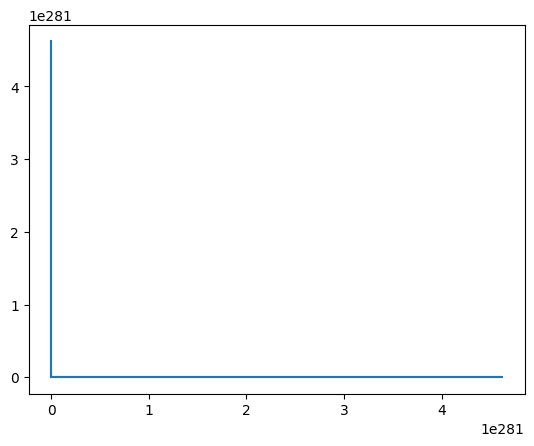

367th iteration, 763.7857670583098


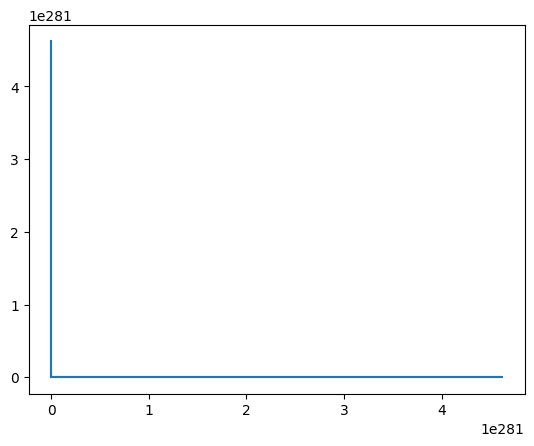

368th iteration, 763.7816579814812


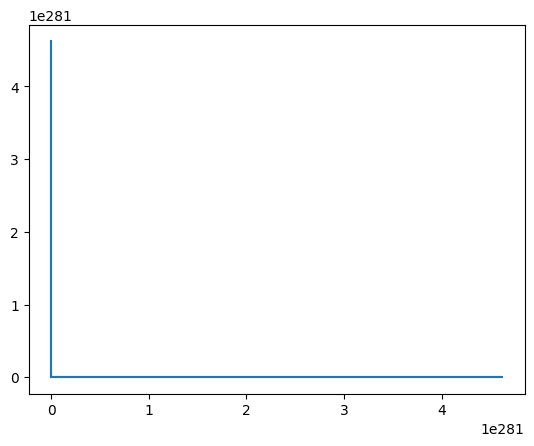

369th iteration, 763.7775489420379


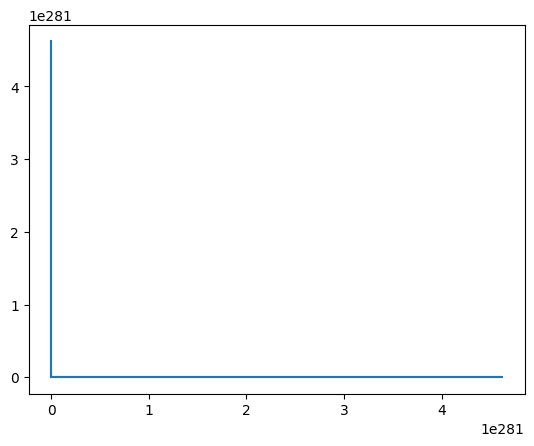

370th iteration, 763.7734399399784


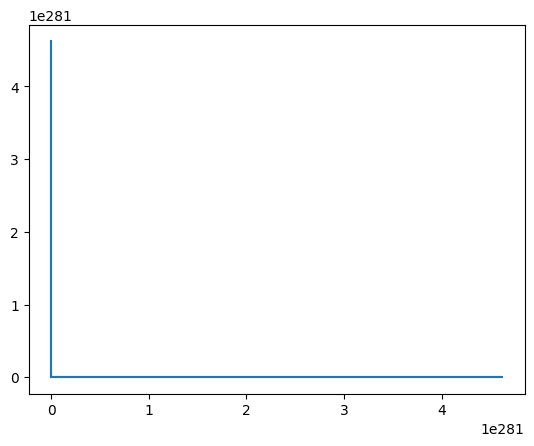

371th iteration, 763.7693309753035


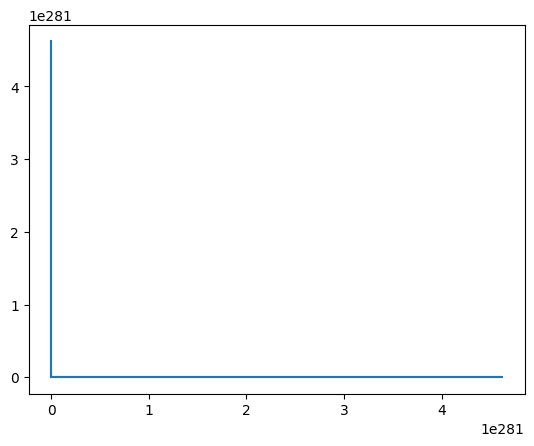

372th iteration, 763.7652220480122


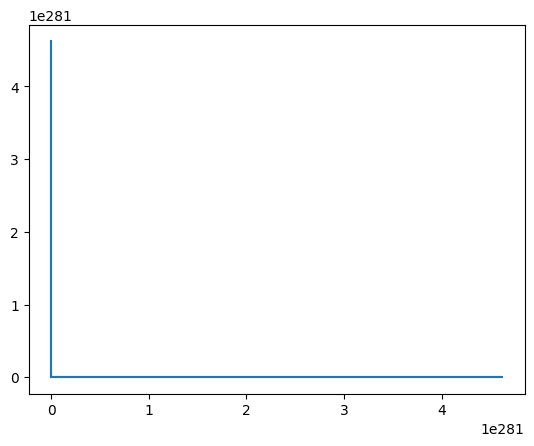

373th iteration, 763.7611131581044


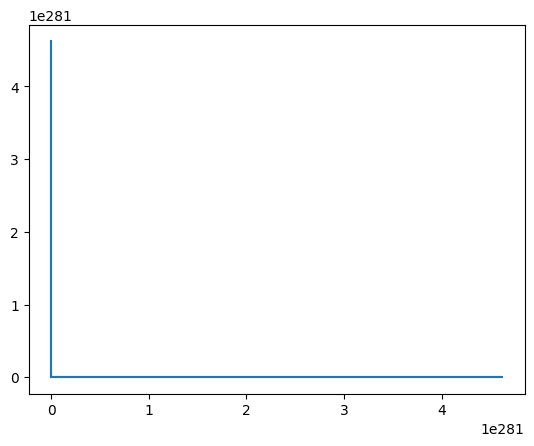

374th iteration, 763.7570043055792


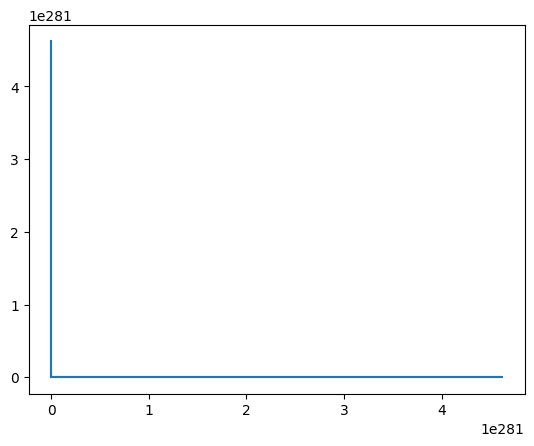

375th iteration, 763.7528954904368


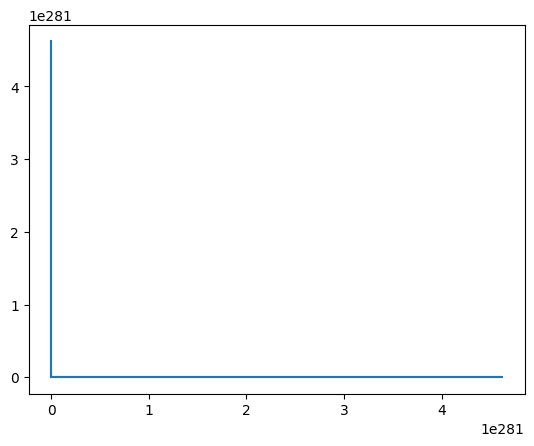

376th iteration, 763.7487867126764


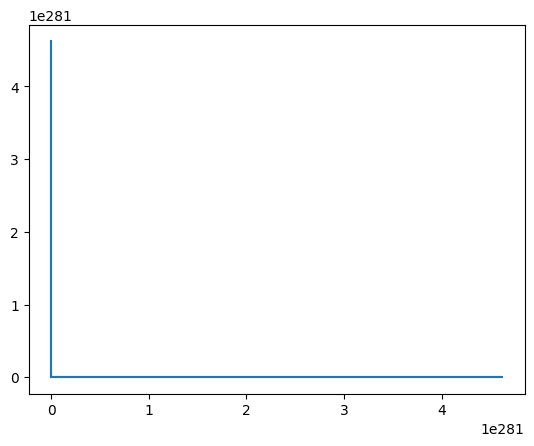

377th iteration, 763.744677972298


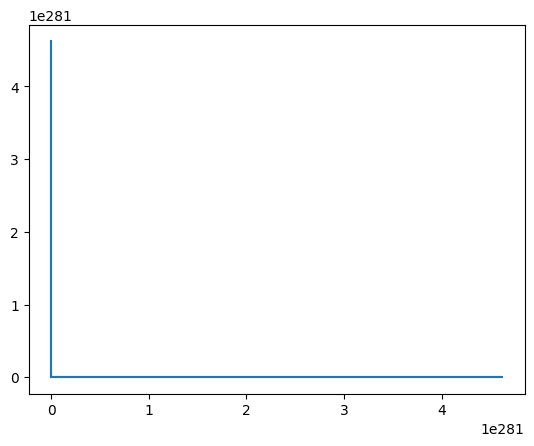

378th iteration, 763.7405692693009


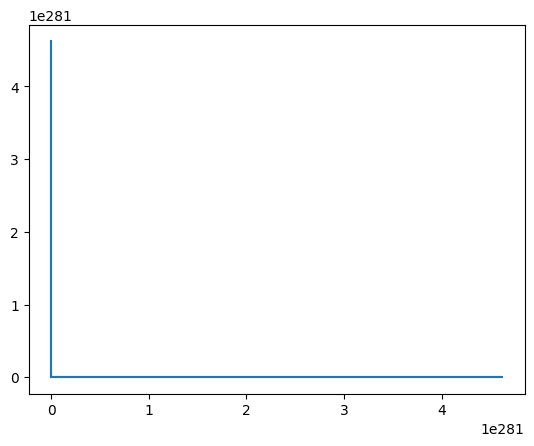

379th iteration, 763.736460603685


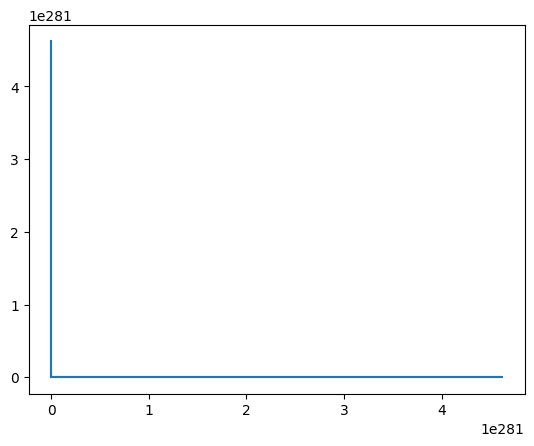

380th iteration, 763.7323519754499


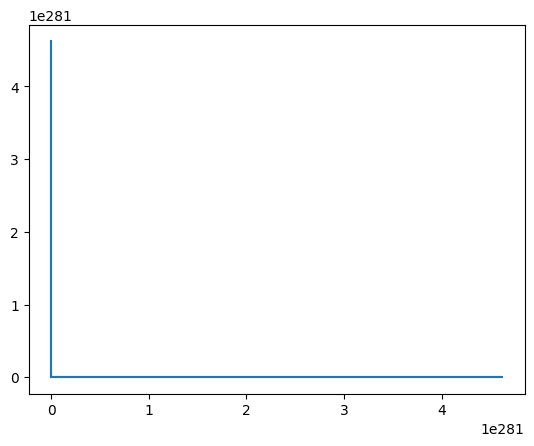

381th iteration, 763.7282433845947


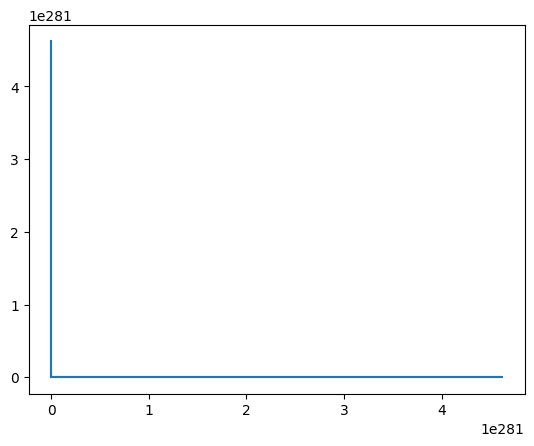

382th iteration, 763.7241348311198


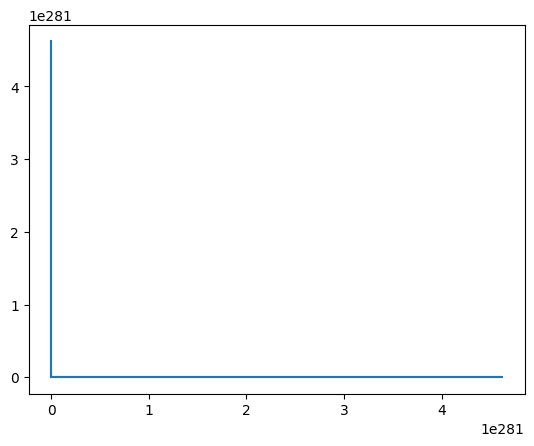

383th iteration, 763.7200263150244


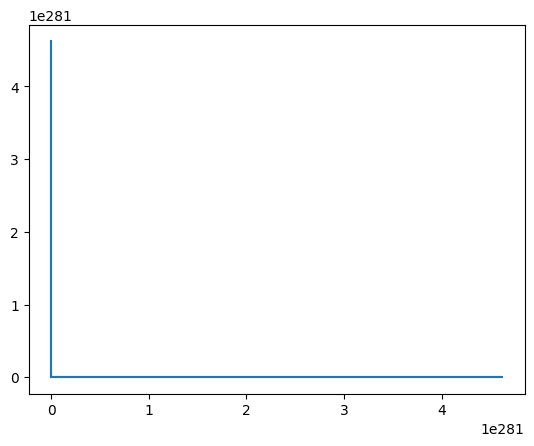

384th iteration, 763.7159178363079


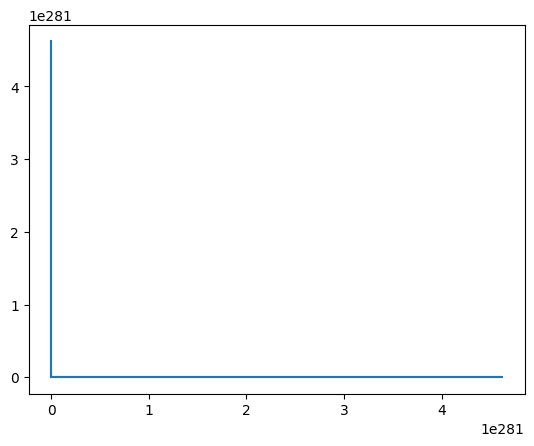

385th iteration, 763.7118093949698


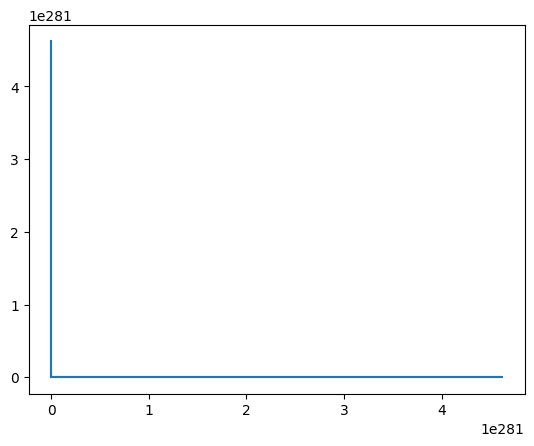

386th iteration, 763.7077009910103


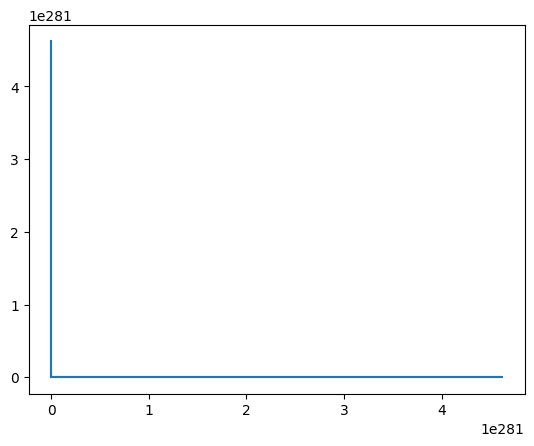

387th iteration, 763.7035926244288


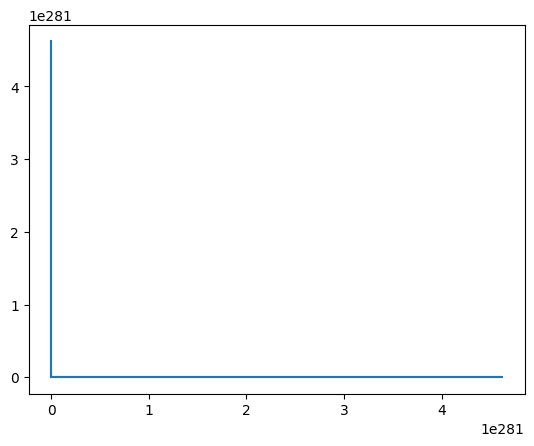

388th iteration, 763.6994842952251


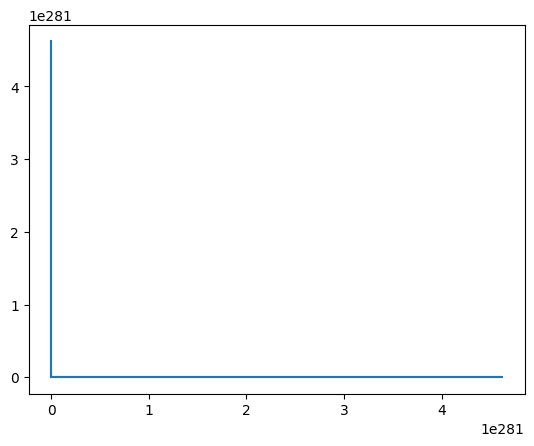

389th iteration, 763.6953760033986


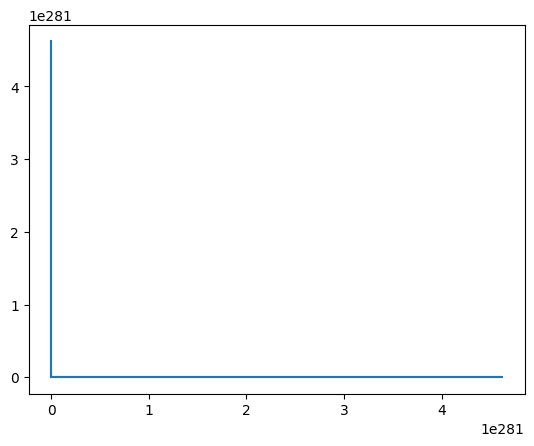

390th iteration, 763.6912677489486


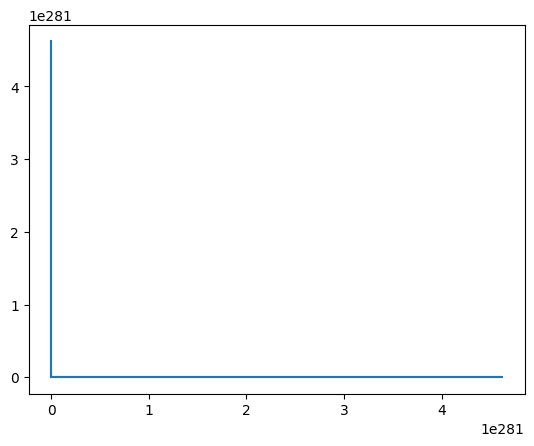

391th iteration, 763.6871595318752


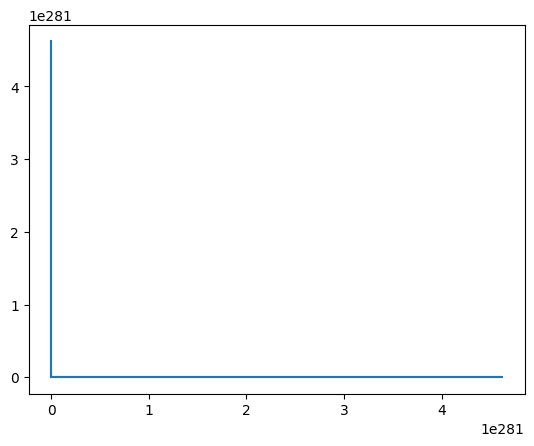

392th iteration, 763.683051352178


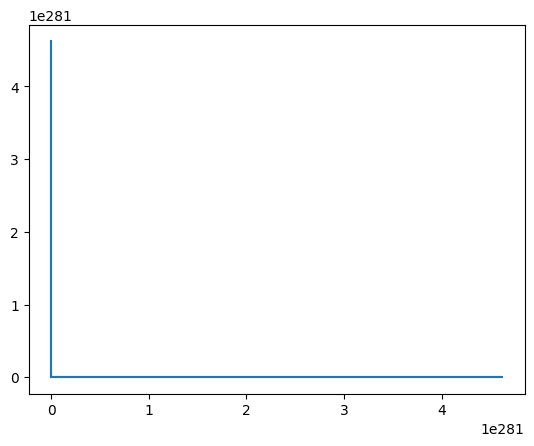

393th iteration, 763.6789432098561


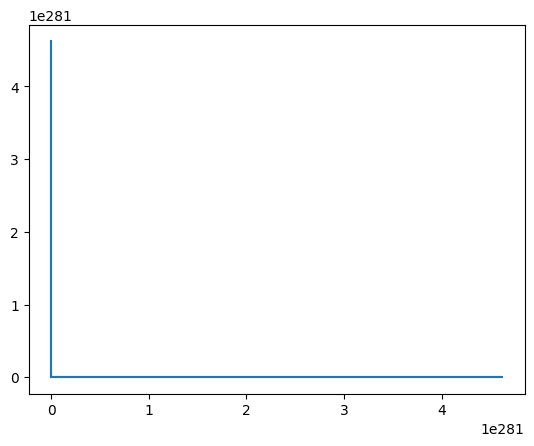

394th iteration, 763.6748351049102


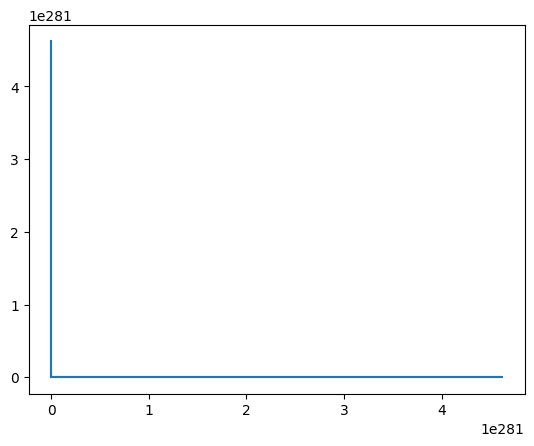

395th iteration, 763.6707270373391


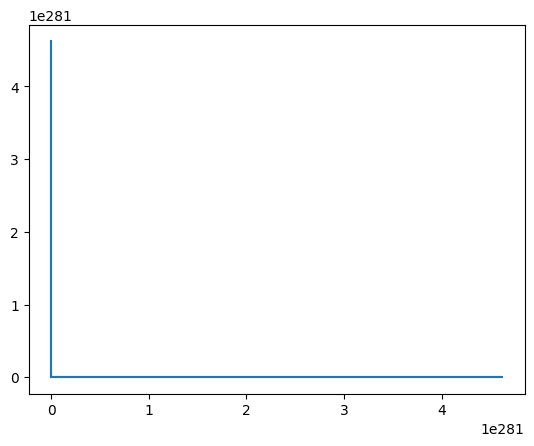

396th iteration, 763.6666190071427


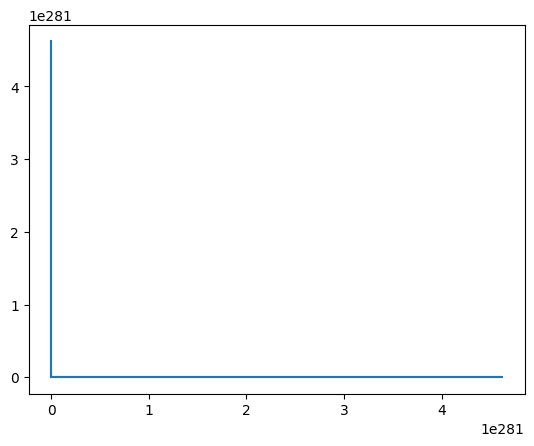

397th iteration, 763.66251101432


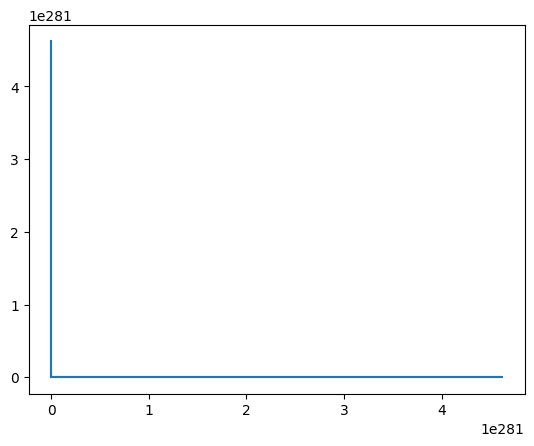

398th iteration, 763.6584030588709


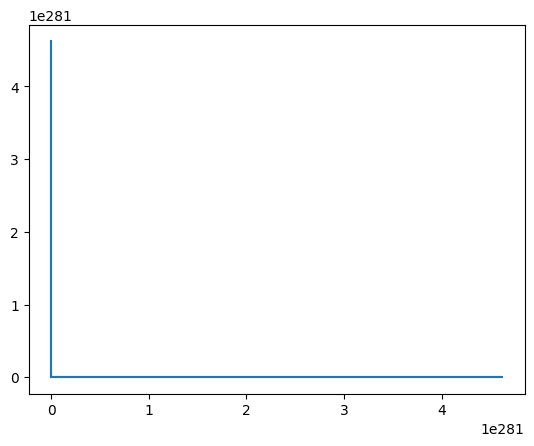

399th iteration, 763.6542951407959


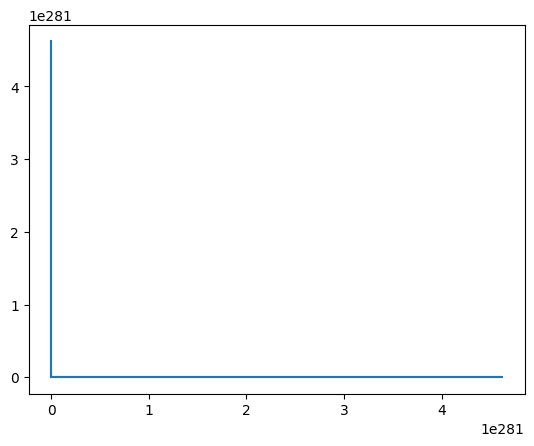

400th iteration, 763.6501872600935


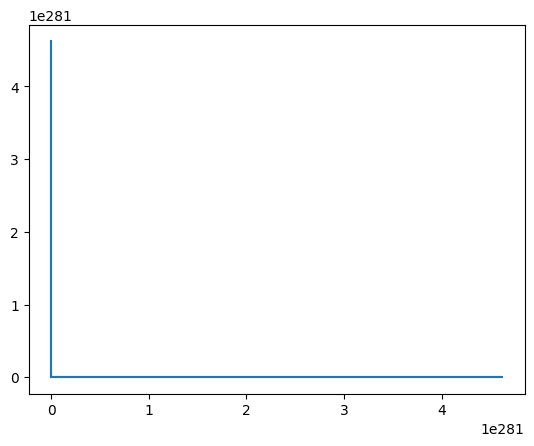

401th iteration, 763.6460794167638


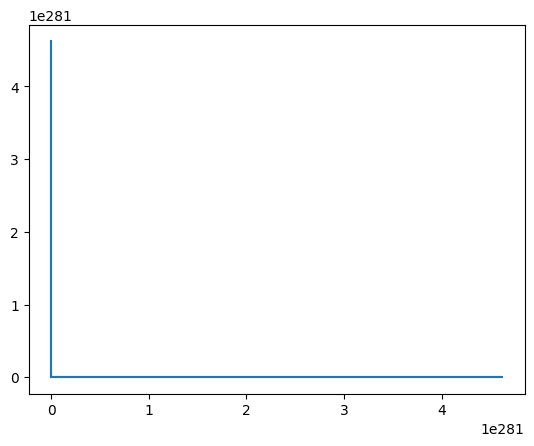

402th iteration, 763.6419716108061


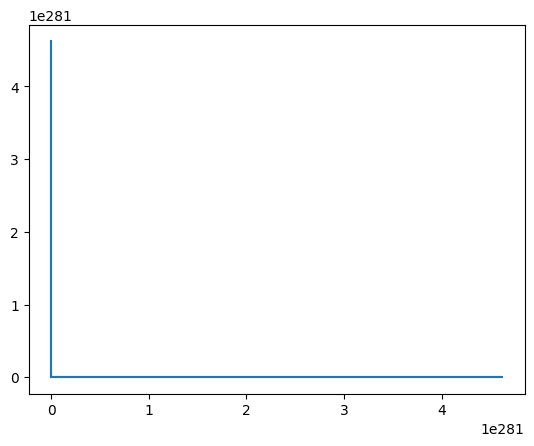

403th iteration, 763.6378638422204


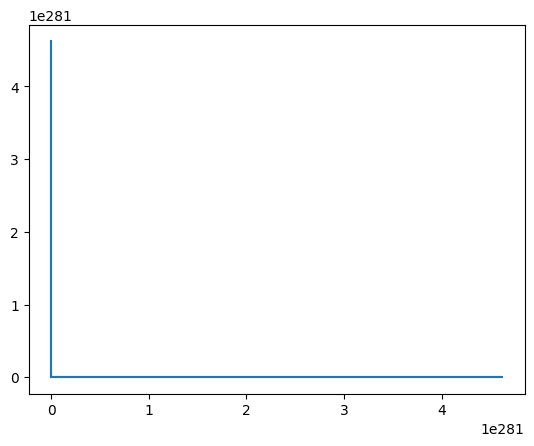

404th iteration, 763.6337561110062


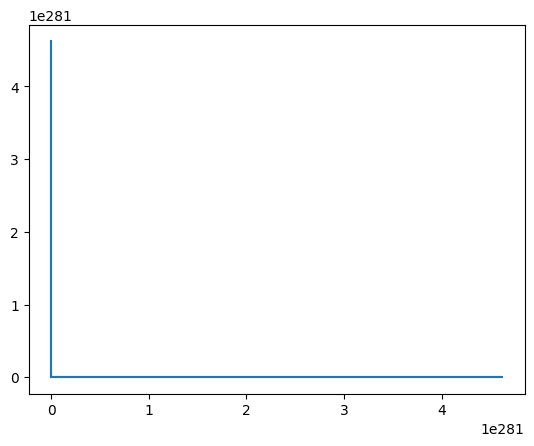

405th iteration, 763.6296484171631


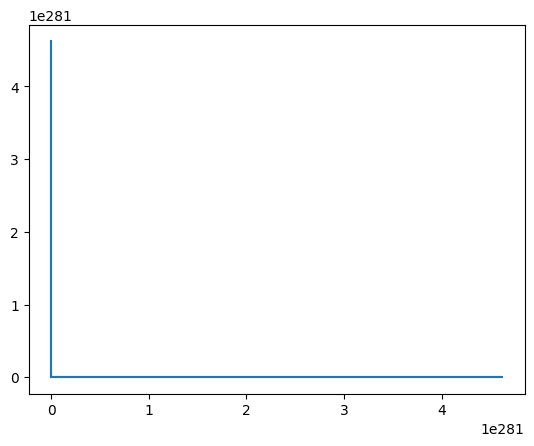

406th iteration, 763.6255407606906


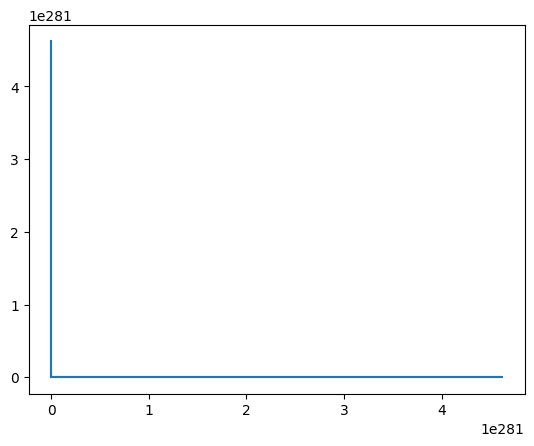

407th iteration, 763.6214331415885


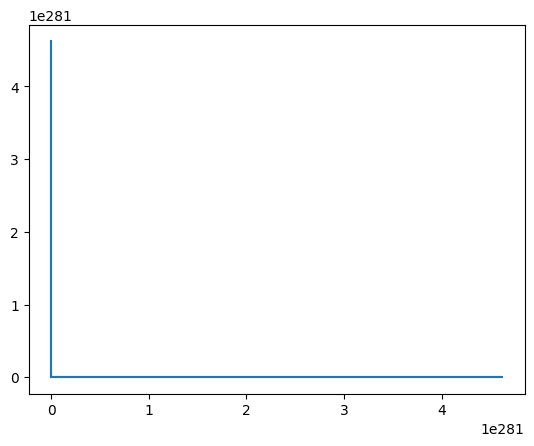

408th iteration, 763.6173255598563


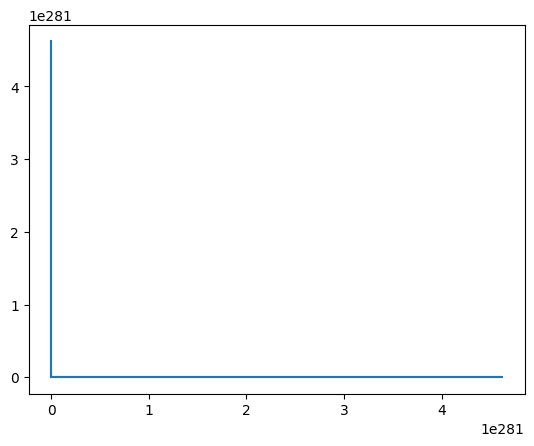

409th iteration, 763.6132180154938


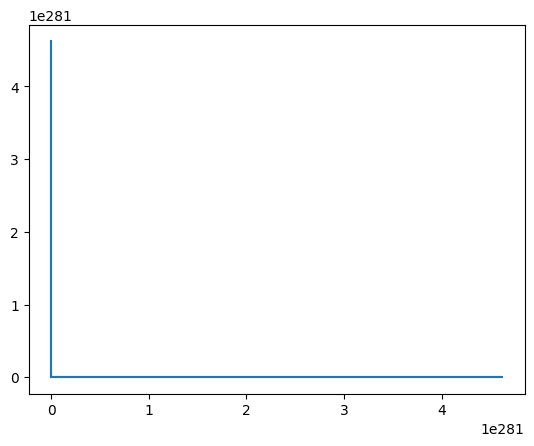

410th iteration, 763.6091105085005


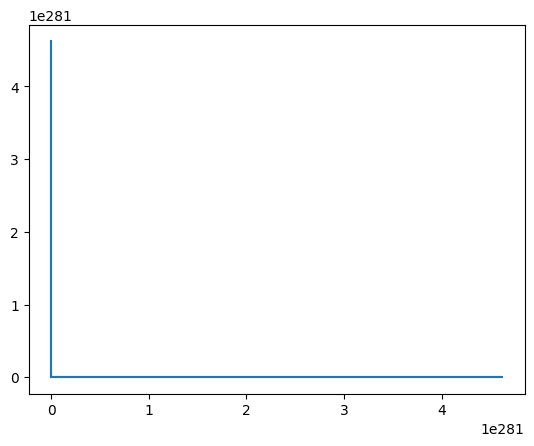

411th iteration, 763.6050030388759


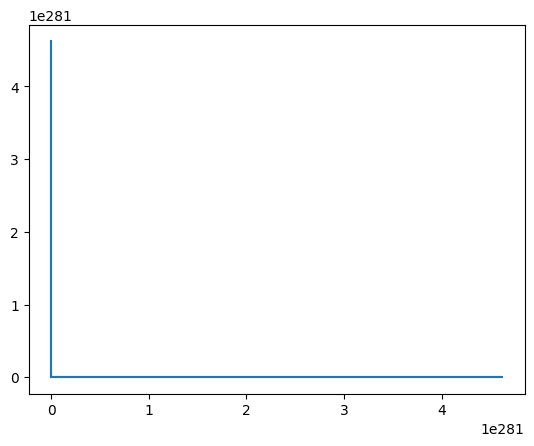

412th iteration, 763.6008956066195


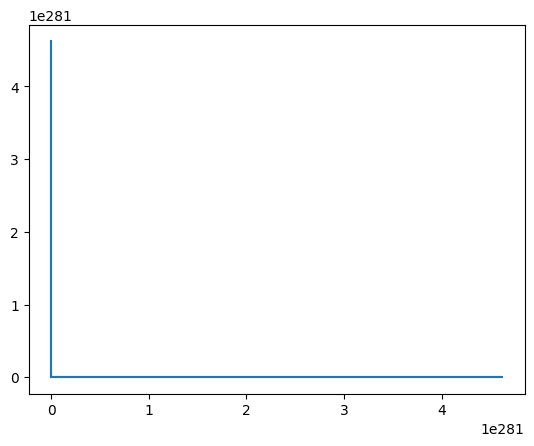

413th iteration, 763.596788211731


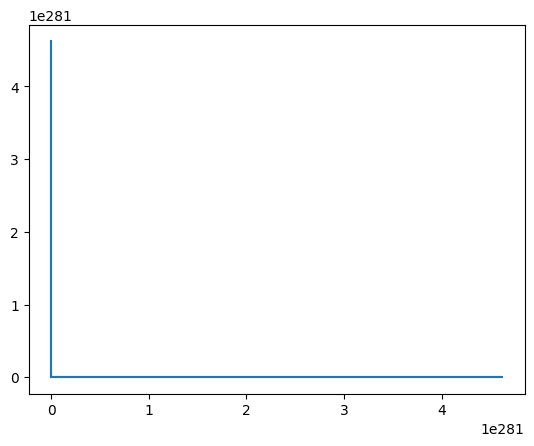

414th iteration, 763.5926808542105


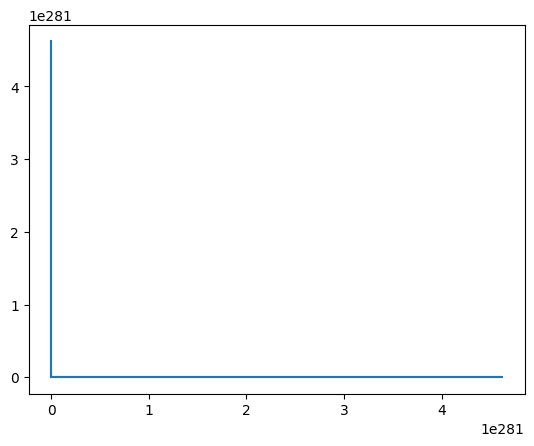

415th iteration, 763.5885735340571


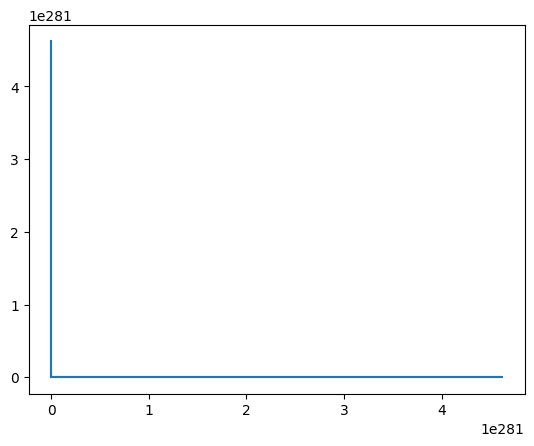

416th iteration, 763.5844662512707


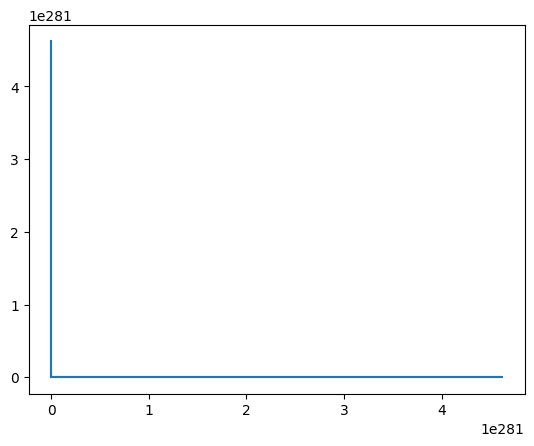

417th iteration, 763.5803590058505


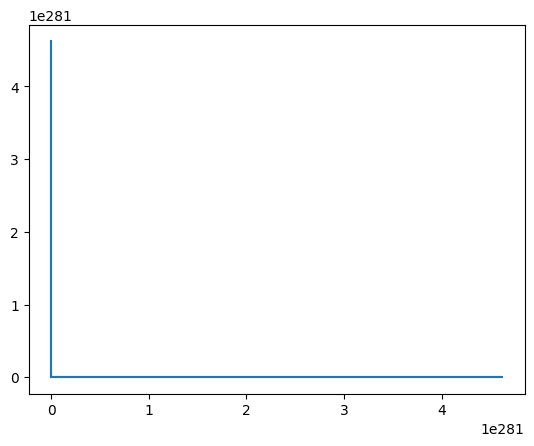

418th iteration, 763.5762517977965


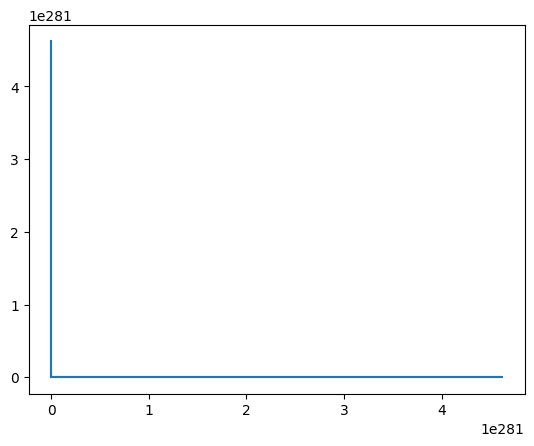

419th iteration, 763.5721446271084


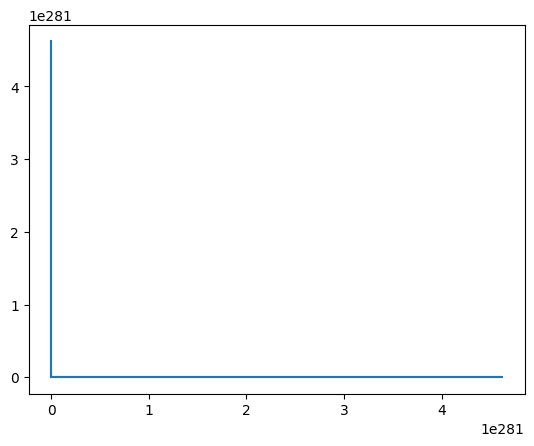

420th iteration, 763.568037493786


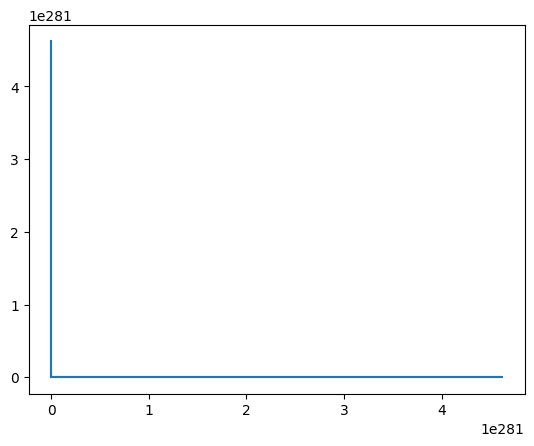

421th iteration, 763.5639303978284


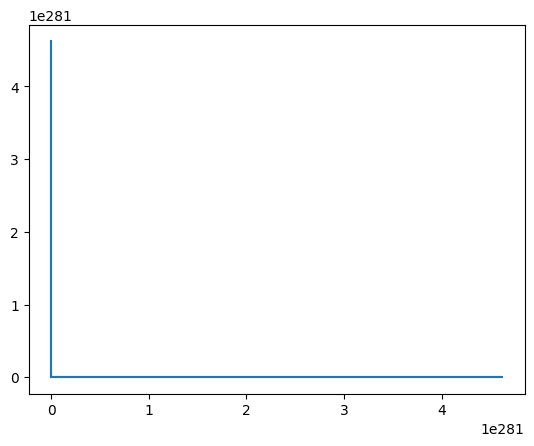

422th iteration, 763.5598233392353


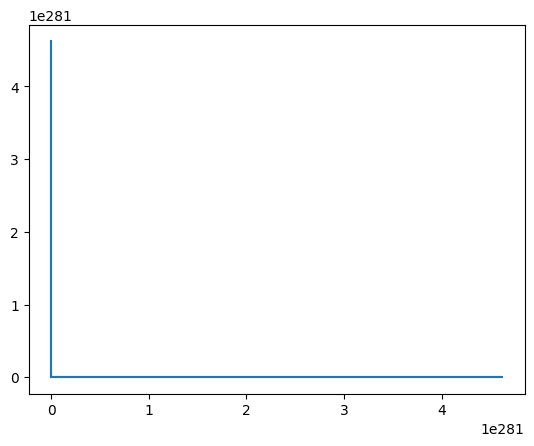

423th iteration, 763.5557163180066


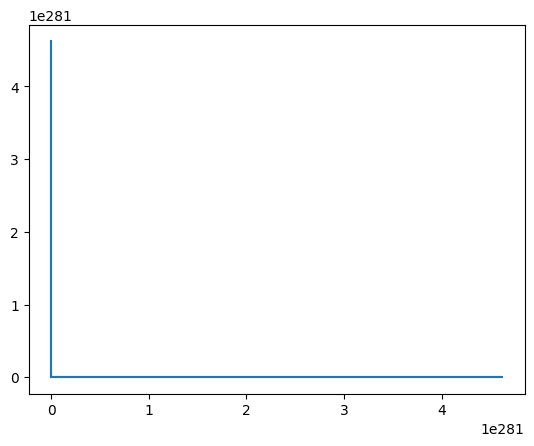

424th iteration, 763.5516093341412


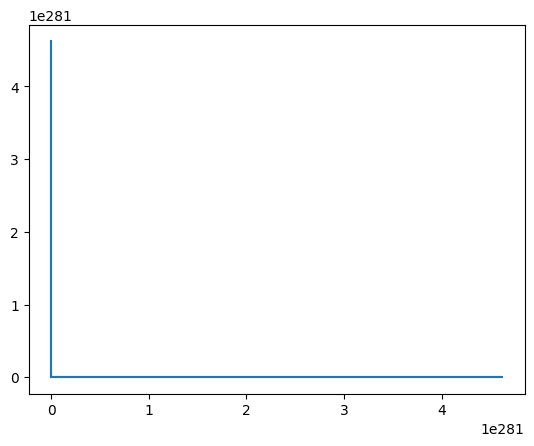

425th iteration, 763.5475023876395


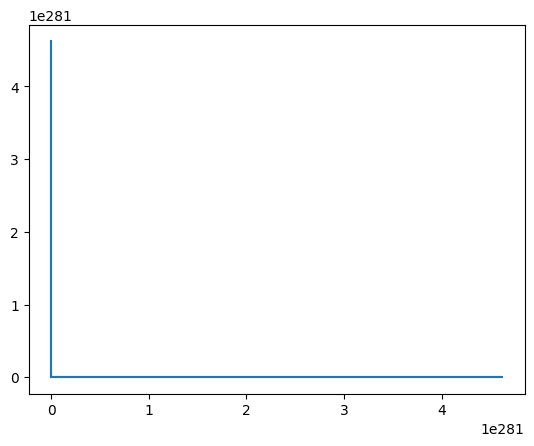

426th iteration, 763.5433954785009


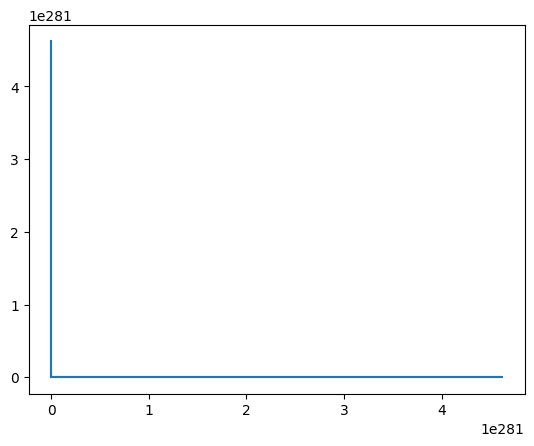

427th iteration, 763.539288606725


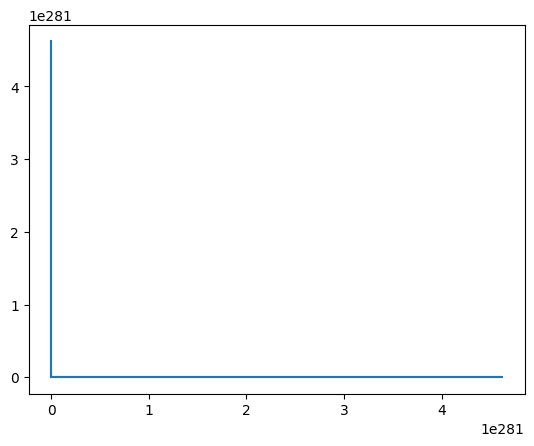

428th iteration, 763.5351817723115


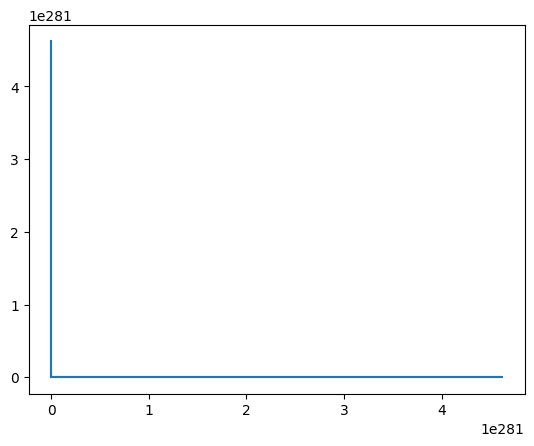

429th iteration, 763.5310749752597


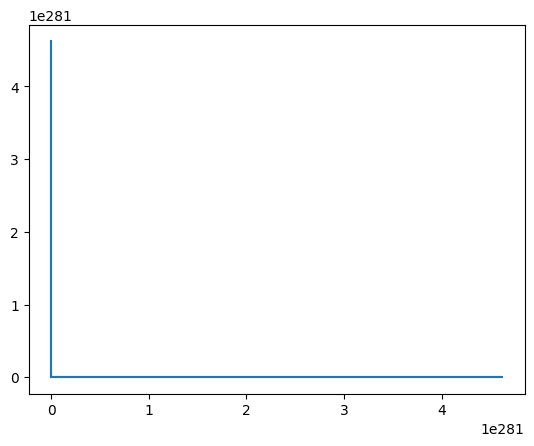

430th iteration, 763.52696821557


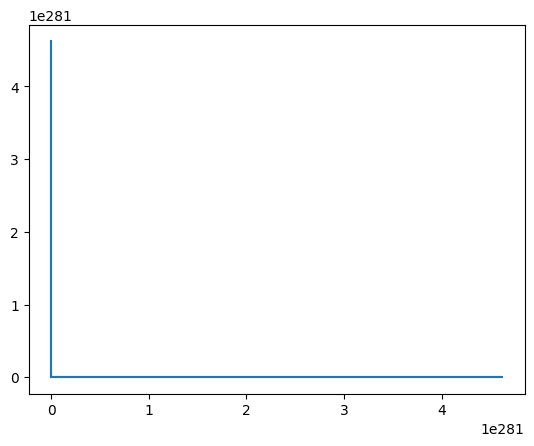

431th iteration, 763.5228614932411


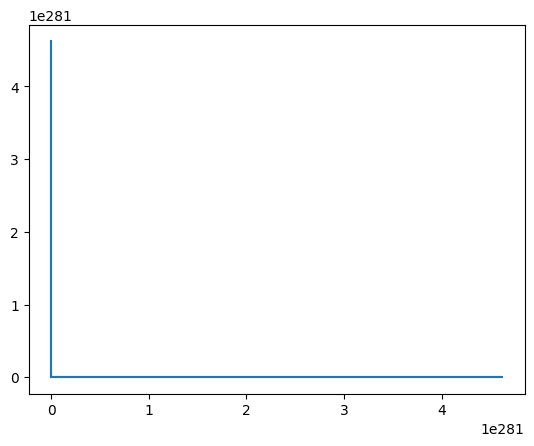

432th iteration, 763.518754808273


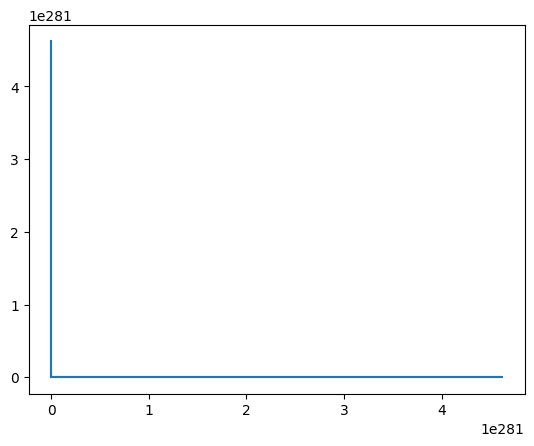

433th iteration, 763.5146481606652


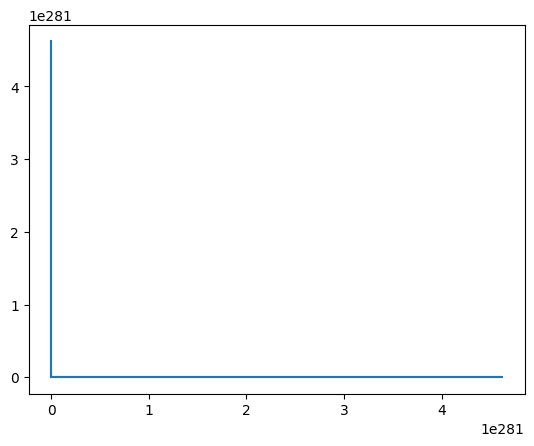

434th iteration, 763.5105415504175


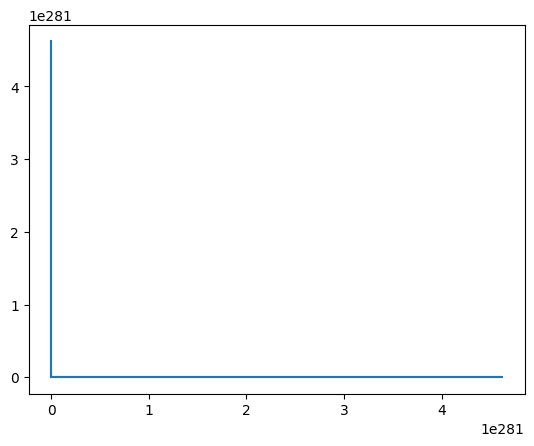

435th iteration, 763.5064349775296


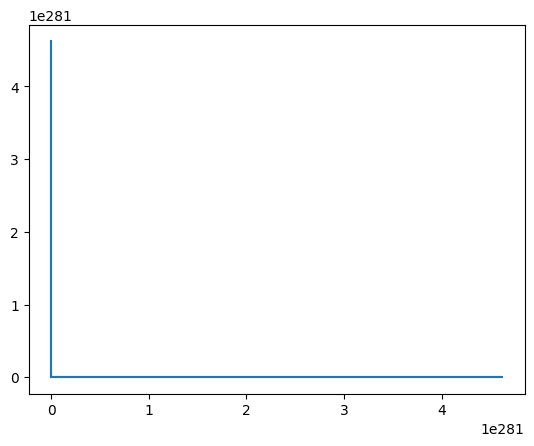

436th iteration, 763.5023284420007


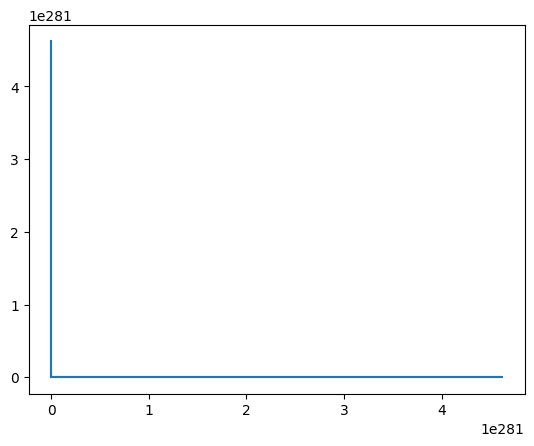

437th iteration, 763.4982219438308


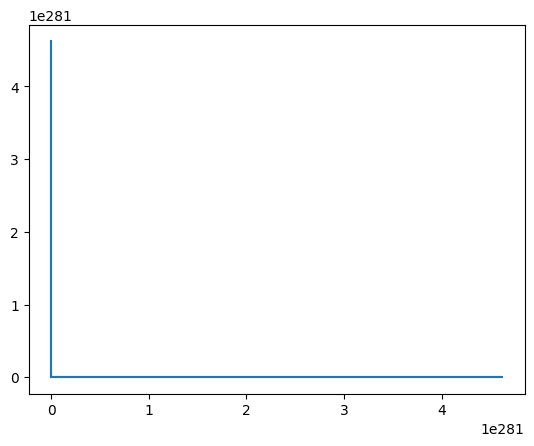

438th iteration, 763.4941154830192


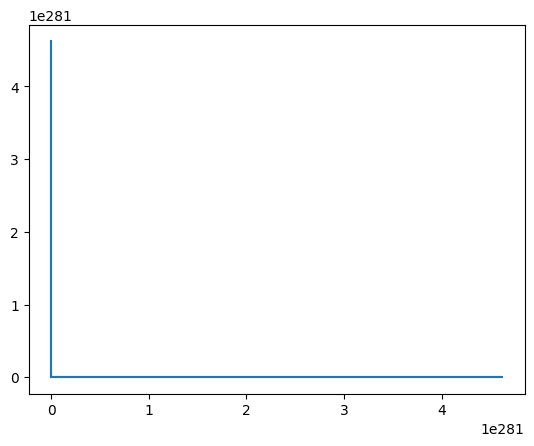

439th iteration, 763.4900090595653


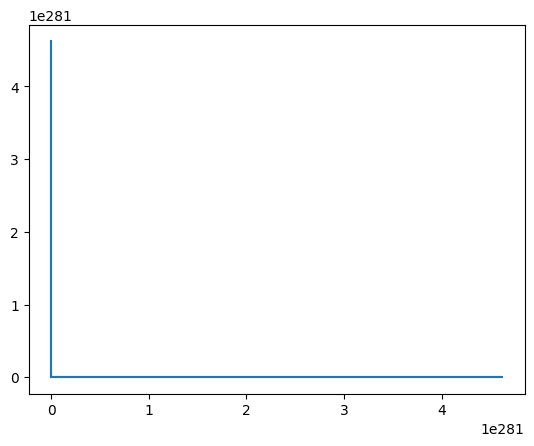

440th iteration, 763.4859026734699


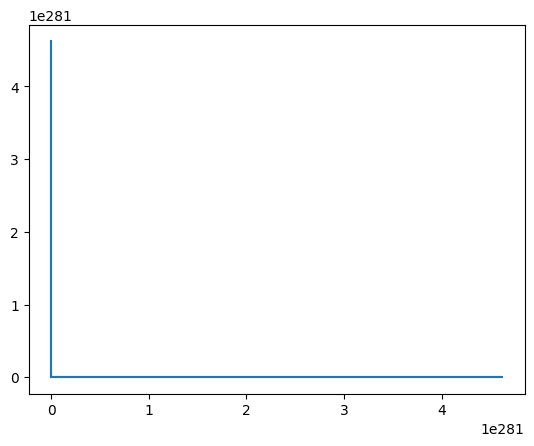

441th iteration, 763.4817963247311


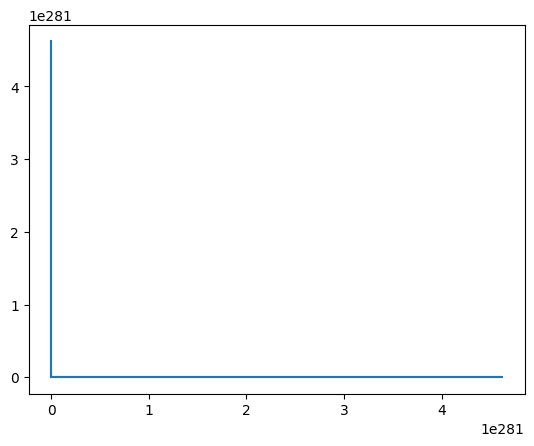

442th iteration, 763.4776900133496


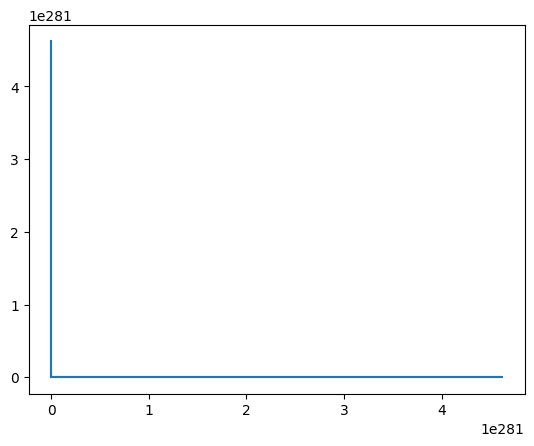

443th iteration, 763.4735837393243


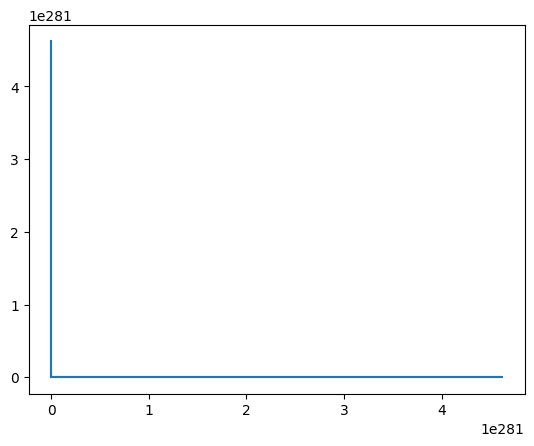

444th iteration, 763.4694775026556


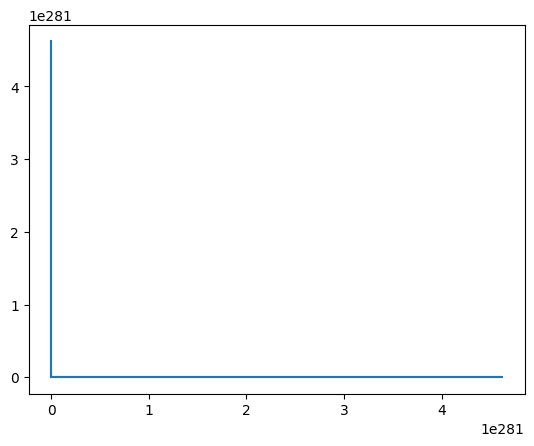

445th iteration, 763.4653713033429


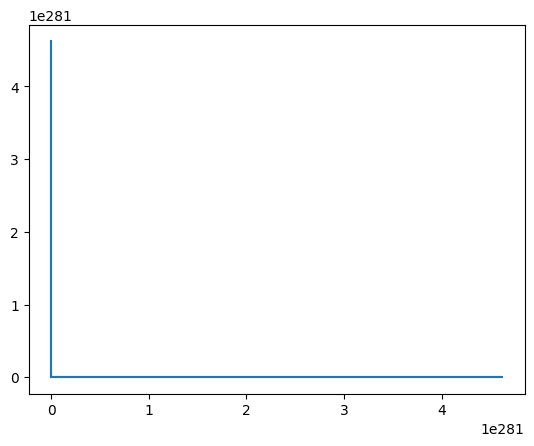

446th iteration, 763.461265141385


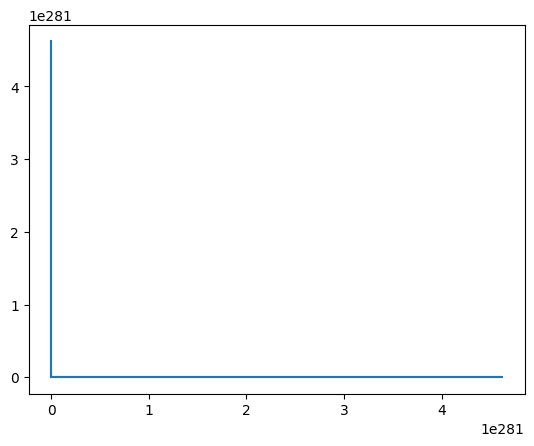

447th iteration, 763.4571590167824


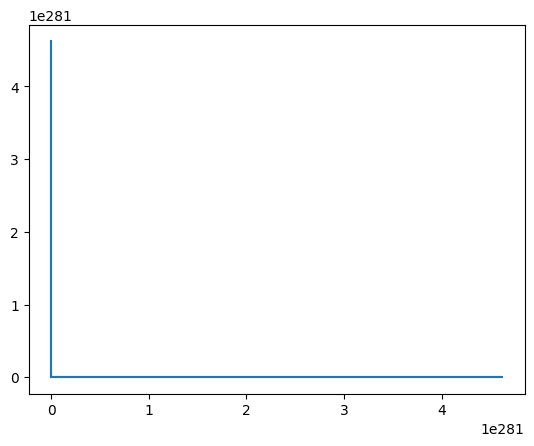

448th iteration, 763.4530529295342


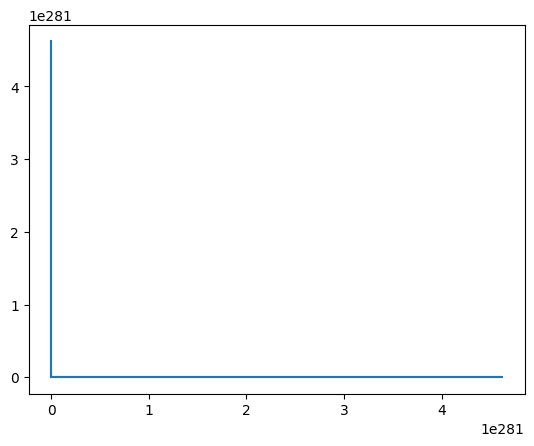

449th iteration, 763.448946879641


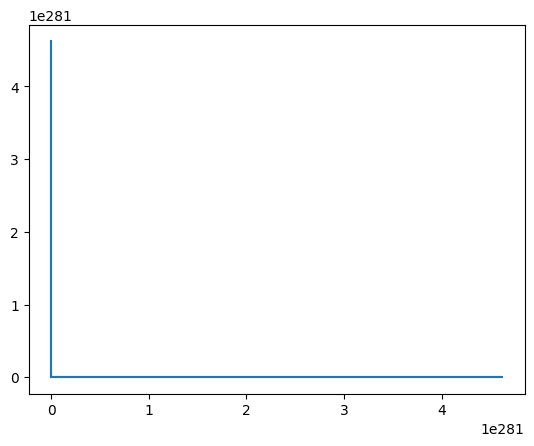

450th iteration, 763.444840867101


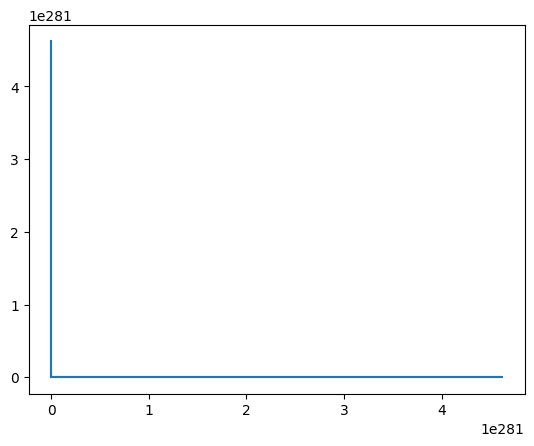

451th iteration, 763.4407348919148


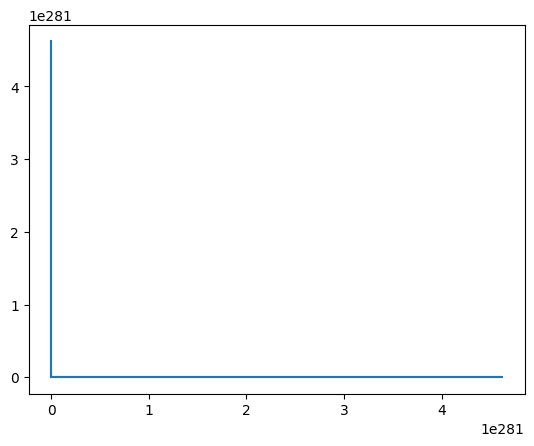

452th iteration, 763.4366289540819


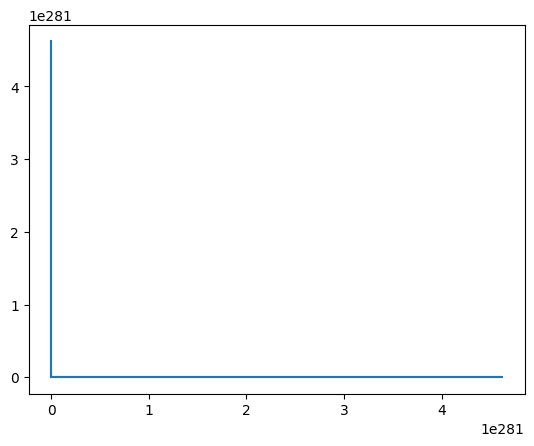

453th iteration, 763.4325230536016


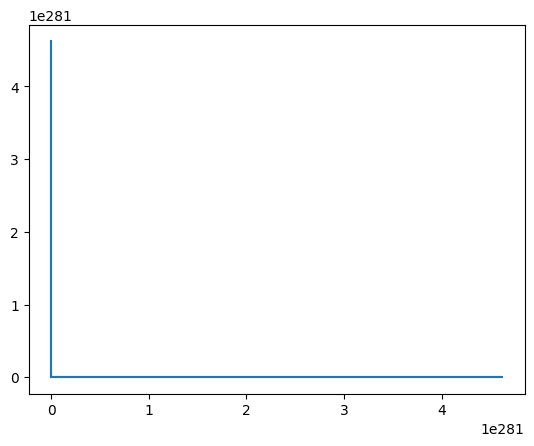

454th iteration, 763.4284171904737


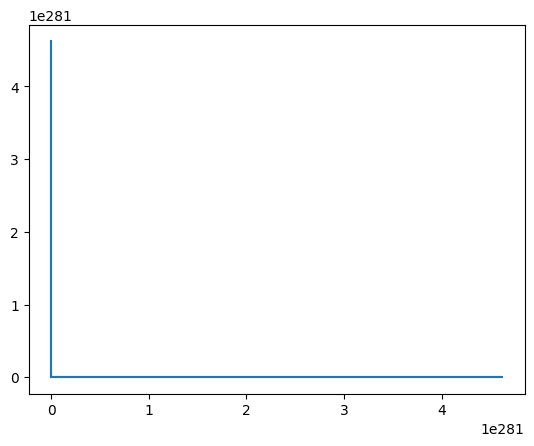

455th iteration, 763.4243113646979


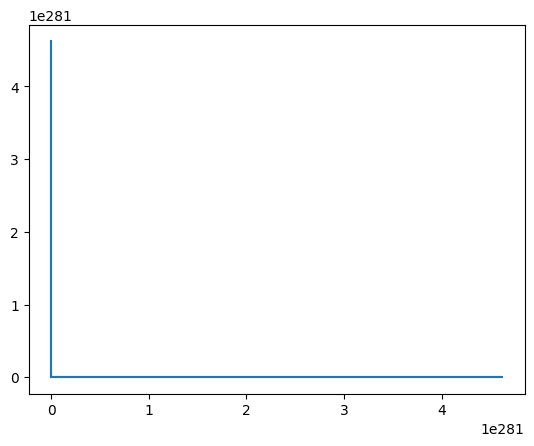

456th iteration, 763.4202055762735


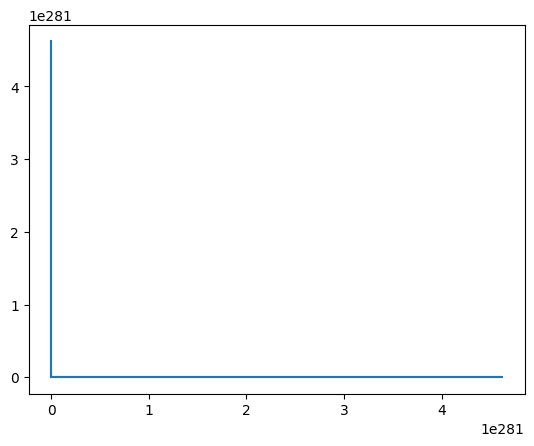

457th iteration, 763.4160998252007


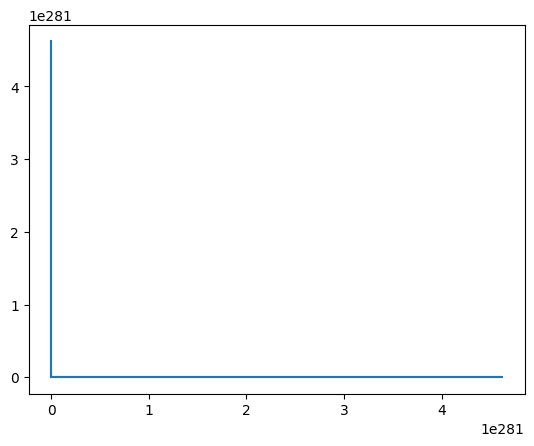

458th iteration, 763.4119941114783


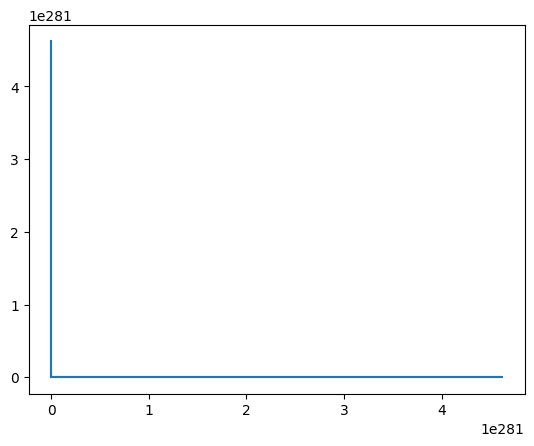

459th iteration, 763.4078884351067


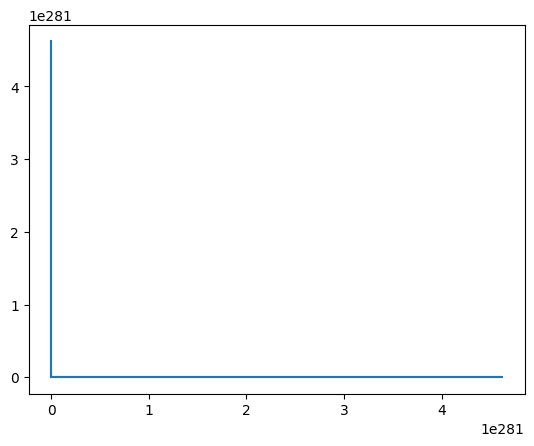

460th iteration, 763.4037827960849


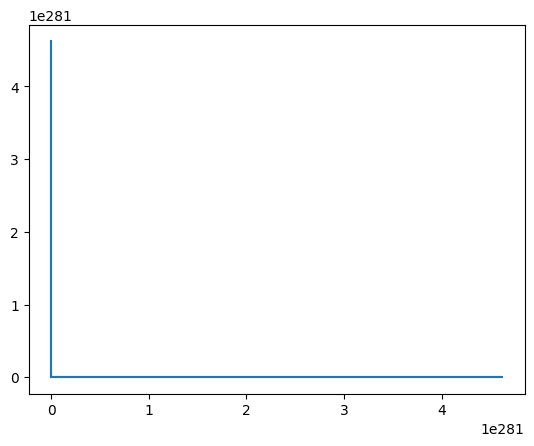

461th iteration, 763.3996771944127


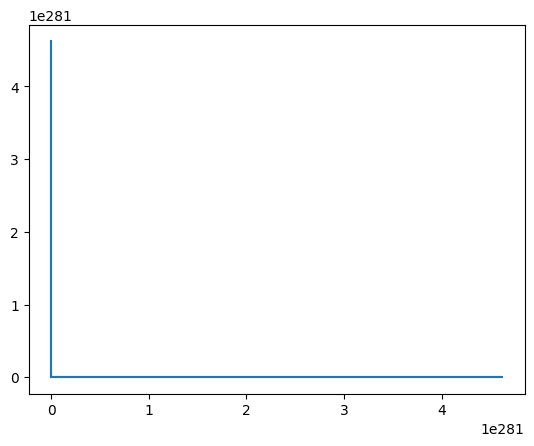

462th iteration, 763.3955716300899


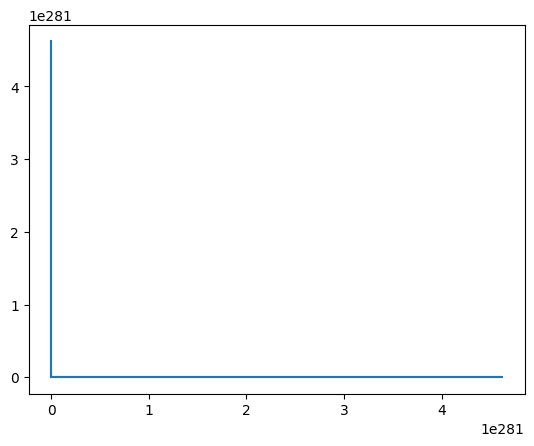

463th iteration, 763.3914661031159


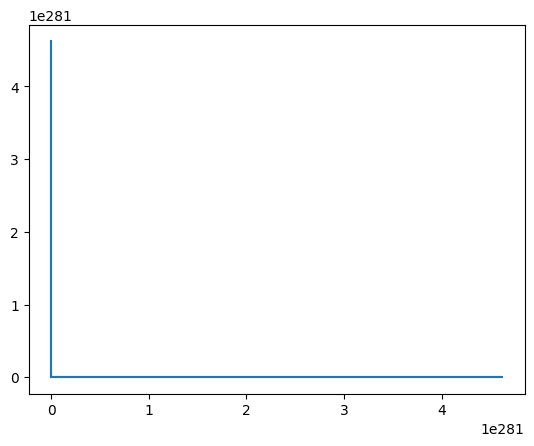

464th iteration, 763.3873606134906


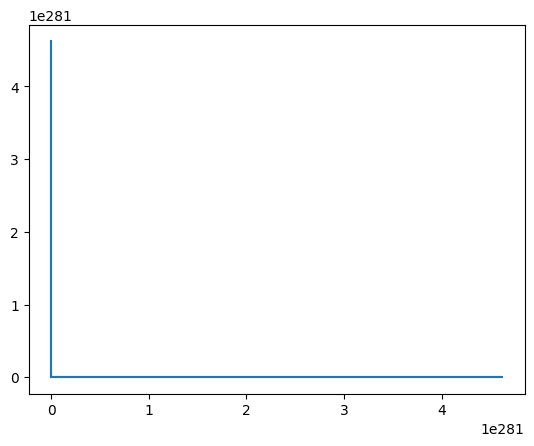

465th iteration, 763.3832551612137


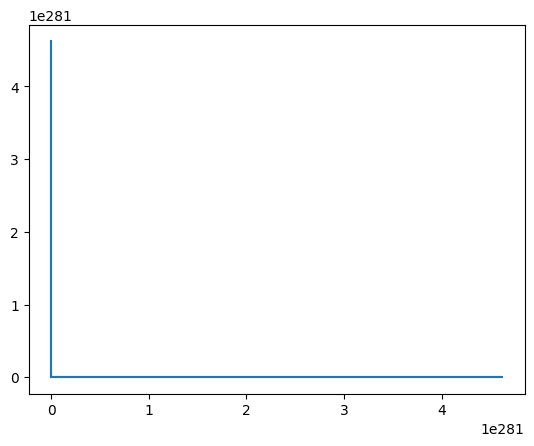

466th iteration, 763.3791497462844


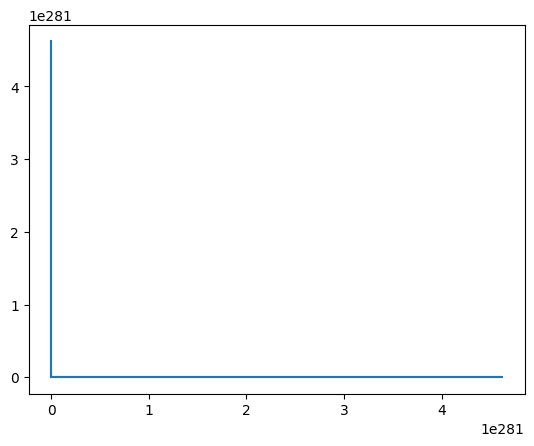

467th iteration, 763.3750443687022


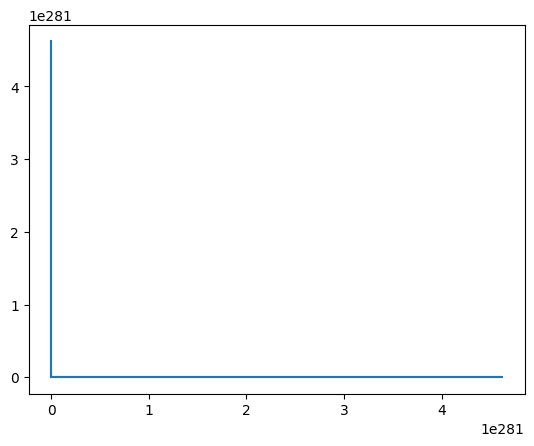

468th iteration, 763.3709390284672


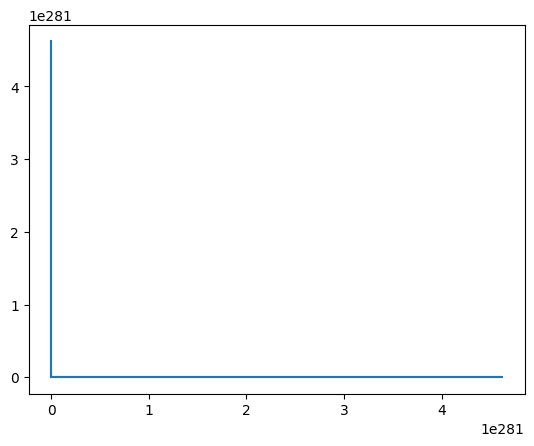

469th iteration, 763.3668337255791


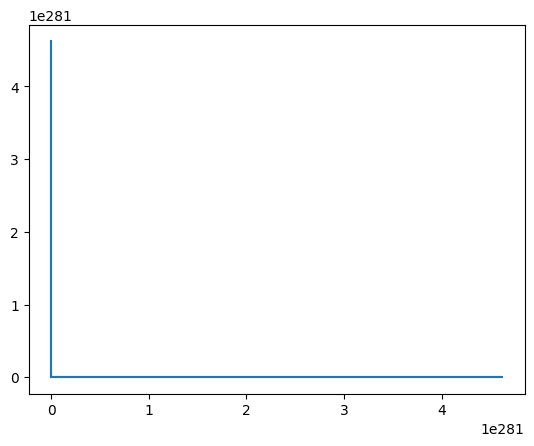

470th iteration, 763.3627284600368


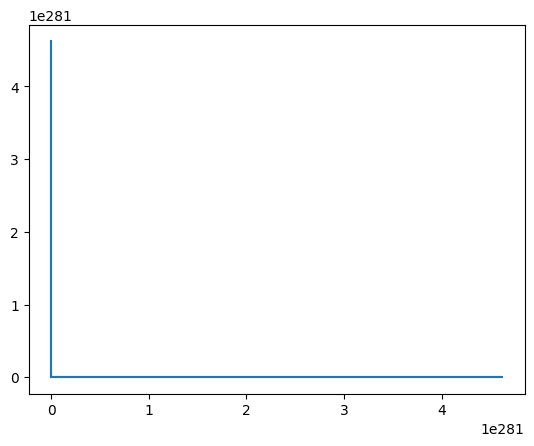

471th iteration, 763.3586232318409


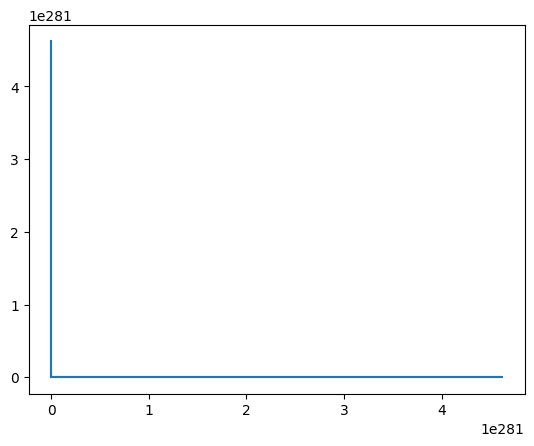

472th iteration, 763.3545180409903


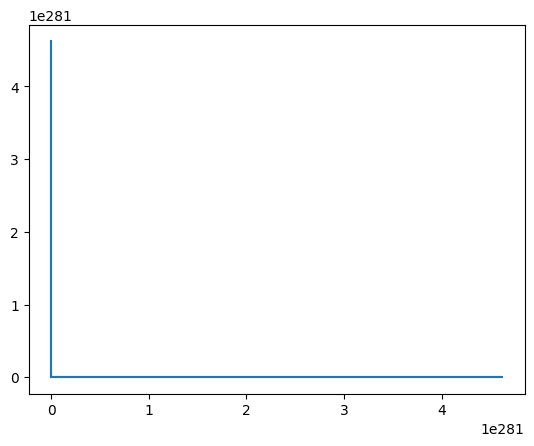

473th iteration, 763.3504128874849


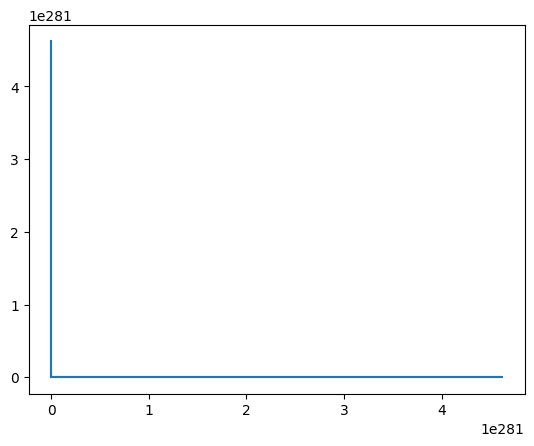

474th iteration, 763.3463077713242


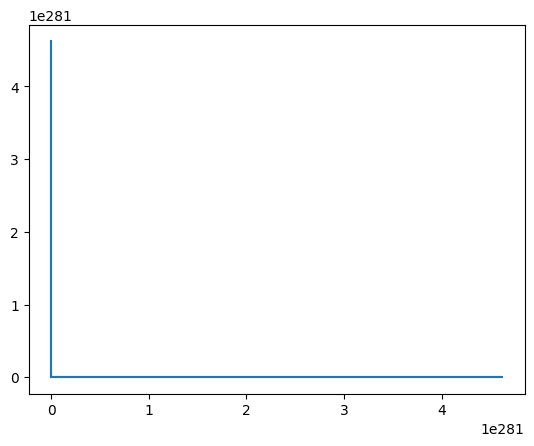

475th iteration, 763.3422026925077


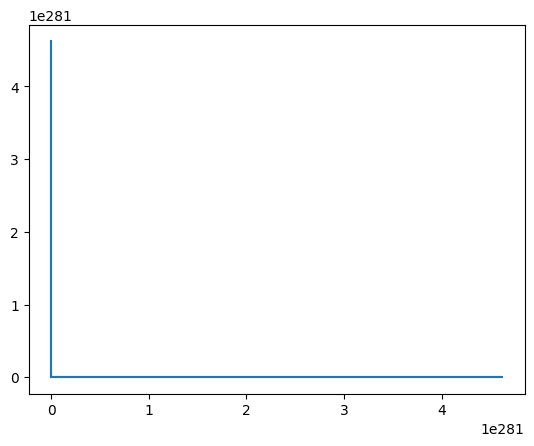

476th iteration, 763.3380976510354


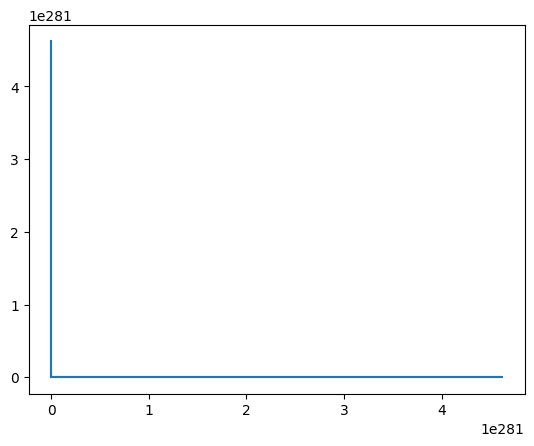

477th iteration, 763.3339926469066


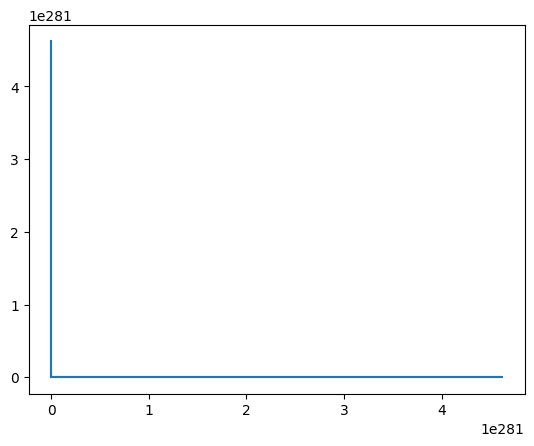

478th iteration, 763.3298876801205


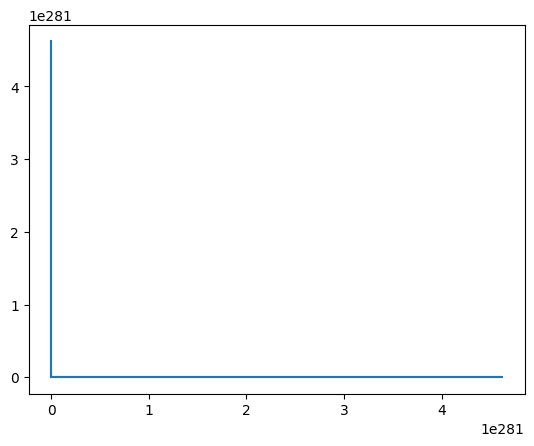

479th iteration, 763.3257827506776


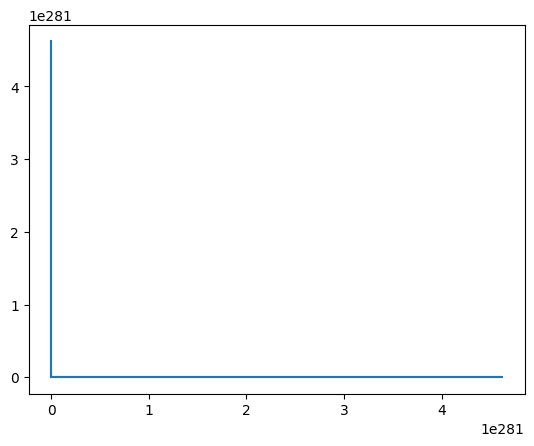

480th iteration, 763.3216778585769


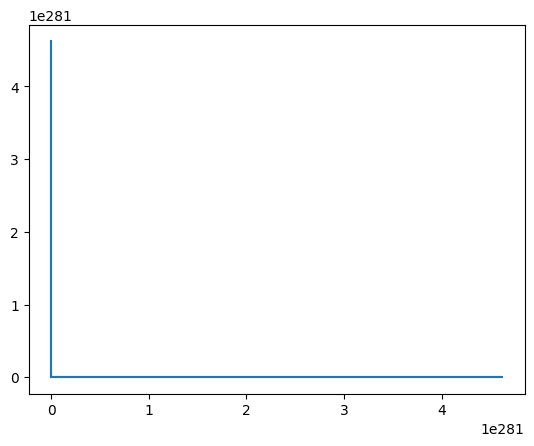

481th iteration, 763.3175730038181


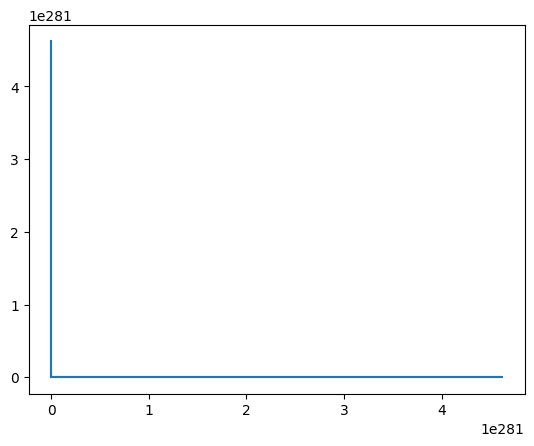

482th iteration, 763.3134681864013


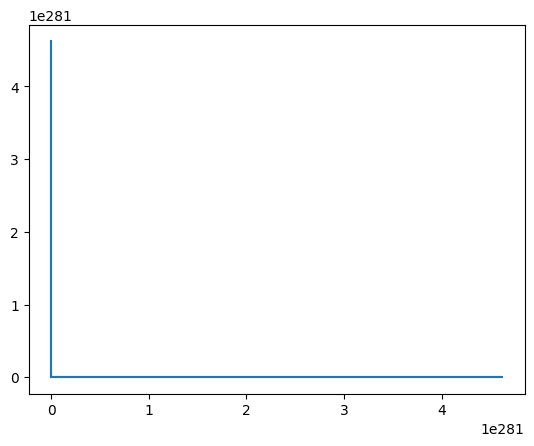

483th iteration, 763.3093634063258


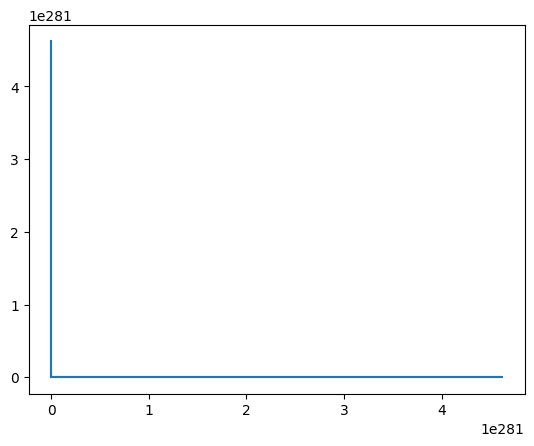

484th iteration, 763.3052586635911


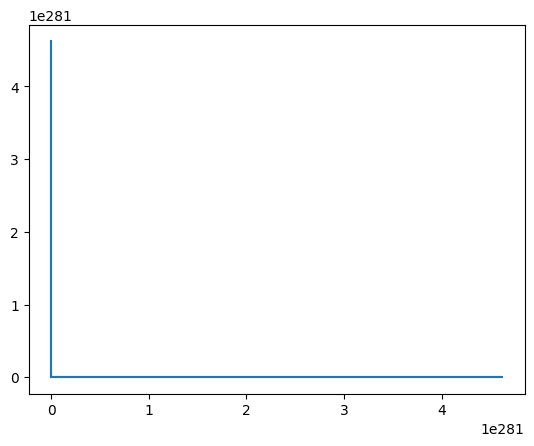

485th iteration, 763.3011539581973


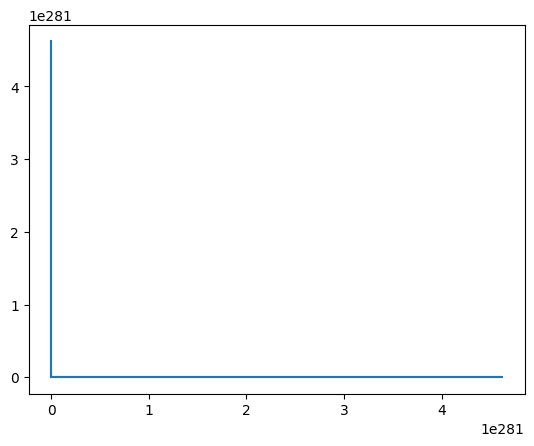

486th iteration, 763.2970492901436


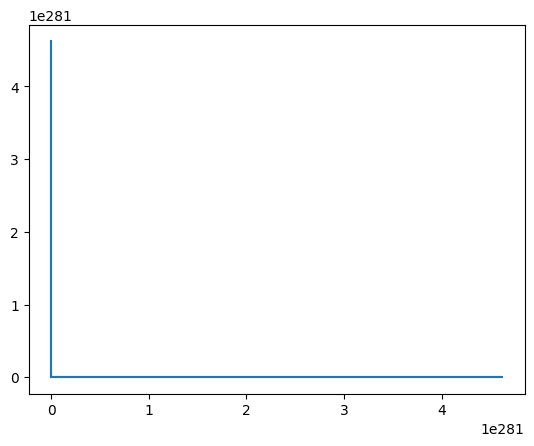

487th iteration, 763.2929446594293


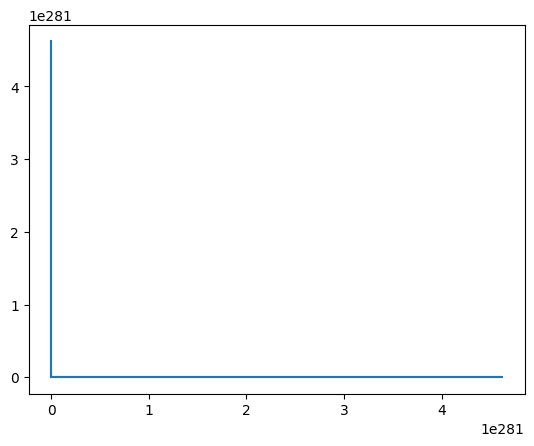

488th iteration, 763.2888400660545


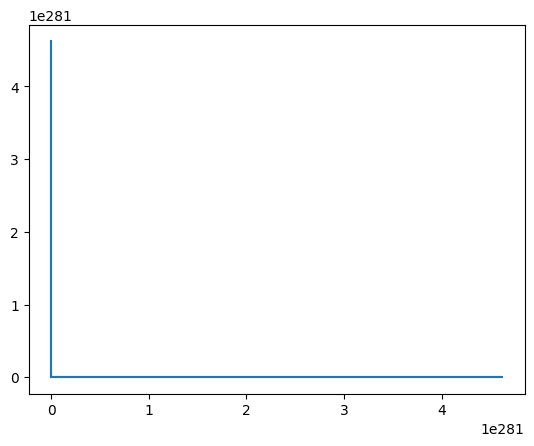

489th iteration, 763.2847355100187


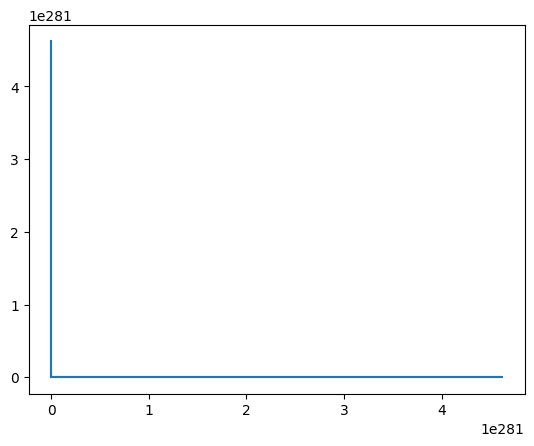

490th iteration, 763.2806309913218


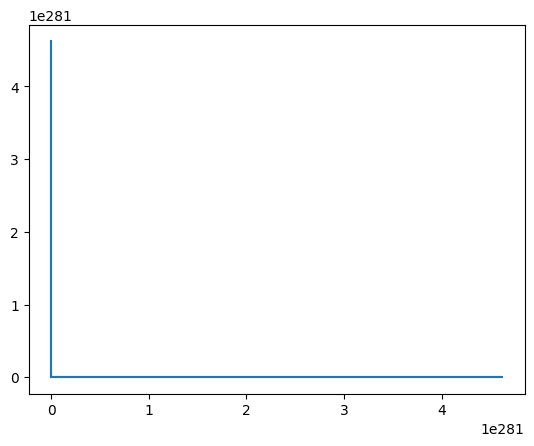

491th iteration, 763.276526509963


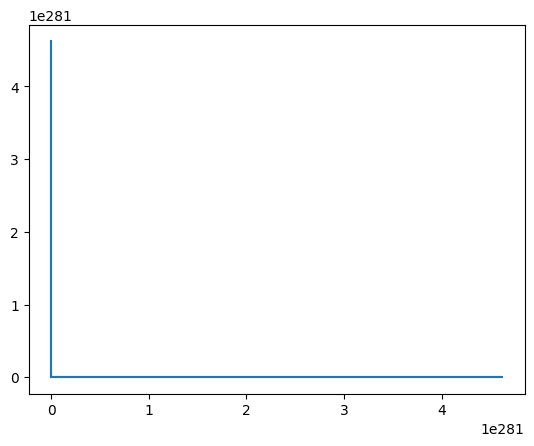

492th iteration, 763.2724220659419


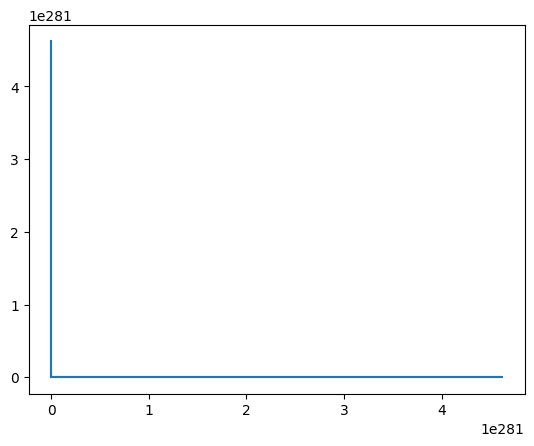

493th iteration, 763.2683176592589


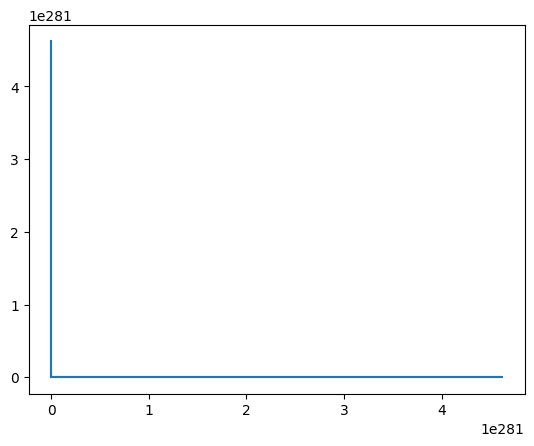

494th iteration, 763.2642132899124


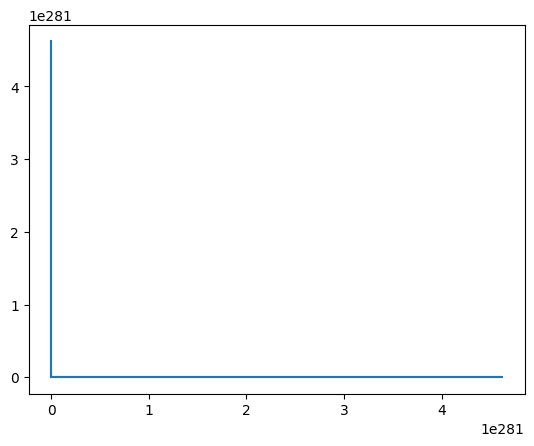

495th iteration, 763.2601089579028


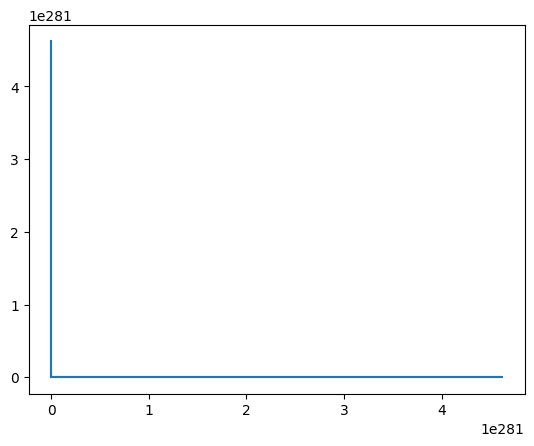

496th iteration, 763.2560046632299


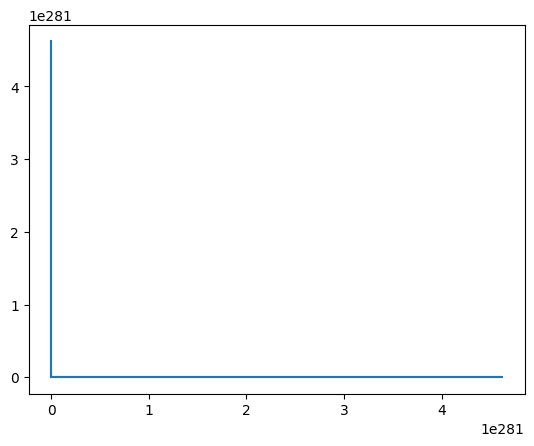

497th iteration, 763.2519004058922


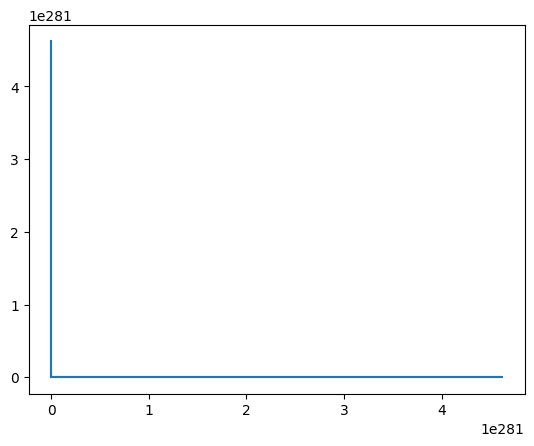

498th iteration, 763.2477961858906


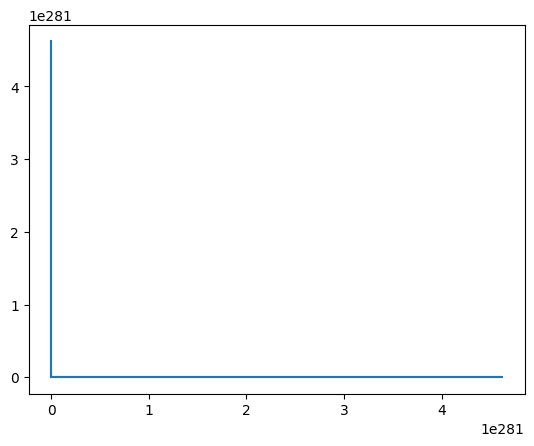

499th iteration, 763.2436920032242


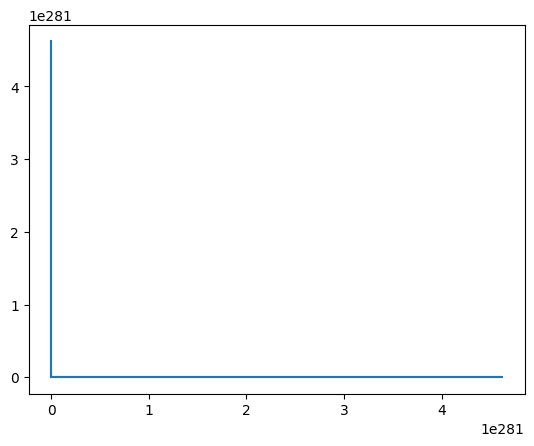

500th iteration, 763.2395878578926


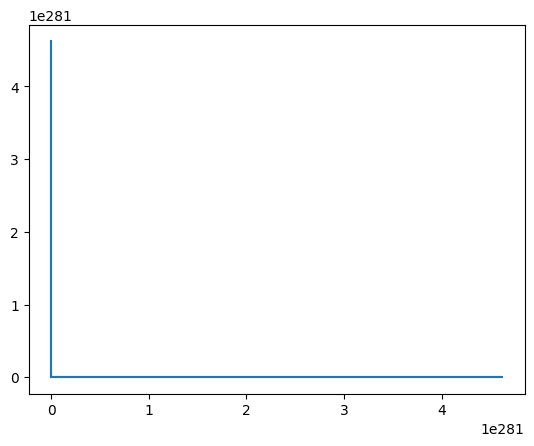

501th iteration, 763.2354837498956


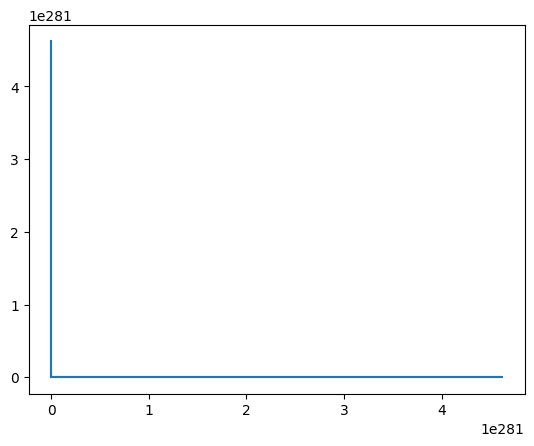

502th iteration, 763.2313796792324


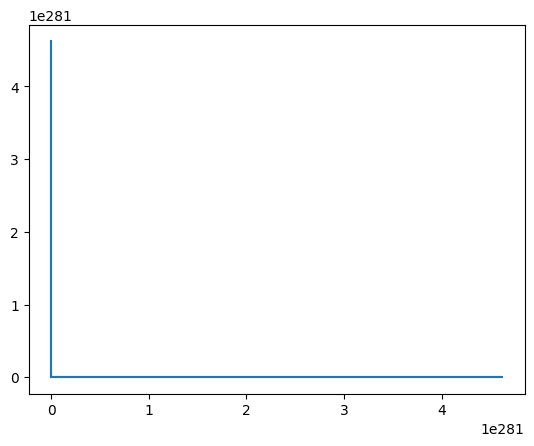

503th iteration, 763.2272756459028


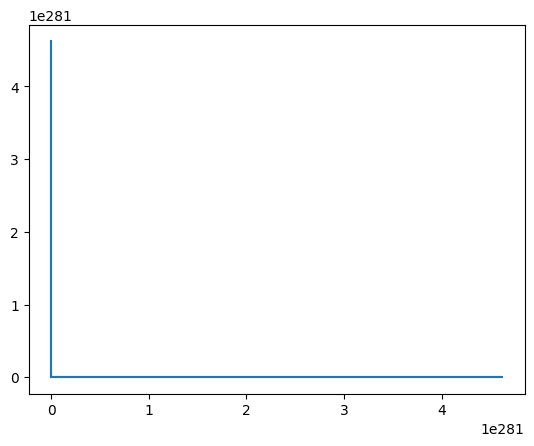

504th iteration, 763.2231716499061


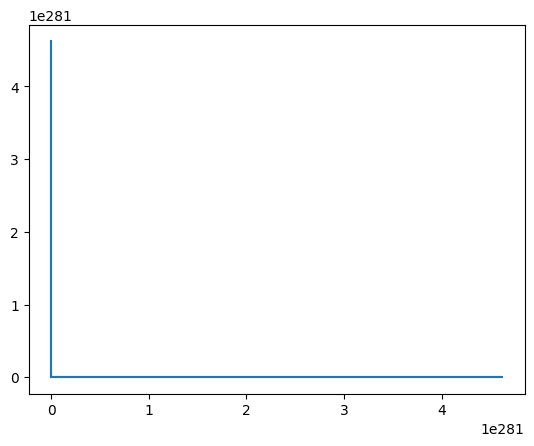

505th iteration, 763.2190676912426


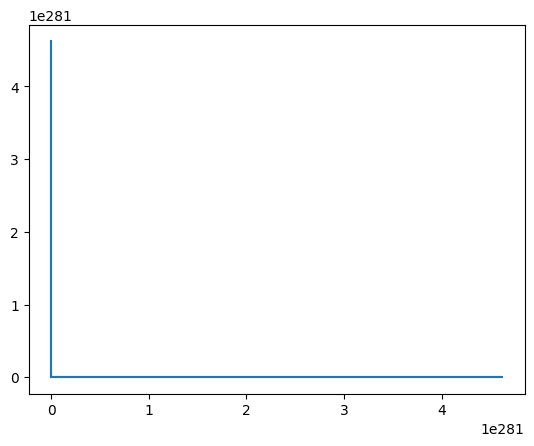

506th iteration, 763.2149637699118


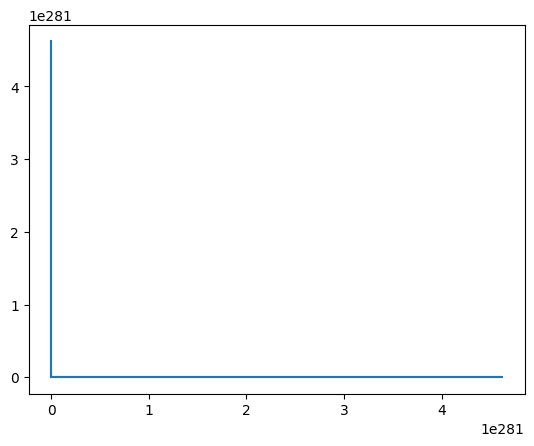

507th iteration, 763.210859885913


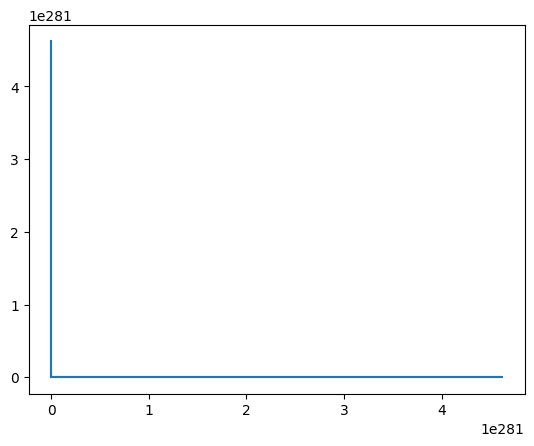

508th iteration, 763.2067560392464


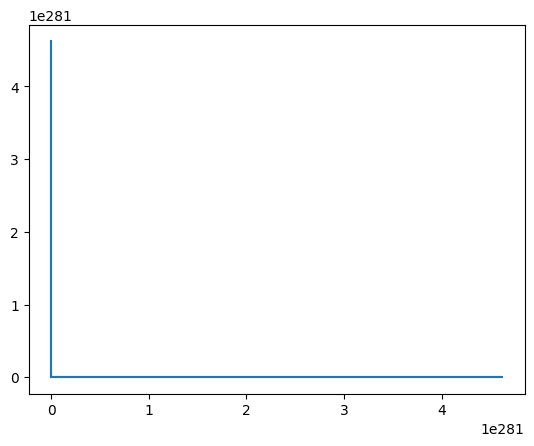

509th iteration, 763.2026522299112


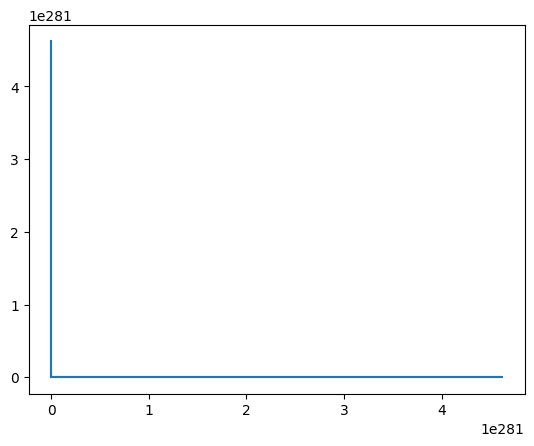

510th iteration, 763.1985484579066


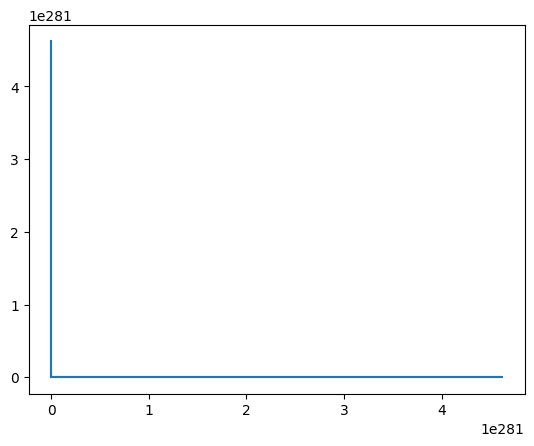

511th iteration, 763.1944447232328


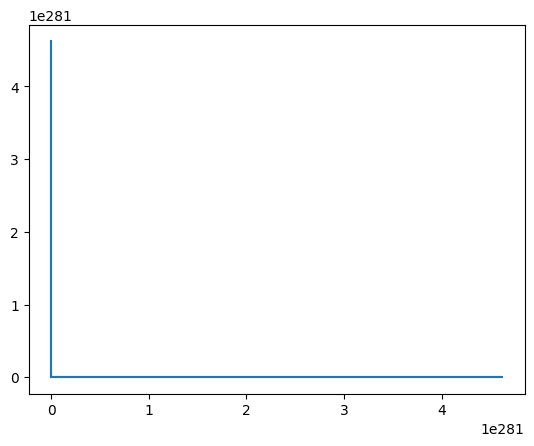

512th iteration, 763.1903410258892


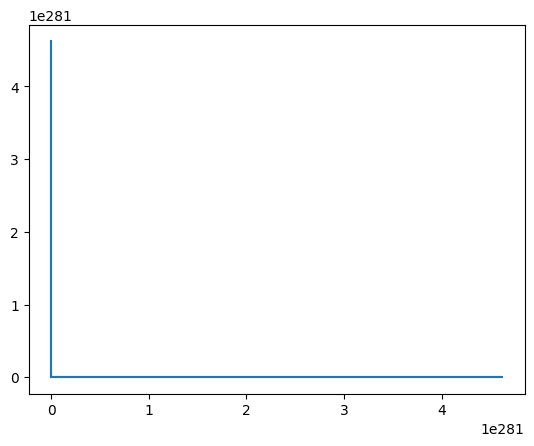

513th iteration, 763.1862373658753


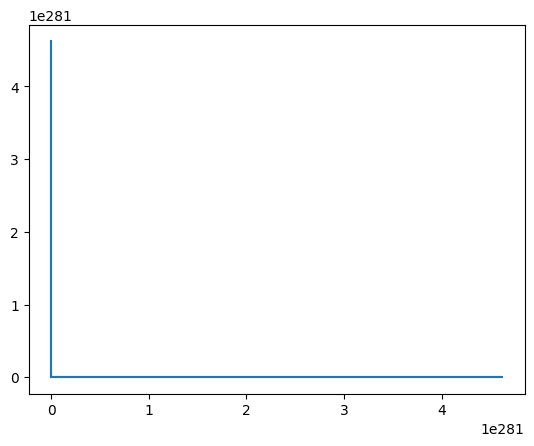

514th iteration, 763.182133743191


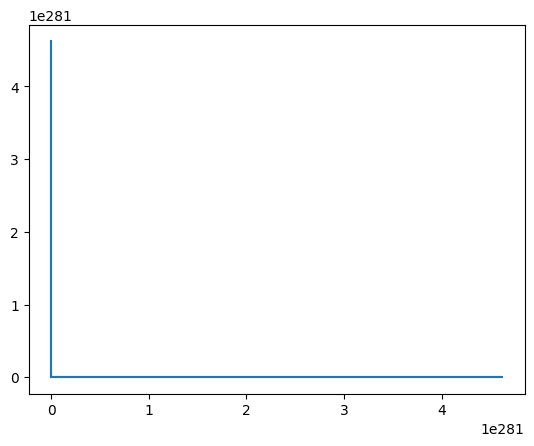

515th iteration, 763.1780301578357


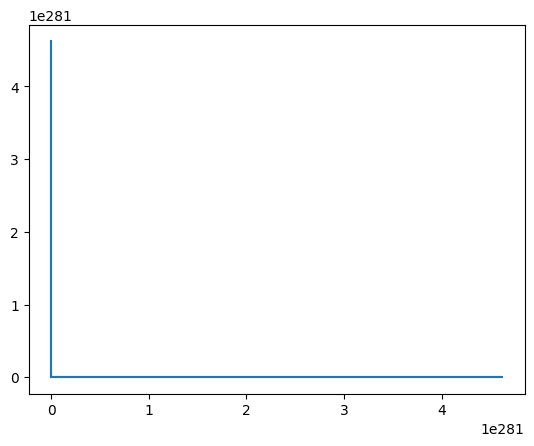

516th iteration, 763.1739266098091


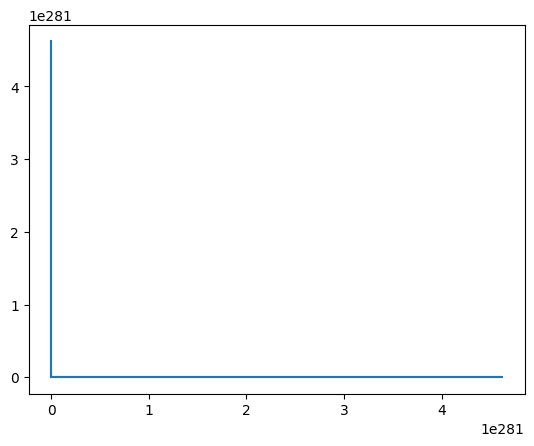

517th iteration, 763.1698230991113


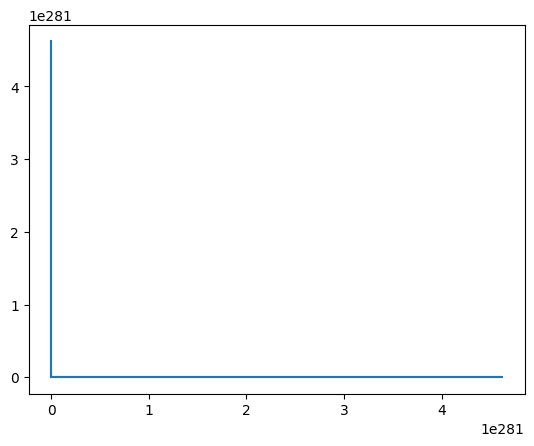

518th iteration, 763.1657196257414


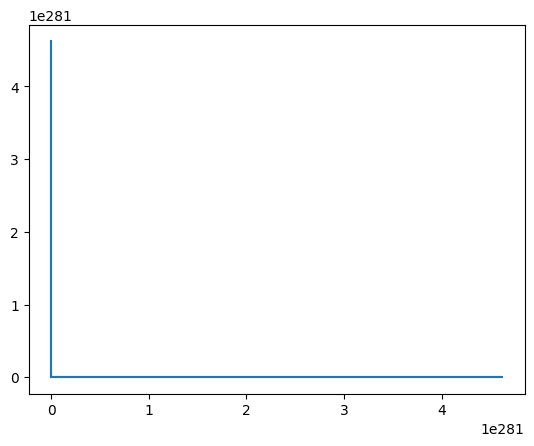

519th iteration, 763.1616161896987


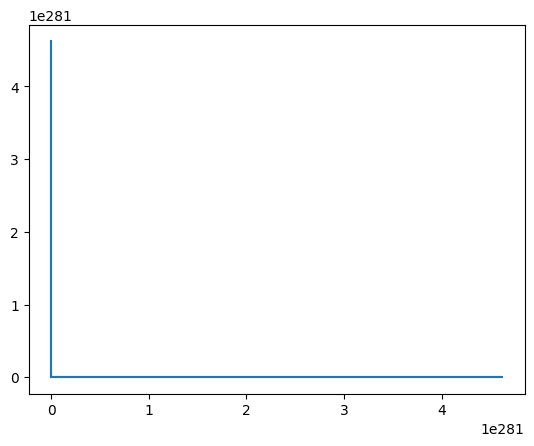

520th iteration, 763.1575127909836


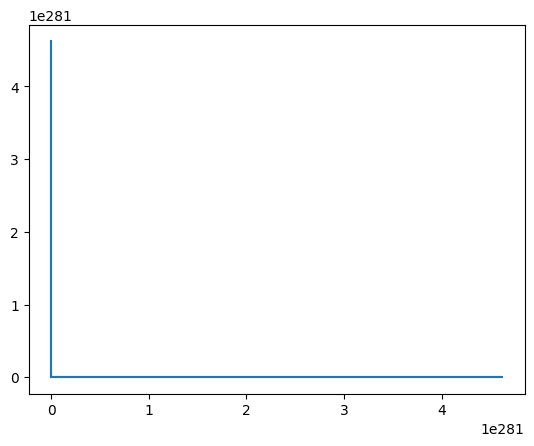

521th iteration, 763.1534094295946


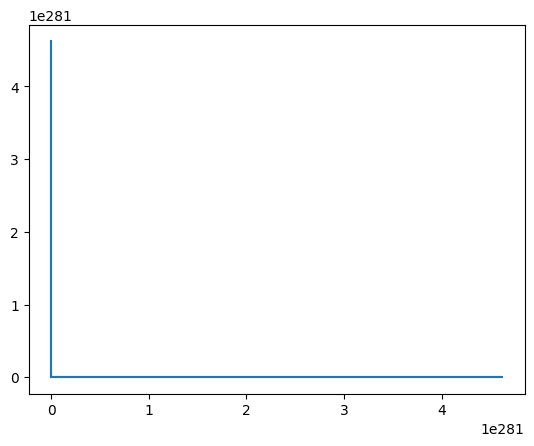

522th iteration, 763.1493061055324


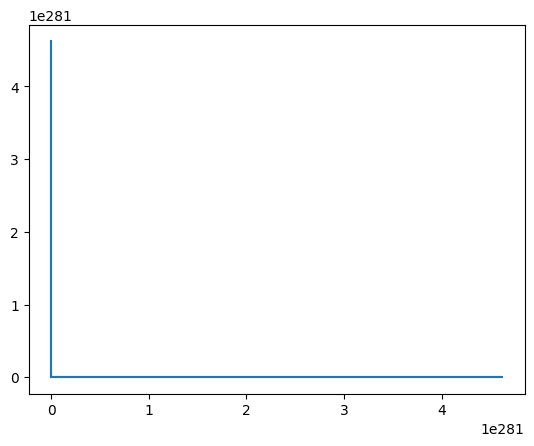

523th iteration, 763.1452028187961


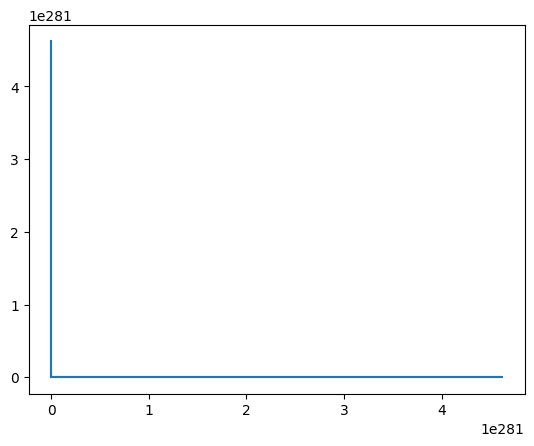

524th iteration, 763.1410995693858


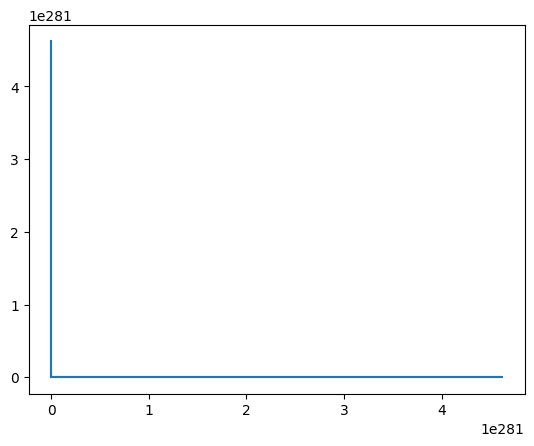

525th iteration, 763.1369963573009


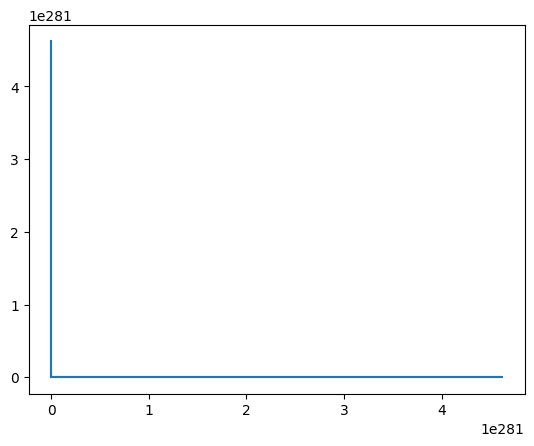

526th iteration, 763.1328931825409


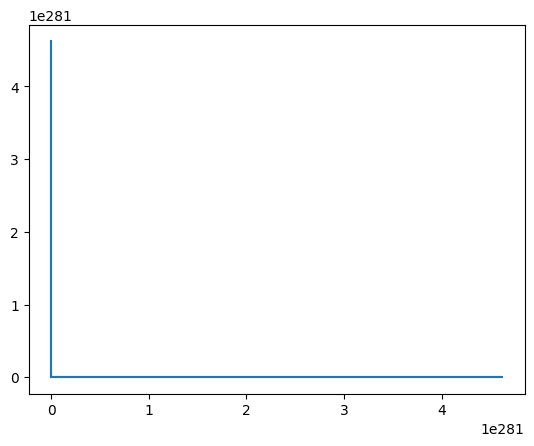

527th iteration, 763.1287900451052


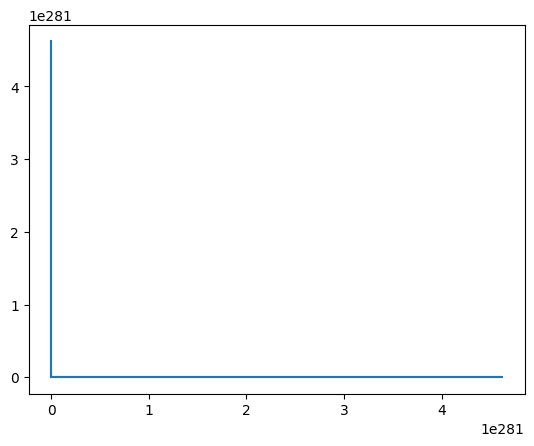

528th iteration, 763.1246869449939


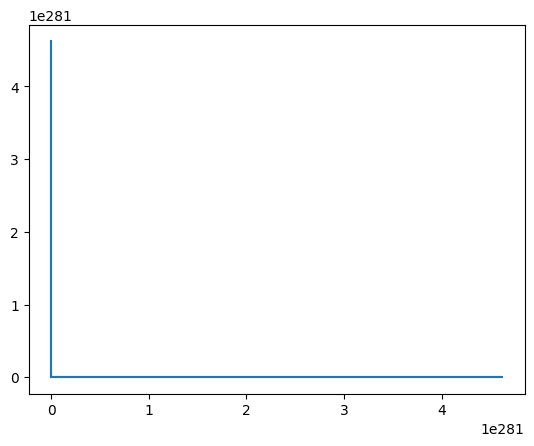

529th iteration, 763.120583882206


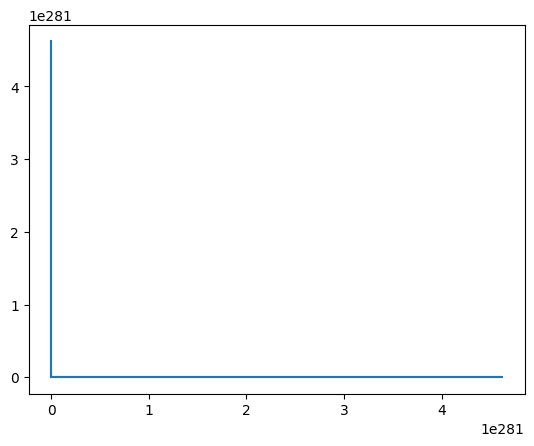

530th iteration, 763.1164808567419


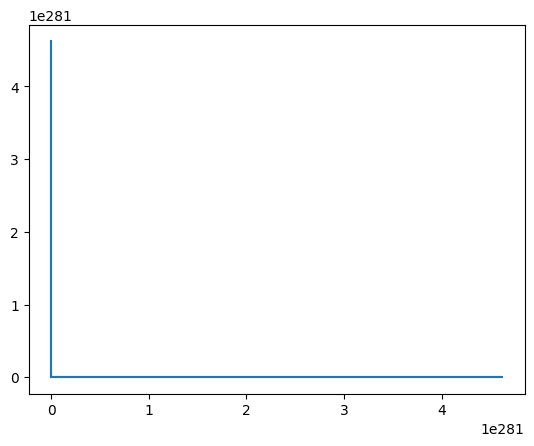

531th iteration, 763.1123778686004


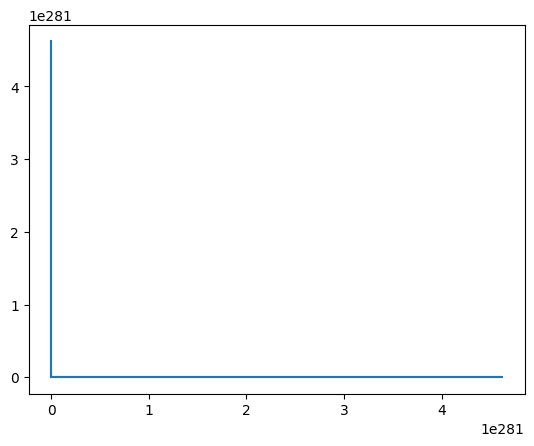

532th iteration, 763.108274917782


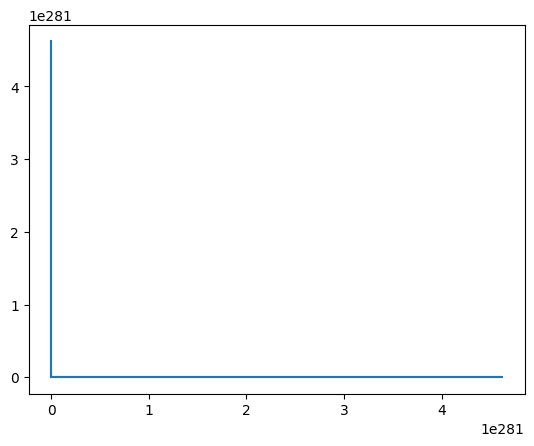

533th iteration, 763.1041720042857


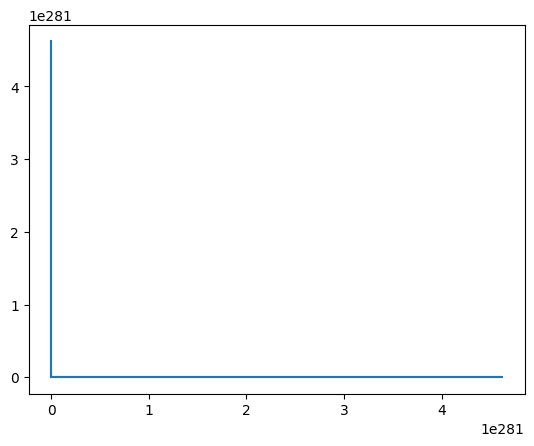

534th iteration, 763.1000691281109


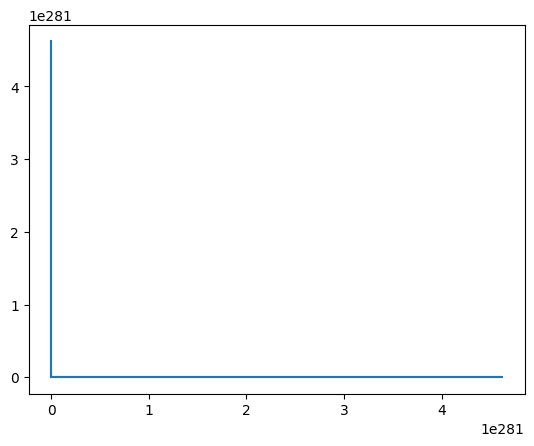

535th iteration, 763.0959662892582


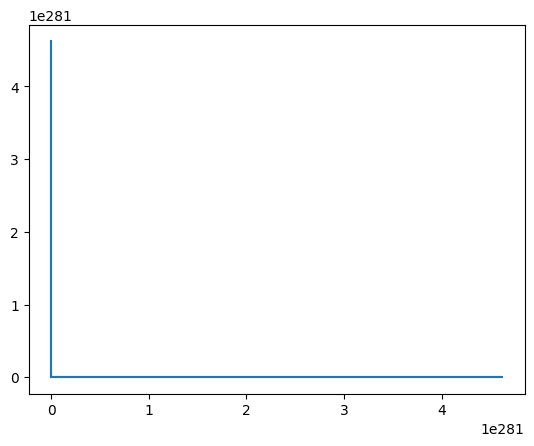

536th iteration, 763.0918634877264


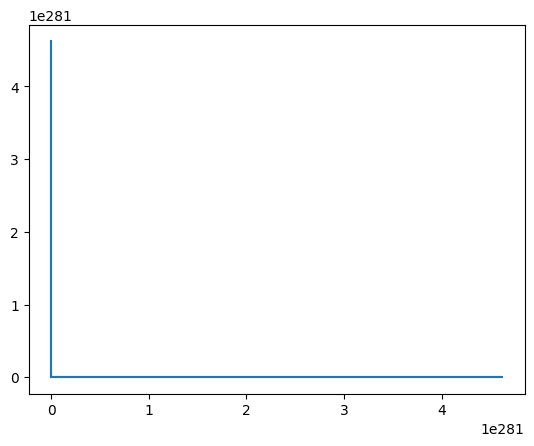

537th iteration, 763.0877607235154


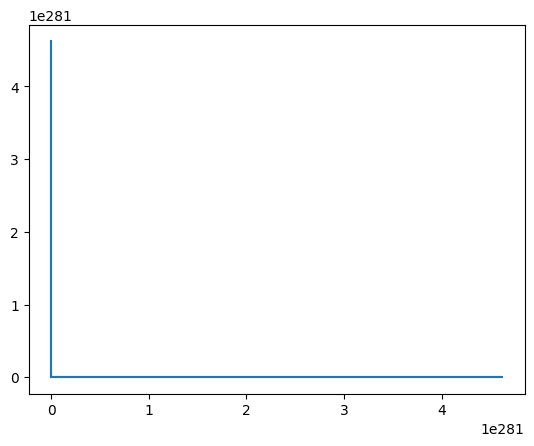

538th iteration, 763.0836579966244


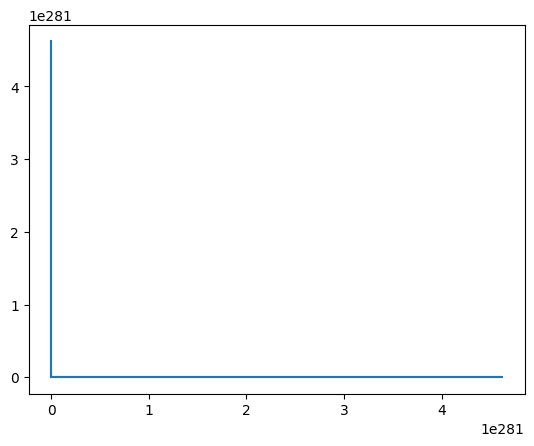

539th iteration, 763.0795553070539


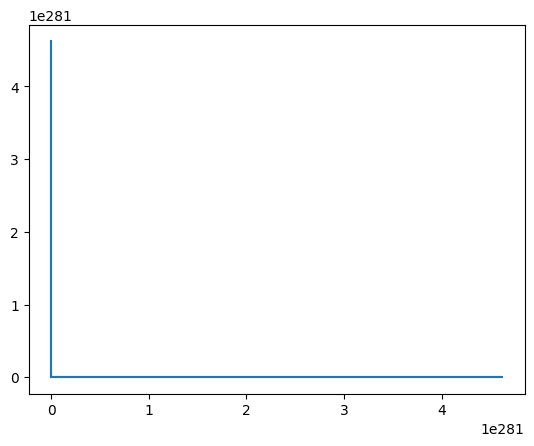

540th iteration, 763.0754526548025


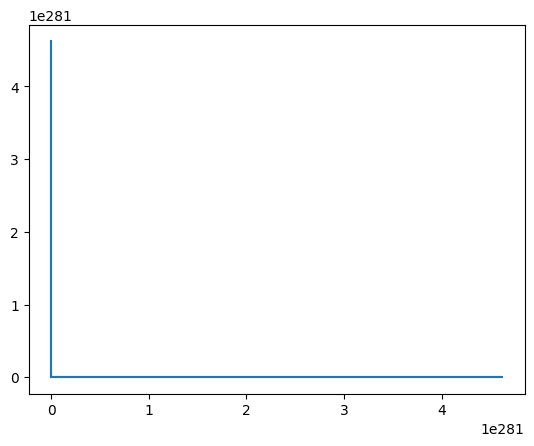

541th iteration, 763.0713500398706


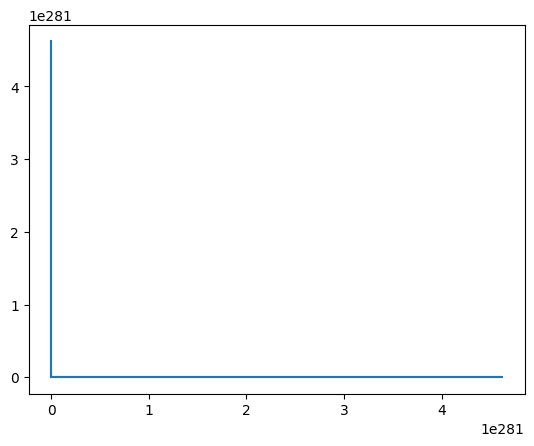

542th iteration, 763.0672474622573


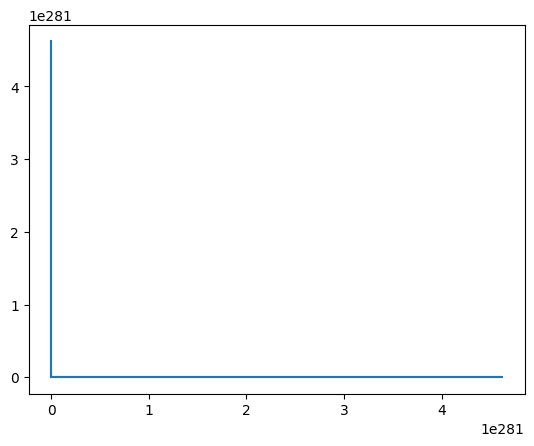

543th iteration, 763.0631449219624


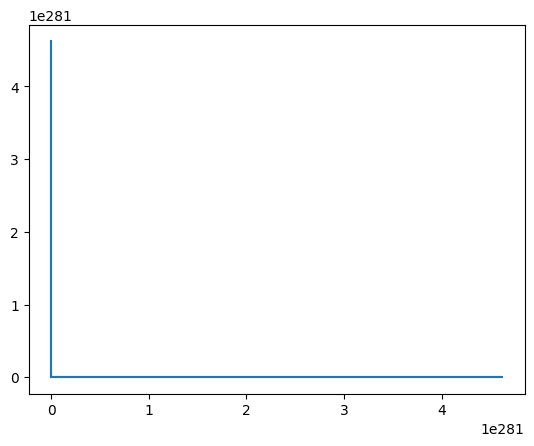

544th iteration, 763.0590424189859


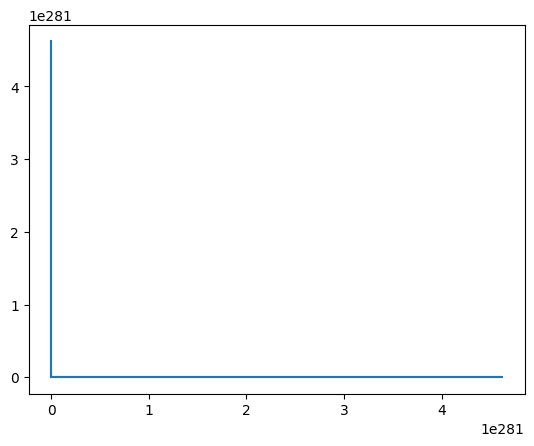

545th iteration, 763.0549399533269


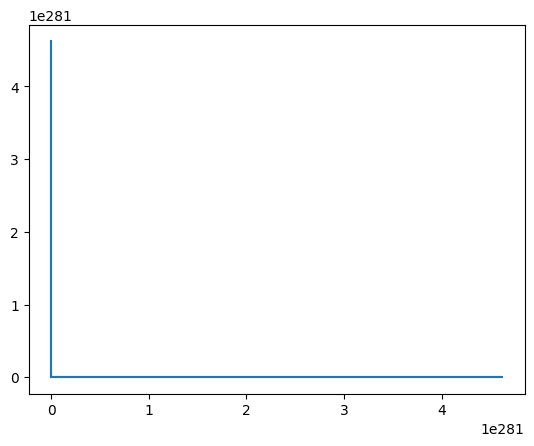

546th iteration, 763.0508375249852


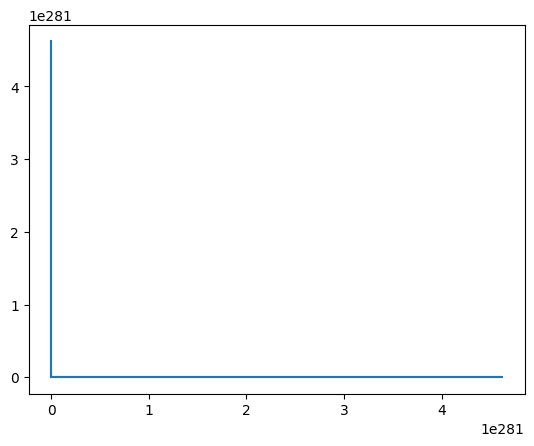

547th iteration, 763.0467351339602


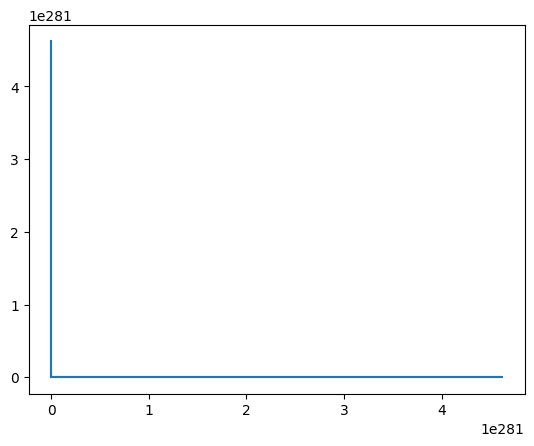

548th iteration, 763.0426327802519


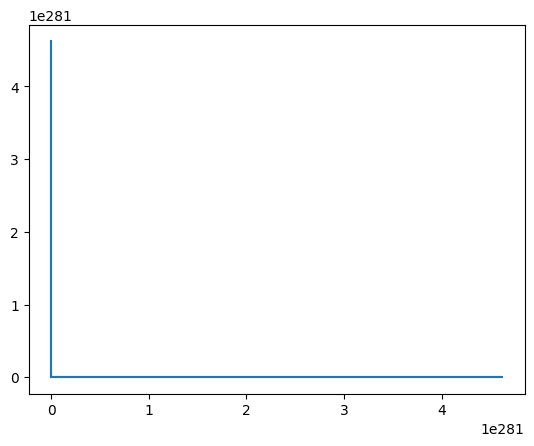

549th iteration, 763.0385304638596


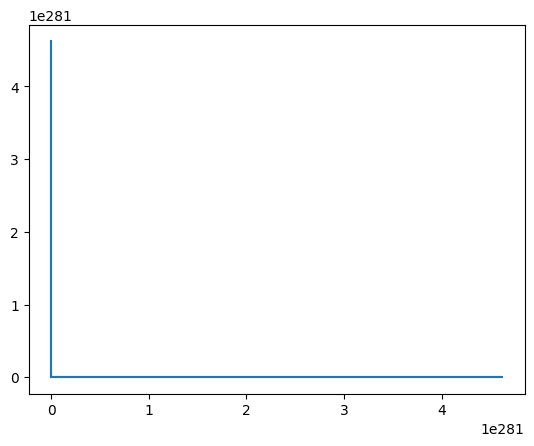

550th iteration, 763.0344281847831


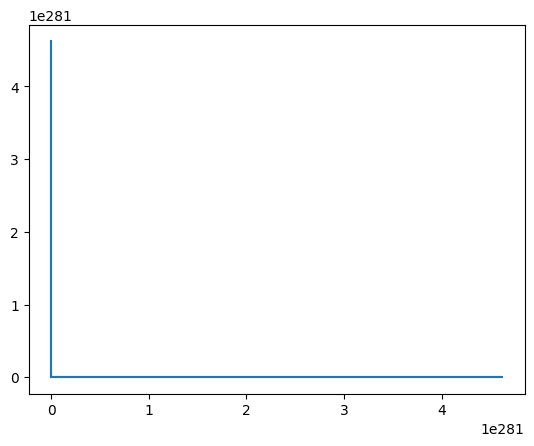

551th iteration, 763.030325943022


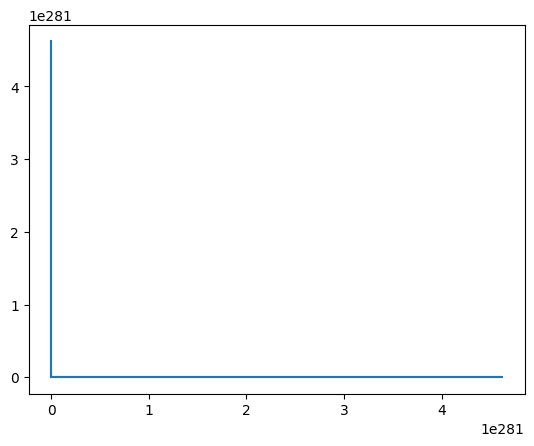

552th iteration, 763.0262237385763


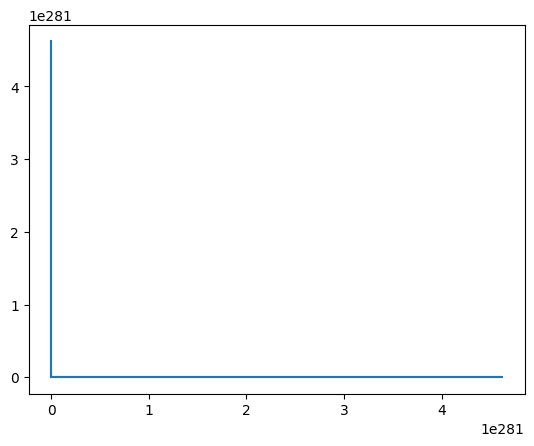

553th iteration, 763.022121571445


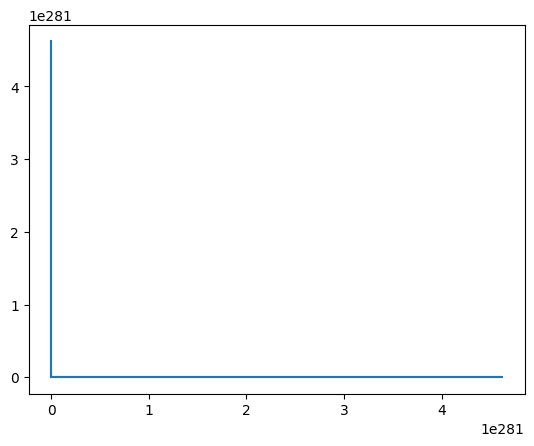

554th iteration, 763.0180194416278


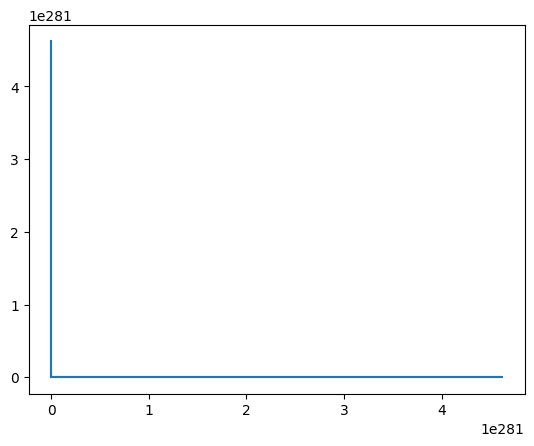

555th iteration, 763.0139173491242


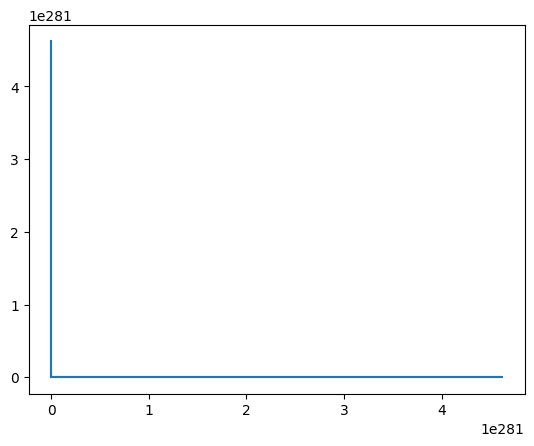

556th iteration, 763.0098152939347


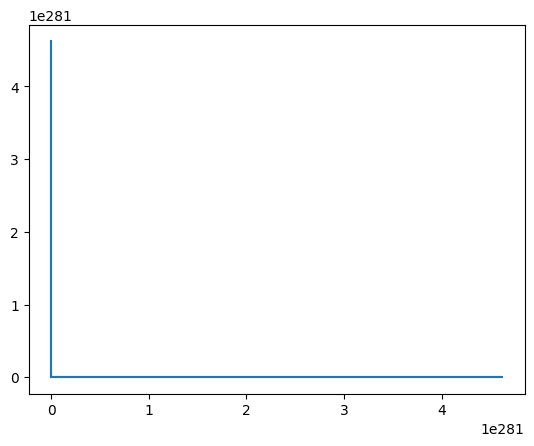

557th iteration, 763.0057132760584


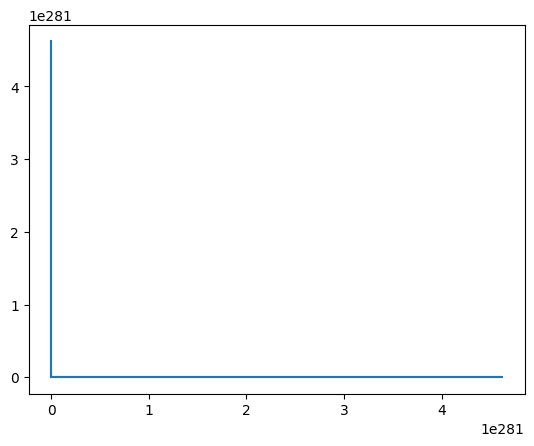

558th iteration, 763.0016112954947


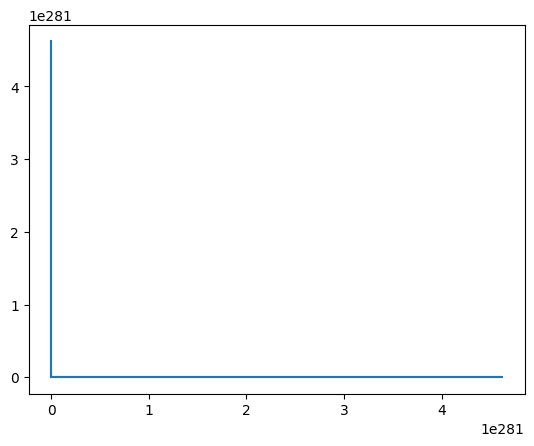

559th iteration, 762.9975093522434


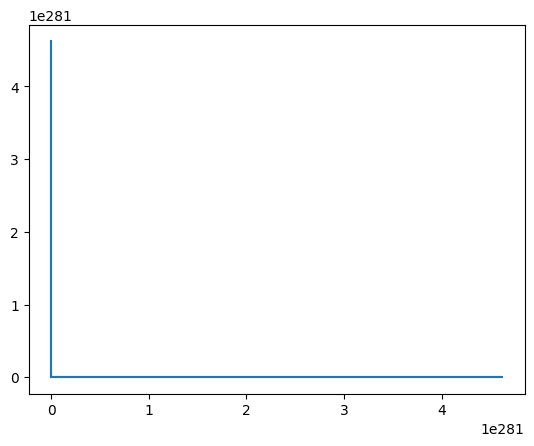

560th iteration, 762.9934074463038


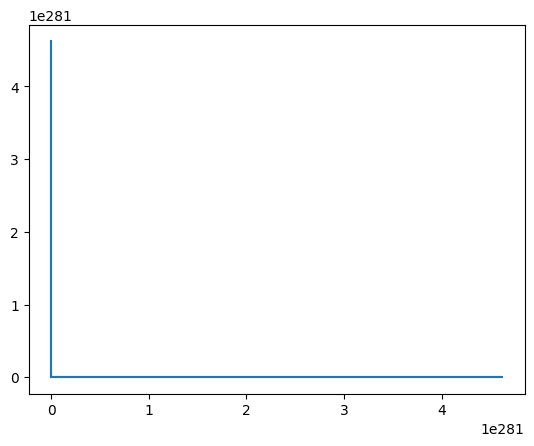

561th iteration, 762.9893055776763


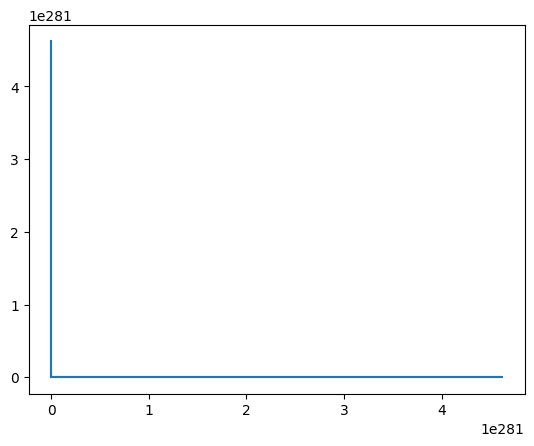

562th iteration, 762.9852037463595


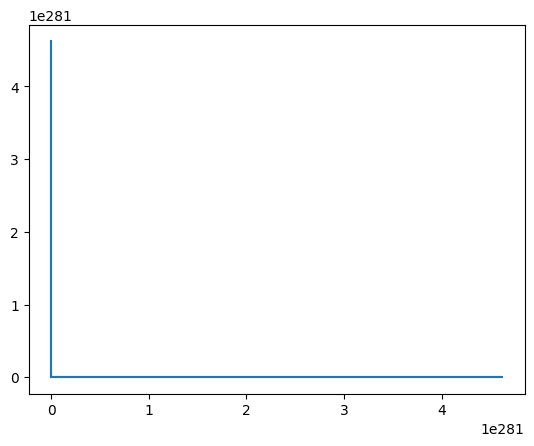

563th iteration, 762.9811019523536


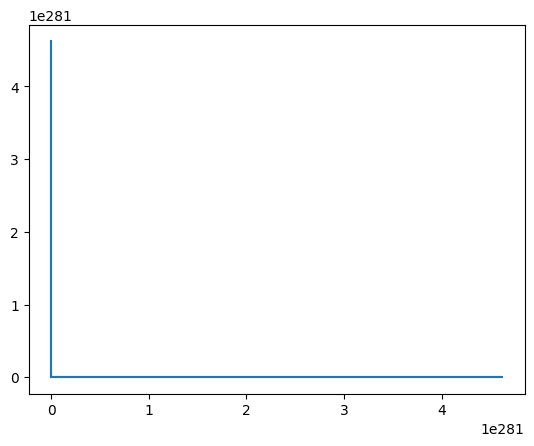

564th iteration, 762.9770001956582


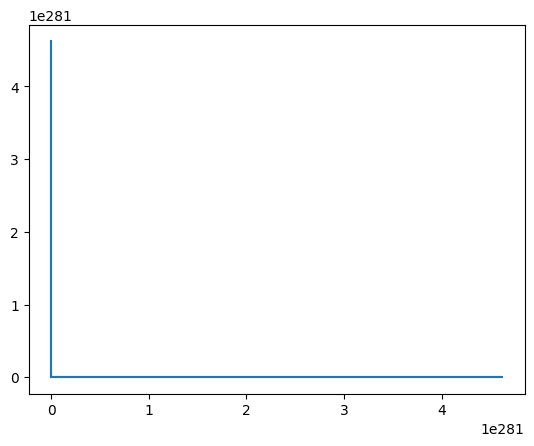

565th iteration, 762.9728984762728


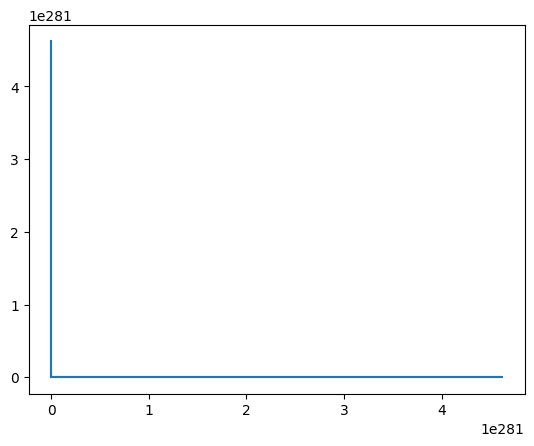

566th iteration, 762.9687967941976


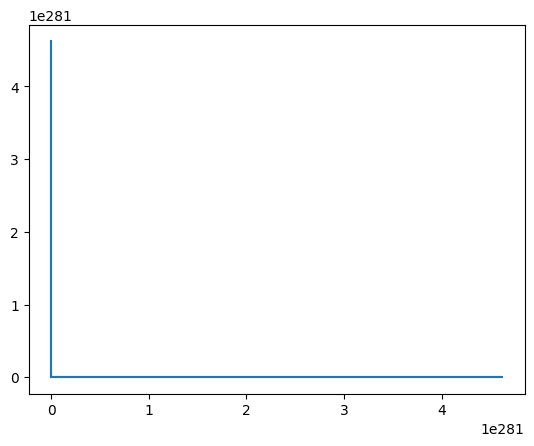

567th iteration, 762.9646951494312


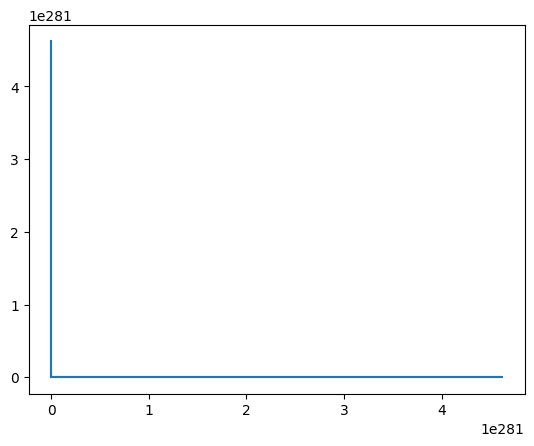

568th iteration, 762.9605935419737


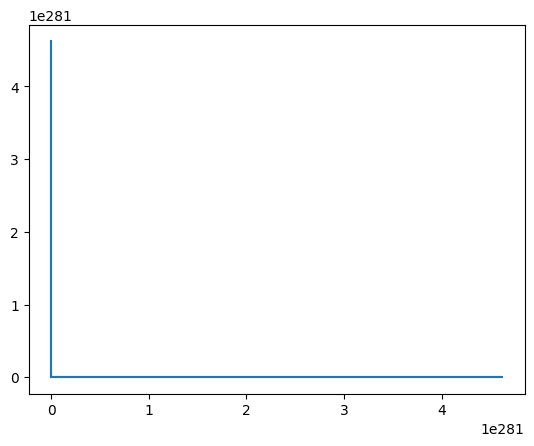

569th iteration, 762.9564919718248


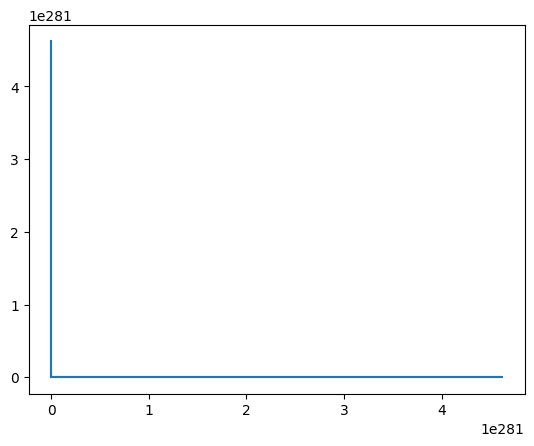

570th iteration, 762.9523904389846


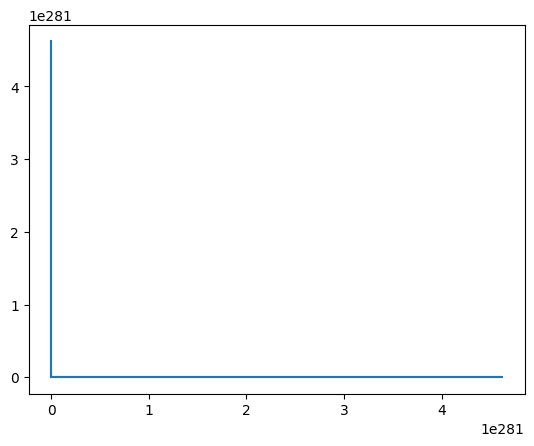

571th iteration, 762.9482889434515


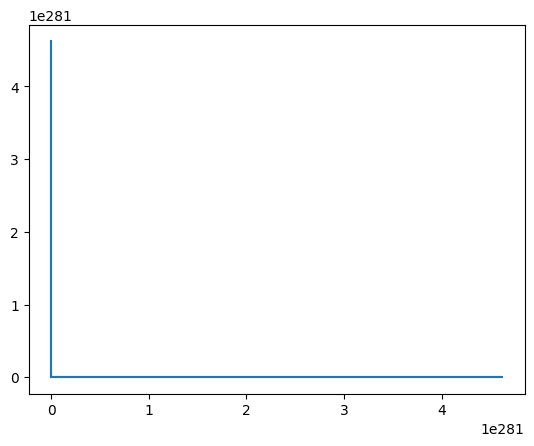

572th iteration, 762.9441874852264


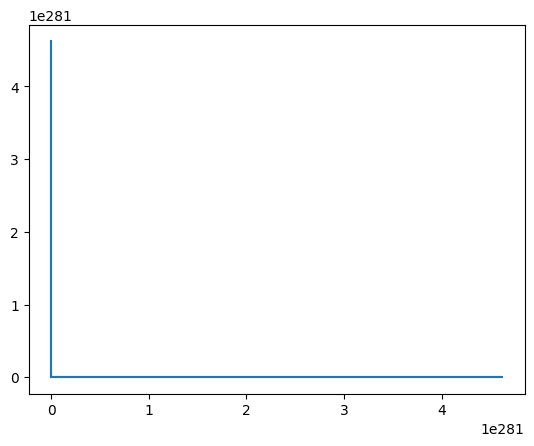

573th iteration, 762.9400860643082


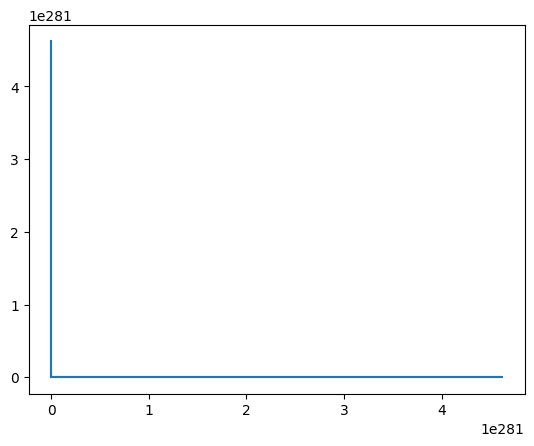

574th iteration, 762.935984680697


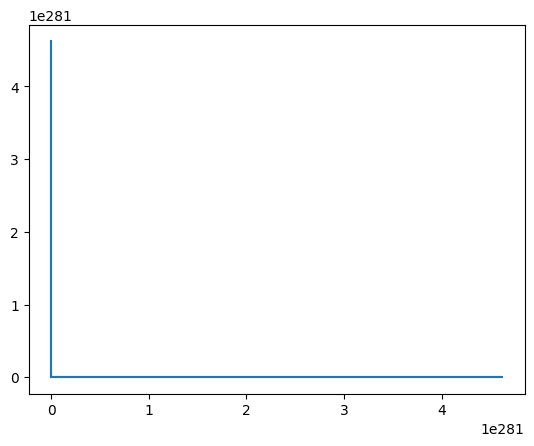

575th iteration, 762.9318833343914


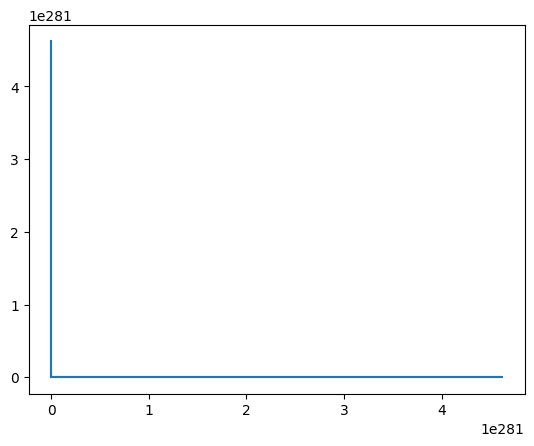

576th iteration, 762.927782025392


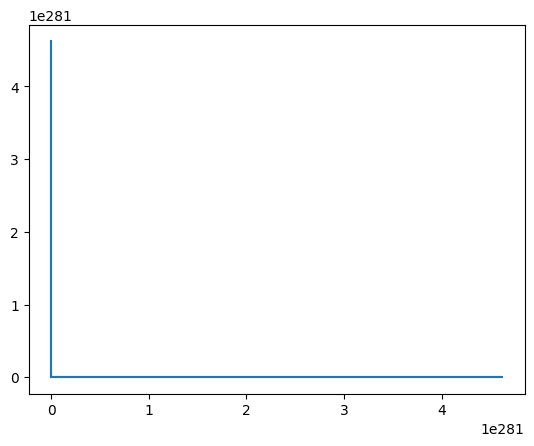

577th iteration, 762.9236807536982


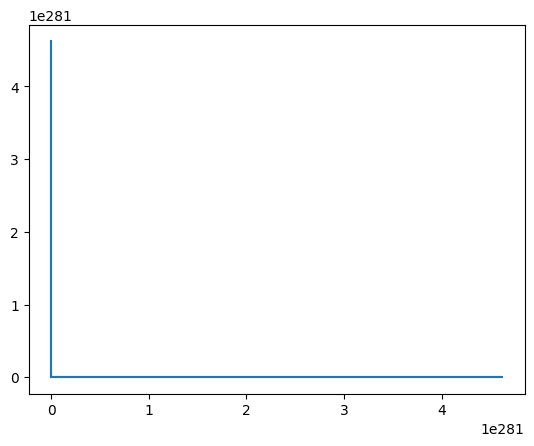

578th iteration, 762.9195795193095


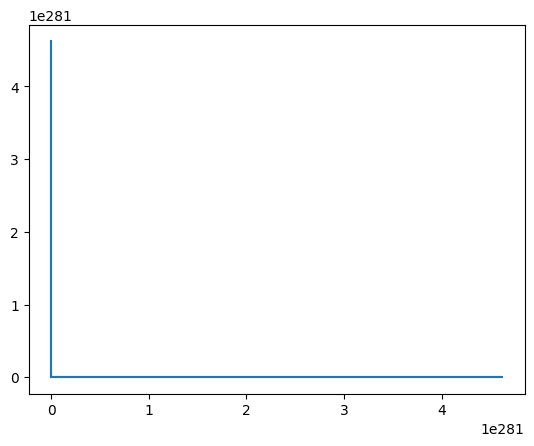

579th iteration, 762.9154783222257


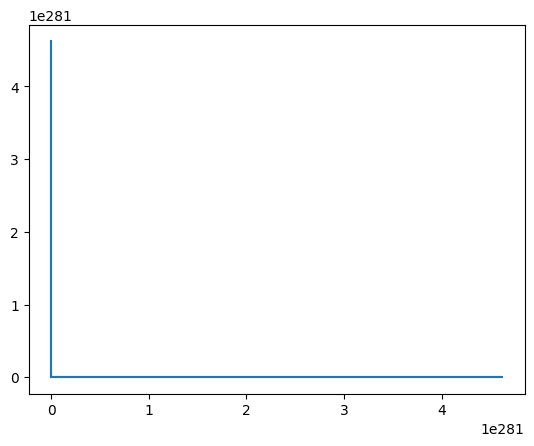

580th iteration, 762.911377162446


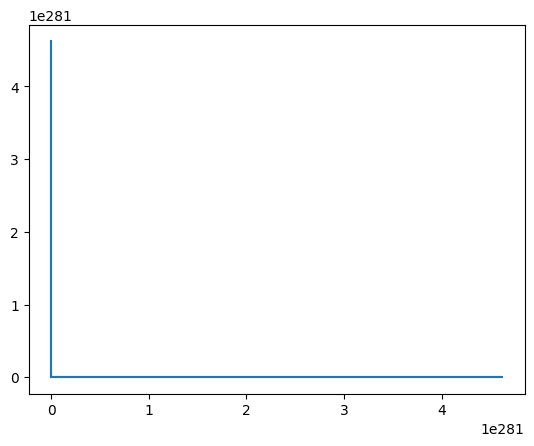

581th iteration, 762.9072760399706


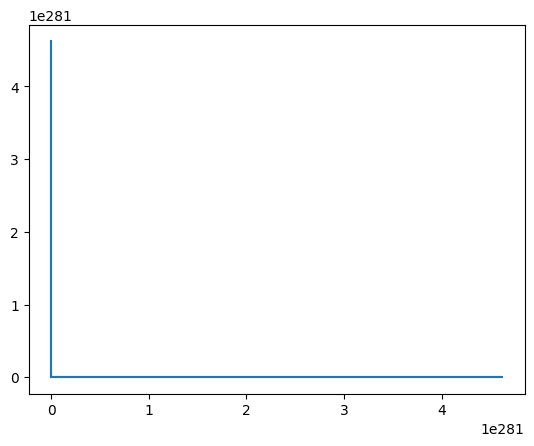

582th iteration, 762.9031749547988


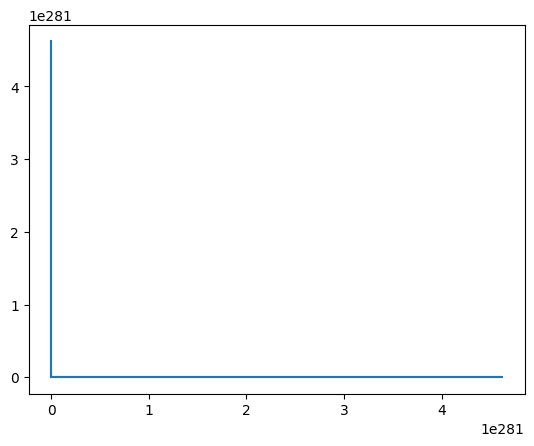

583th iteration, 762.8990739069302


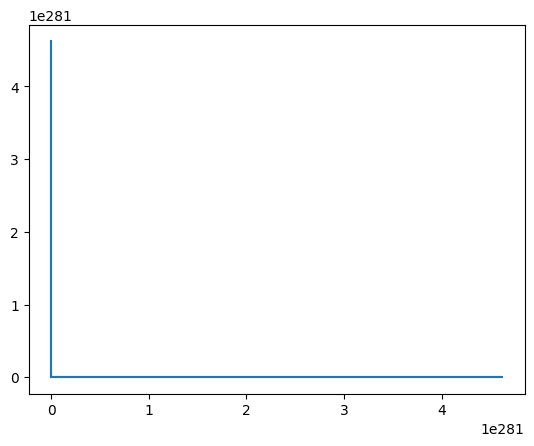

584th iteration, 762.894972896364


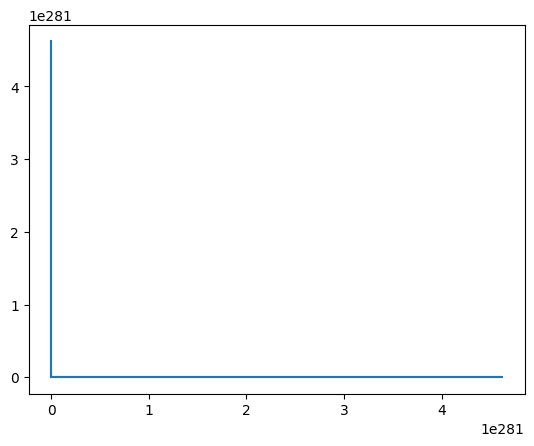

585th iteration, 762.8908719231007


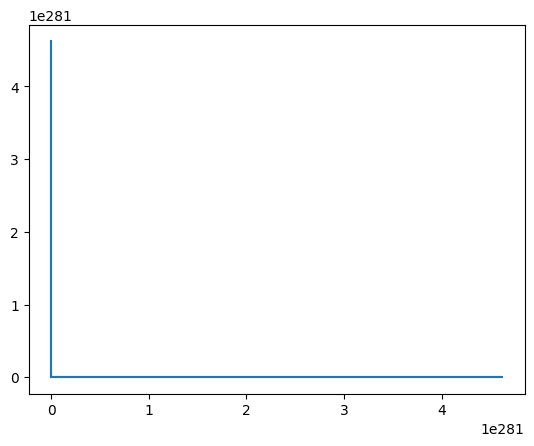

586th iteration, 762.8867709871394


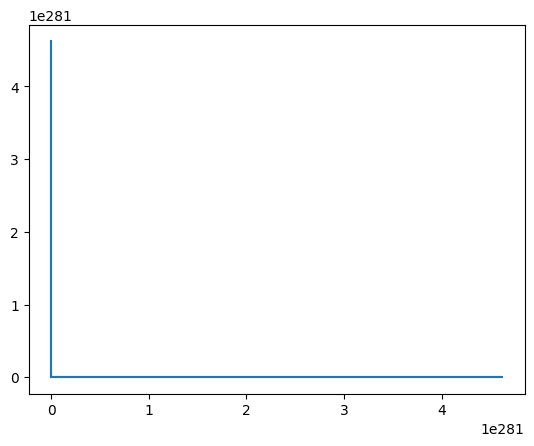

587th iteration, 762.8826700884798


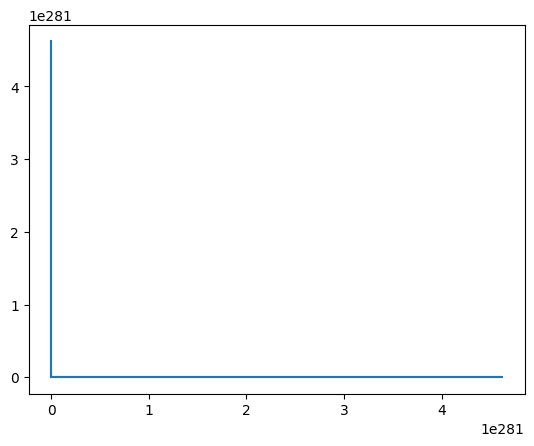

588th iteration, 762.8785692271216


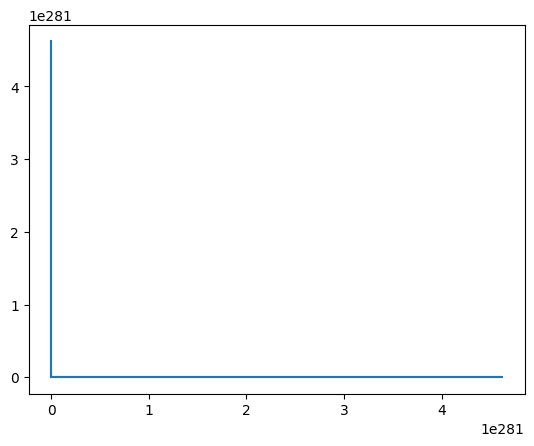

589th iteration, 762.8744684030645


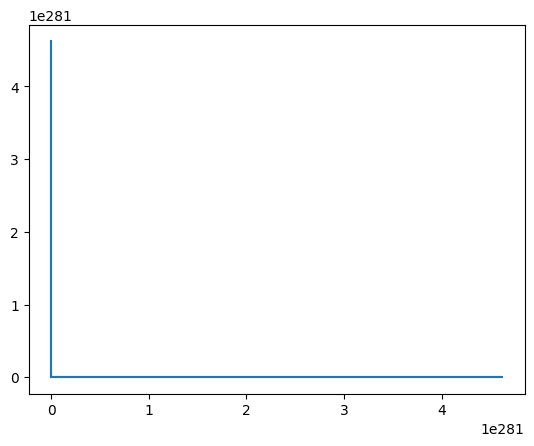

590th iteration, 762.8703676163078


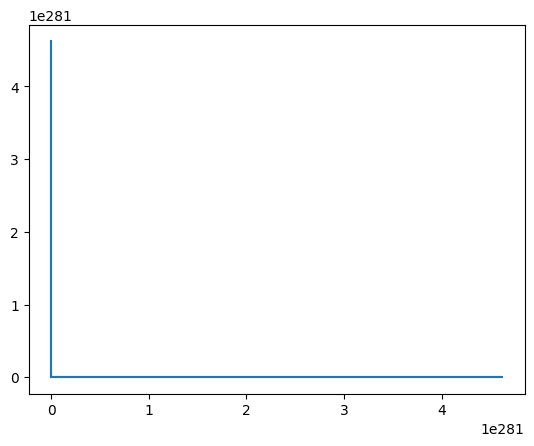

591th iteration, 762.8662668668513


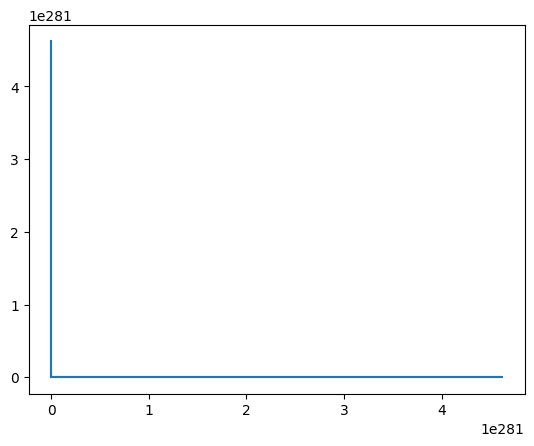

592th iteration, 762.8621661546945


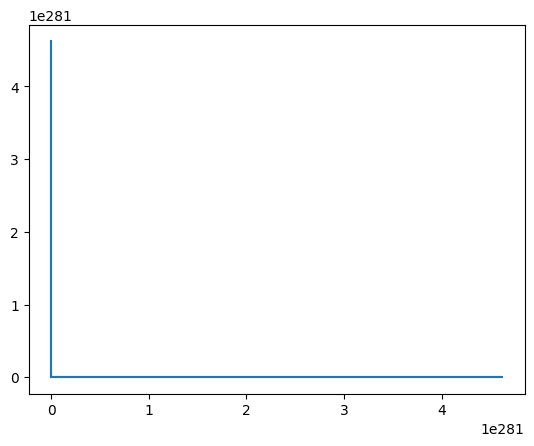

593th iteration, 762.8580654798375


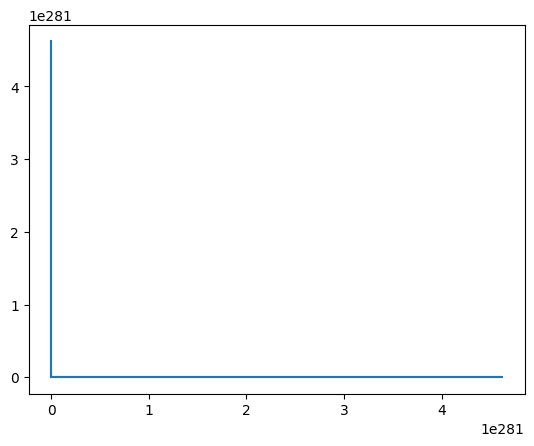

594th iteration, 762.8539648422792


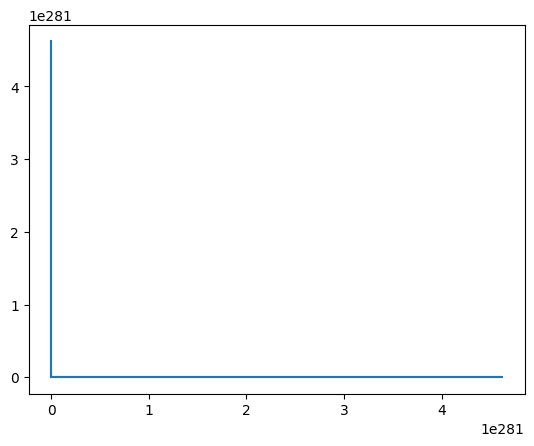

595th iteration, 762.8498642420196


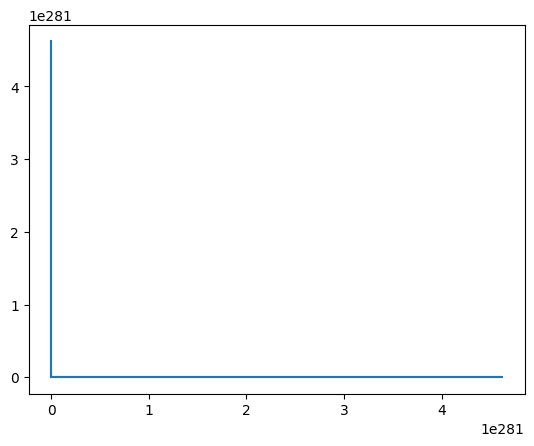

596th iteration, 762.8457636790588


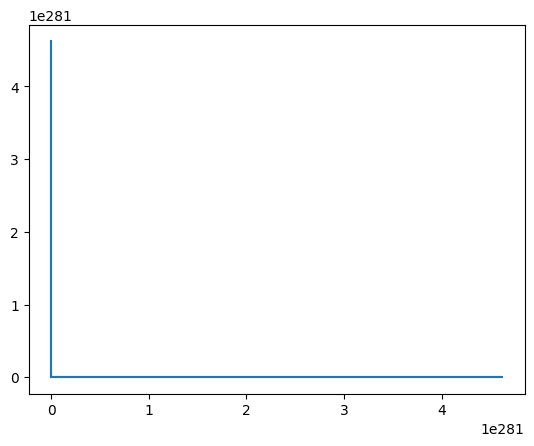

597th iteration, 762.8416631533958


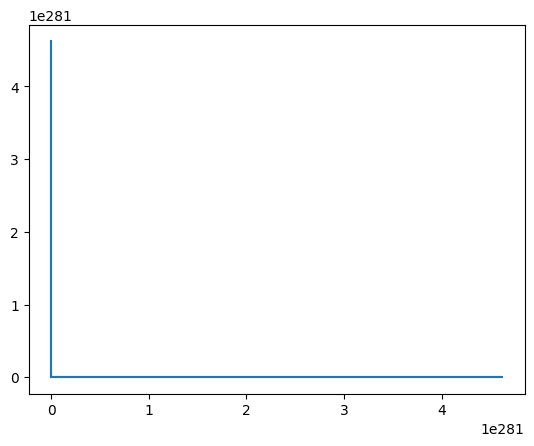

598th iteration, 762.8375626650297


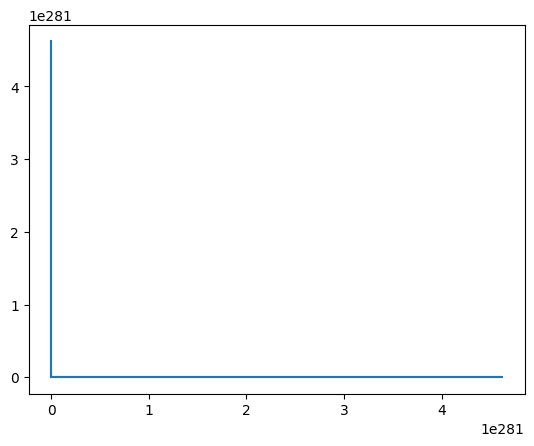

599th iteration, 762.8334622139614


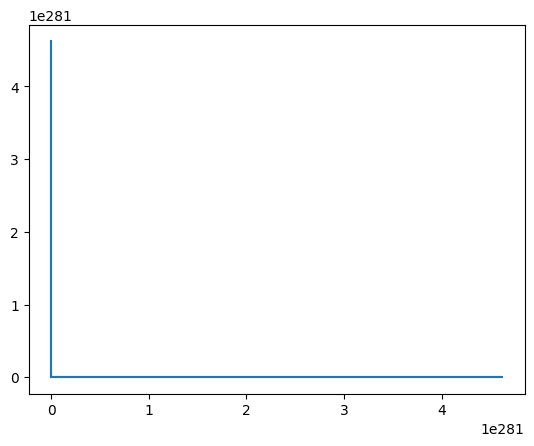

600th iteration, 762.8293618001894


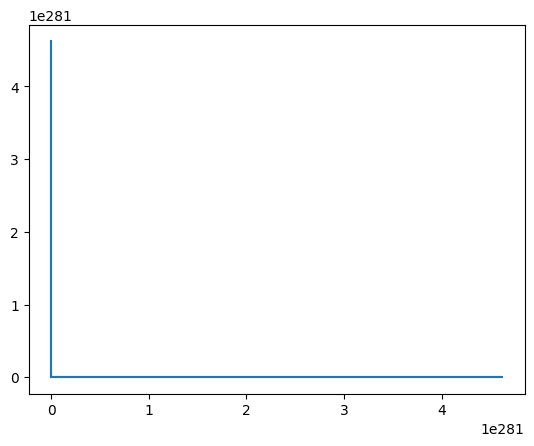

601th iteration, 762.8252614237143


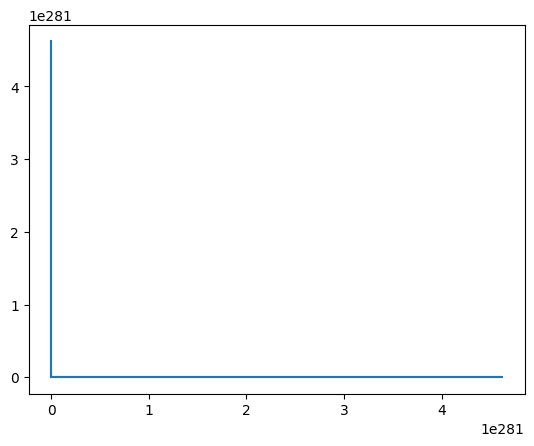

602th iteration, 762.821161084535


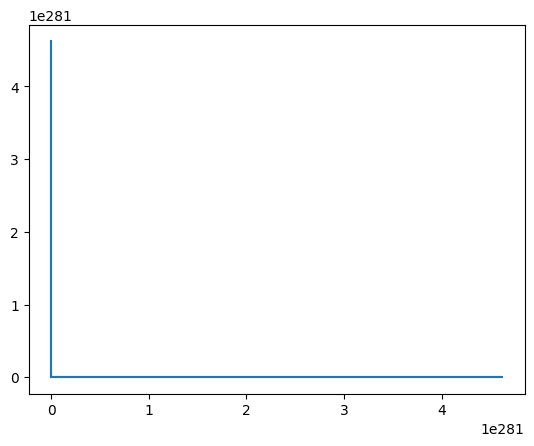

603th iteration, 762.8170607826517


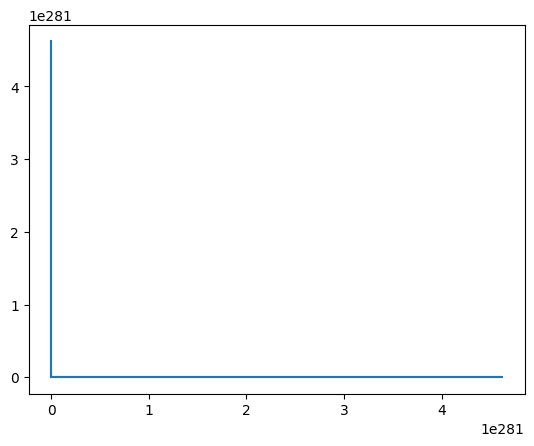

604th iteration, 762.8129605180634


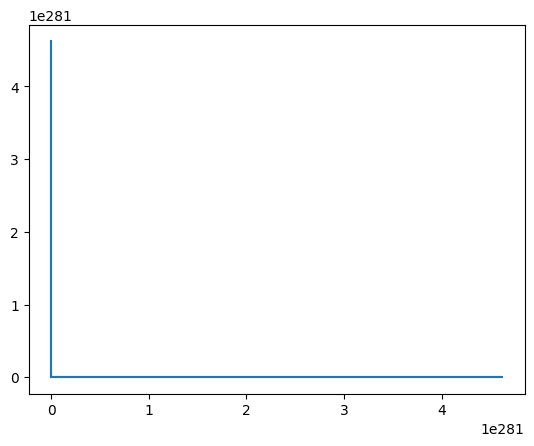

605th iteration, 762.8088602907699


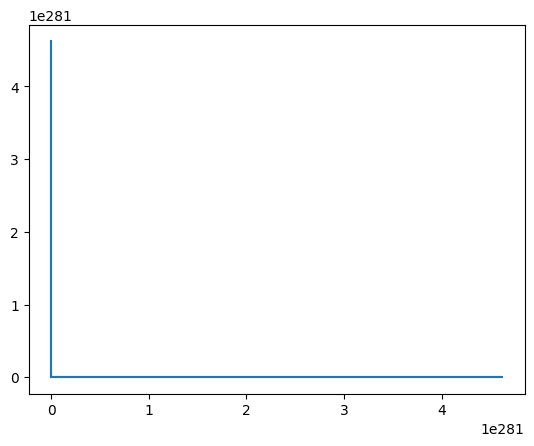

606th iteration, 762.8047601007709


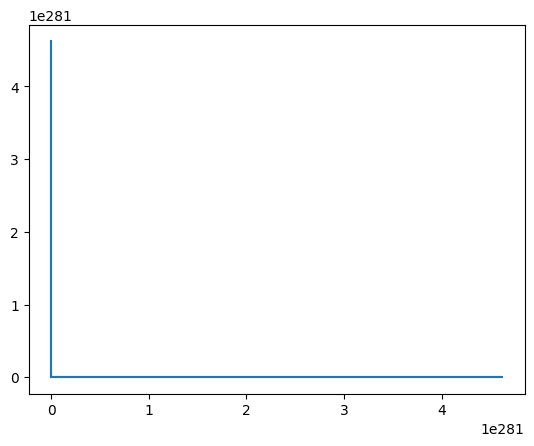

607th iteration, 762.8006599480663


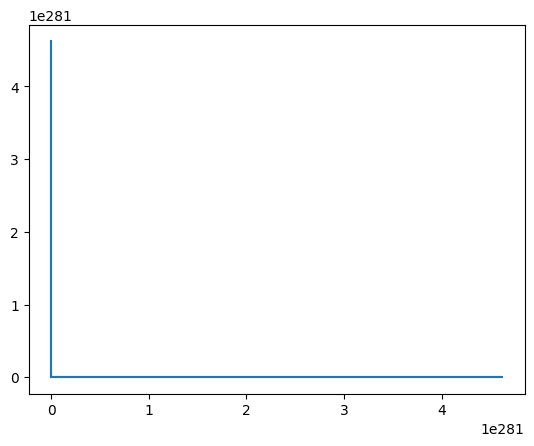

608th iteration, 762.7965598326551


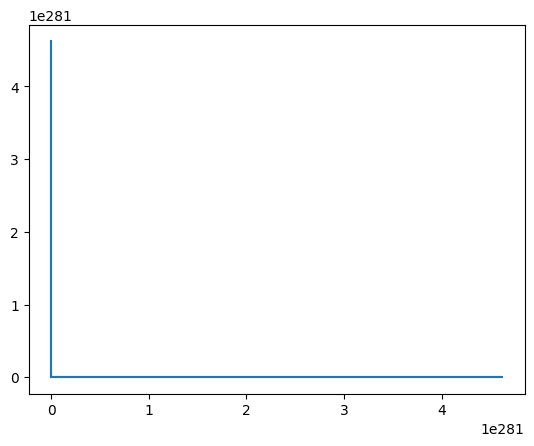

609th iteration, 762.7924597545375


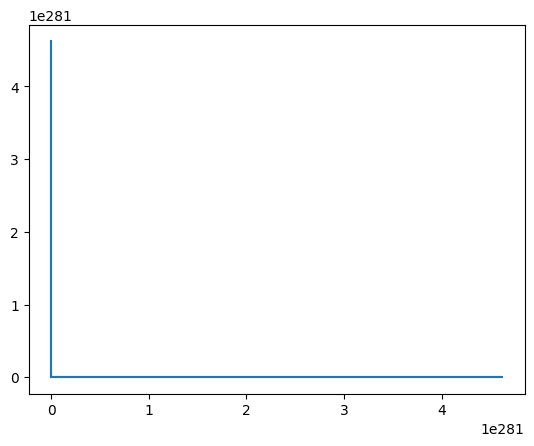

610th iteration, 762.788359713713


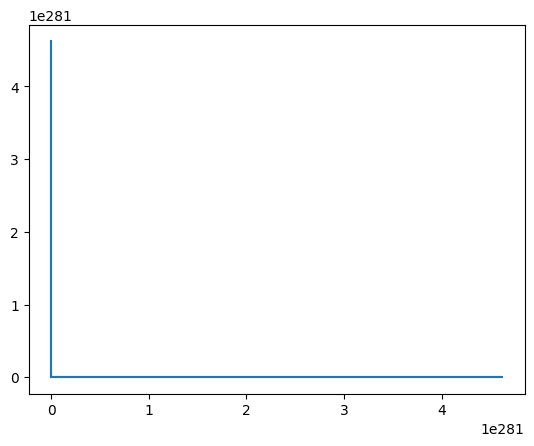

611th iteration, 762.7842597101812


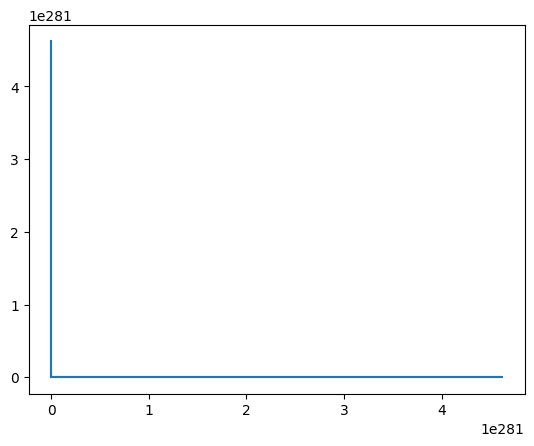

612th iteration, 762.7801597439413


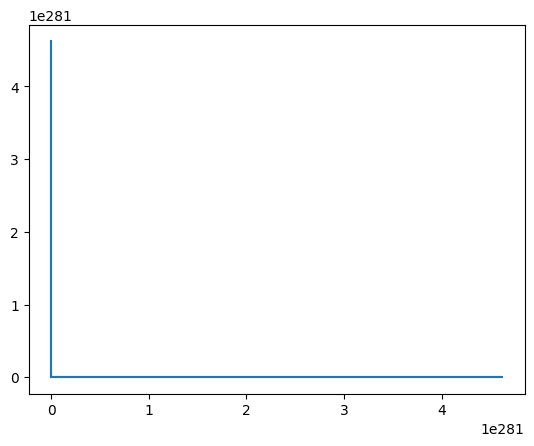

613th iteration, 762.7760598149936


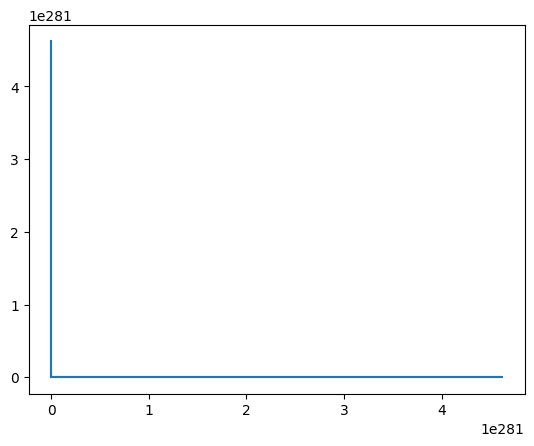

614th iteration, 762.771959923337


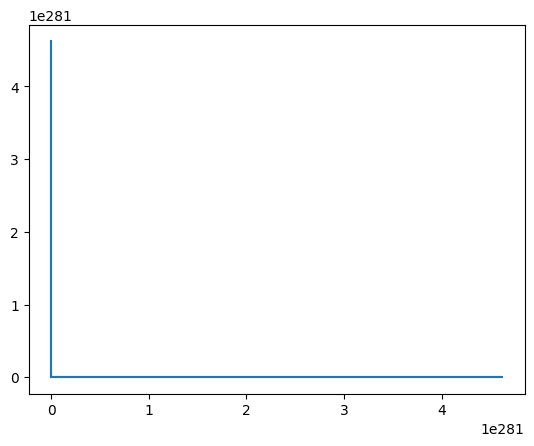

615th iteration, 762.7678600689717


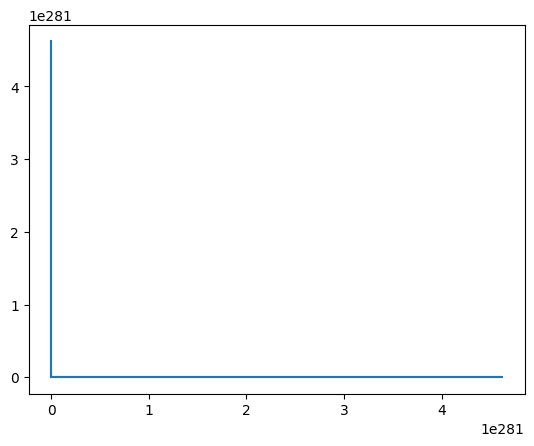

616th iteration, 762.7637602518973


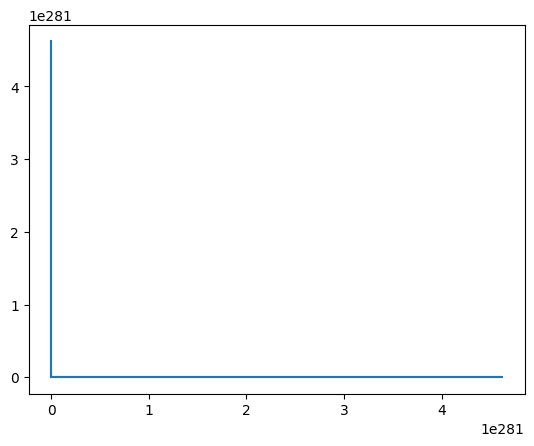

617th iteration, 762.7596604721128


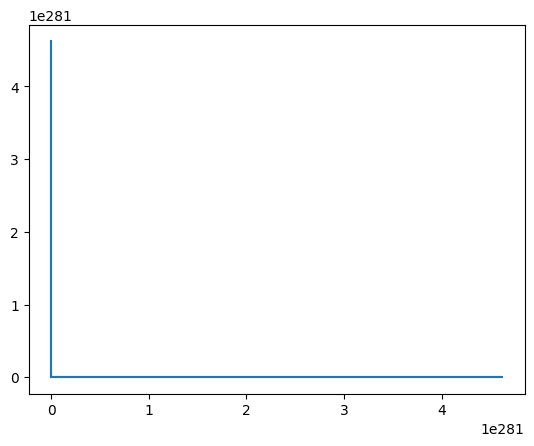

618th iteration, 762.7555607296187


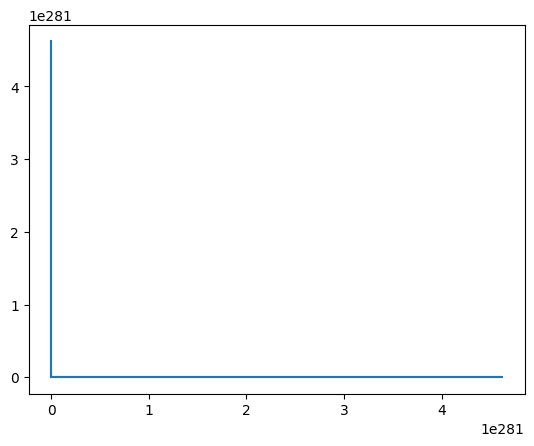

619th iteration, 762.7514610244141


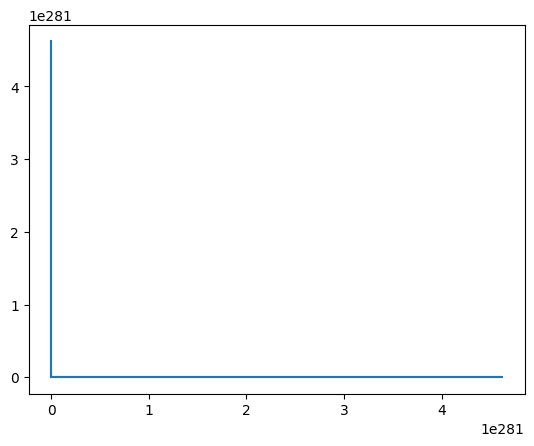

620th iteration, 762.7473613564987


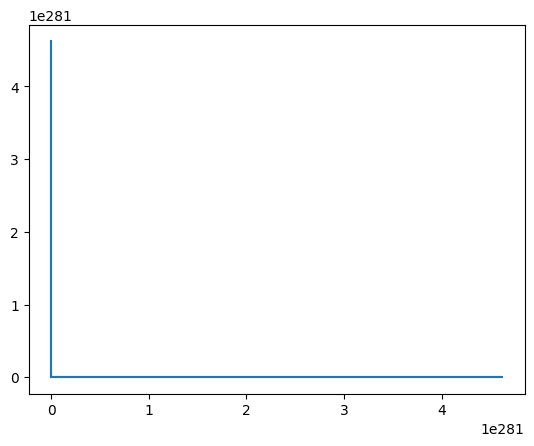

621th iteration, 762.7432617258718


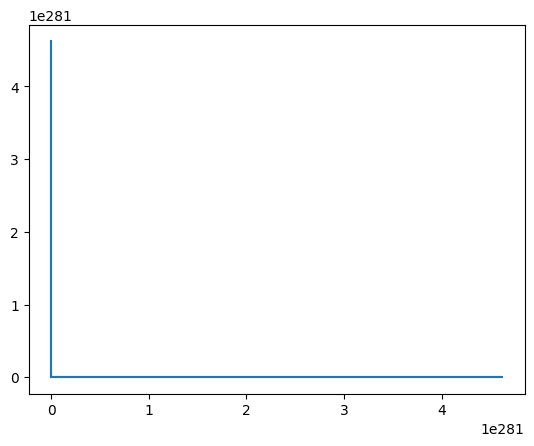

622th iteration, 762.7391621325334


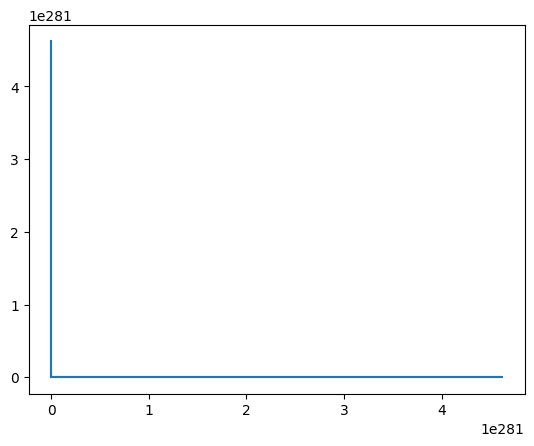

623th iteration, 762.7350625764831


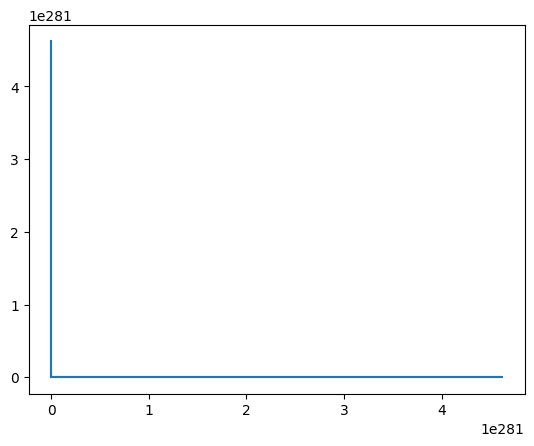

624th iteration, 762.7309630577204


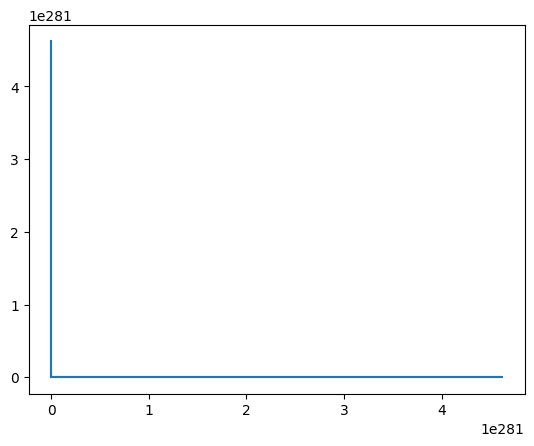

625th iteration, 762.7268635762449


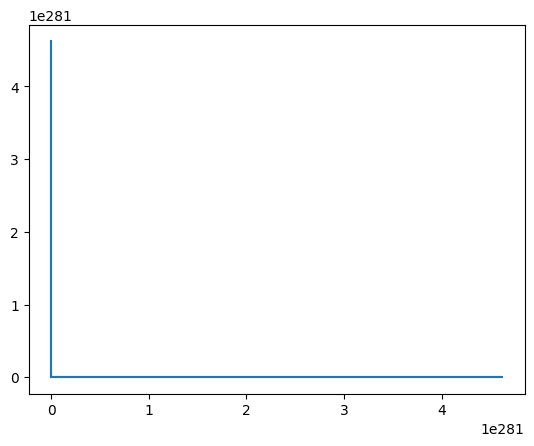

626th iteration, 762.7227641320568


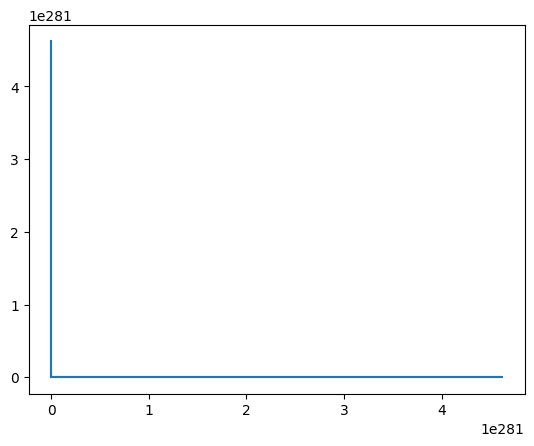

627th iteration, 762.7186647251549


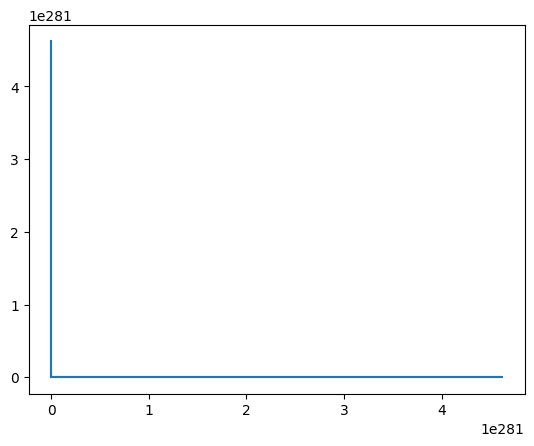

628th iteration, 762.714565355539


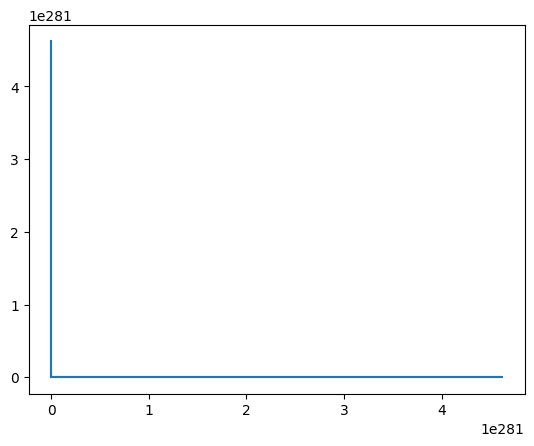

629th iteration, 762.710466023209


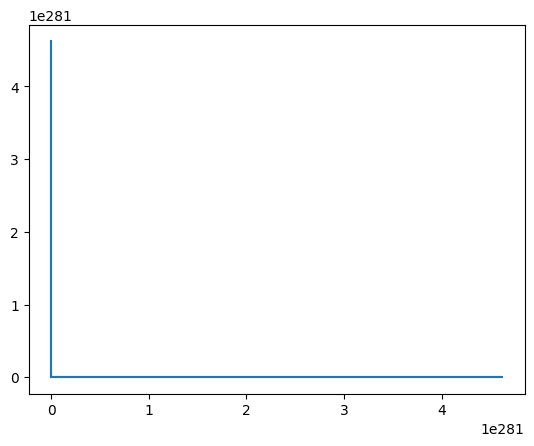

630th iteration, 762.7063667281645


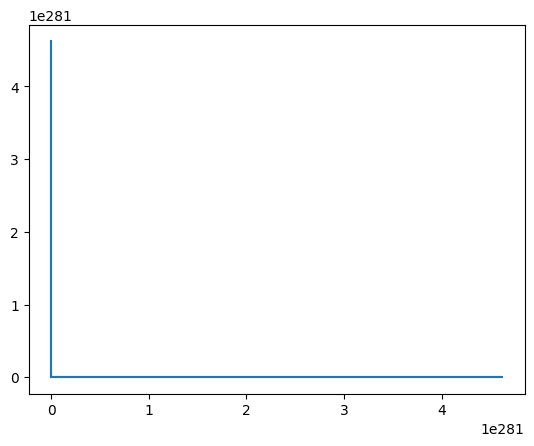

631th iteration, 762.7022674704053


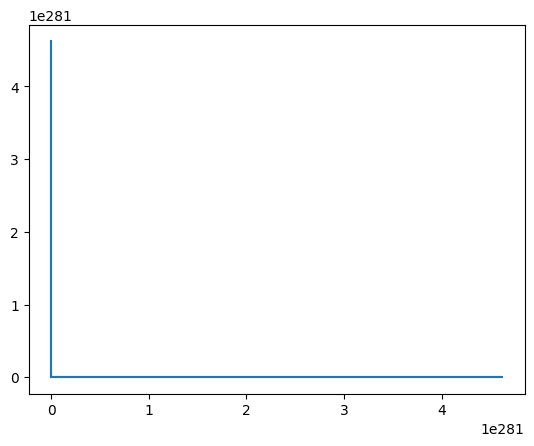

632th iteration, 762.6981682499305


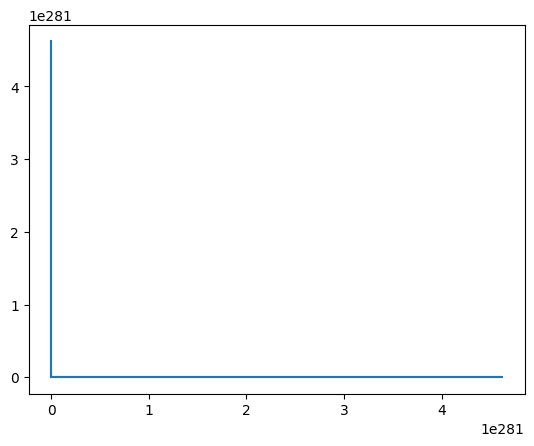

633th iteration, 762.69406906674


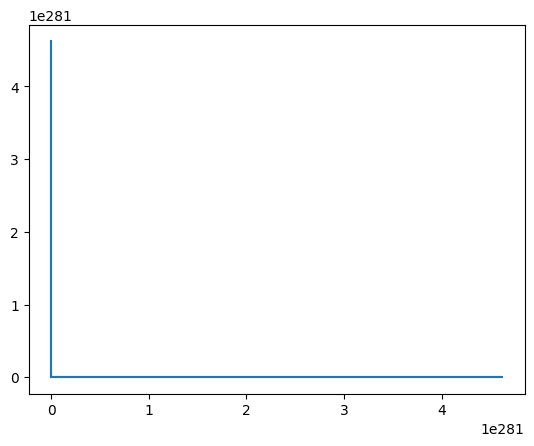

634th iteration, 762.6899699208332


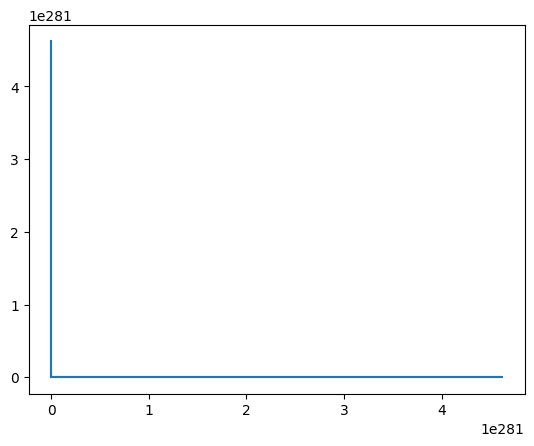

635th iteration, 762.6858708122103


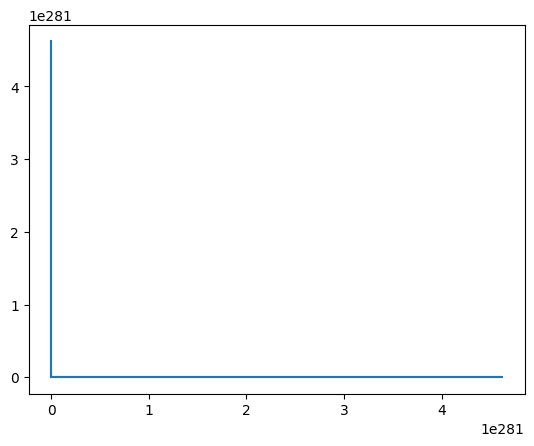

636th iteration, 762.6817717408701


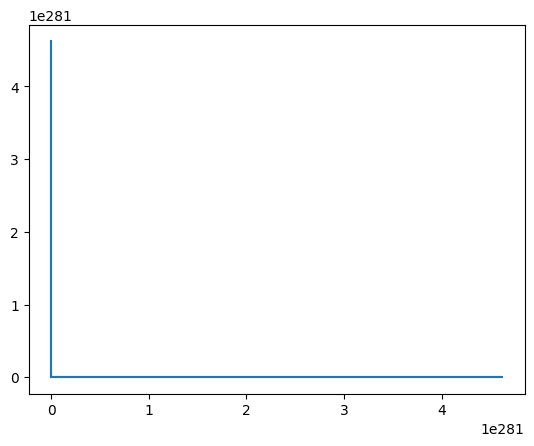

637th iteration, 762.677672706813


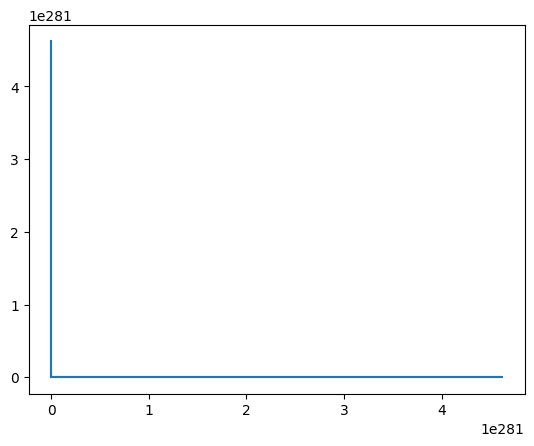

638th iteration, 762.6735737100386


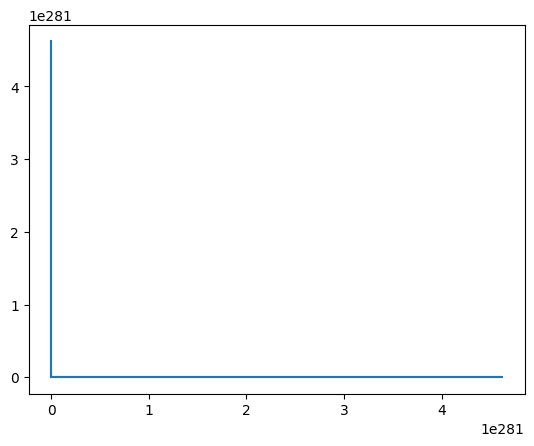

639th iteration, 762.6694747505455


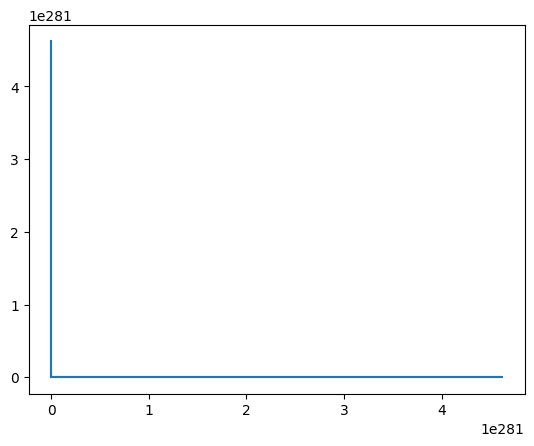

640th iteration, 762.6653758283344


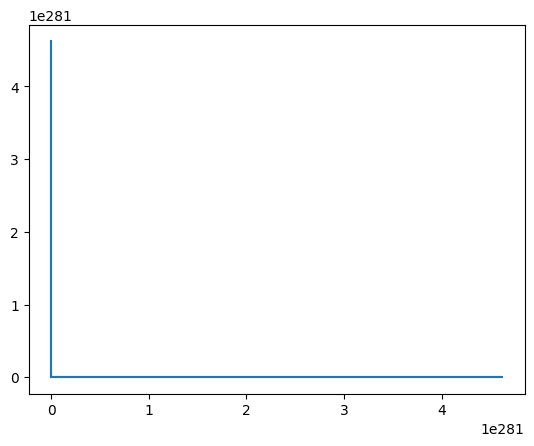

641th iteration, 762.6612769434041


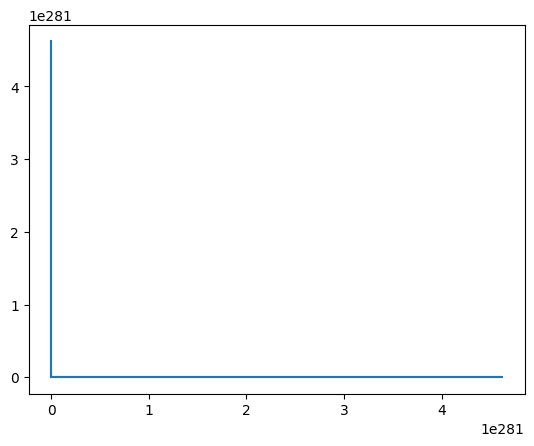

642th iteration, 762.6571780957552


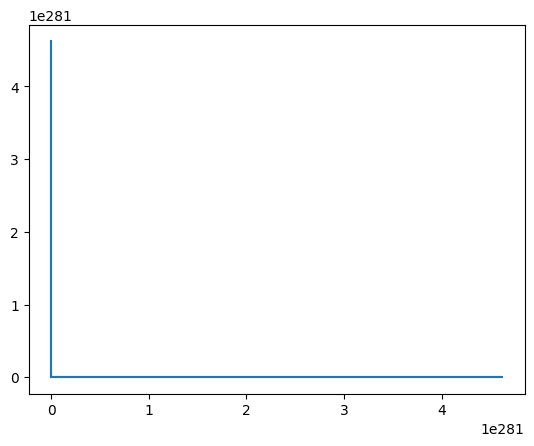

643th iteration, 762.6530792853866


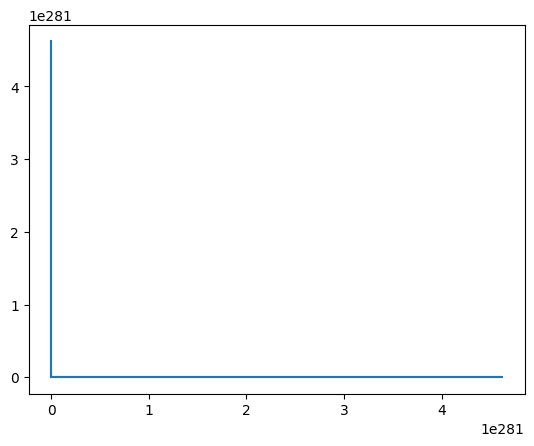

644th iteration, 762.6489805122978


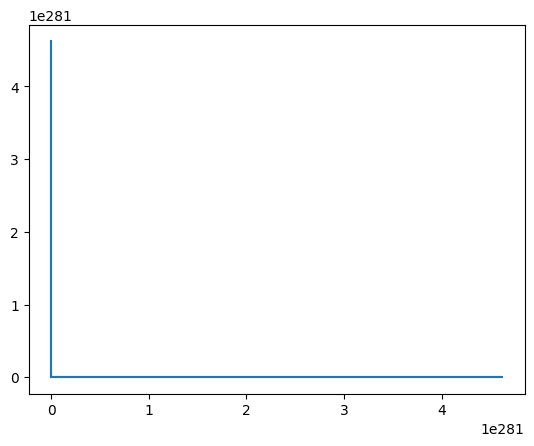

645th iteration, 762.6448817764891


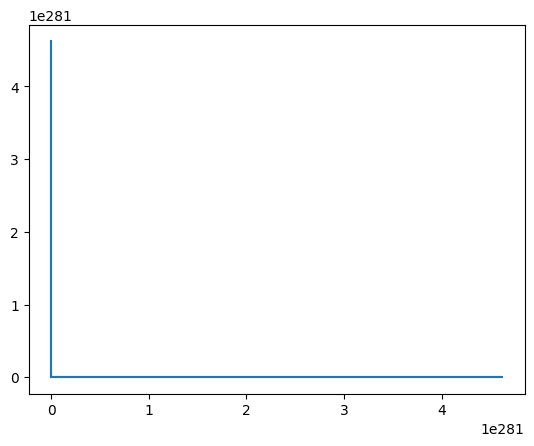

646th iteration, 762.6407830779594


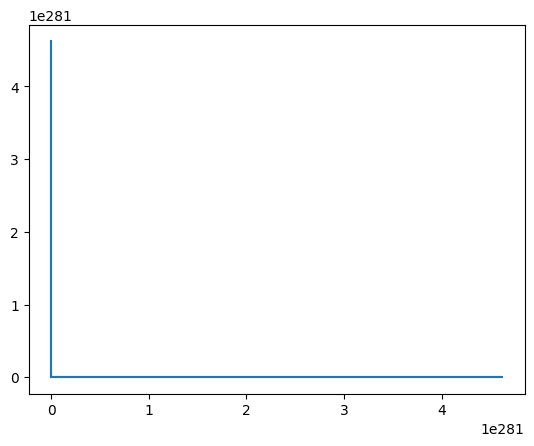

647th iteration, 762.6366844167088


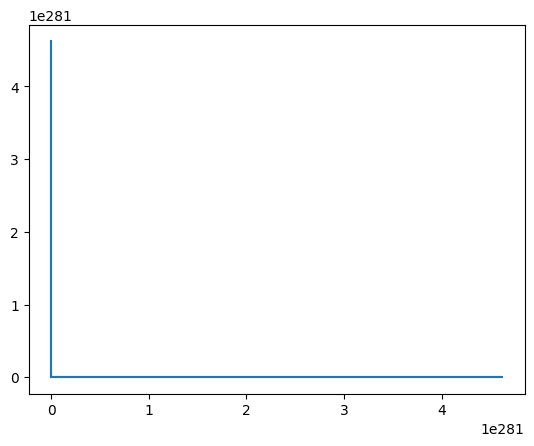

648th iteration, 762.6325857927367


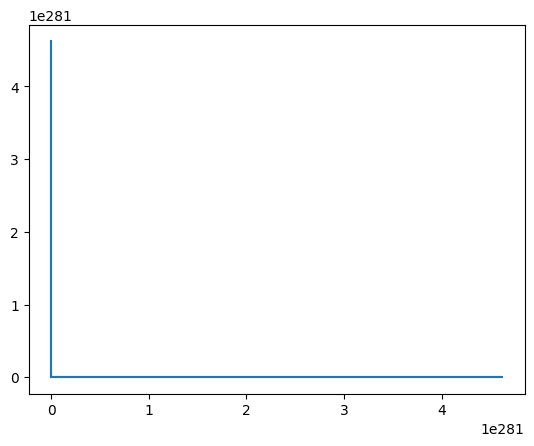

649th iteration, 762.6284872060429


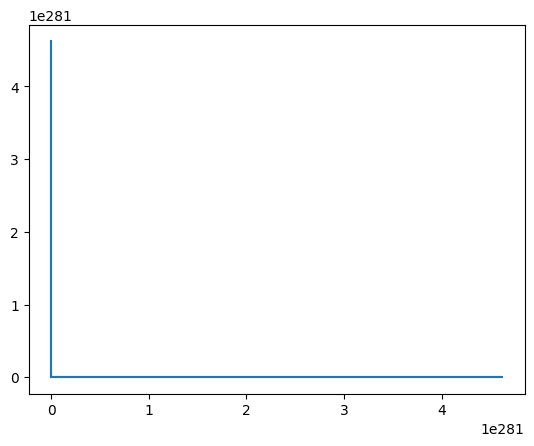

650th iteration, 762.6243886566273


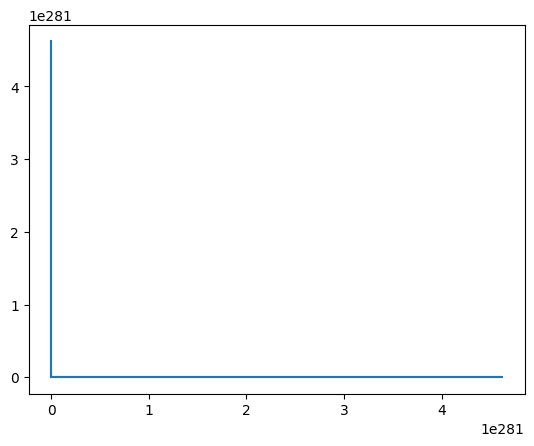

651th iteration, 762.620290144489


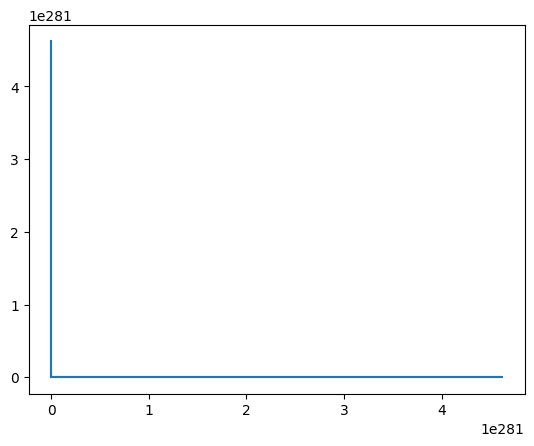

652th iteration, 762.6161916696277


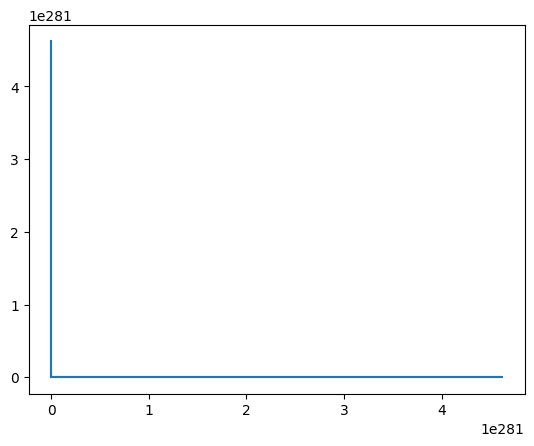

653th iteration, 762.6120932320433


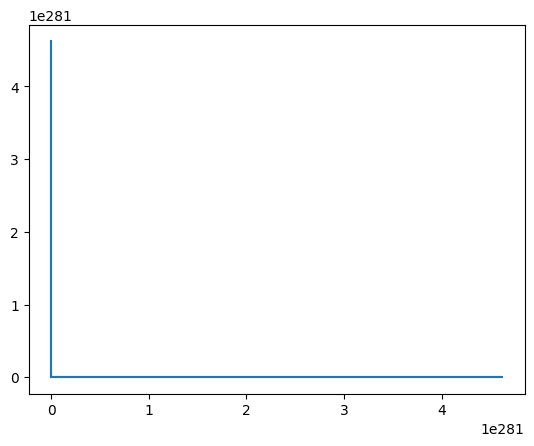

654th iteration, 762.6079948317348


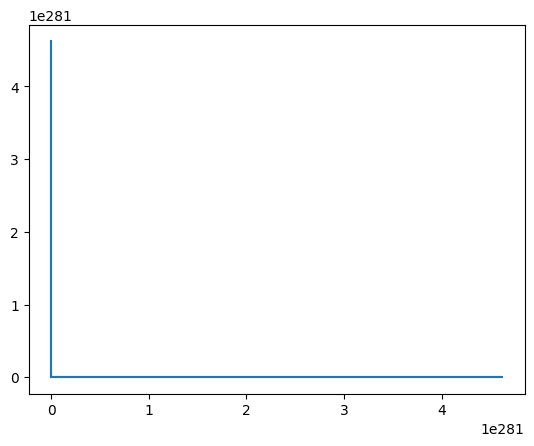

655th iteration, 762.6038964687025


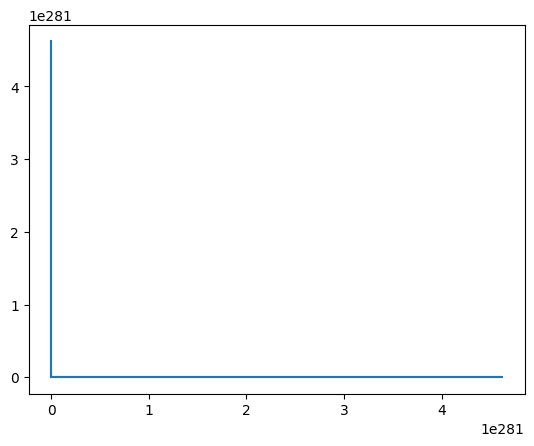

656th iteration, 762.5997981429457


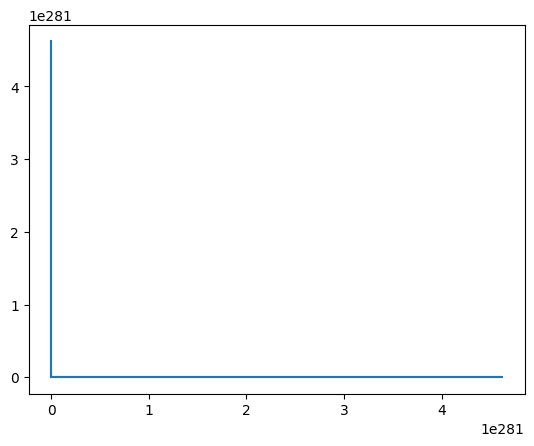

657th iteration, 762.595699854464


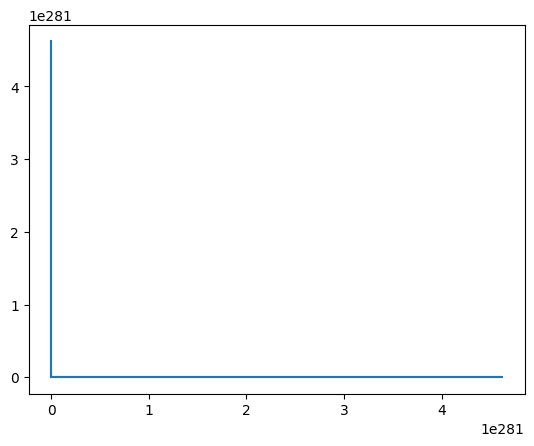

658th iteration, 762.5916016032575


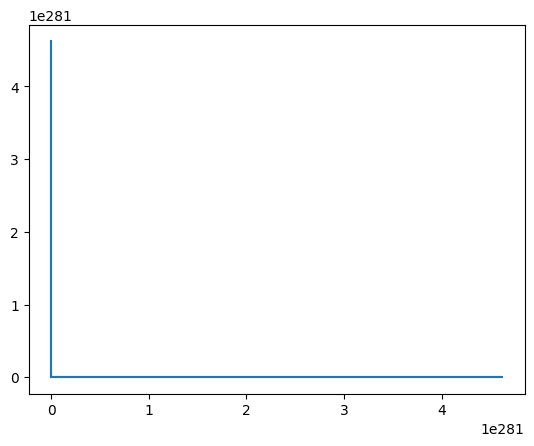

659th iteration, 762.587503389325


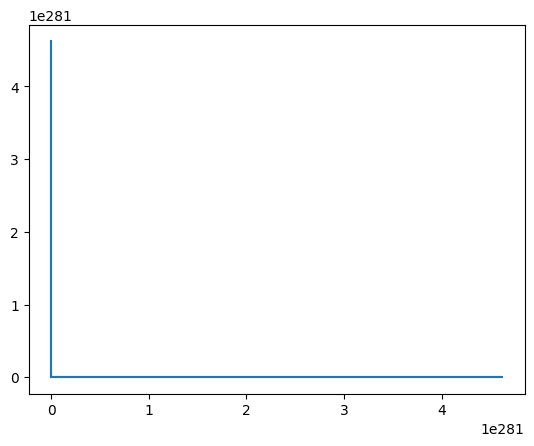

660th iteration, 762.5834052126668


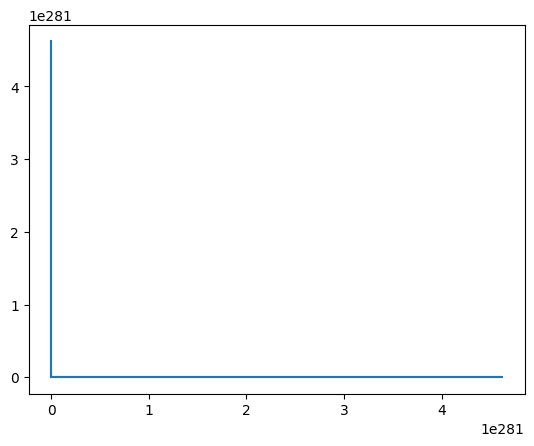

661th iteration, 762.579307073282


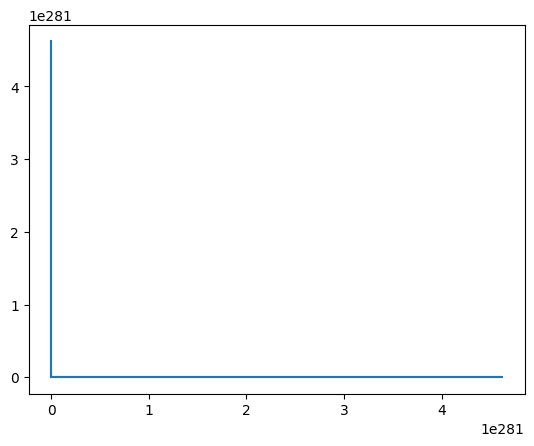

662th iteration, 762.5752089711708


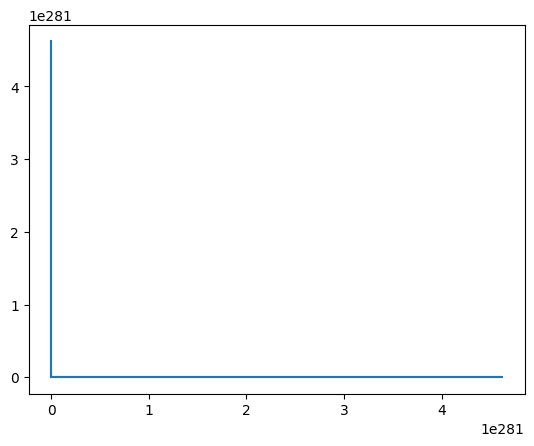

663th iteration, 762.5711109063323


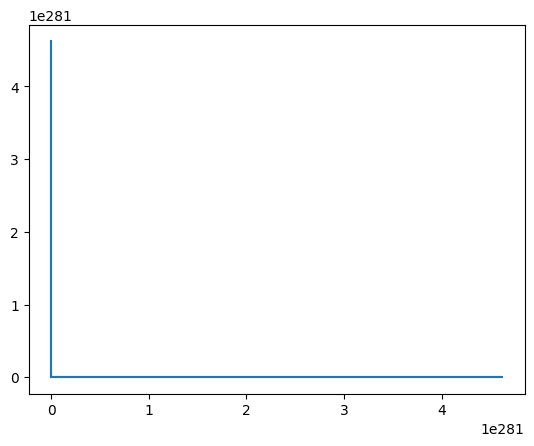

664th iteration, 762.5670128787664


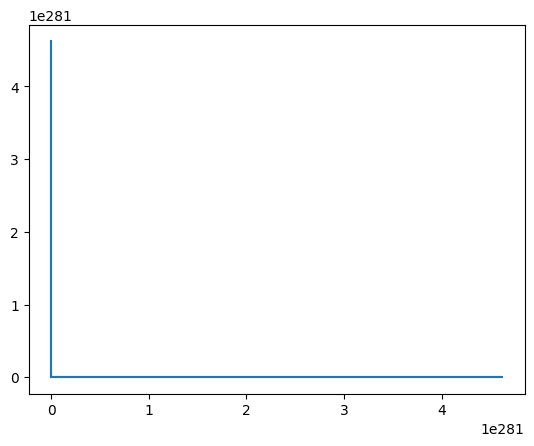

665th iteration, 762.5629148884724


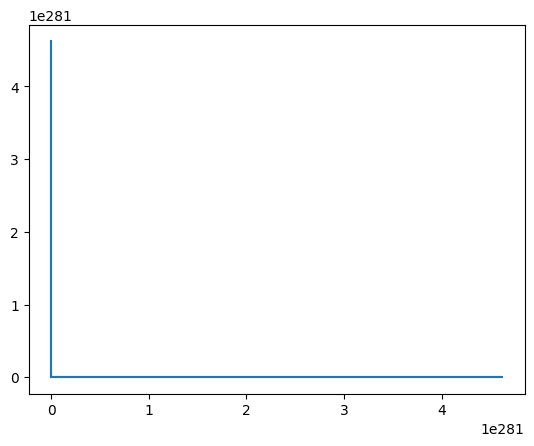

666th iteration, 762.5588169354503


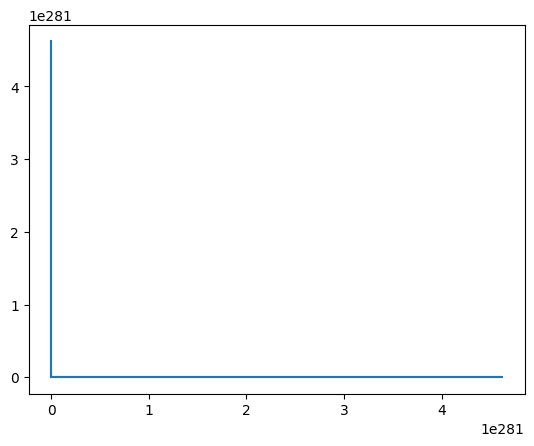

667th iteration, 762.5547190196997


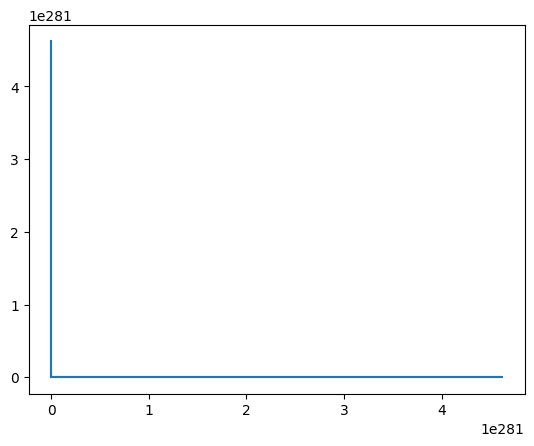

668th iteration, 762.5506211412196


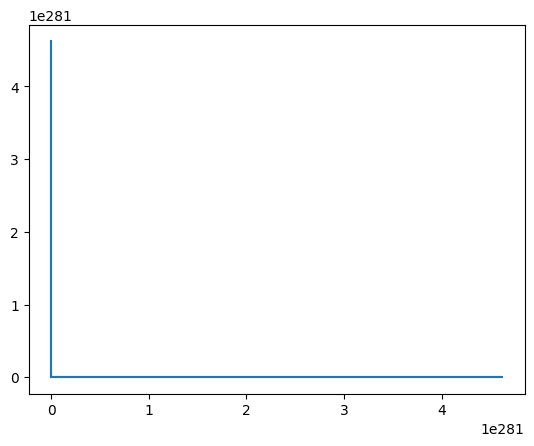

669th iteration, 762.5465233000107


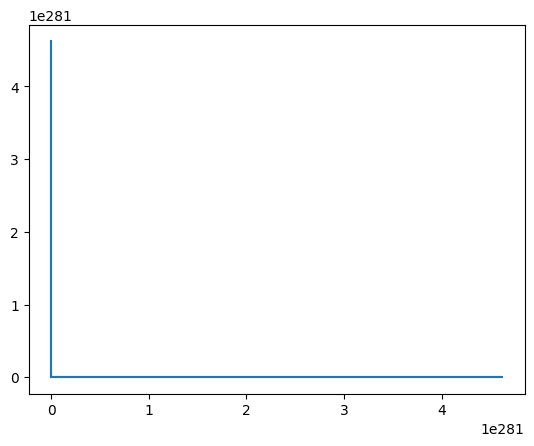

670th iteration, 762.5424254960717


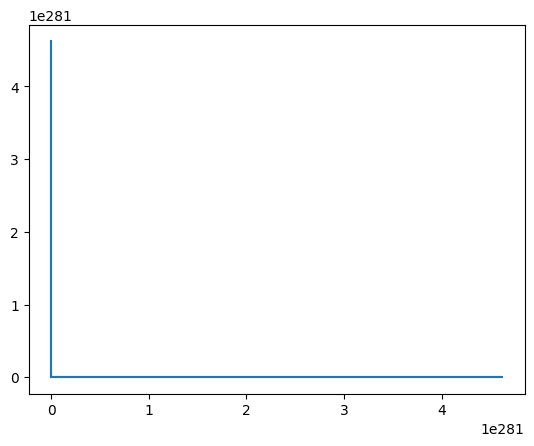

671th iteration, 762.5383277294028


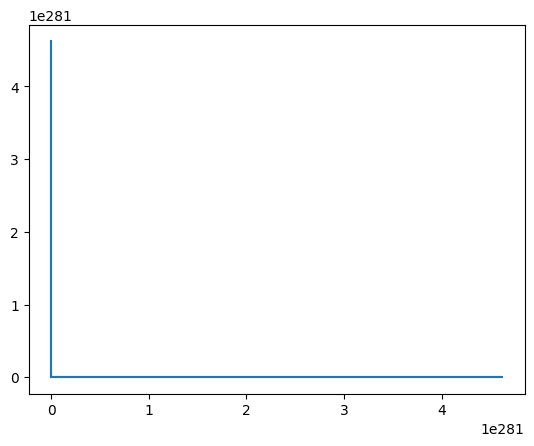

672th iteration, 762.5342300000034


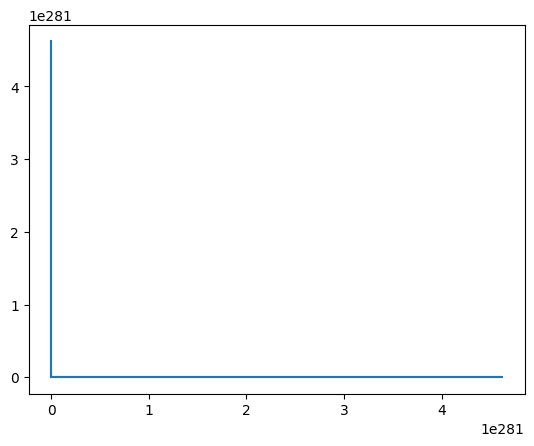

673th iteration, 762.5301323078729


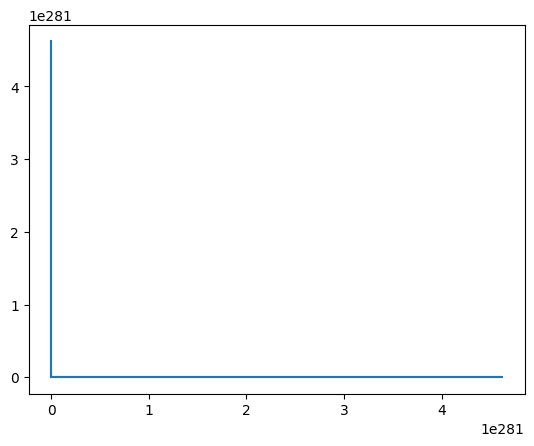

674th iteration, 762.5260346530115


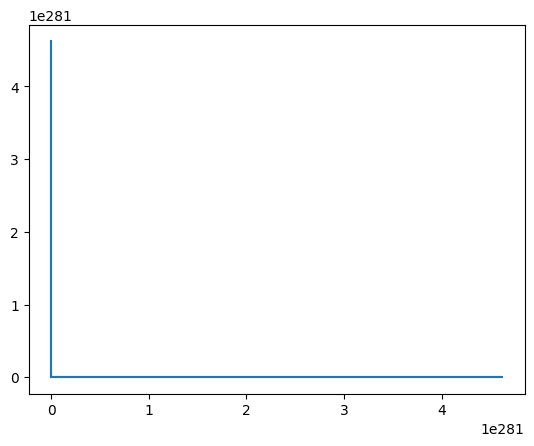

675th iteration, 762.5219370354183


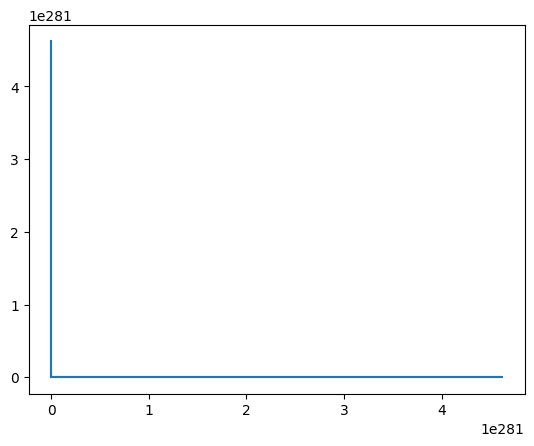

676th iteration, 762.5178394550933


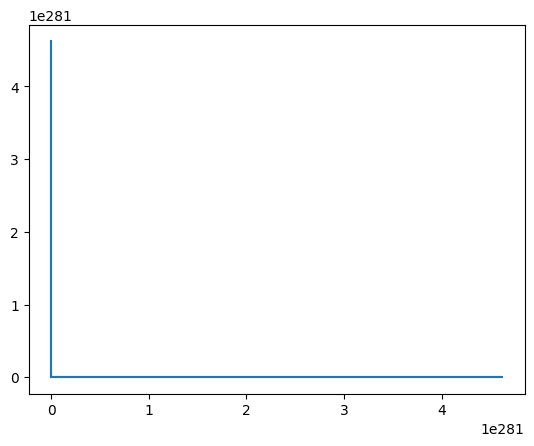

677th iteration, 762.5137419120354


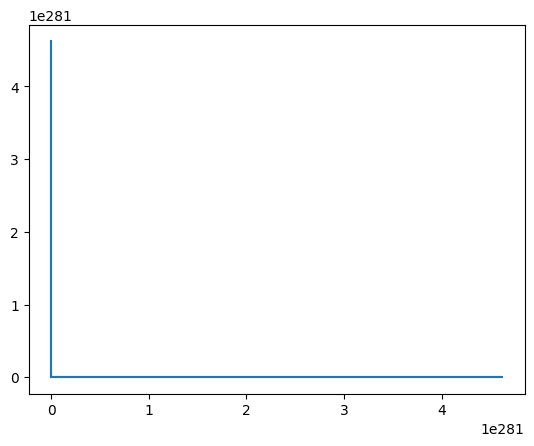

678th iteration, 762.5096444062449


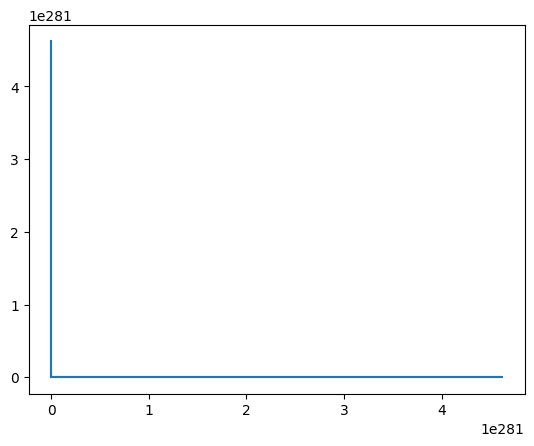

679th iteration, 762.5055469377213


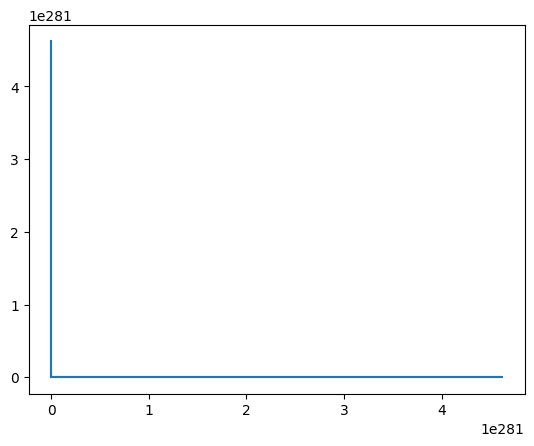

680th iteration, 762.501449506464


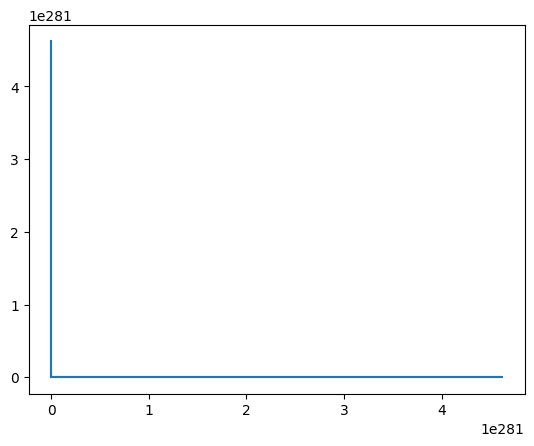

681th iteration, 762.4973521124731


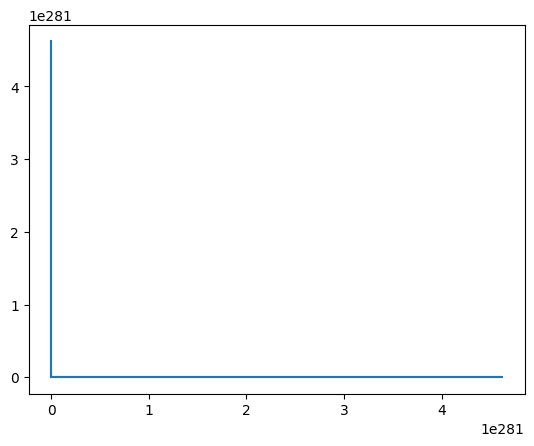

682th iteration, 762.493254755748


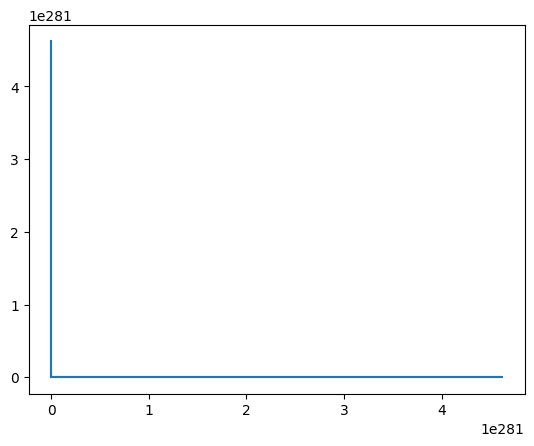

683th iteration, 762.4891574362879


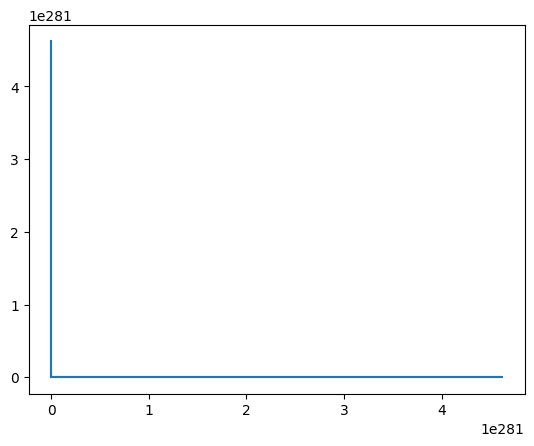

684th iteration, 762.4850601540927


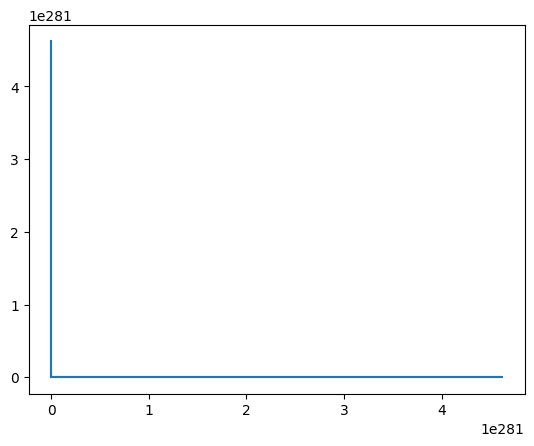

685th iteration, 762.4809629091623


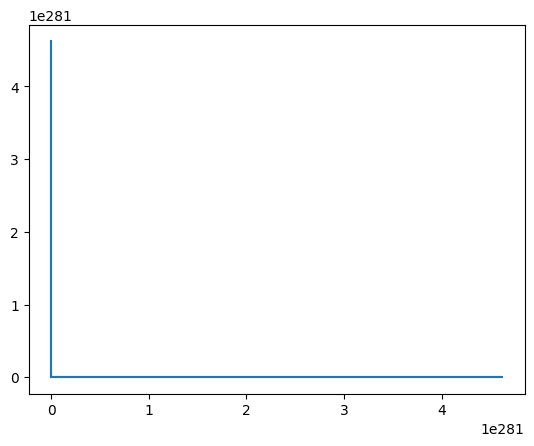

686th iteration, 762.476865701496


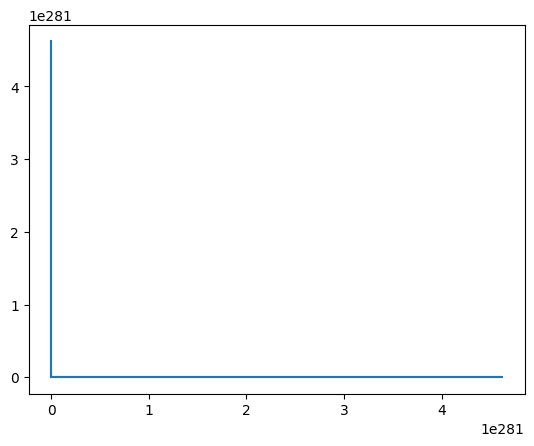

687th iteration, 762.4727685310937


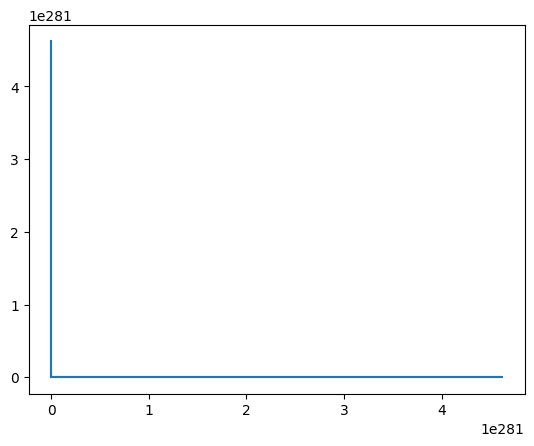

688th iteration, 762.4686713979548


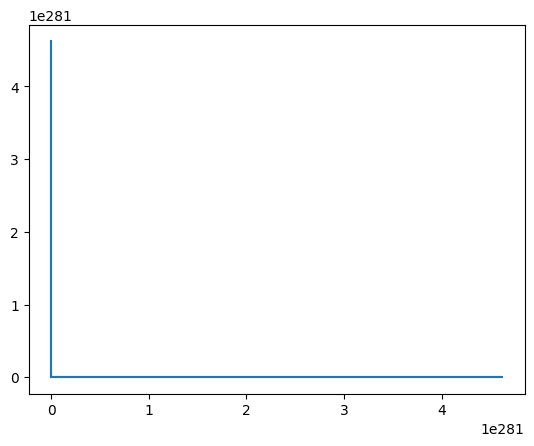

689th iteration, 762.4645743020789


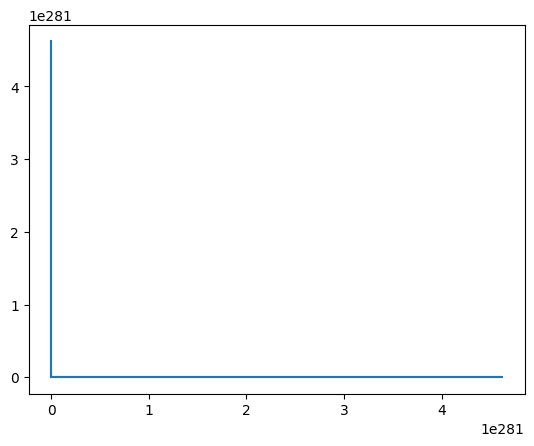

690th iteration, 762.4604772434658


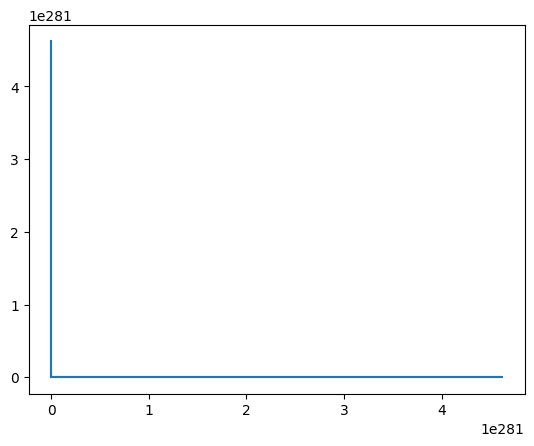

691th iteration, 762.456380222115


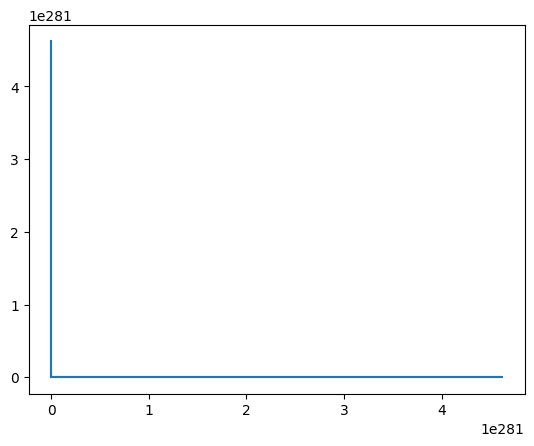

692th iteration, 762.452283238026


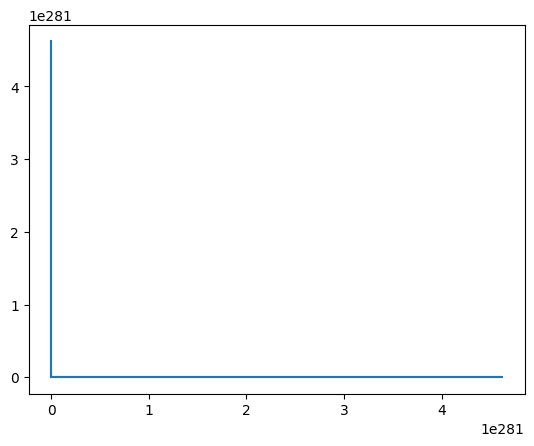

693th iteration, 762.4481862911982


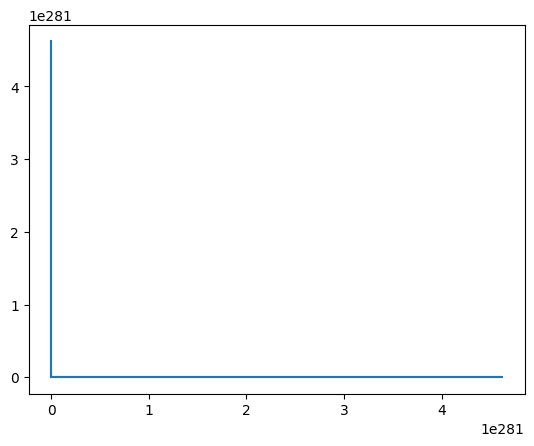

694th iteration, 762.4440893816324


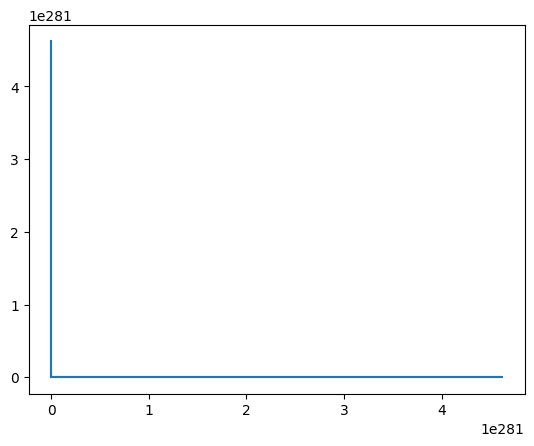

695th iteration, 762.4399925093267


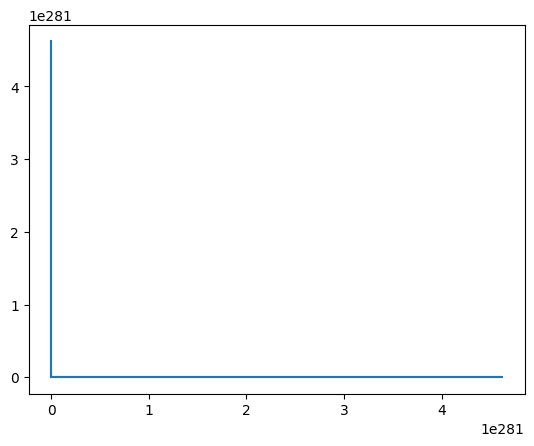

696th iteration, 762.4358956742817


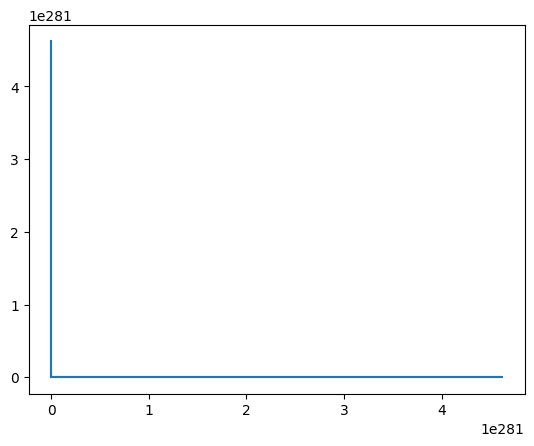

697th iteration, 762.4317988764964


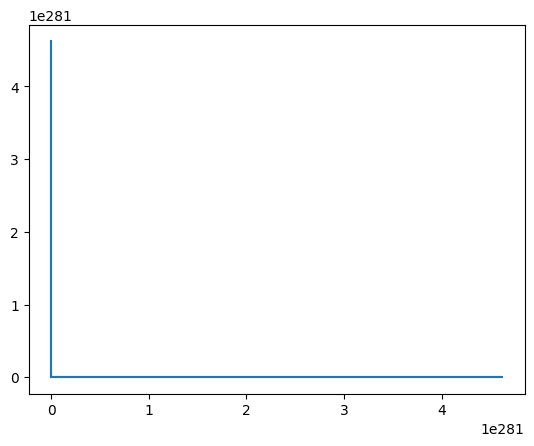

698th iteration, 762.4277021159713


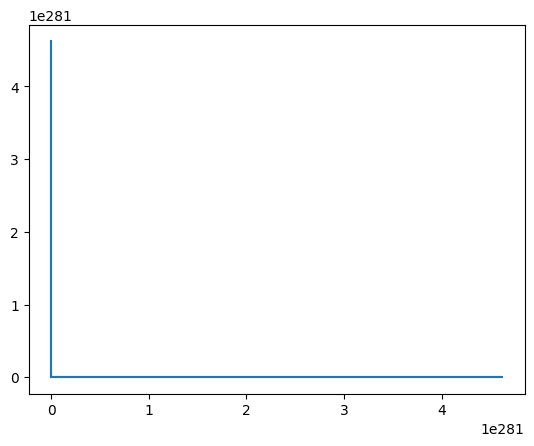

699th iteration, 762.4236053927054


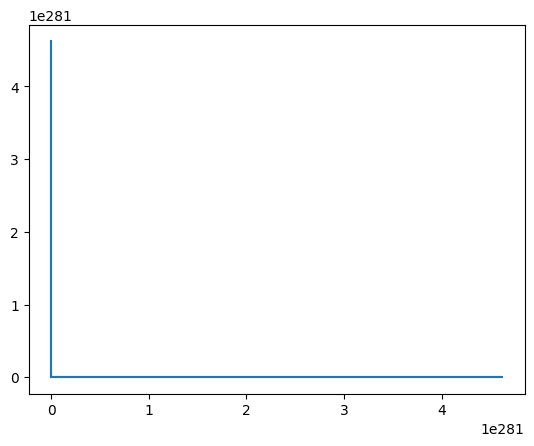

700th iteration, 762.419508706698


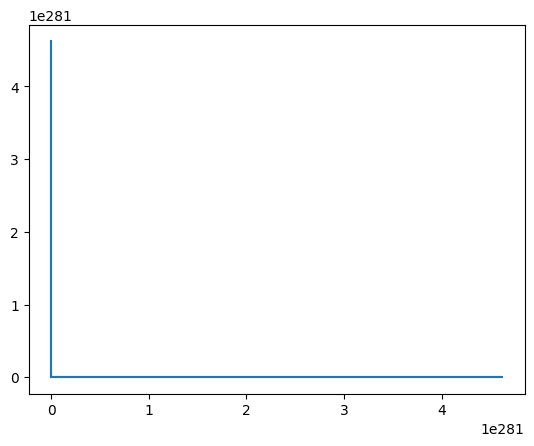

701th iteration, 762.4154120579495


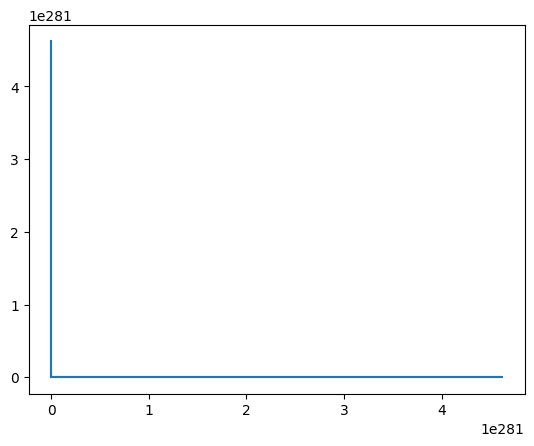

702th iteration, 762.411315446459


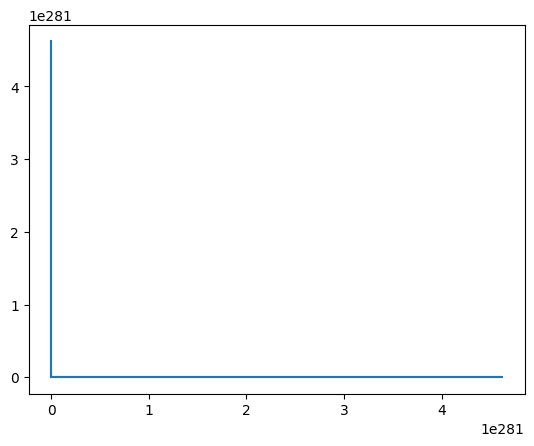

703th iteration, 762.407218872226


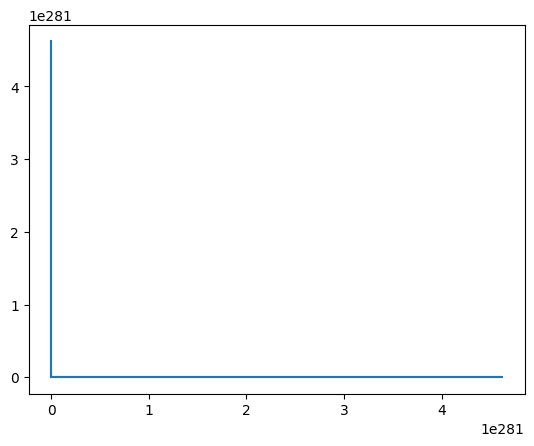

704th iteration, 762.4031223352506


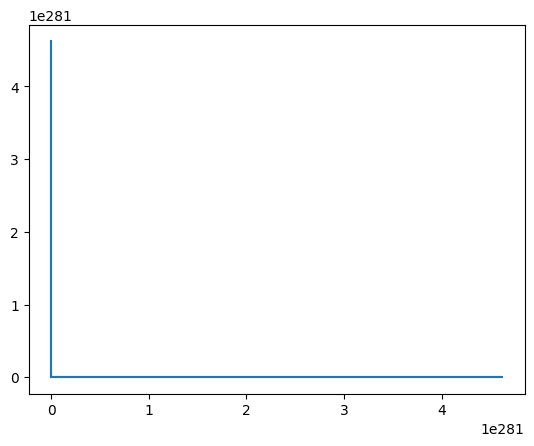

705th iteration, 762.3990258355323


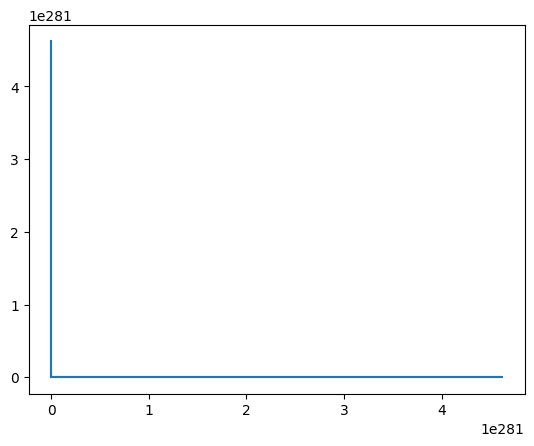

706th iteration, 762.3949293730708


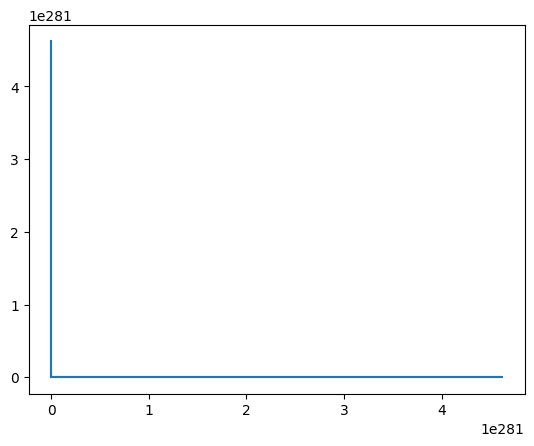

707th iteration, 762.3908329478655


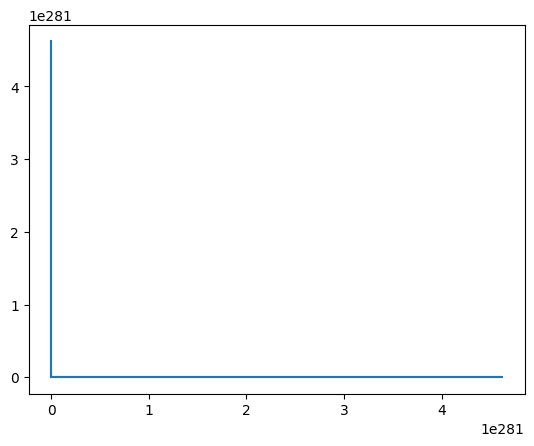

708th iteration, 762.386736559916


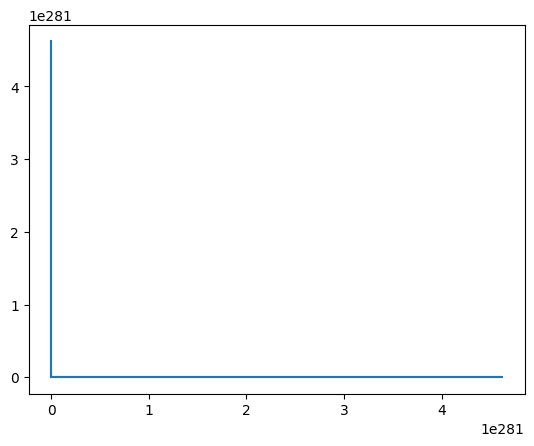

709th iteration, 762.3826402092222


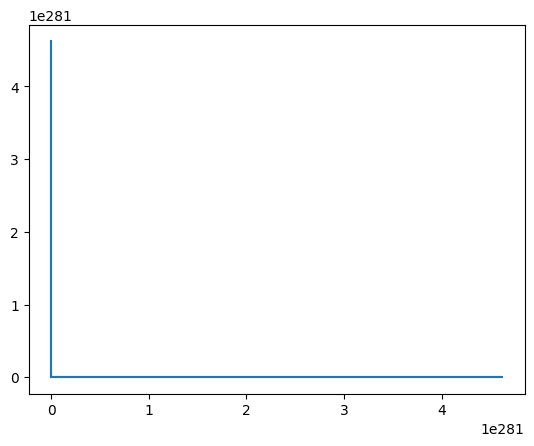

710th iteration, 762.378543895783


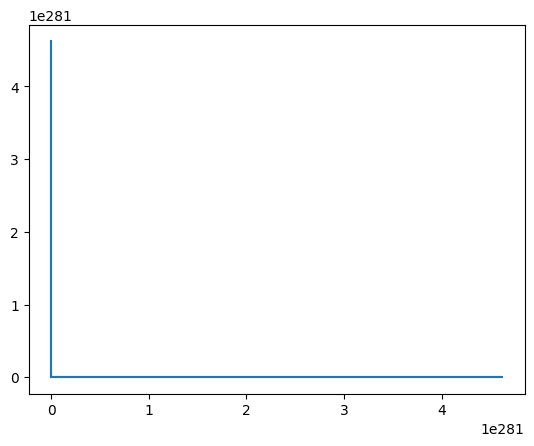

711th iteration, 762.3744476195989


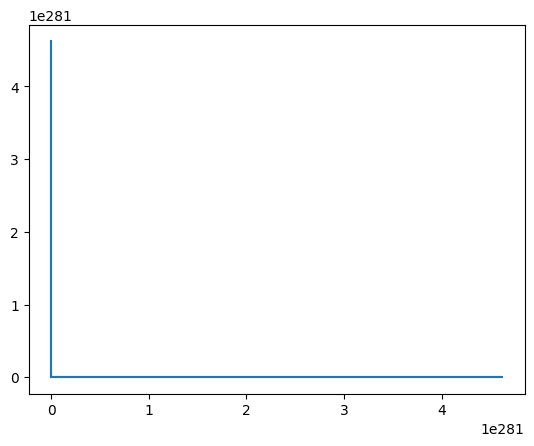

712th iteration, 762.3703513806691


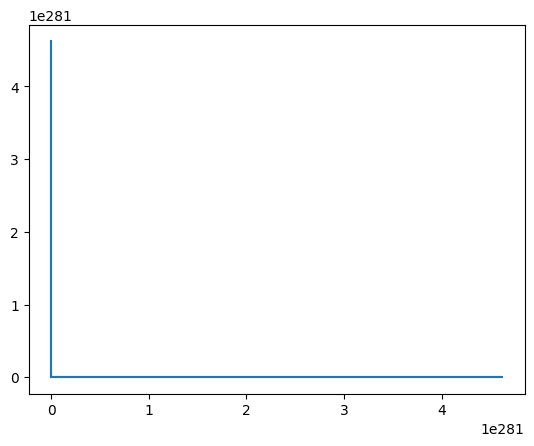

713th iteration, 762.3662551789934


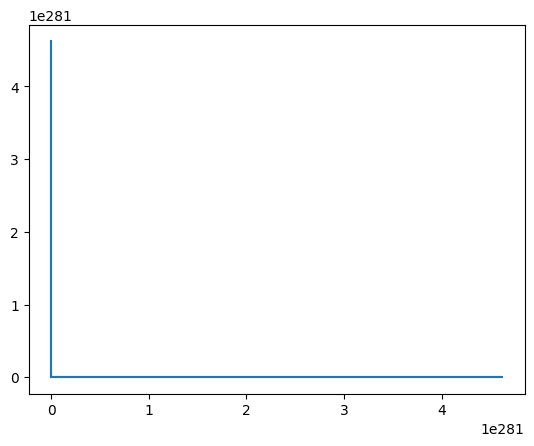

714th iteration, 762.3621590145713


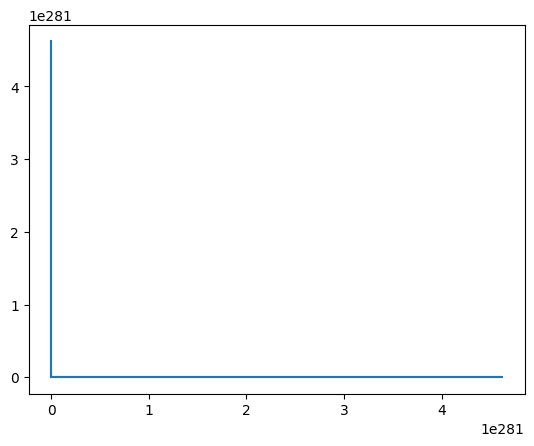

715th iteration, 762.3580628874025


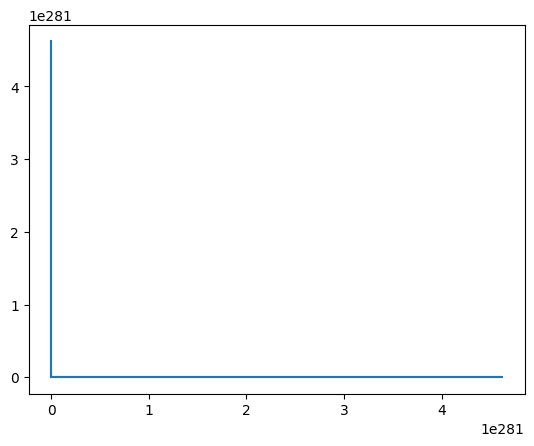

716th iteration, 762.3539667974867


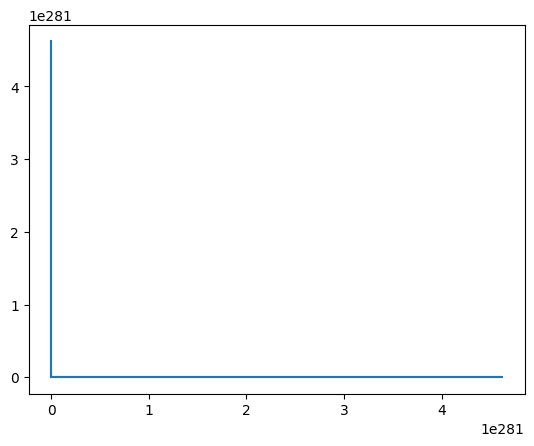

717th iteration, 762.3498707448232


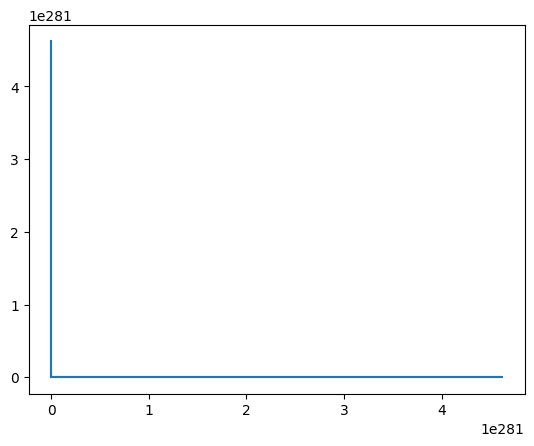

718th iteration, 762.3457747294116


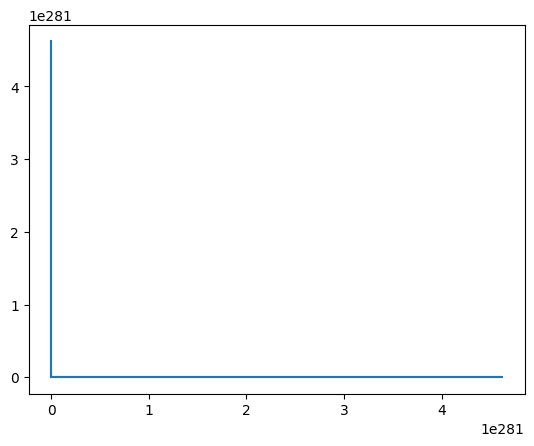

719th iteration, 762.341678751252


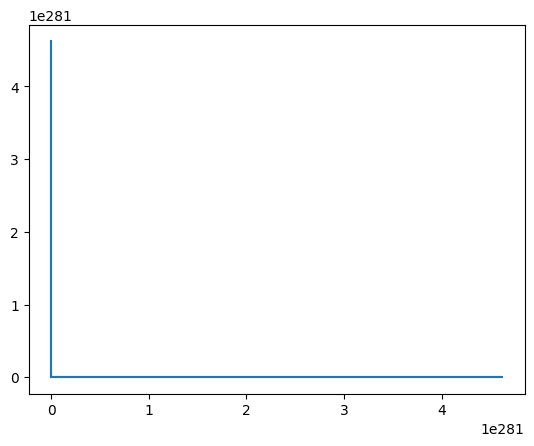

720th iteration, 762.3375828103435


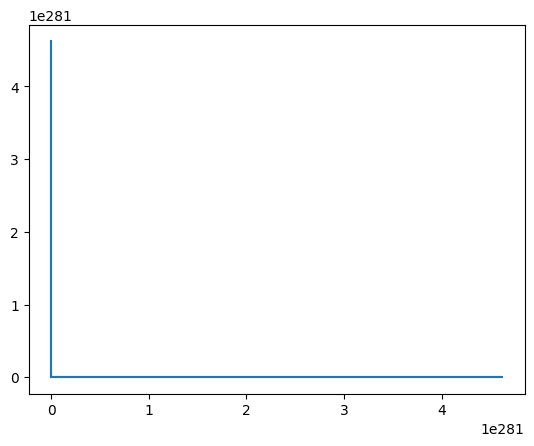

721th iteration, 762.3334869066863


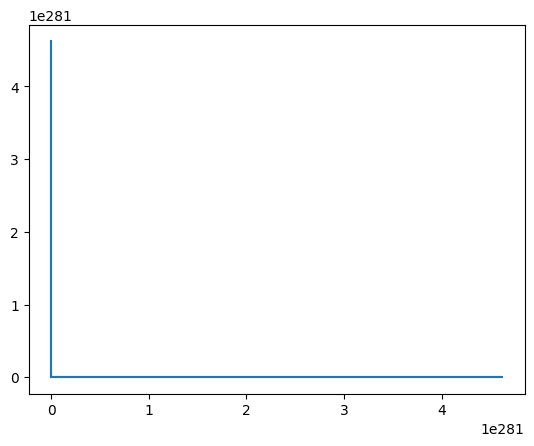

722th iteration, 762.3293910402797


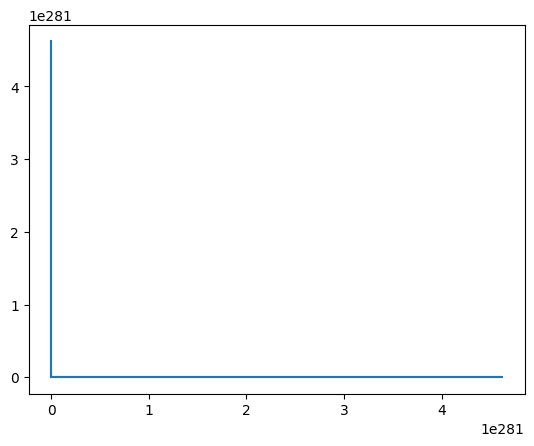

723th iteration, 762.3252952111229


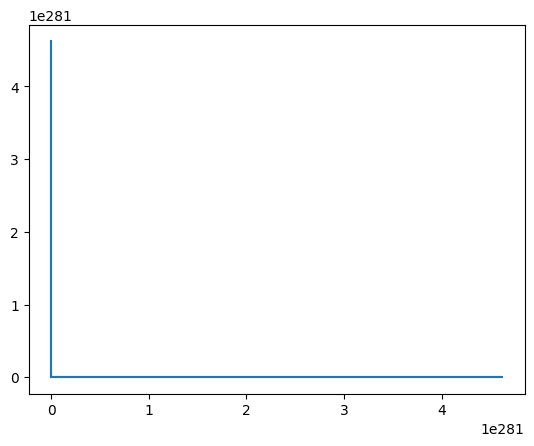

724th iteration, 762.3211994192161


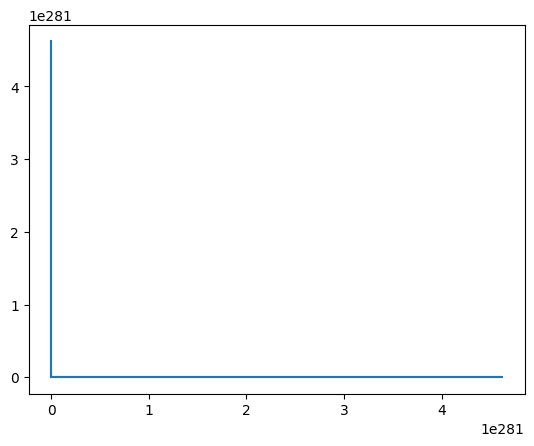

725th iteration, 762.3171036645589


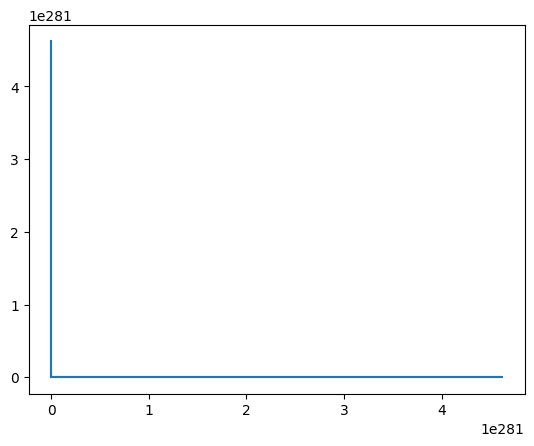

726th iteration, 762.3130079471508


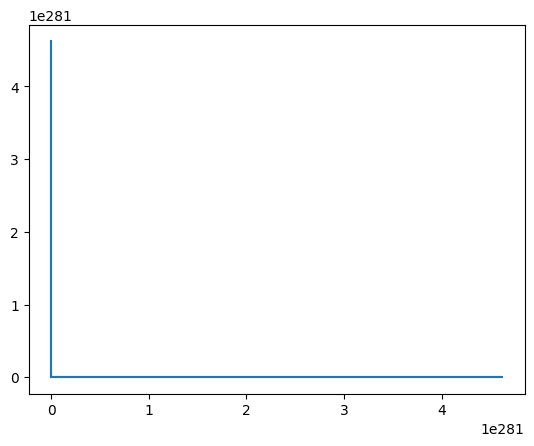

727th iteration, 762.3089122669913


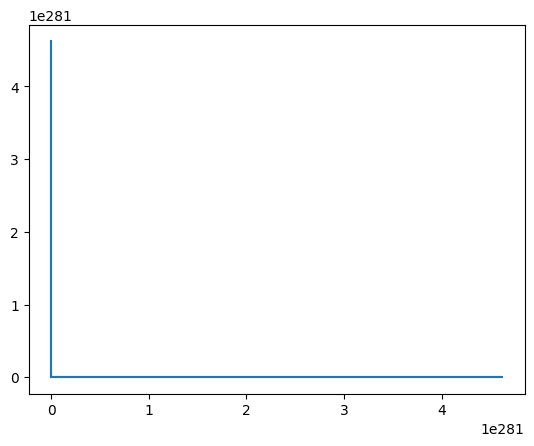

728th iteration, 762.3048166240803


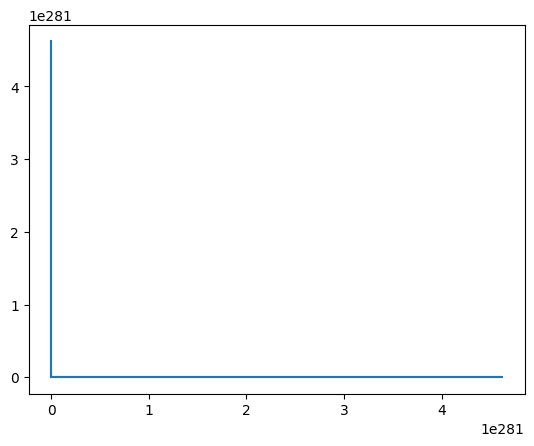

729th iteration, 762.3007210184169


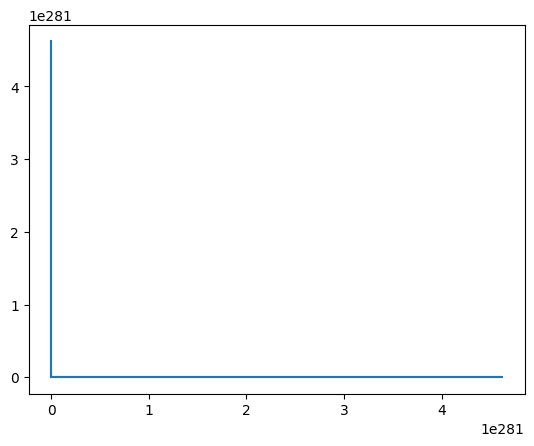

730th iteration, 762.2966254500014


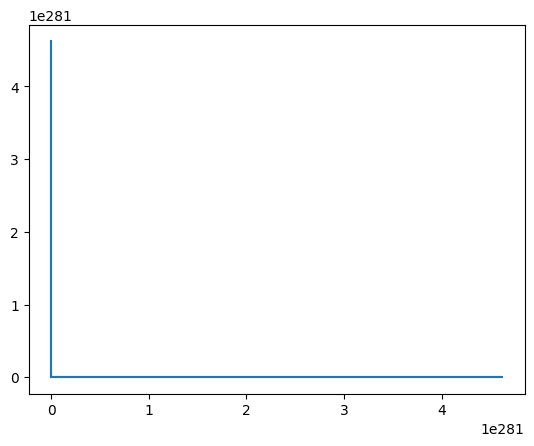

731th iteration, 762.2925299188329


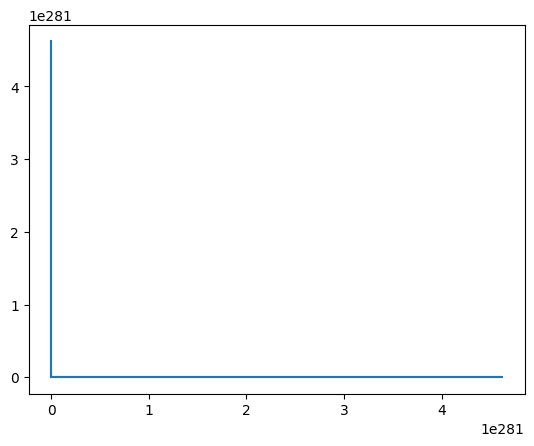

732th iteration, 762.2884344249113


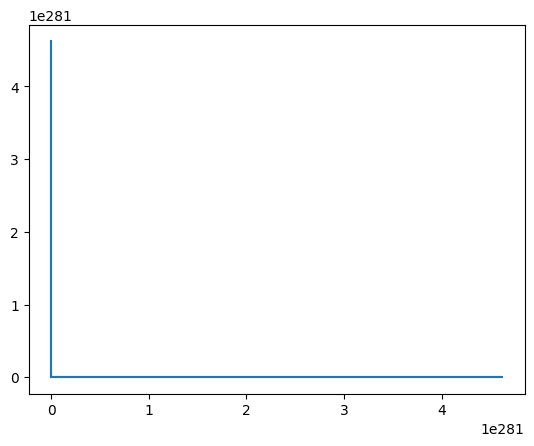

733th iteration, 762.2843389682363


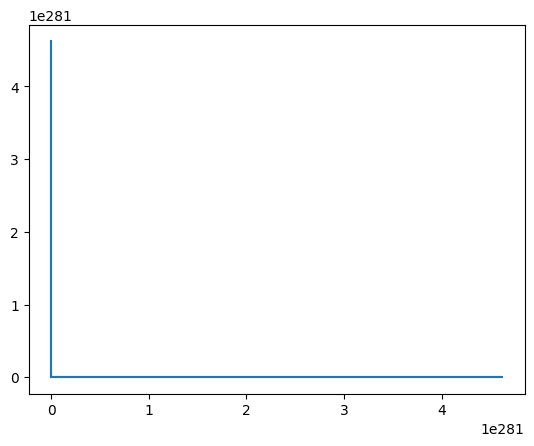

734th iteration, 762.2802435488072


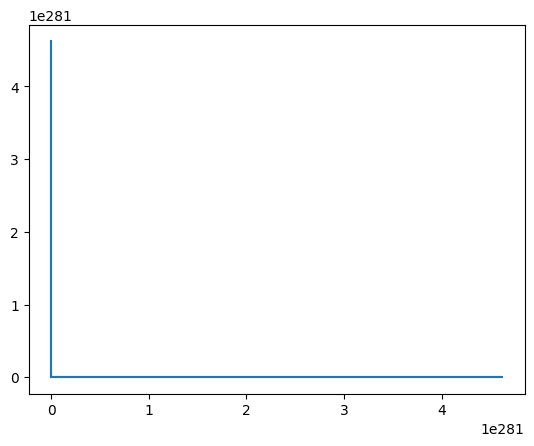

735th iteration, 762.2761481666233


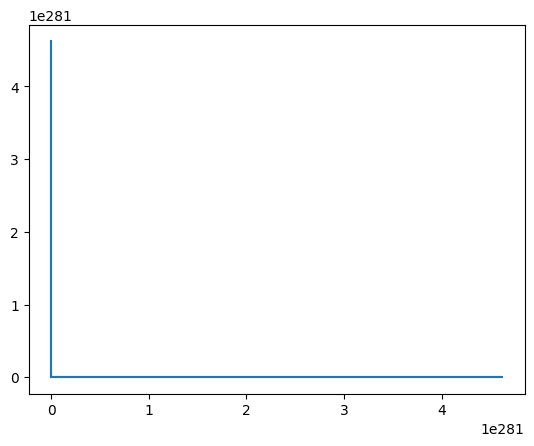

736th iteration, 762.2720528216847


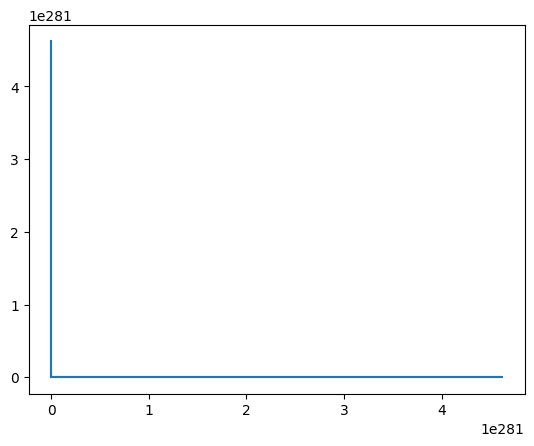

737th iteration, 762.2679575139913


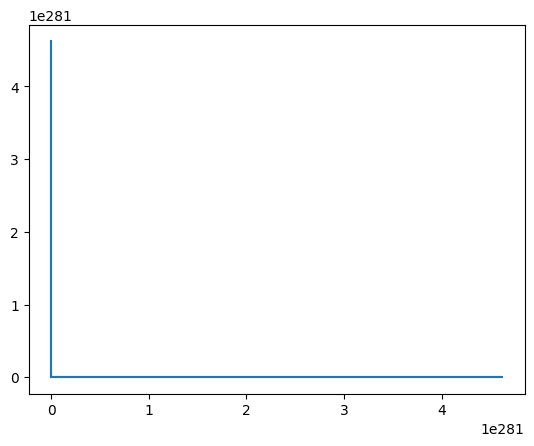

738th iteration, 762.2638622435423


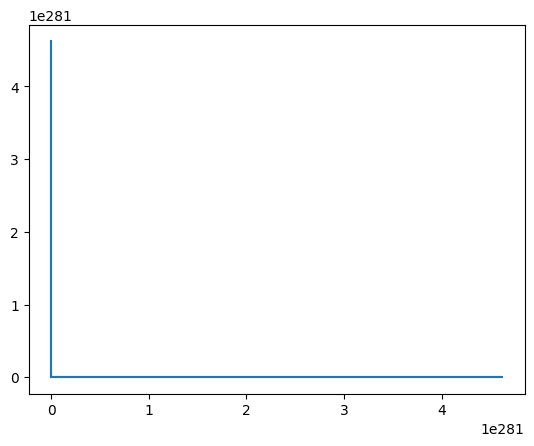

739th iteration, 762.259767010338


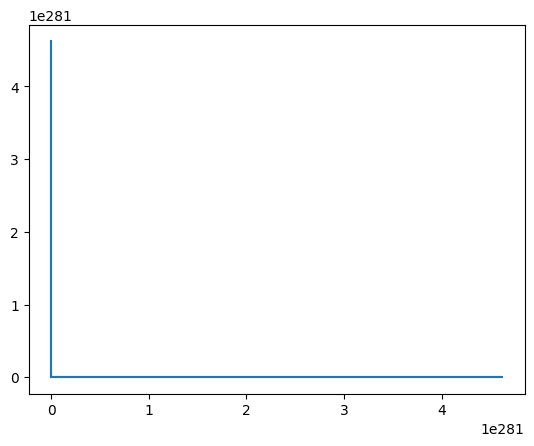

740th iteration, 762.2556718143775


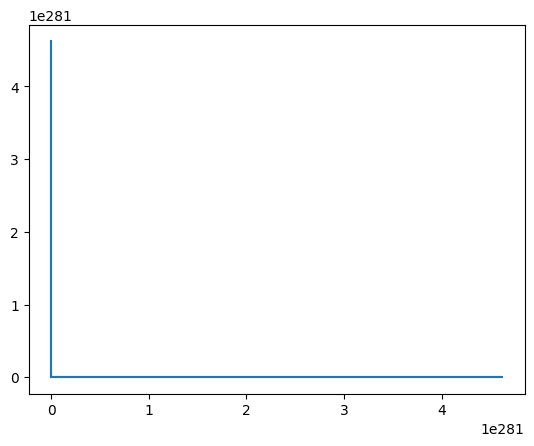

741th iteration, 762.25157665566


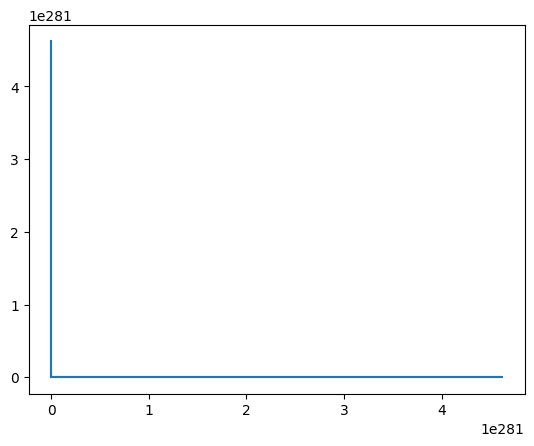

742th iteration, 762.247481534186


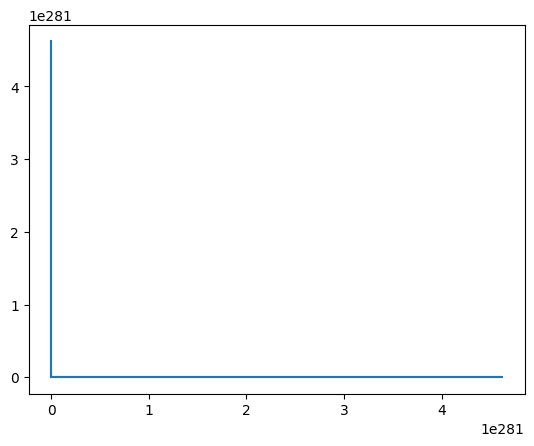

743th iteration, 762.243386449954


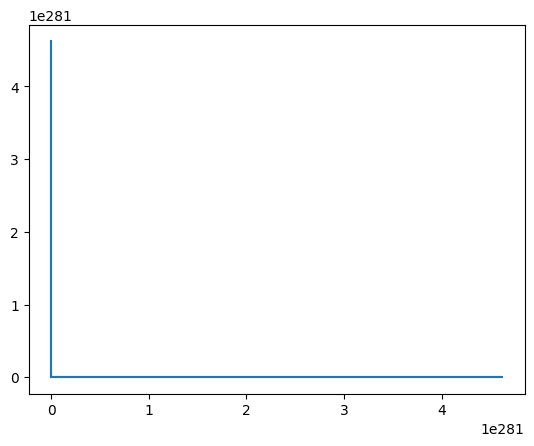

744th iteration, 762.2392914029647


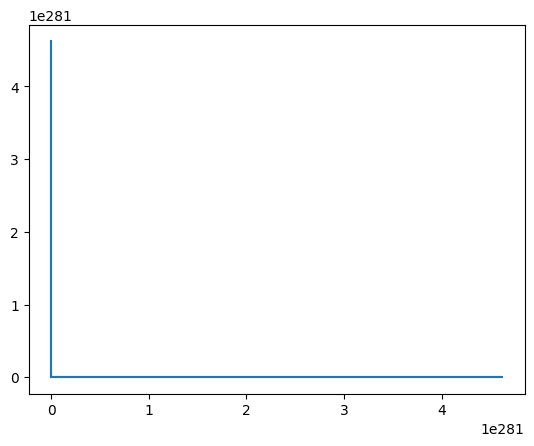

745th iteration, 762.2351963932173


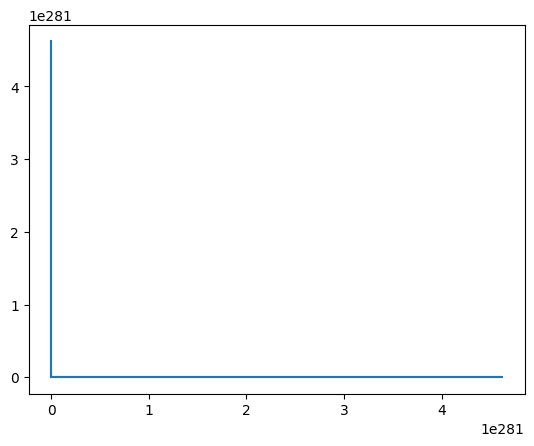

746th iteration, 762.2311014207114


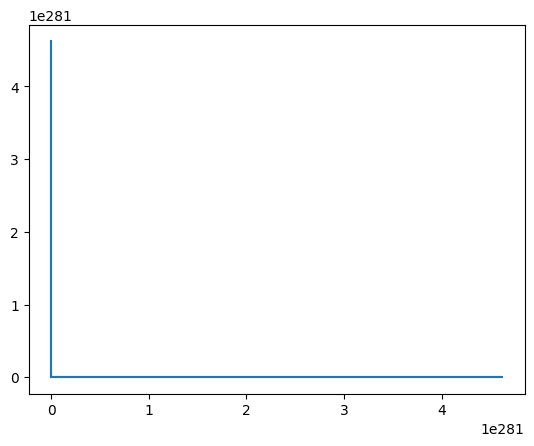

747th iteration, 762.2270064854467


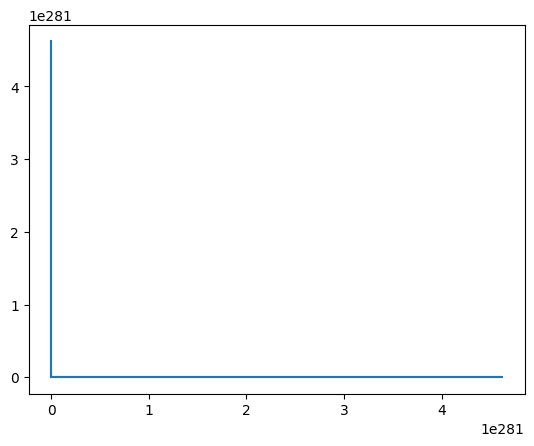

748th iteration, 762.2229115874223


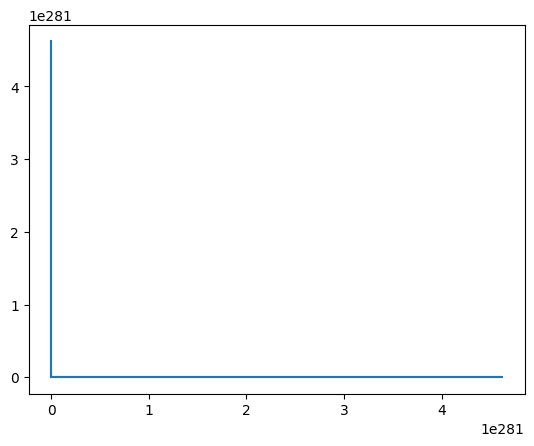

749th iteration, 762.218816726639


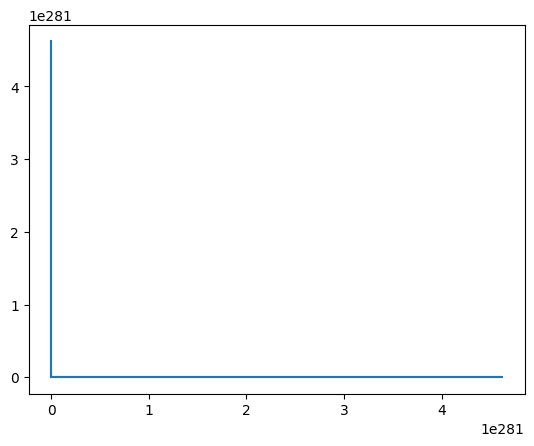

750th iteration, 762.2147219030956


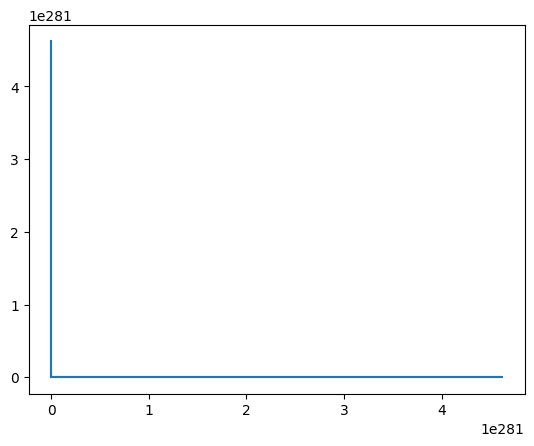

751th iteration, 762.2106271167918


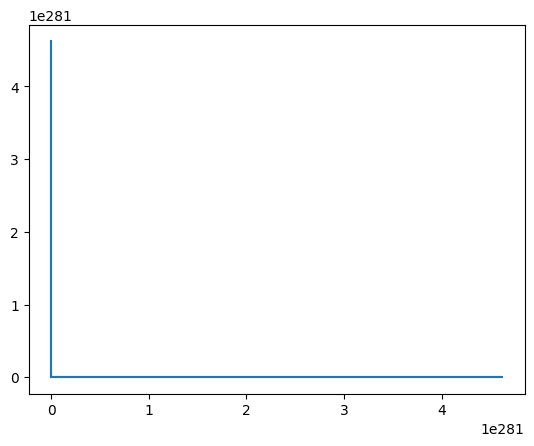

752th iteration, 762.2065323677268


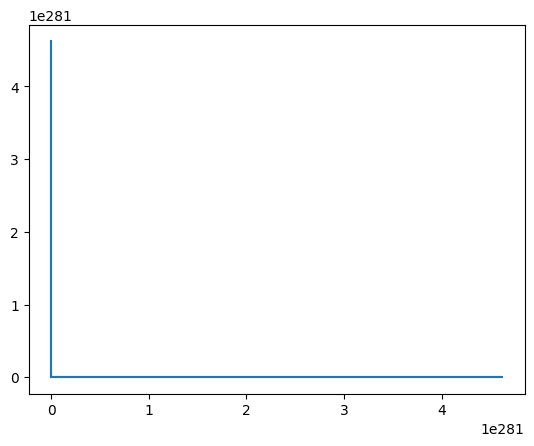

753th iteration, 762.2024376559009


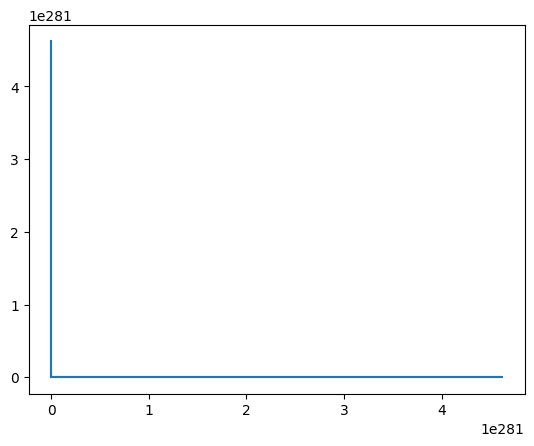

754th iteration, 762.1983429813135


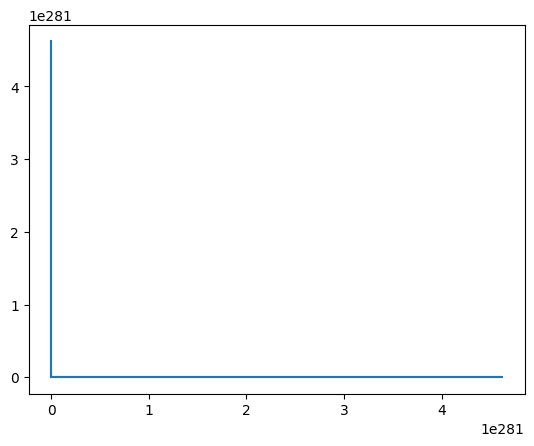

755th iteration, 762.1942483439642


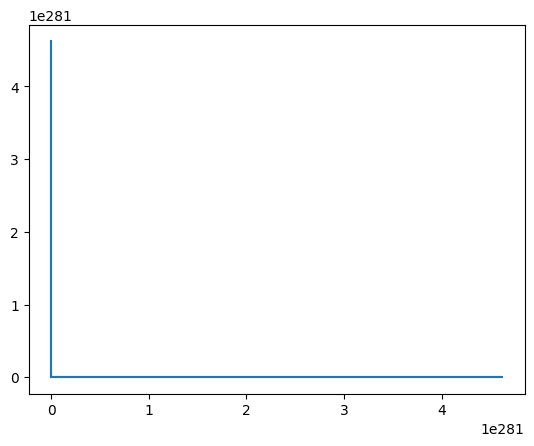

756th iteration, 762.1901537438526


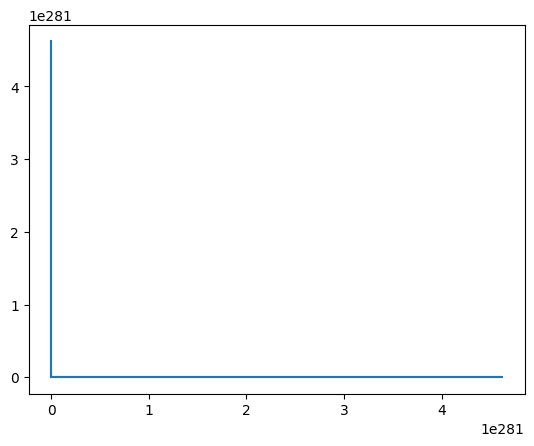

757th iteration, 762.1860591809786


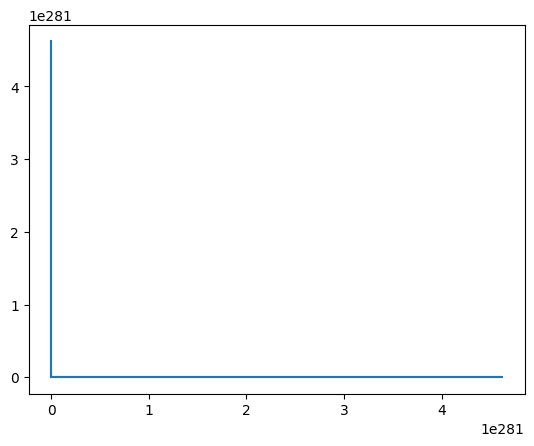

758th iteration, 762.1819646553415


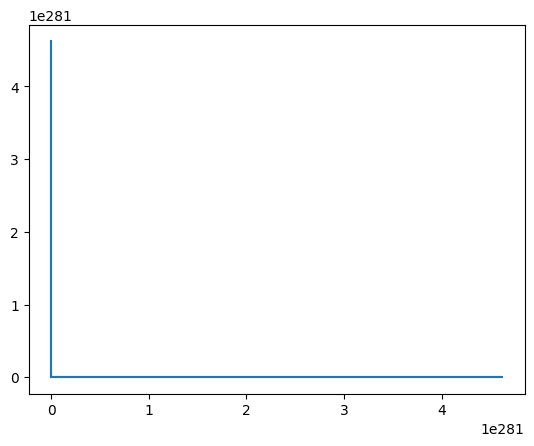

759th iteration, 762.1778701669408


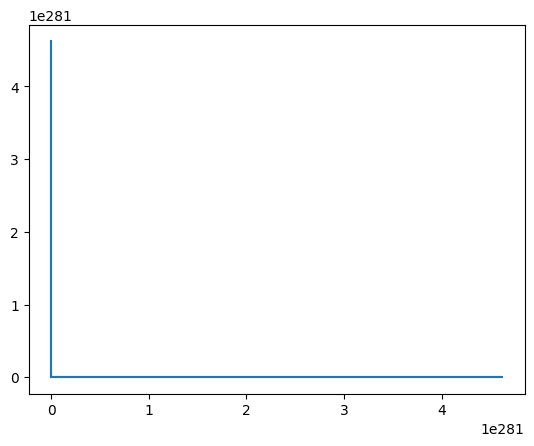

760th iteration, 762.1737757157762


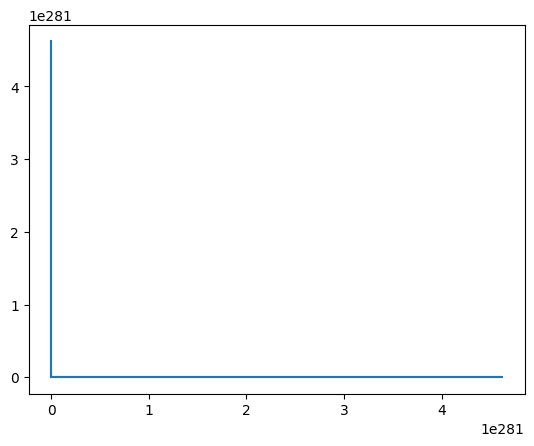

761th iteration, 762.1696813018478


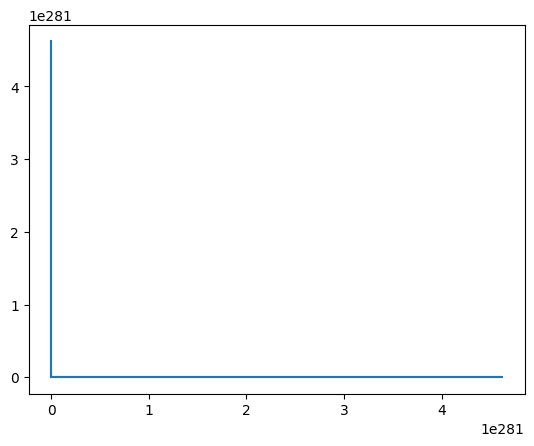

762th iteration, 762.165586925155


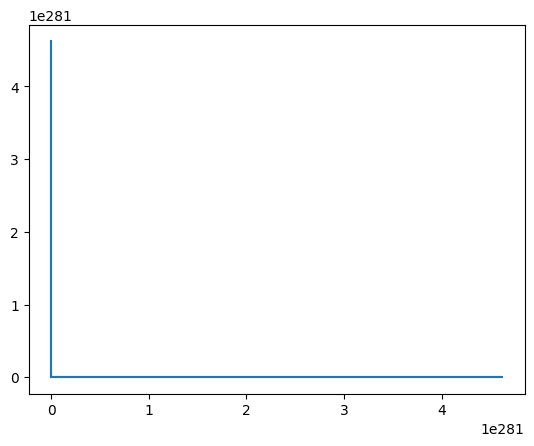

763th iteration, 762.1614925856973


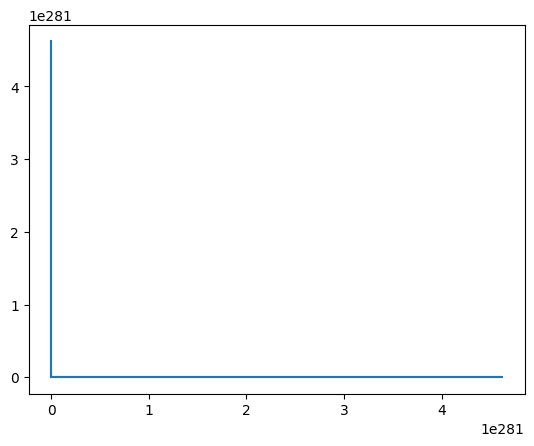

764th iteration, 762.157398283474


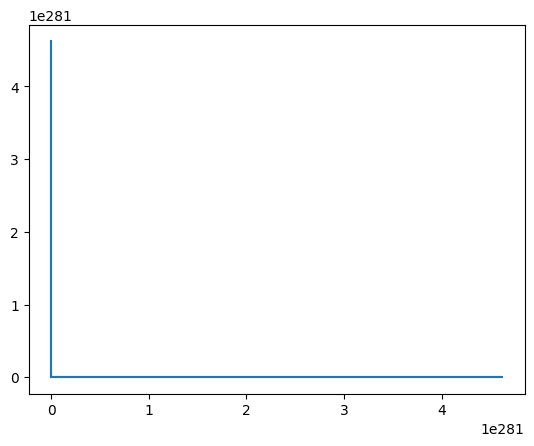

765th iteration, 762.1533040184851


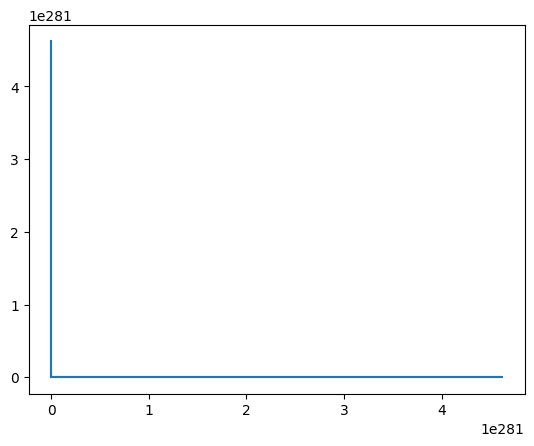

766th iteration, 762.1492097907304


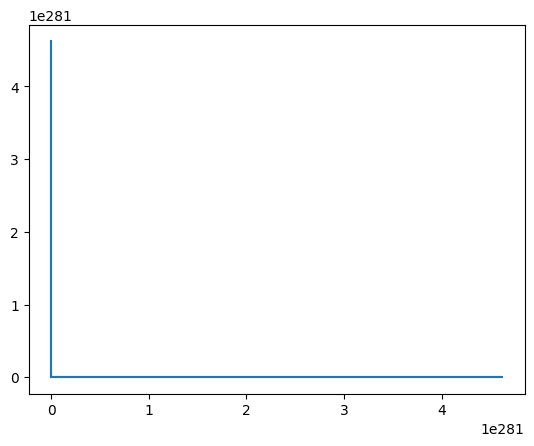

767th iteration, 762.1451156002089


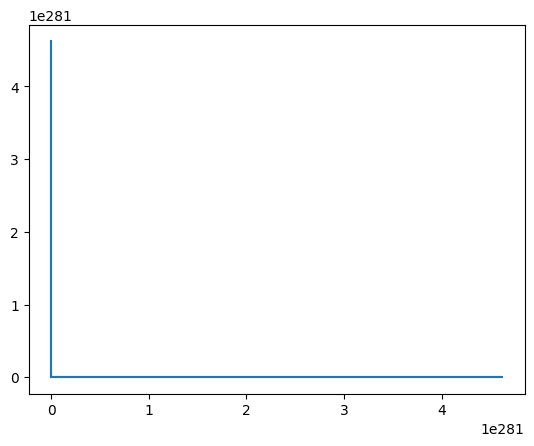

768th iteration, 762.1410214469211


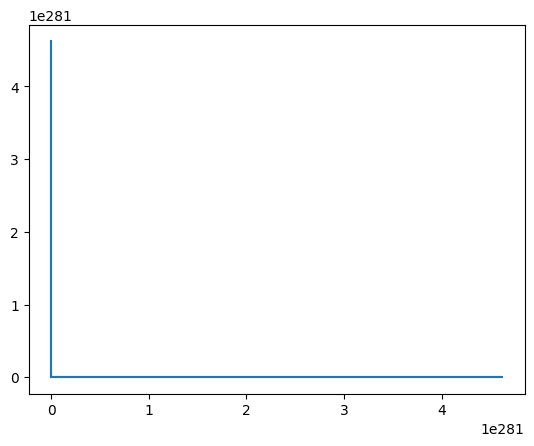

769th iteration, 762.1369273308662


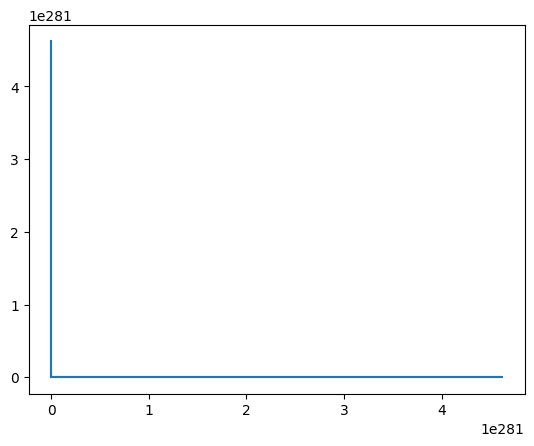

770th iteration, 762.1328332520436


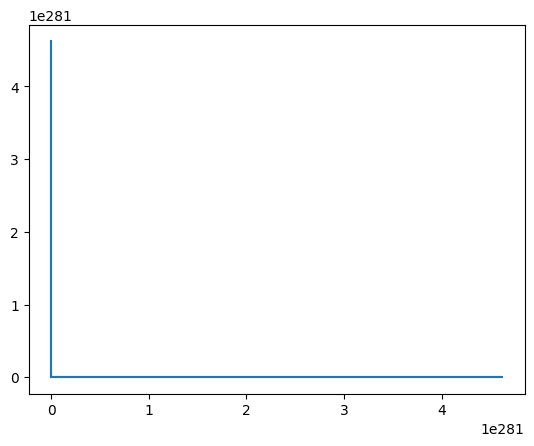

771th iteration, 762.1287392104529


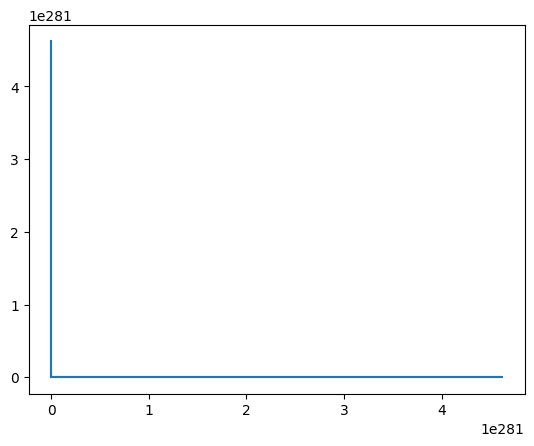

772th iteration, 762.124645206094


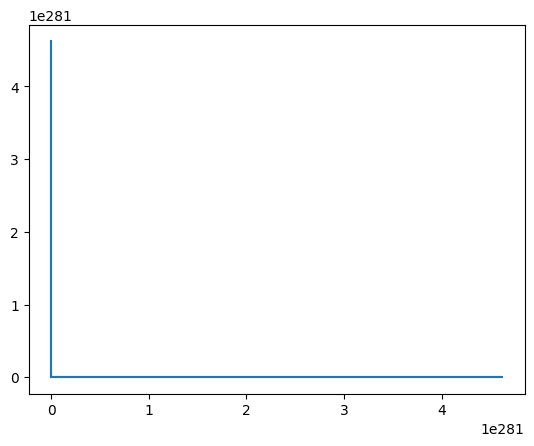

773th iteration, 762.1205512389665


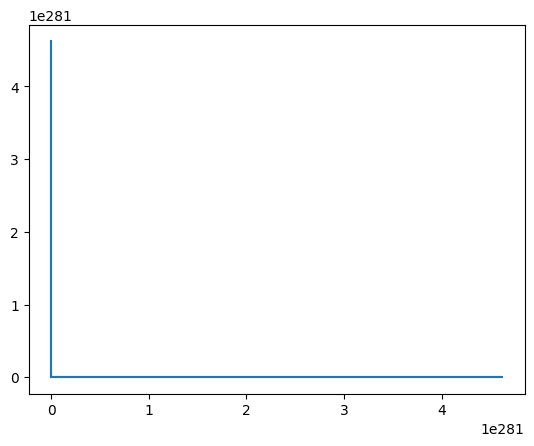

774th iteration, 762.1164573090699


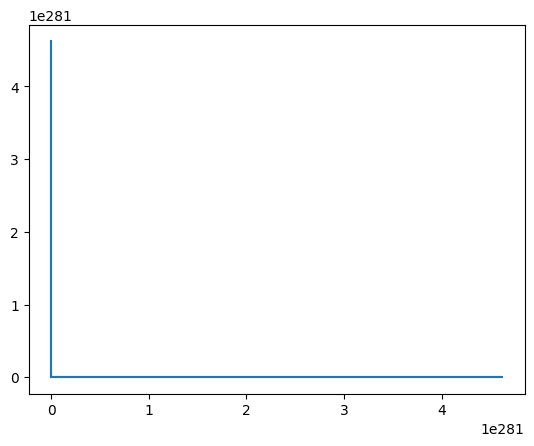

775th iteration, 762.1123634164039


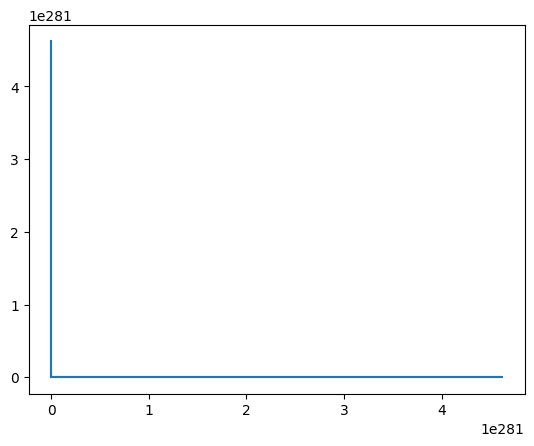

776th iteration, 762.1082695609683


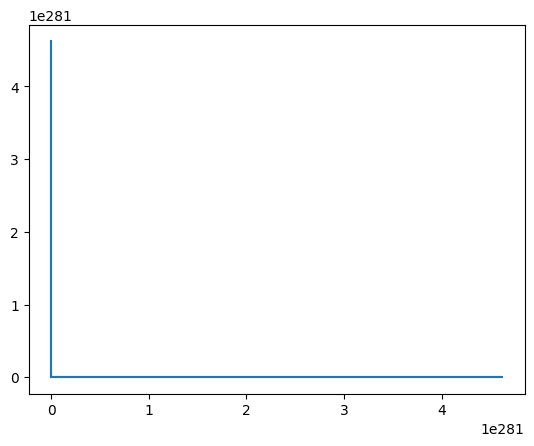

777th iteration, 762.1041757427623


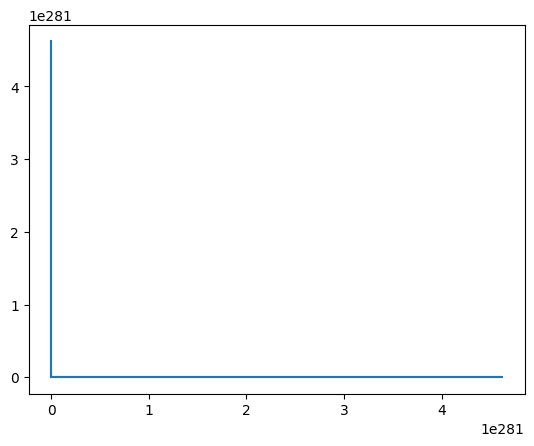

778th iteration, 762.1000819617857


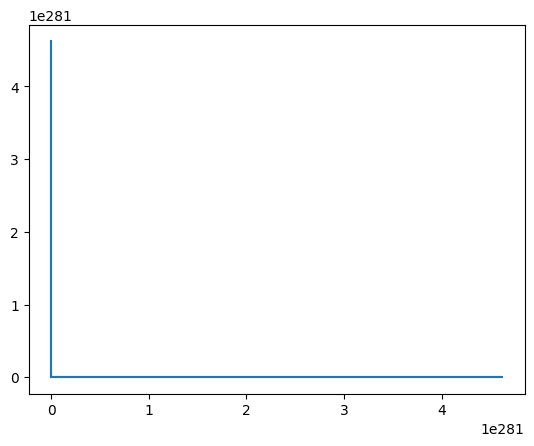

779th iteration, 762.0959882180382


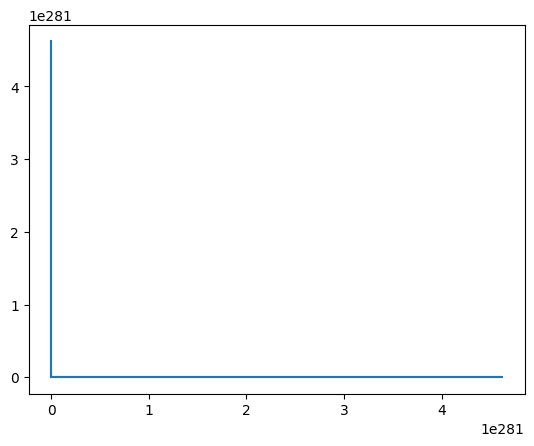

780th iteration, 762.0918945115196


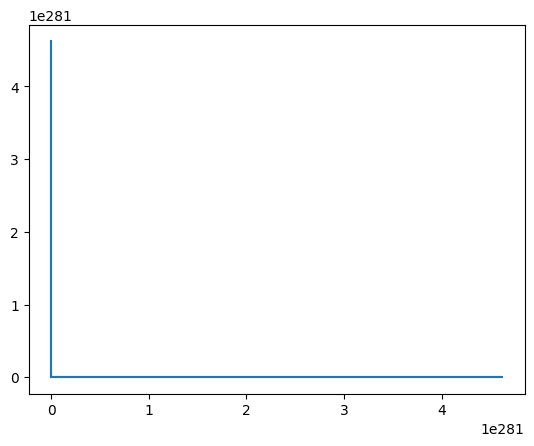

781th iteration, 762.0878008422294


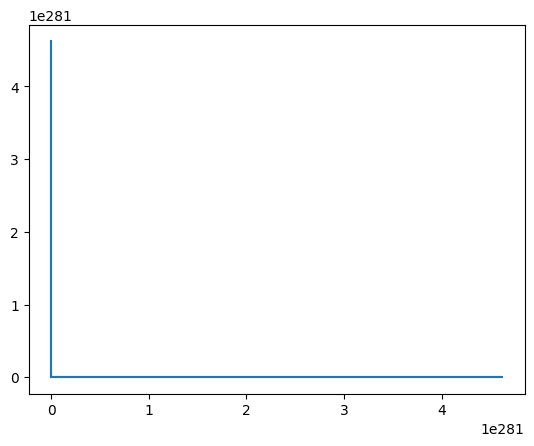

782th iteration, 762.083707210167


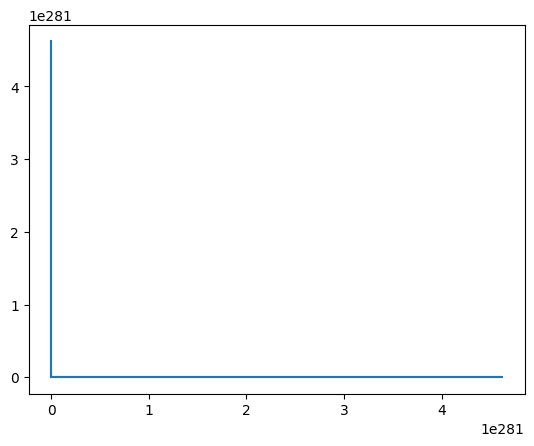

783th iteration, 762.079613615332


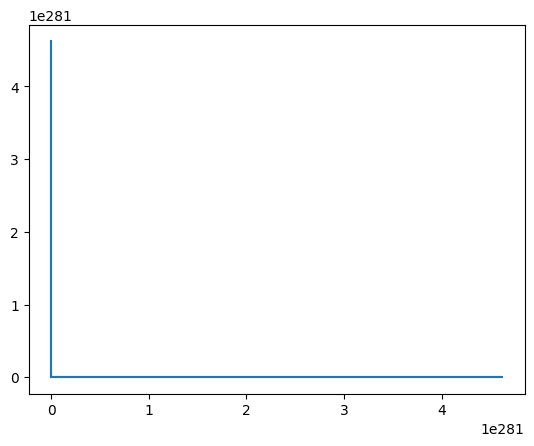

784th iteration, 762.0755200577246


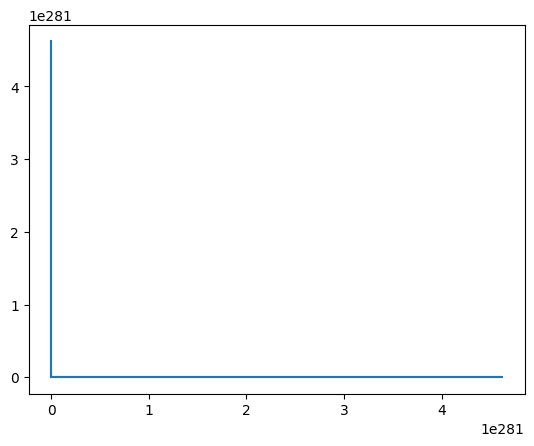

785th iteration, 762.0714265373438


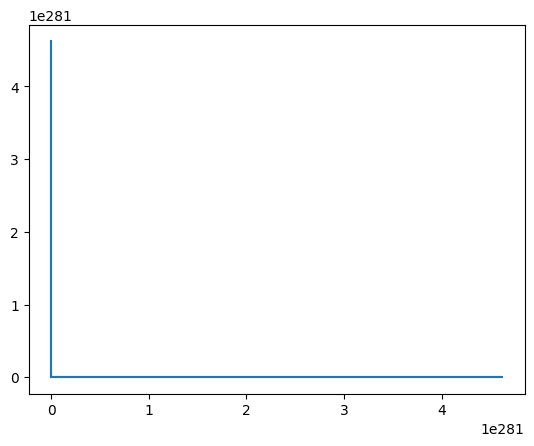

786th iteration, 762.0673330541892


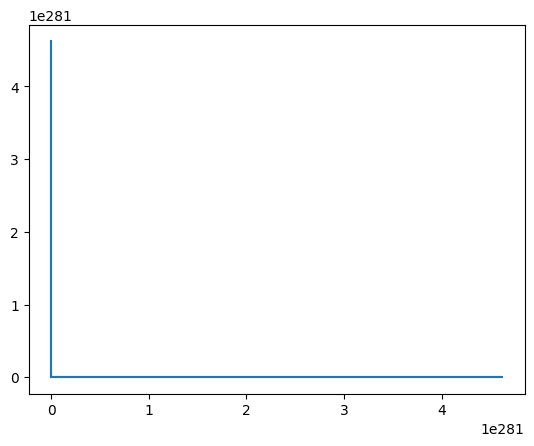

787th iteration, 762.0632396082607


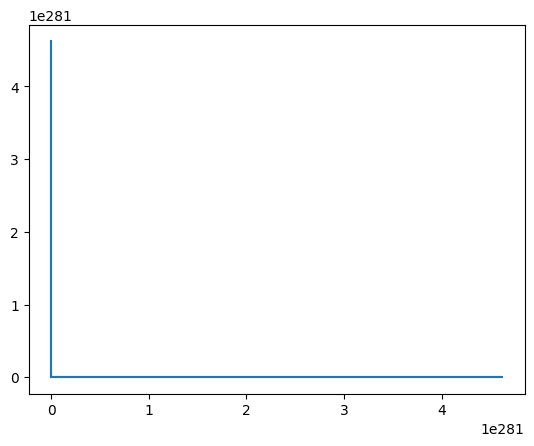

788th iteration, 762.0591461995582


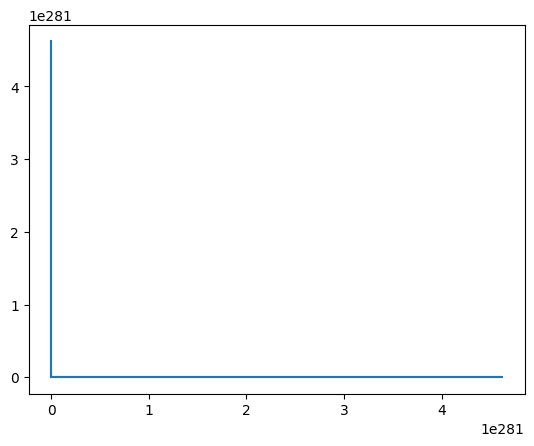

789th iteration, 762.0550528280805


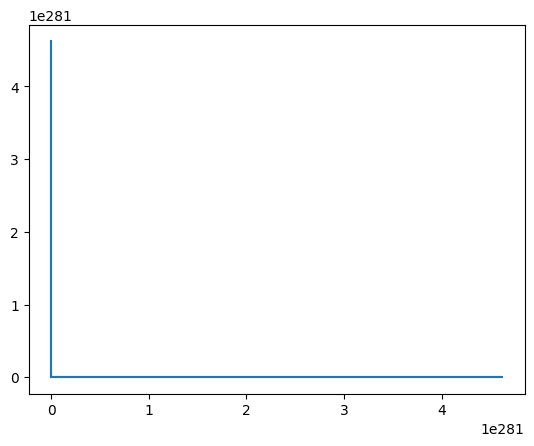

790th iteration, 762.0509594938281


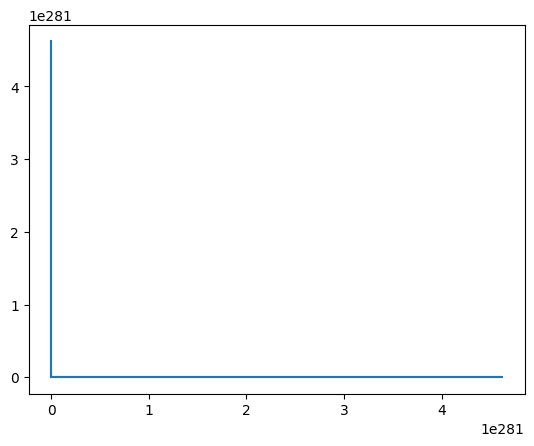

791th iteration, 762.0468661968006


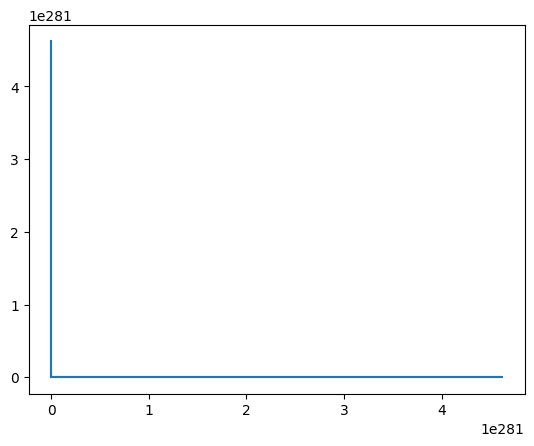

792th iteration, 762.0427729369968


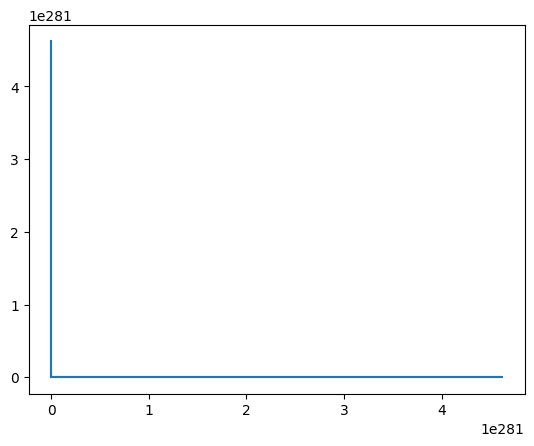

793th iteration, 762.038679714417


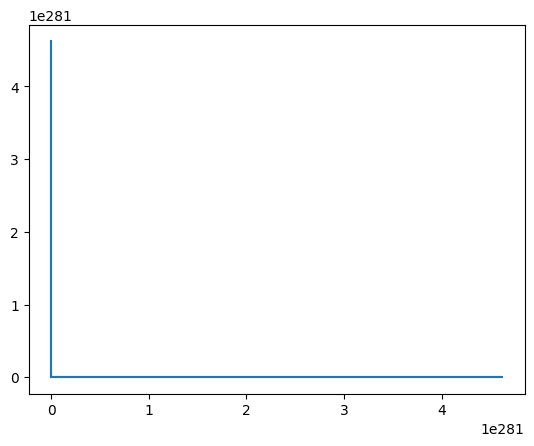

794th iteration, 762.0345865290606


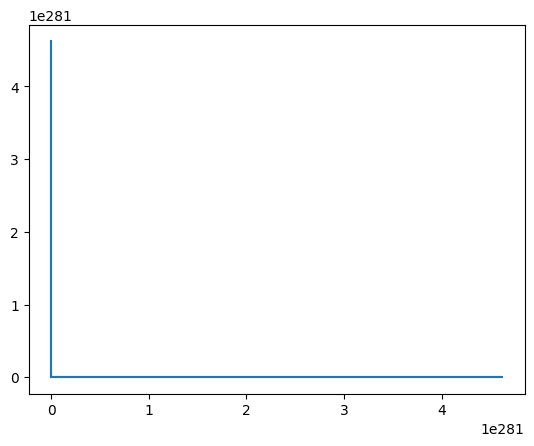

795th iteration, 762.0304933809272


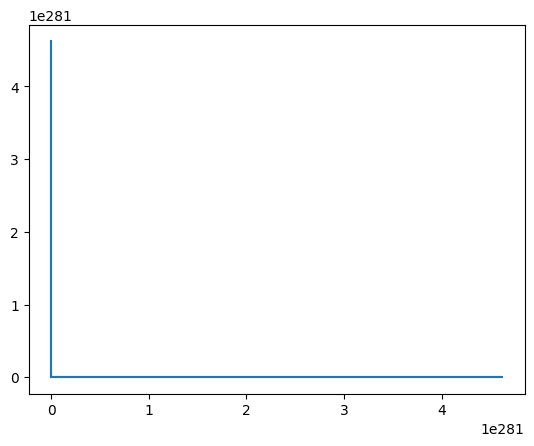

796th iteration, 762.0264002700167


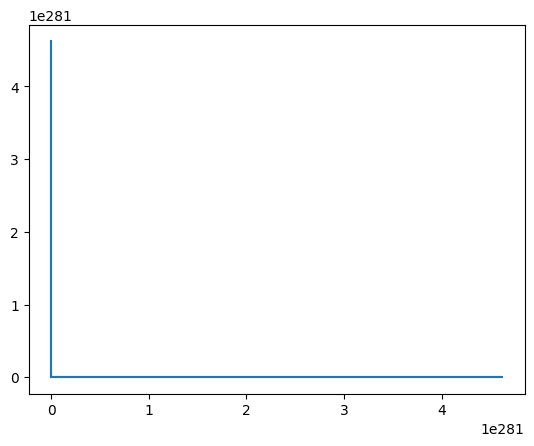

797th iteration, 762.0223071963283


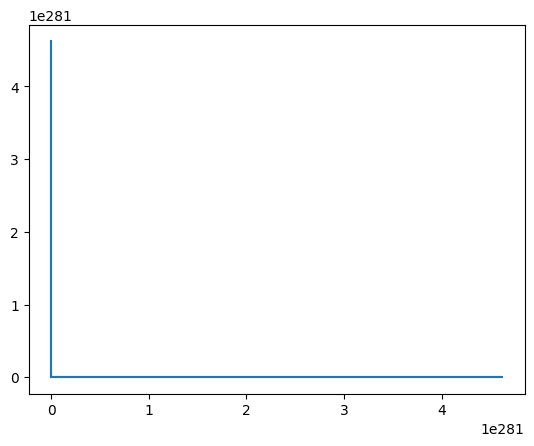

798th iteration, 762.0182141598617


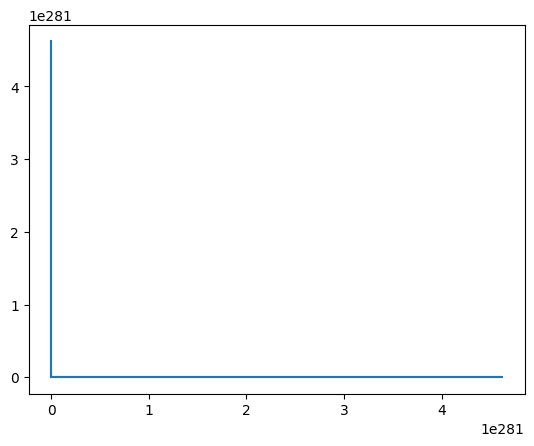

799th iteration, 762.0141211606165


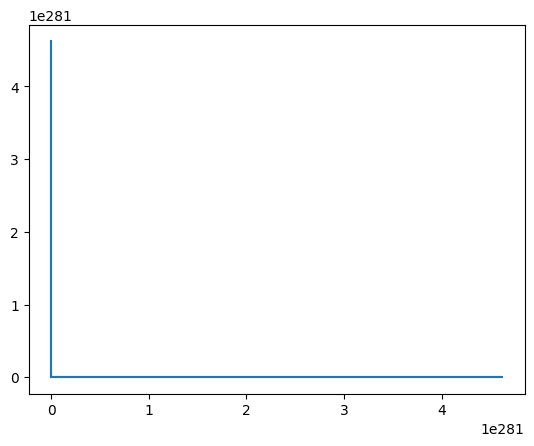

800th iteration, 762.0100281985925


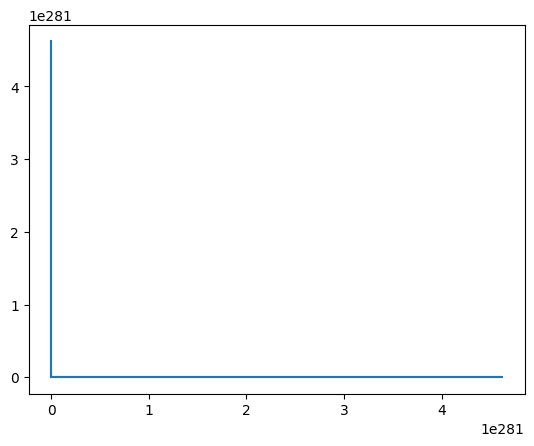

801th iteration, 762.0059352737893


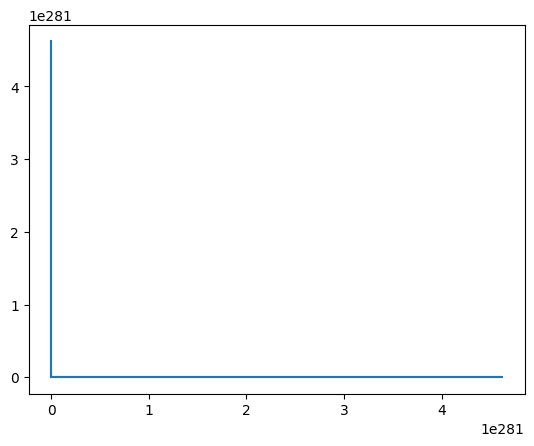

802th iteration, 762.0018423862062


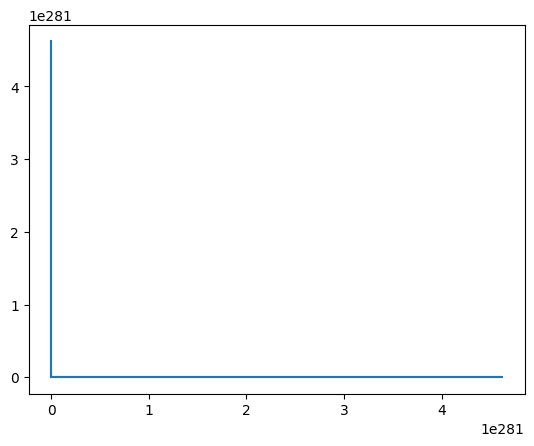

803th iteration, 761.9977495358434


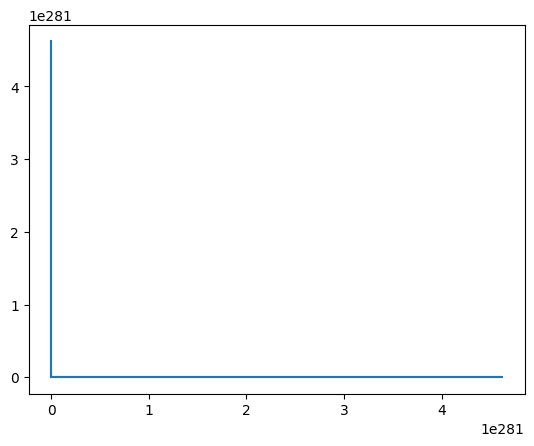

804th iteration, 761.9936567227002


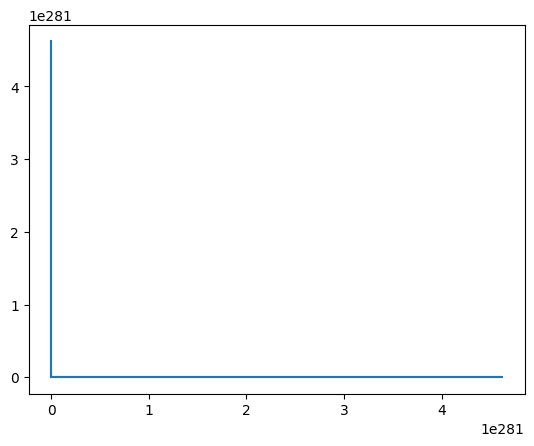

805th iteration, 761.9895639467768


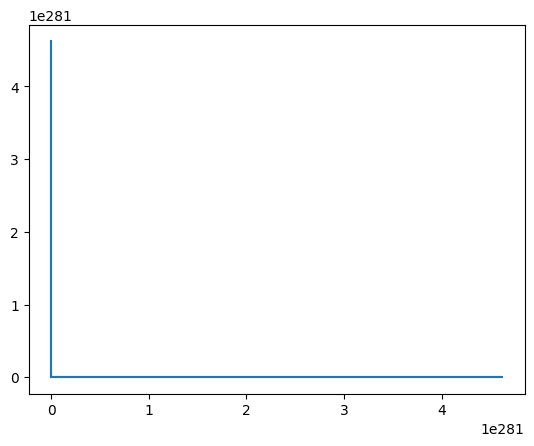

806th iteration, 761.985471208072


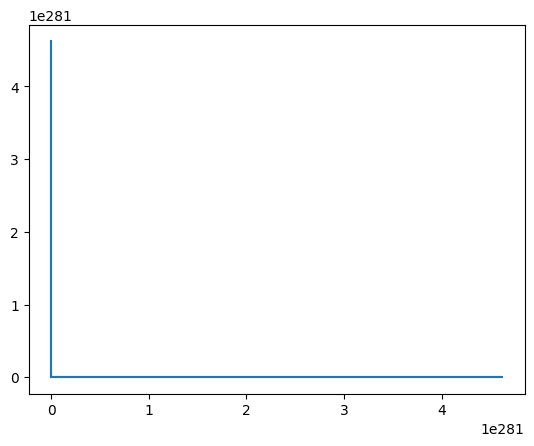

807th iteration, 761.9813785065858


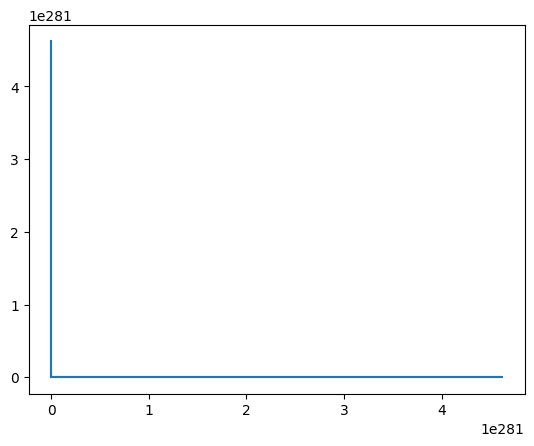

808th iteration, 761.9772858423177


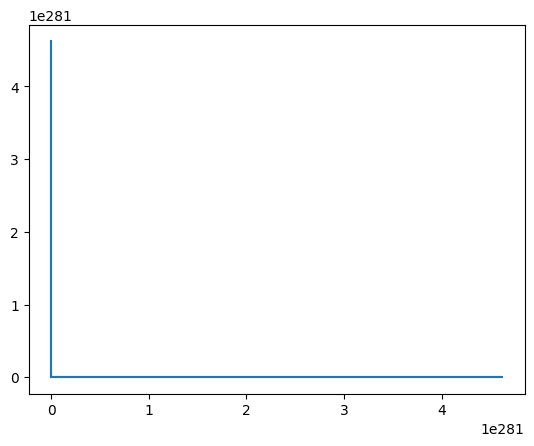

809th iteration, 761.9731932152669


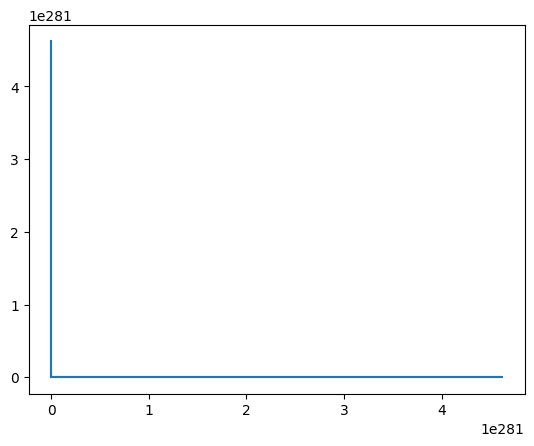

810th iteration, 761.9691006254341


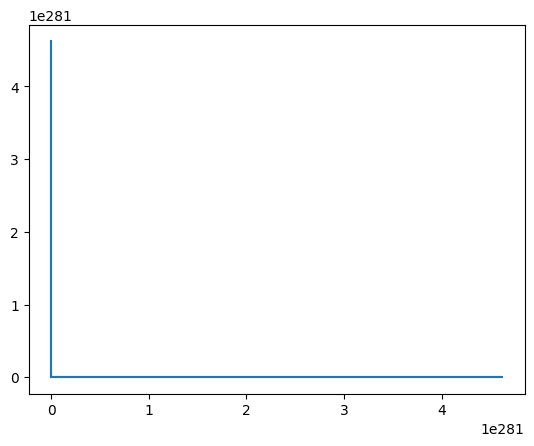

811th iteration, 761.9650080728179


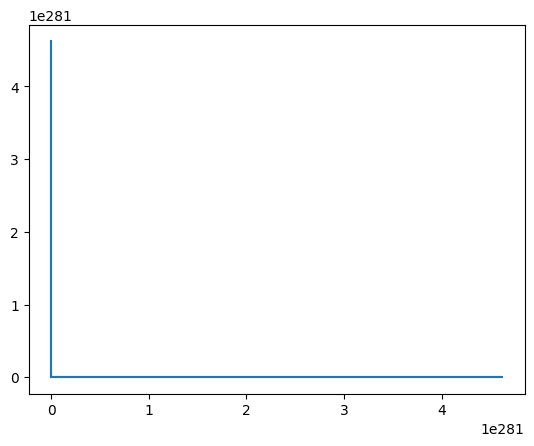

812th iteration, 761.9609155574186


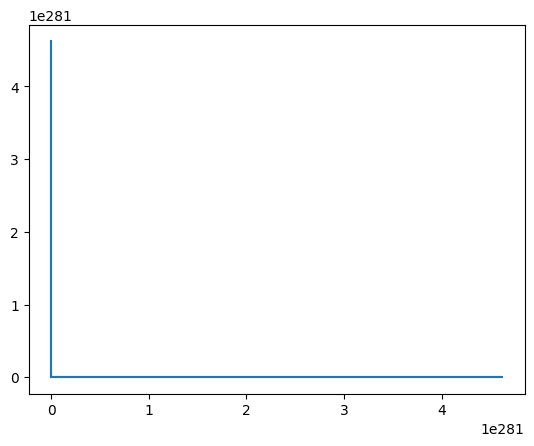

813th iteration, 761.9568230792356


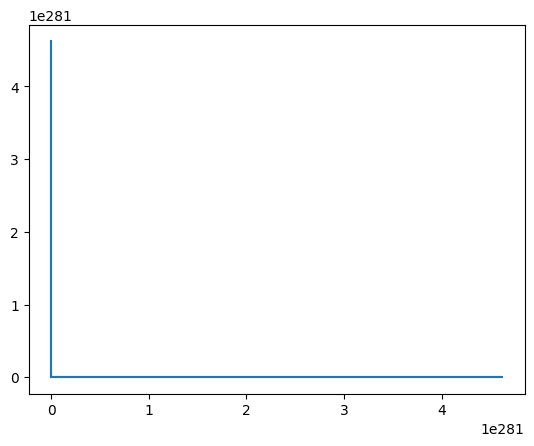

814th iteration, 761.9527306382681


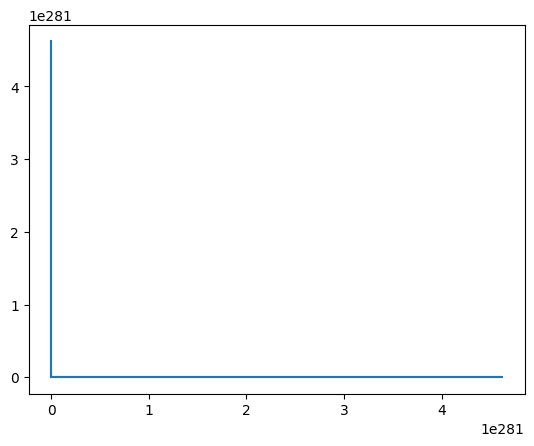

815th iteration, 761.9486382345164


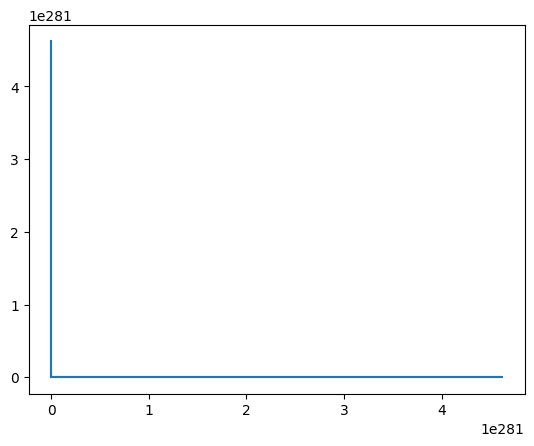

816th iteration, 761.9445458679799


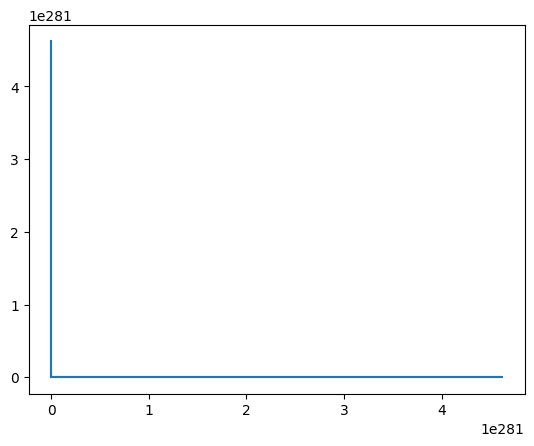

817th iteration, 761.9404535386578


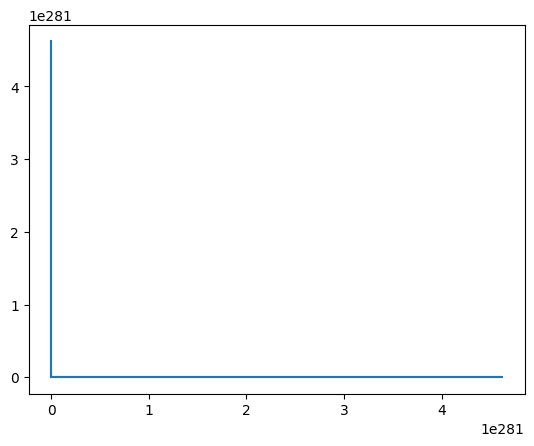

818th iteration, 761.9363612465507


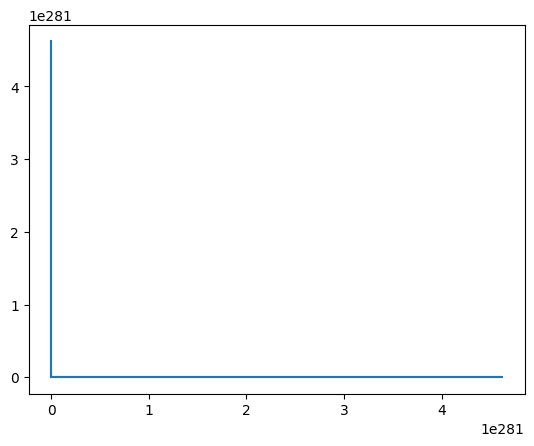

819th iteration, 761.9322689916572


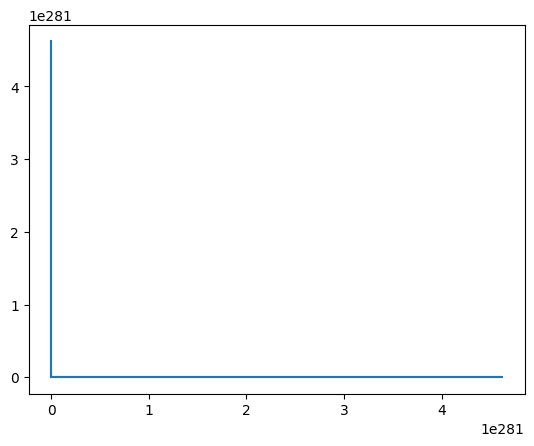

820th iteration, 761.928176773977


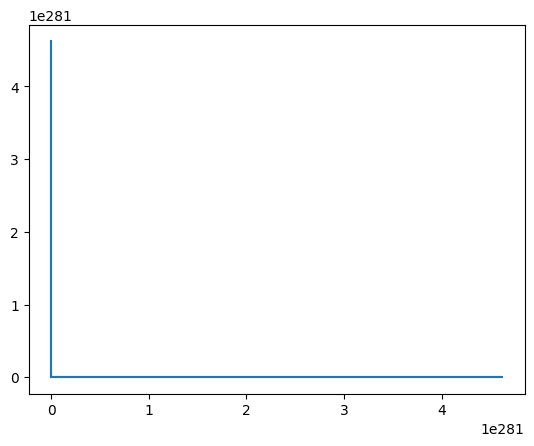

821th iteration, 761.9240845935107


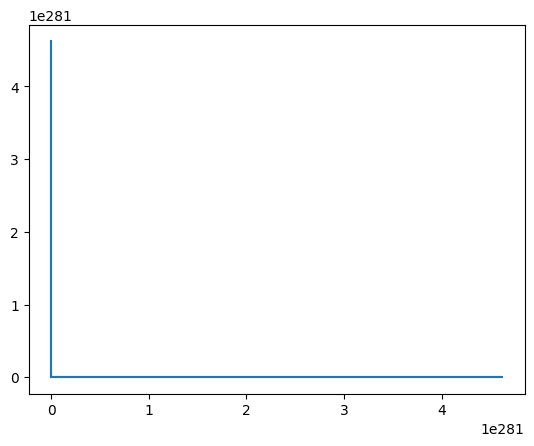

822th iteration, 761.9199924502568


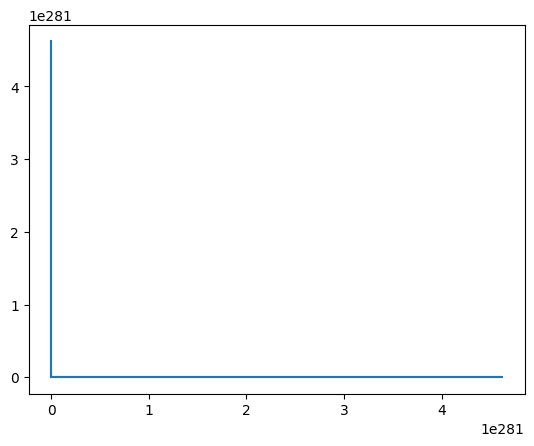

823th iteration, 761.9159003442154


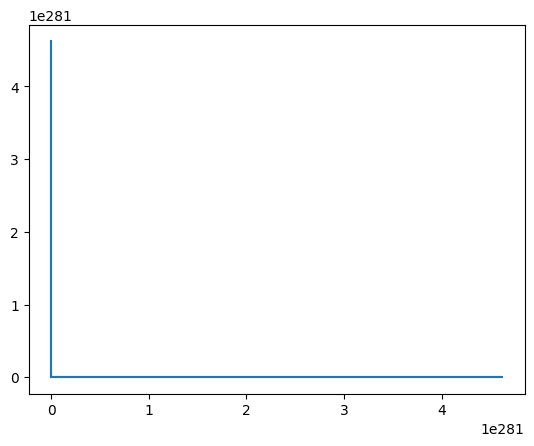

824th iteration, 761.9118082753864


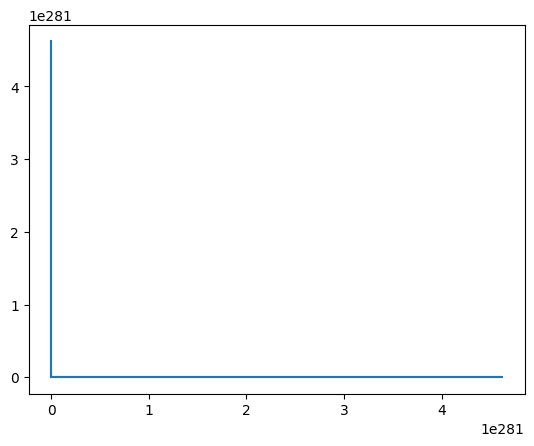

825th iteration, 761.9077162437691


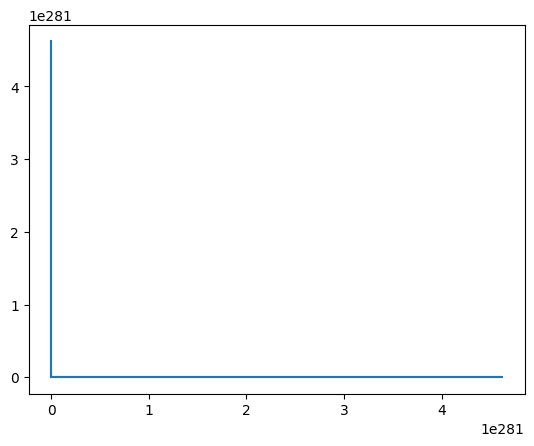

826th iteration, 761.903624249363


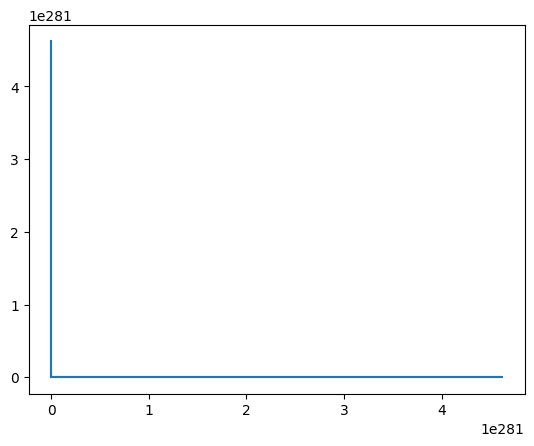

827th iteration, 761.8995322921683


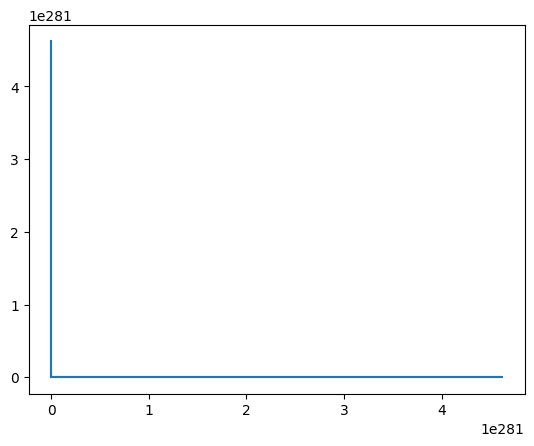

828th iteration, 761.8954403721835


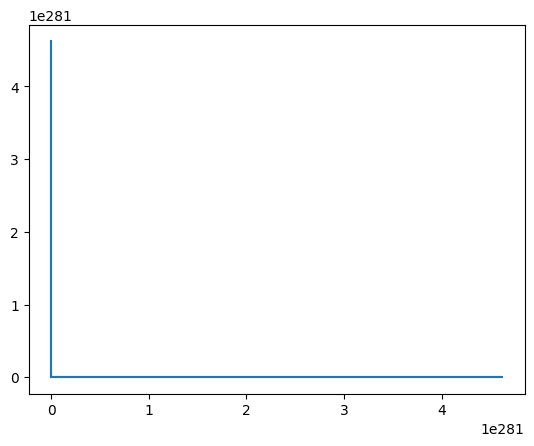

829th iteration, 761.8913484894094


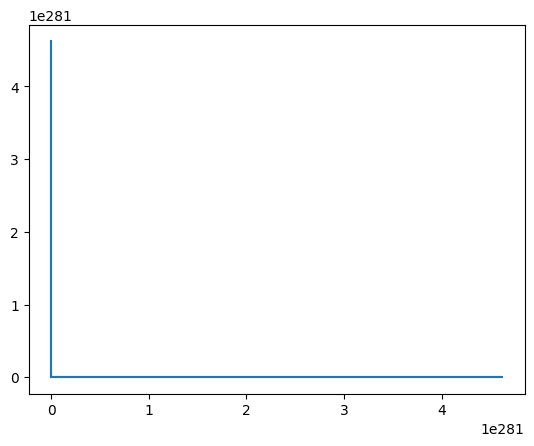

830th iteration, 761.8872566438451


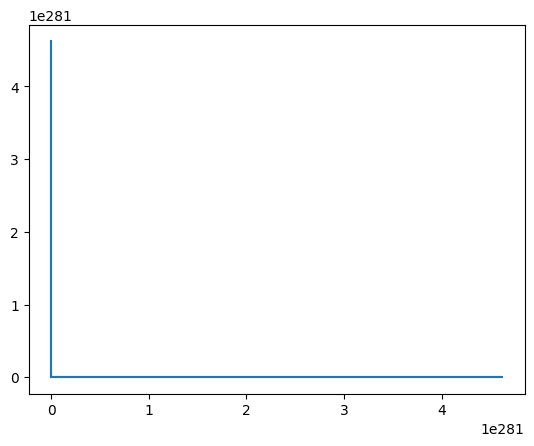

831th iteration, 761.8831648354902


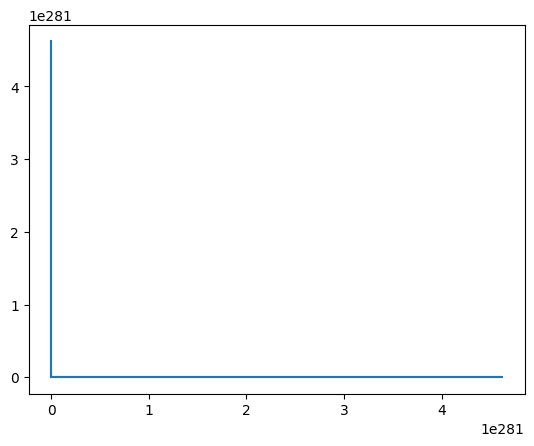

832th iteration, 761.8790730643445


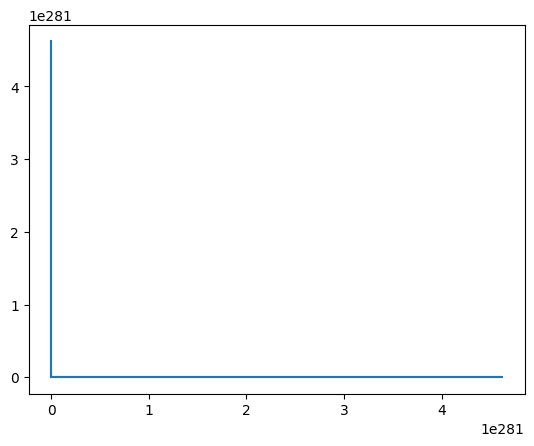

833th iteration, 761.8749813304074


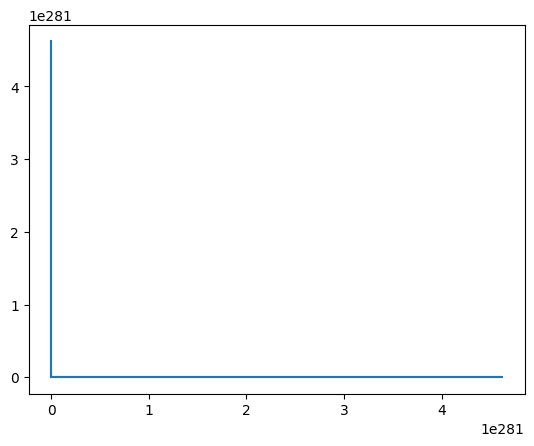

834th iteration, 761.8708896336789


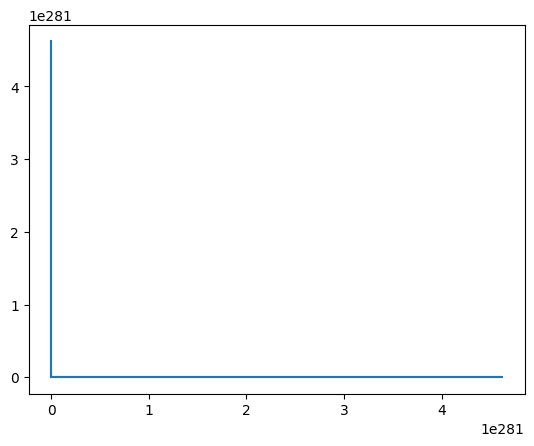

835th iteration, 761.8667979741581


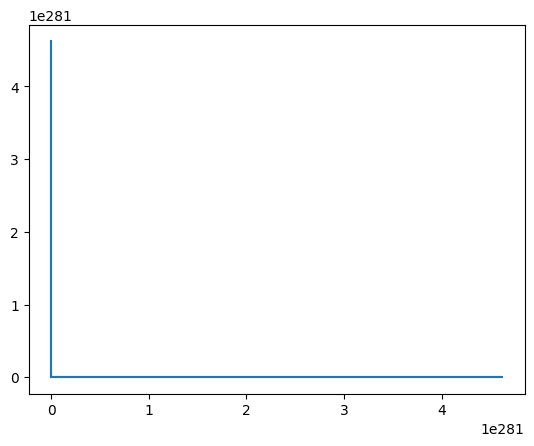

836th iteration, 761.8627063518451


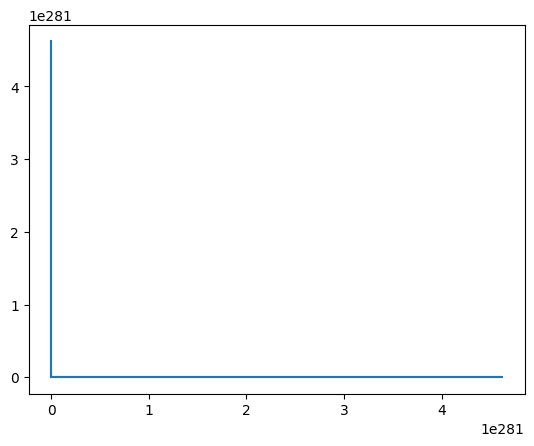

837th iteration, 761.8586147667396


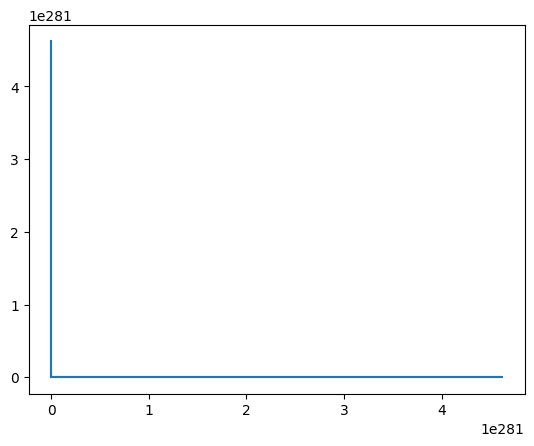

838th iteration, 761.8545232188404


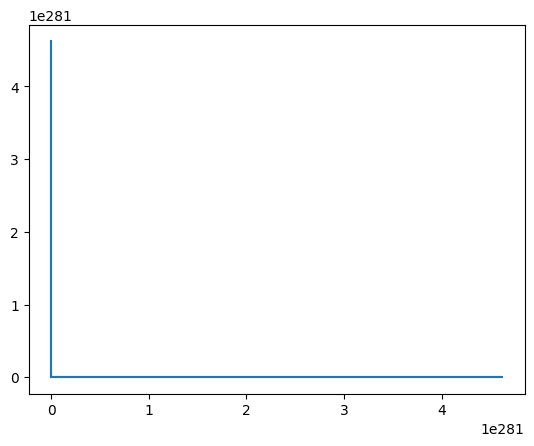

839th iteration, 761.8504317081475


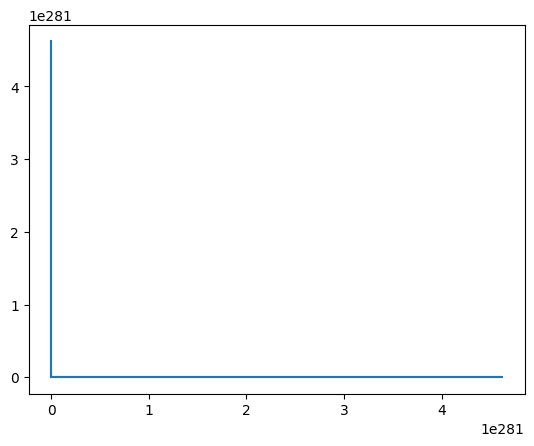

840th iteration, 761.8463402346608


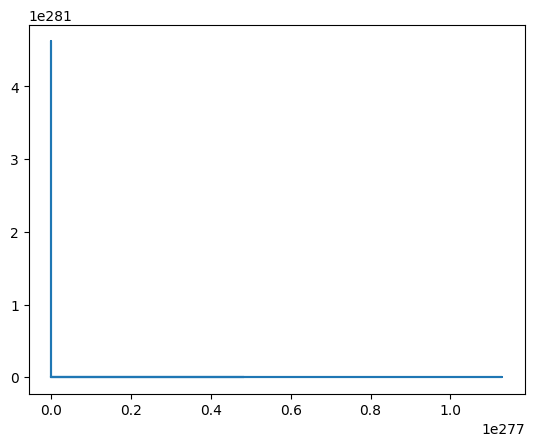

841th iteration, 761.84224879838


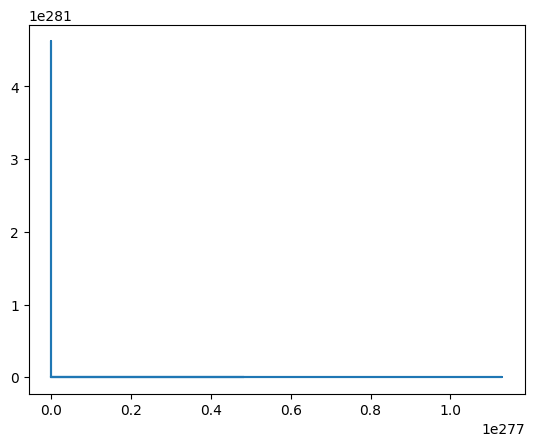

842th iteration, 761.8381573993046


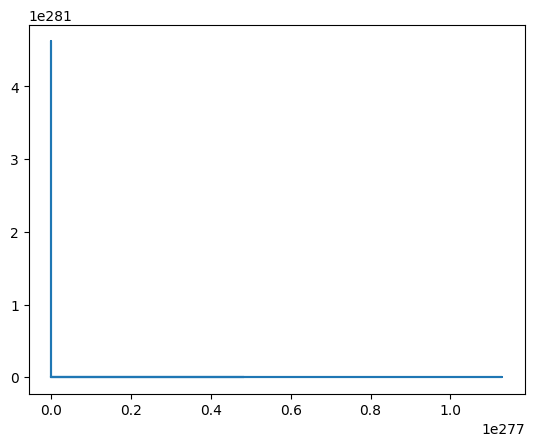

843th iteration, 761.8340660374342


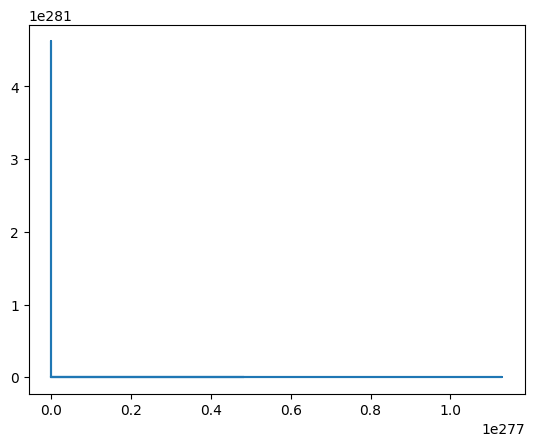

844th iteration, 761.8299747127686


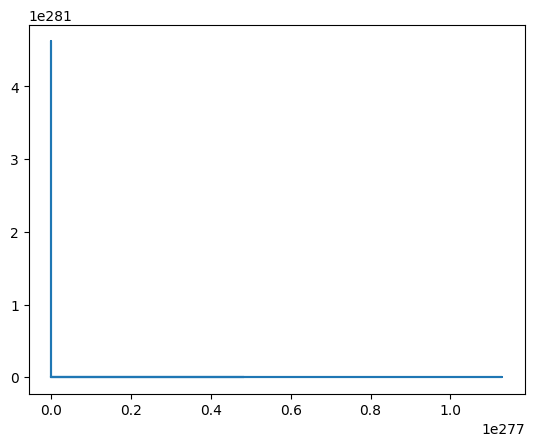

845th iteration, 761.8258834253069


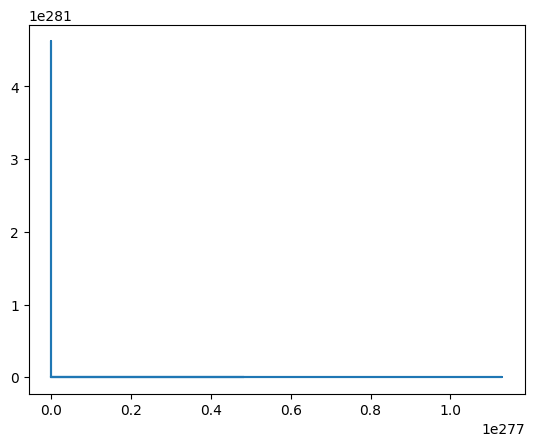

846th iteration, 761.8217921750493


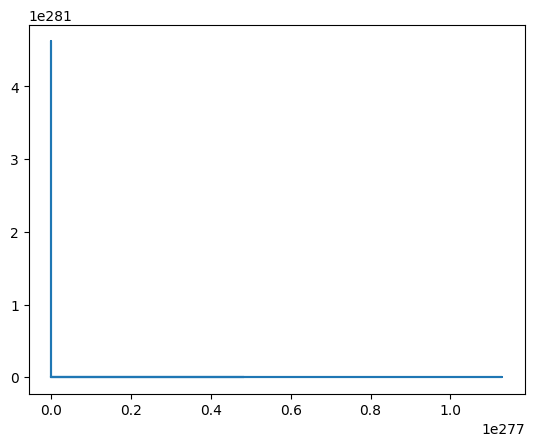

847th iteration, 761.8177009619948


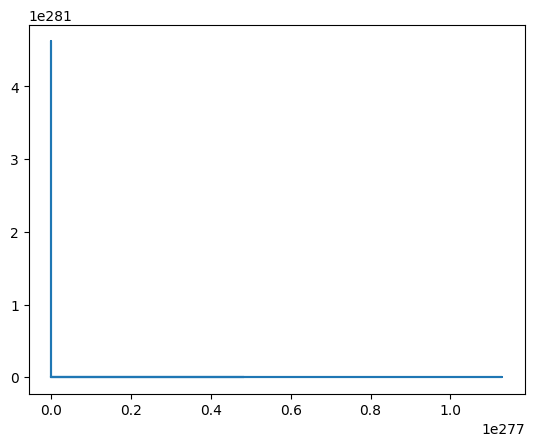

848th iteration, 761.8136097861437


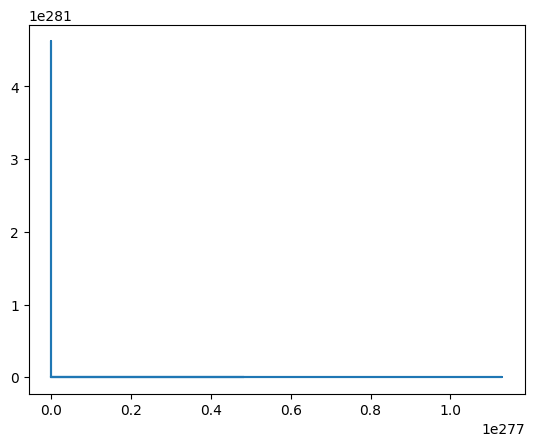

849th iteration, 761.8095186474952


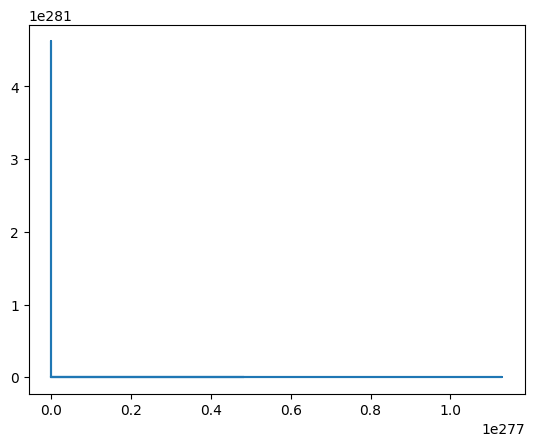

850th iteration, 761.8054275460489


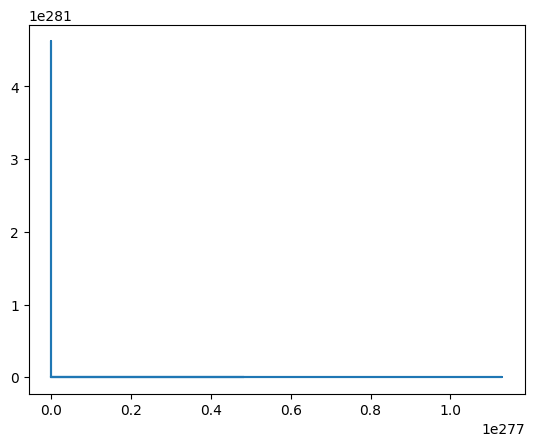

851th iteration, 761.8013364818049


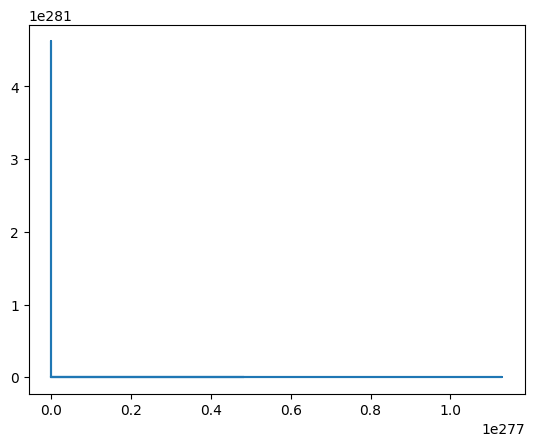

852th iteration, 761.7972454547619


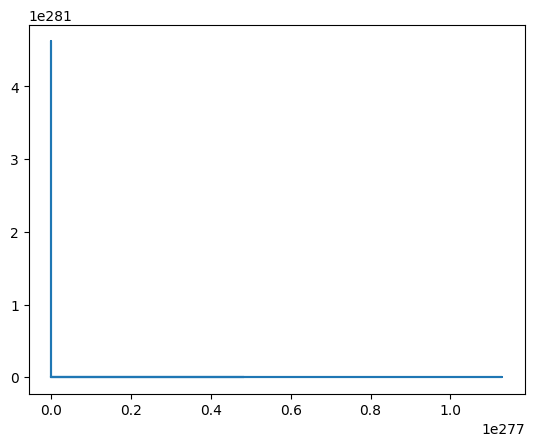

853th iteration, 761.7931544649207


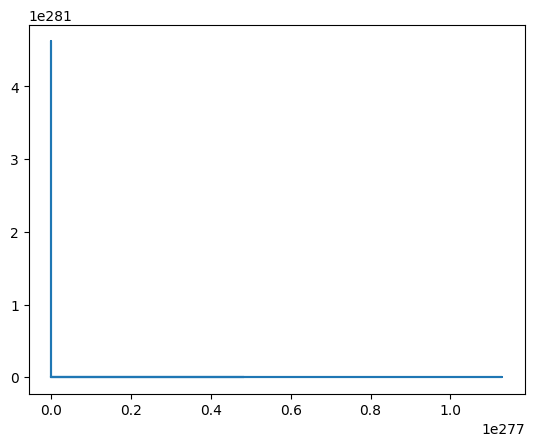

854th iteration, 761.7890635122801


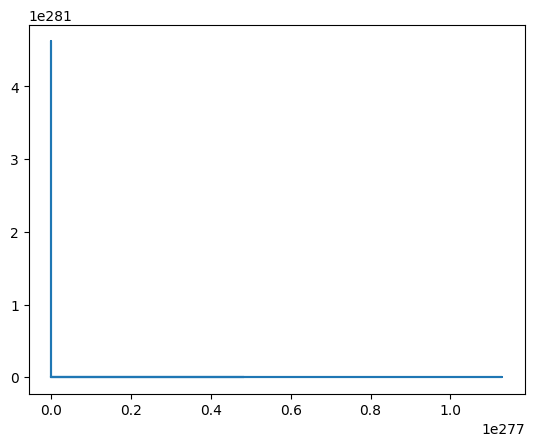

855th iteration, 761.7849725968401


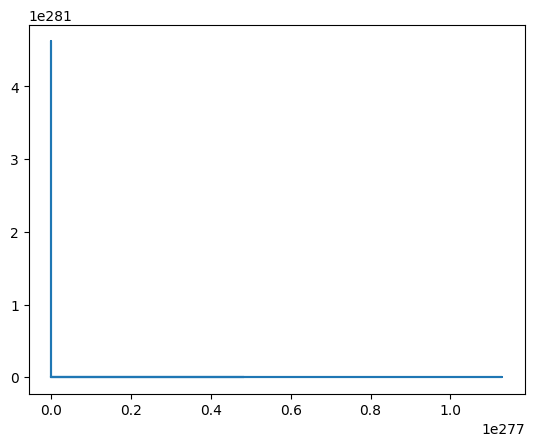

856th iteration, 761.7808817185995


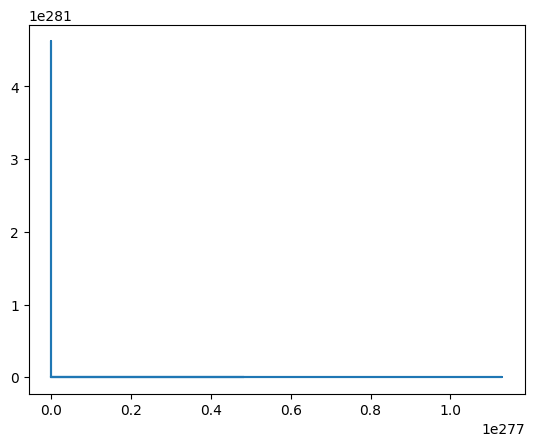

857th iteration, 761.7767908775592


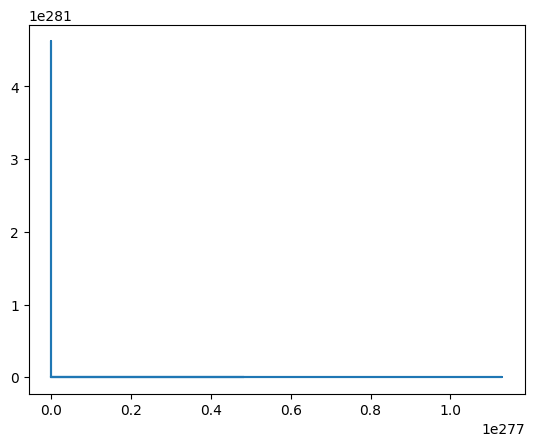

858th iteration, 761.7727000737178


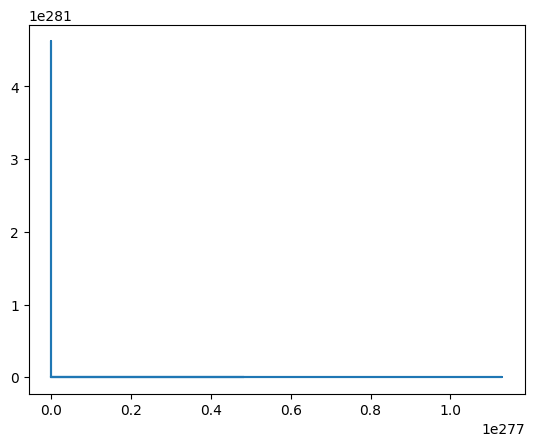

859th iteration, 761.7686093070754


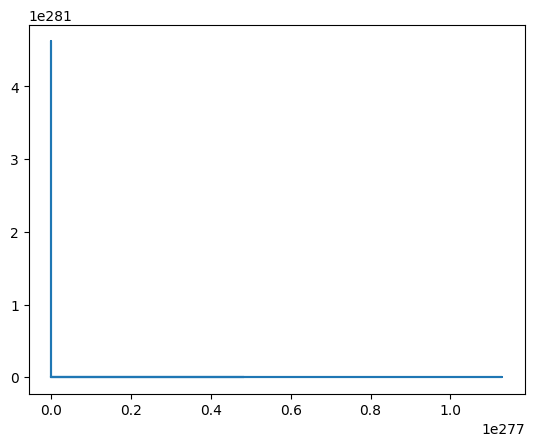

860th iteration, 761.7645185776316


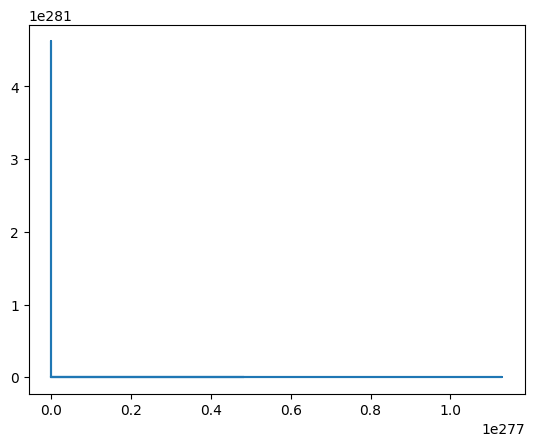

861th iteration, 761.7604278853861


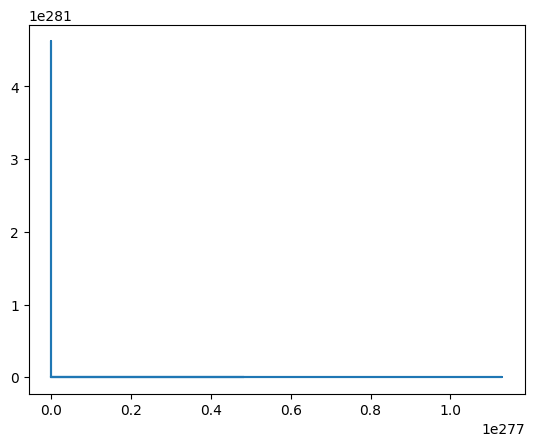

862th iteration, 761.7563372303384


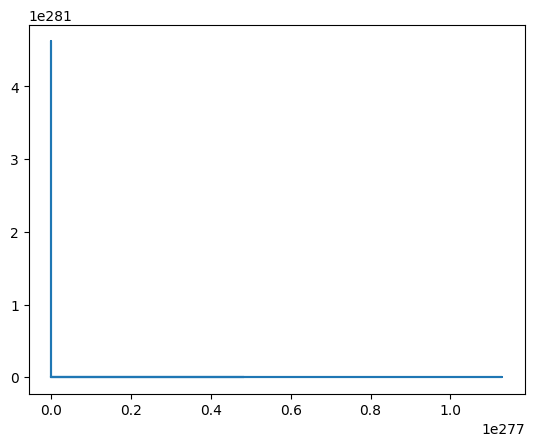

863th iteration, 761.7522466124883


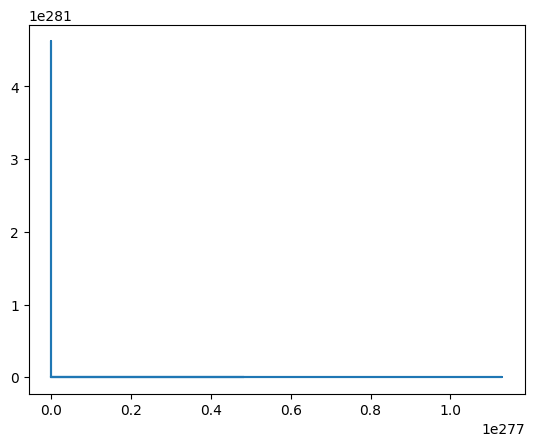

864th iteration, 761.7481560318354


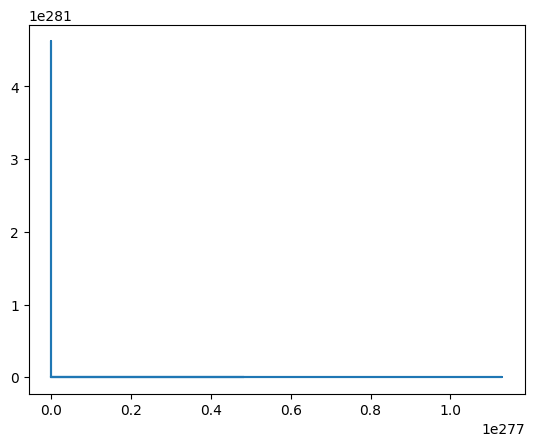

865th iteration, 761.7440654883791


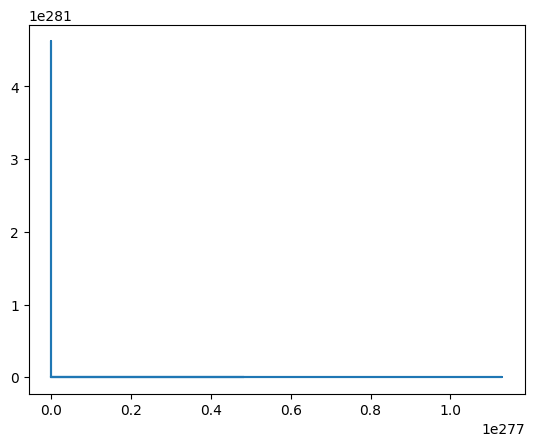

866th iteration, 761.739974982119


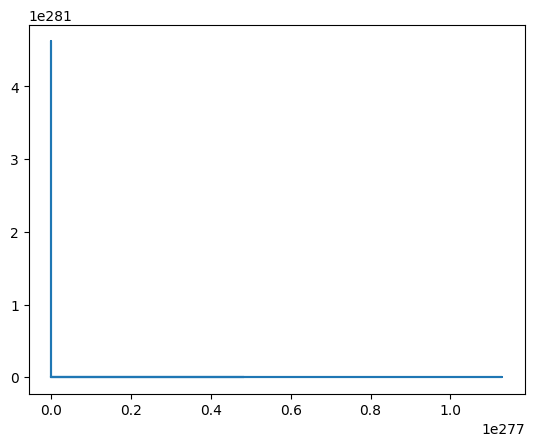

867th iteration, 761.7358845130549


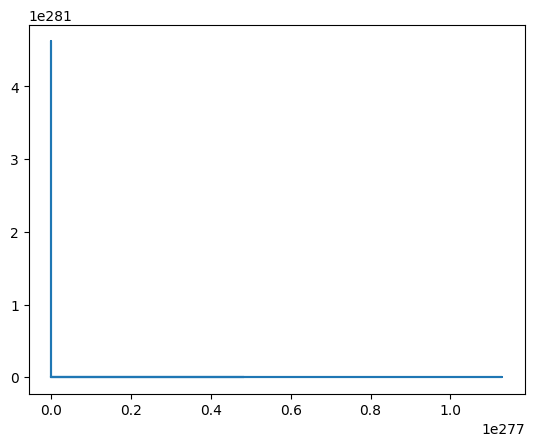

868th iteration, 761.7317940811863


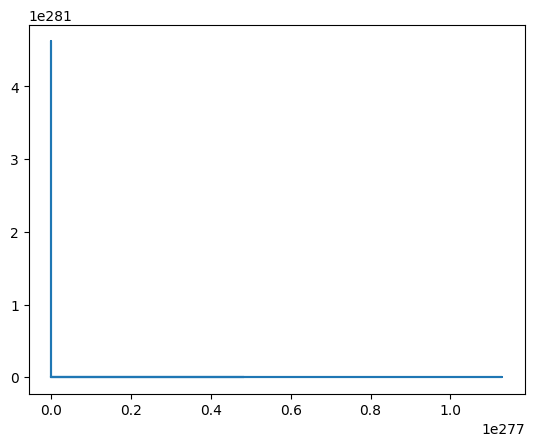

869th iteration, 761.727703686513


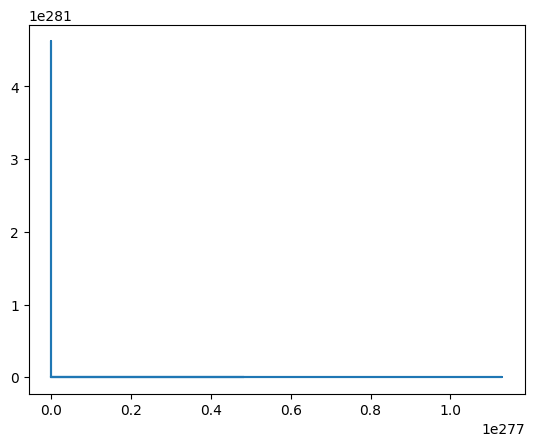

870th iteration, 761.7236133290346


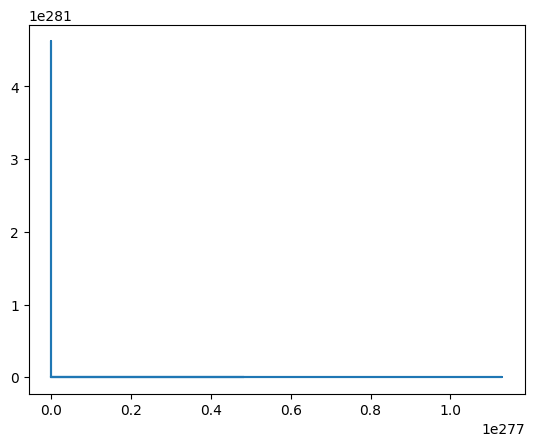

871th iteration, 761.7195230087502


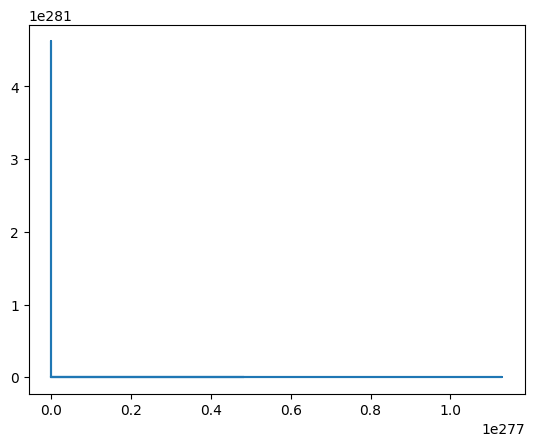

872th iteration, 761.7154327256603


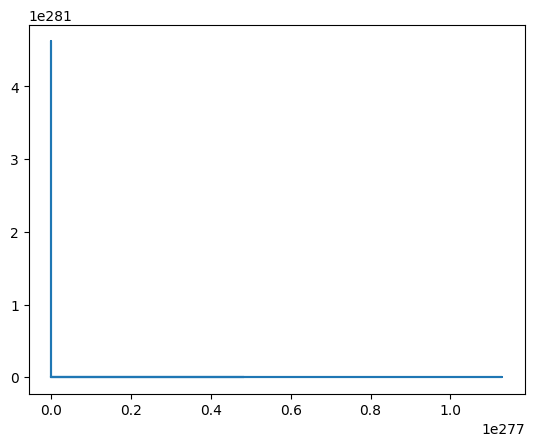

873th iteration, 761.7113424797641


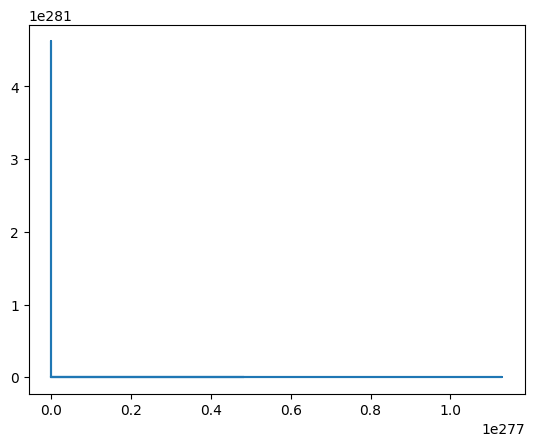

874th iteration, 761.7072522710611


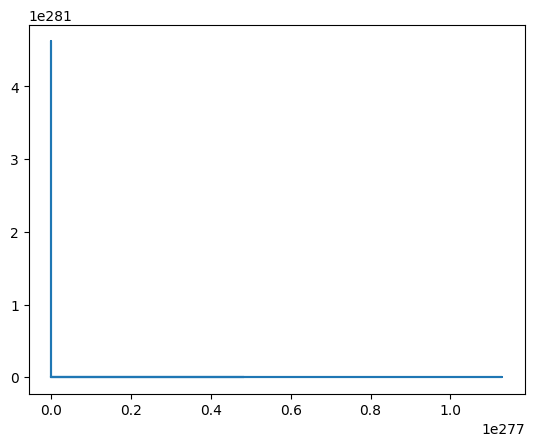

875th iteration, 761.7031620995505


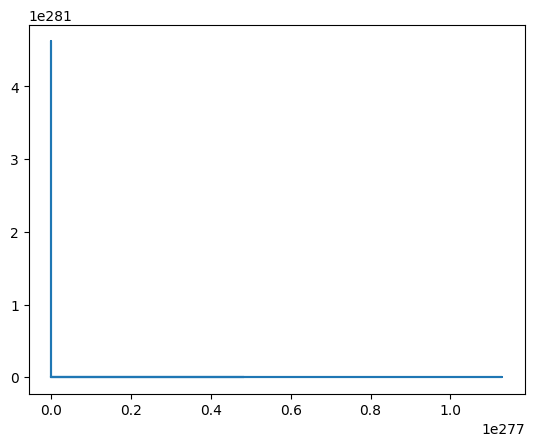

876th iteration, 761.6990719652329


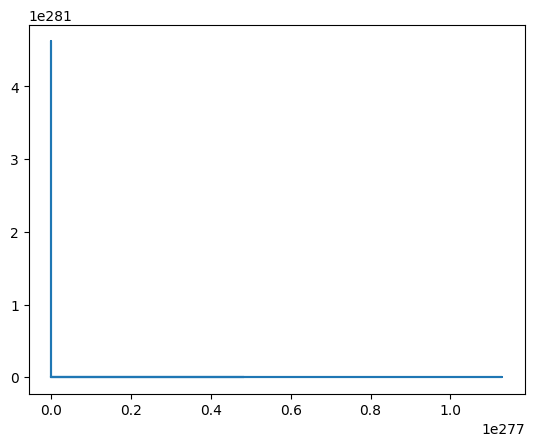

877th iteration, 761.6949818681072


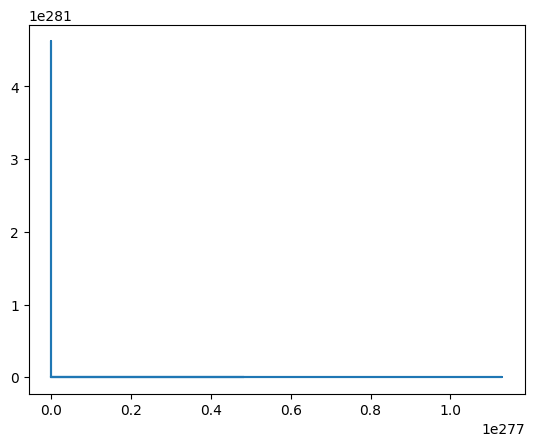

878th iteration, 761.6908918081733


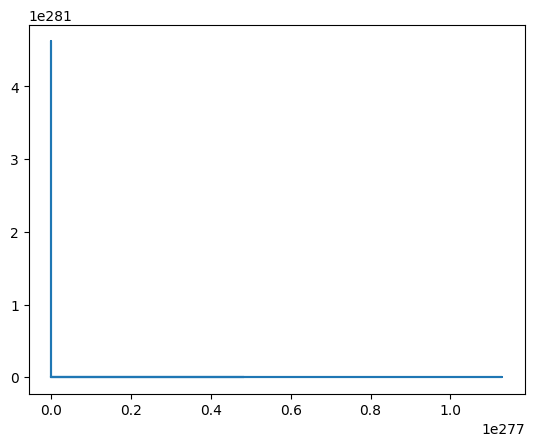

879th iteration, 761.6868017854307


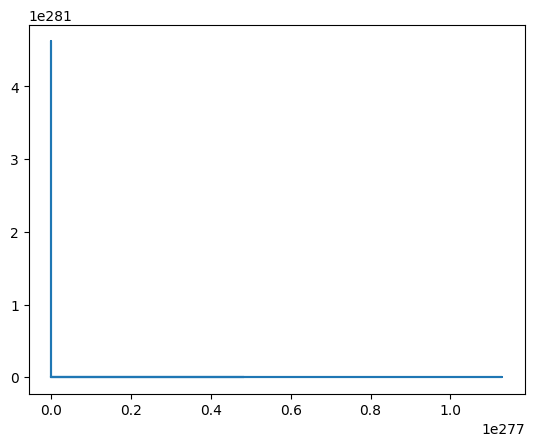

880th iteration, 761.6827117998796


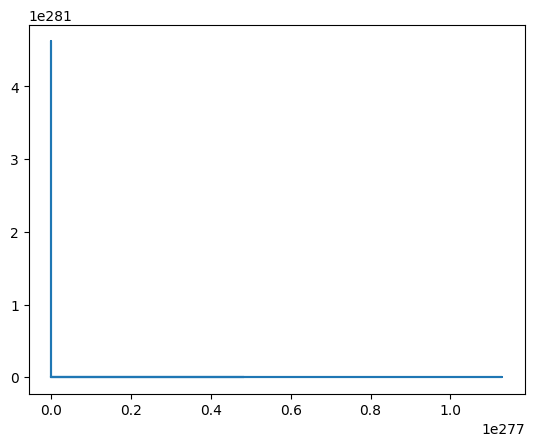

881th iteration, 761.6786218515194


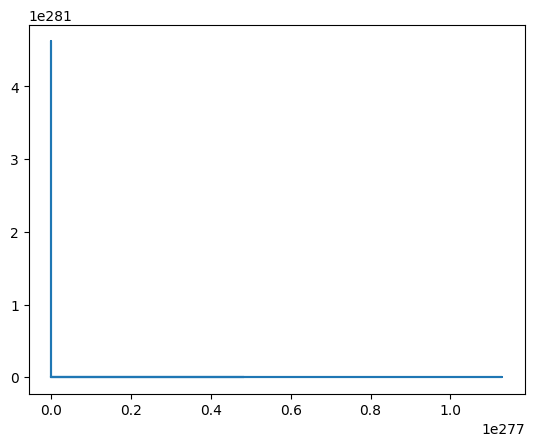

882th iteration, 761.6745319403492


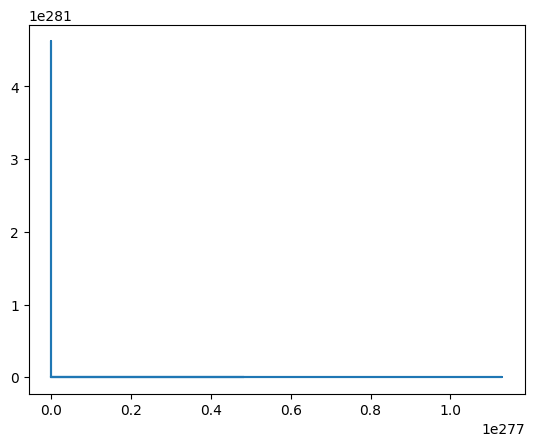

883th iteration, 761.6704420663689


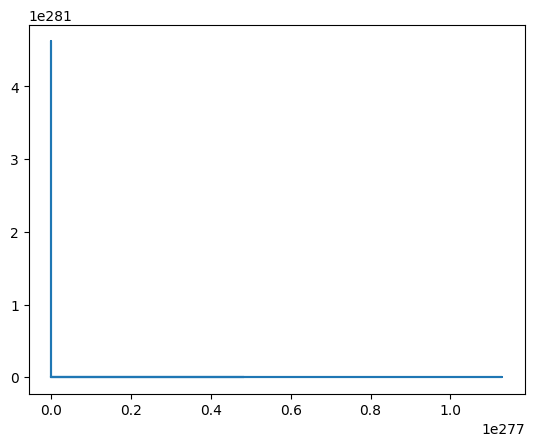

884th iteration, 761.6663522295784


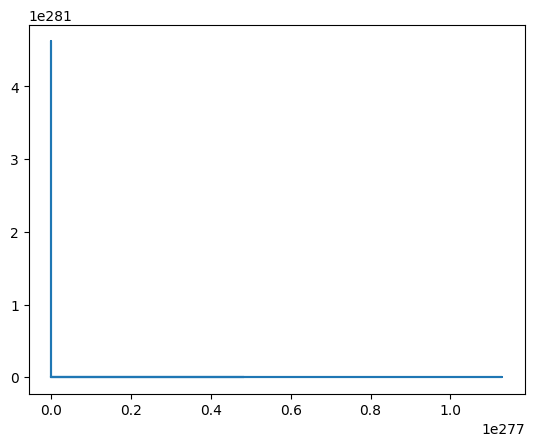

885th iteration, 761.6622624299765


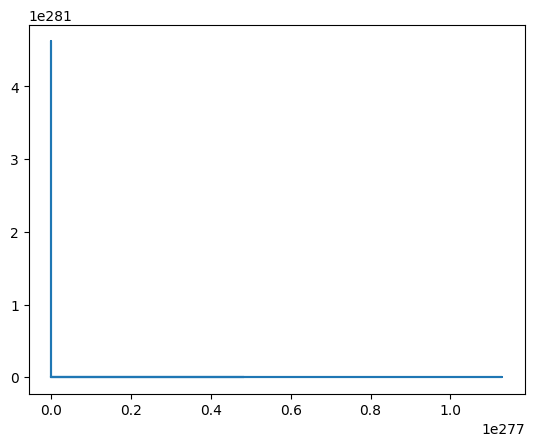

886th iteration, 761.6581726675639


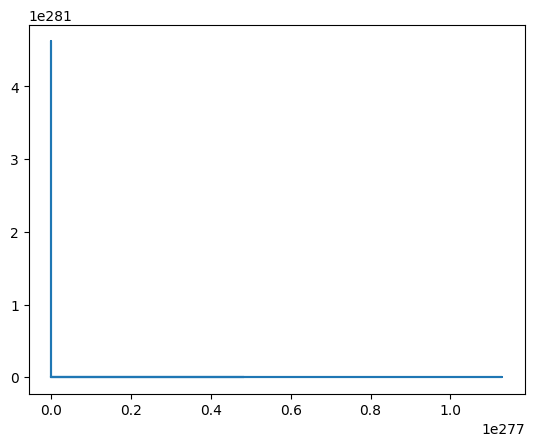

887th iteration, 761.6540829423396


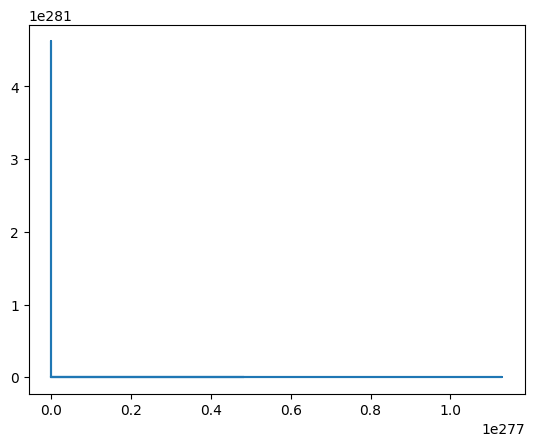

888th iteration, 761.6499932543031


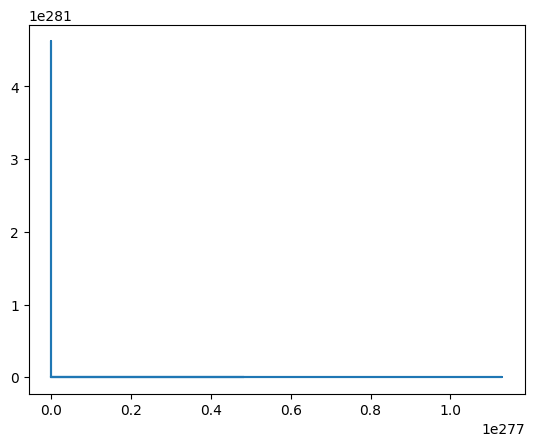

889th iteration, 761.6459036034546


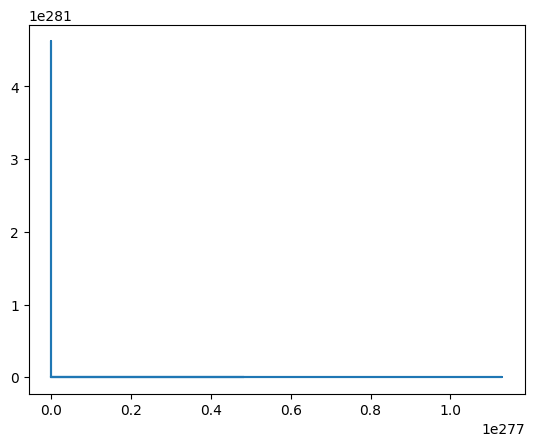

890th iteration, 761.641813989793


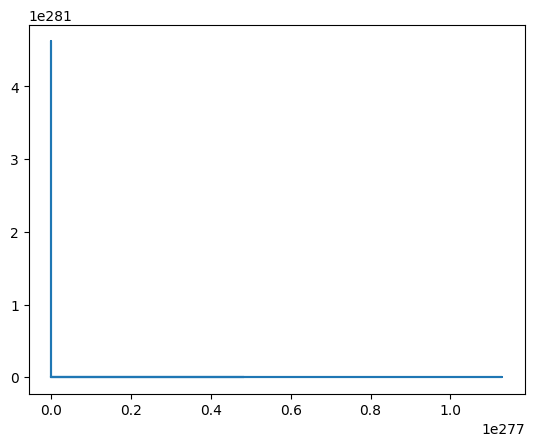

891th iteration, 761.6377244133186


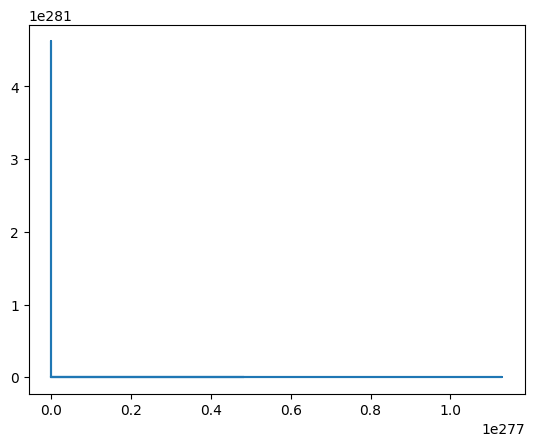

892th iteration, 761.6336348740307


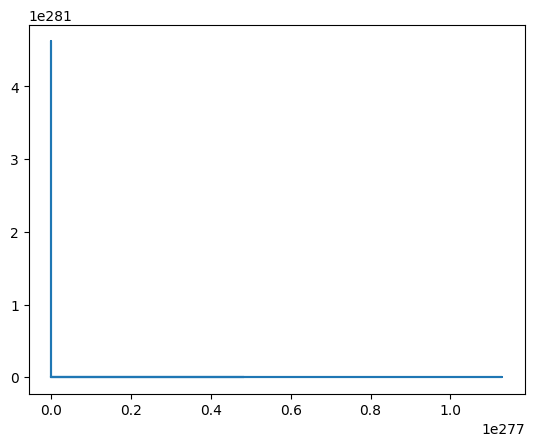

893th iteration, 761.629545371929


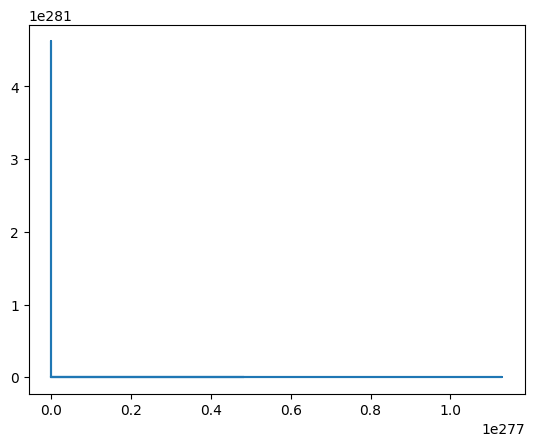

894th iteration, 761.6254559070131


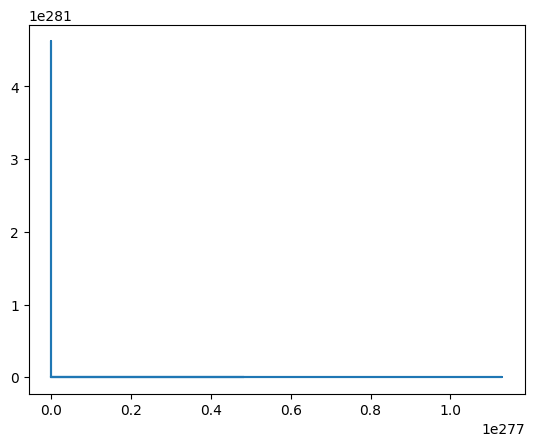

895th iteration, 761.6213664792824


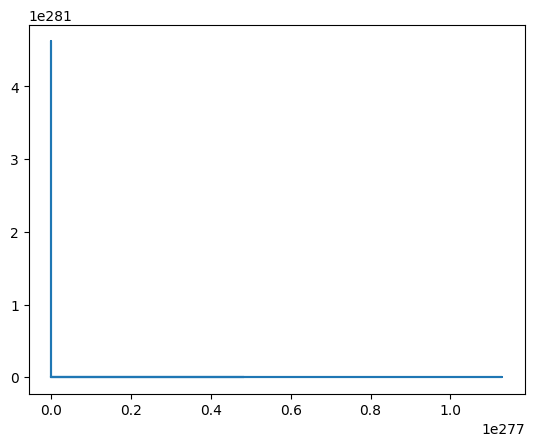

896th iteration, 761.6172770887372


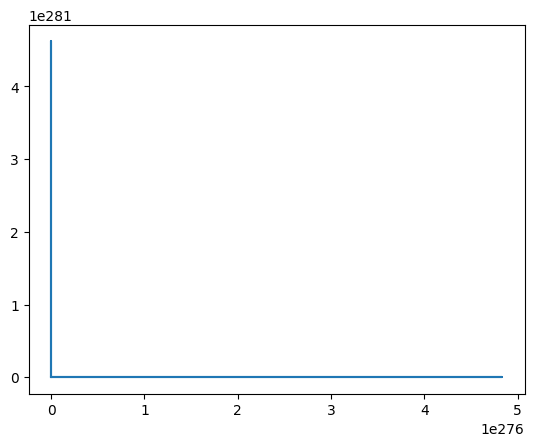

897th iteration, 761.6131877353764


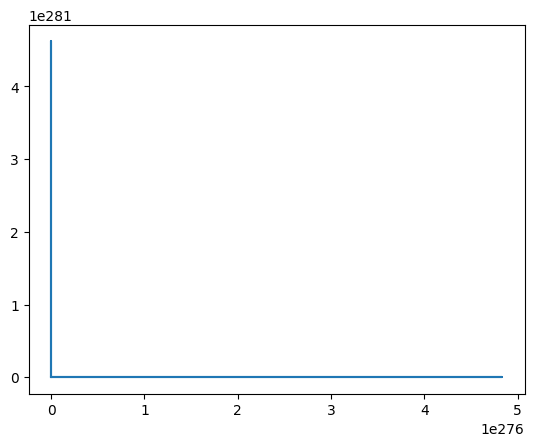

898th iteration, 761.6090984192


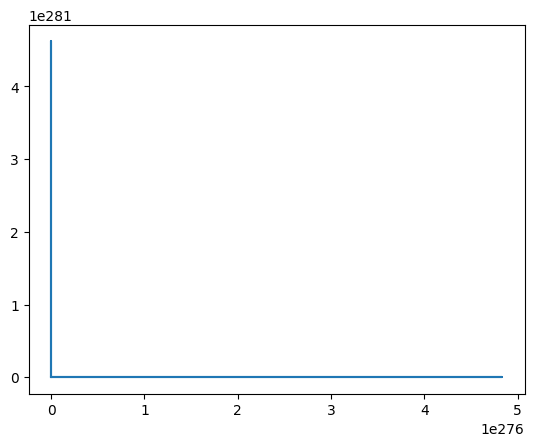

899th iteration, 761.6050091402072


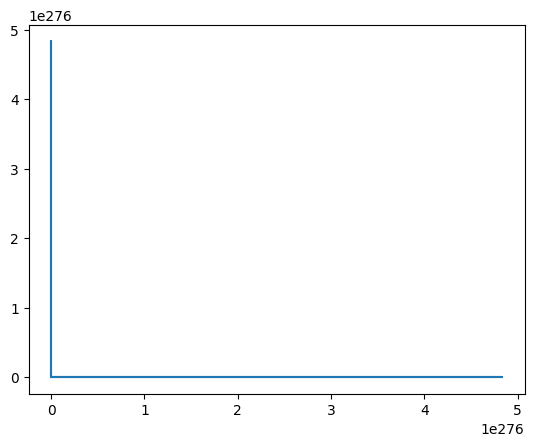

900th iteration, 761.6009198983984


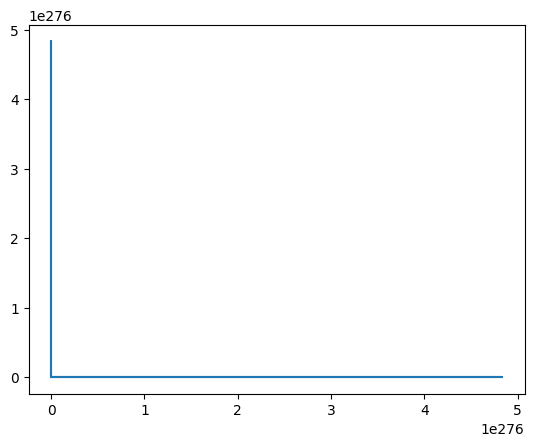

901th iteration, 761.5968306937722


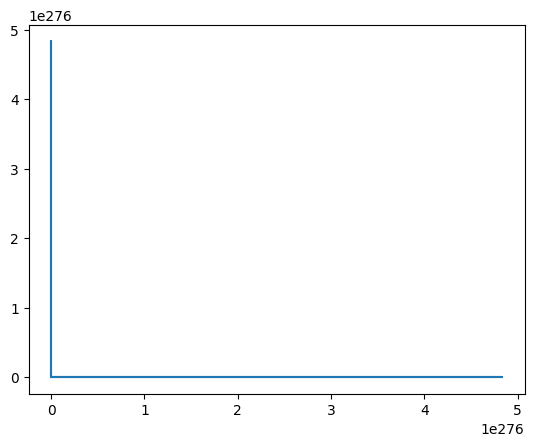

902th iteration, 761.5927415263288


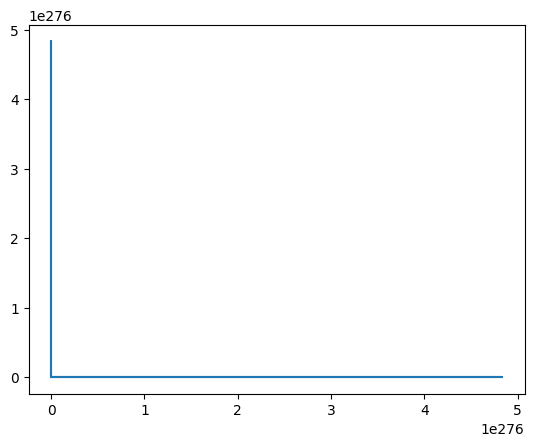

903th iteration, 761.588652396068


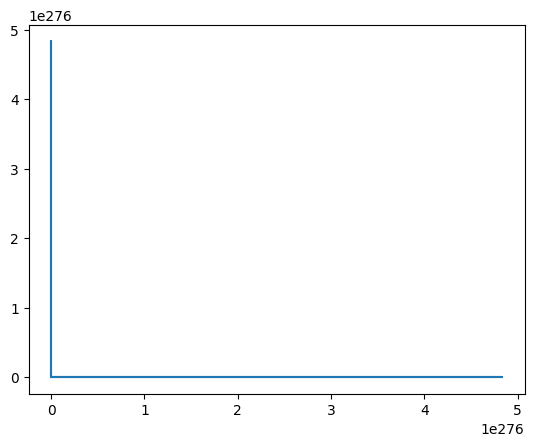

904th iteration, 761.5845633029894


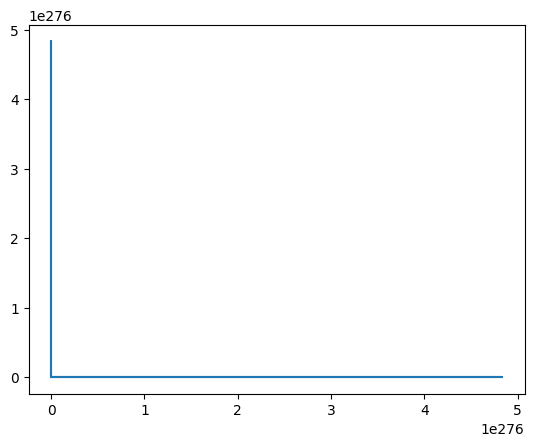

905th iteration, 761.5804742470923


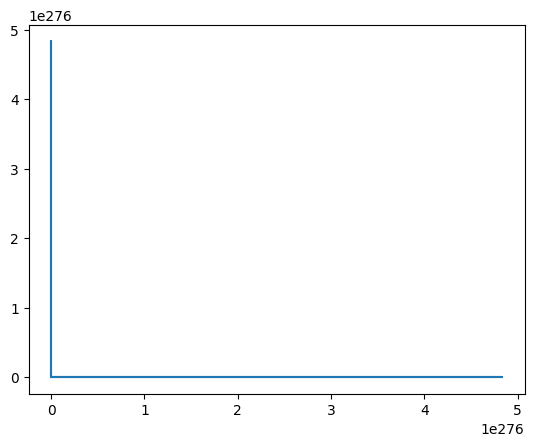

906th iteration, 761.5763852283761


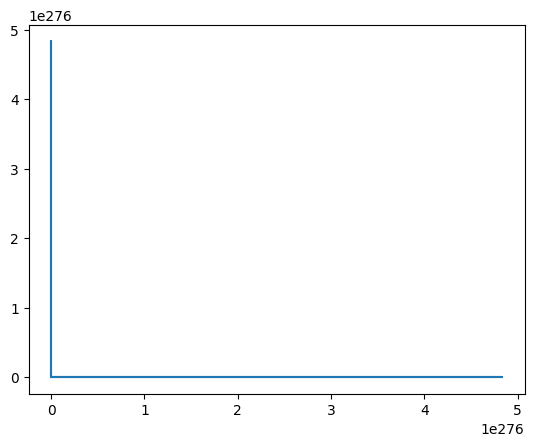

907th iteration, 761.5722962468416


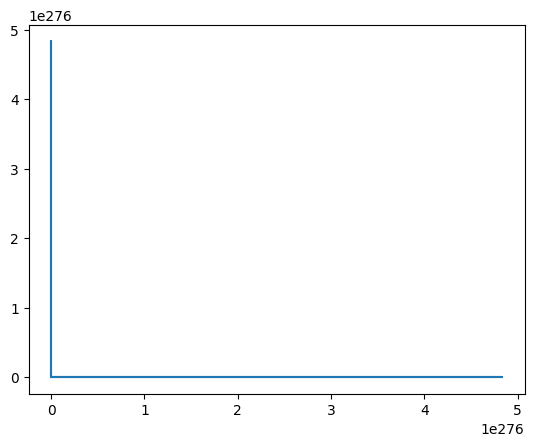

908th iteration, 761.568207302487


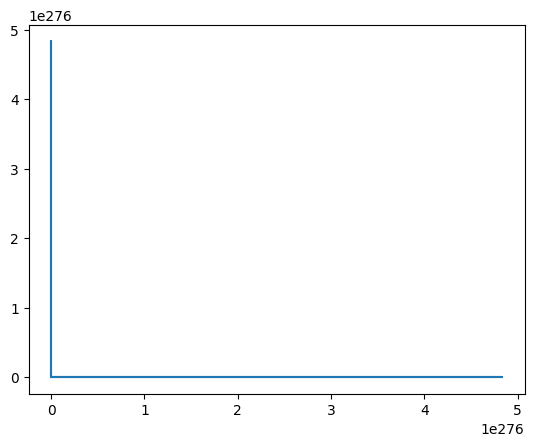

909th iteration, 761.5641183953128


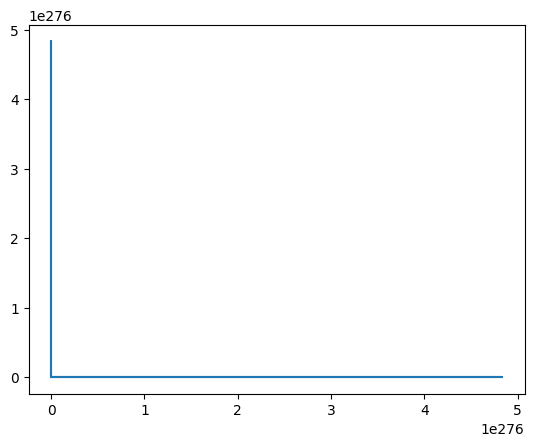

910th iteration, 761.5600295253182


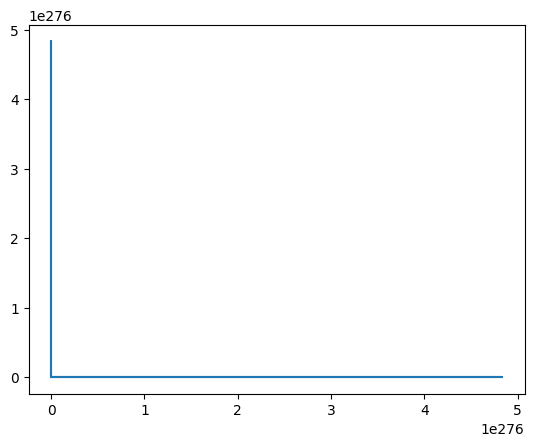

911th iteration, 761.5559406925036


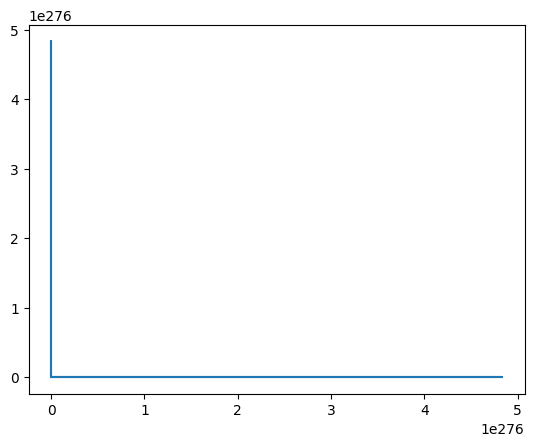

912th iteration, 761.5518518968676


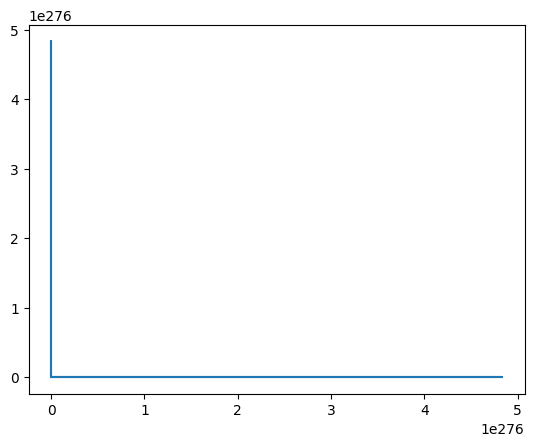

913th iteration, 761.5477631384101


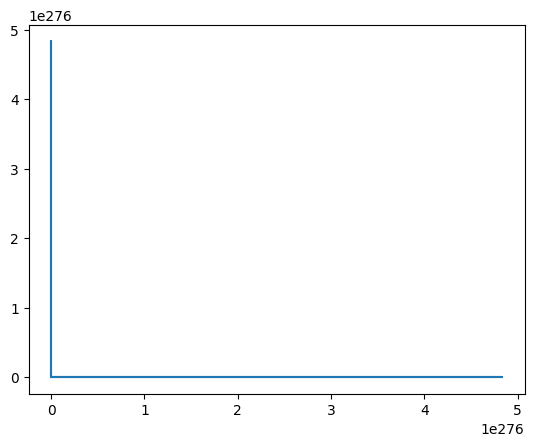

914th iteration, 761.5436744171312


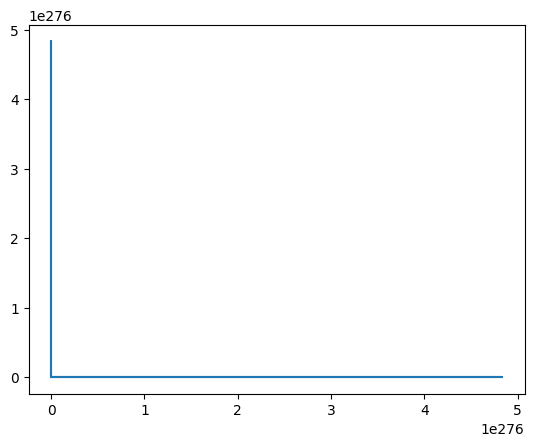

915th iteration, 761.53958573303


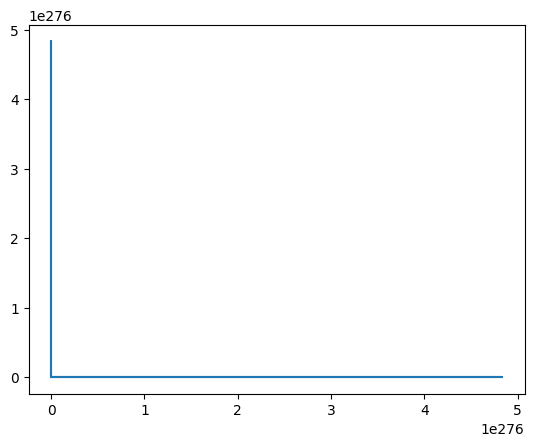

916th iteration, 761.535497086106


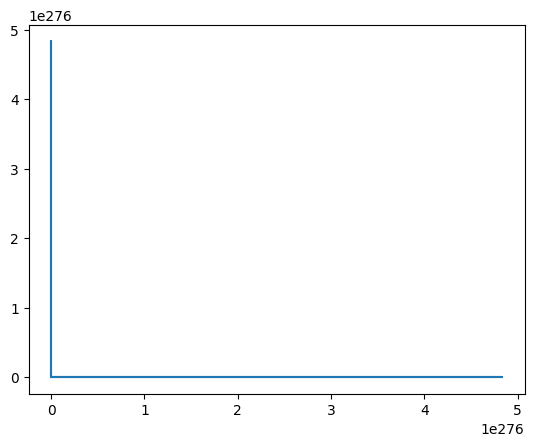

917th iteration, 761.5314084763593


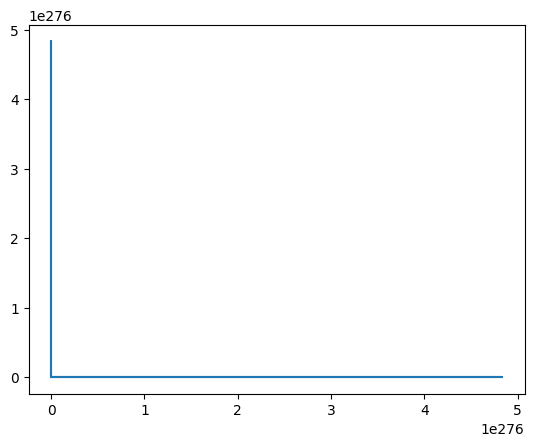

918th iteration, 761.5273199037895


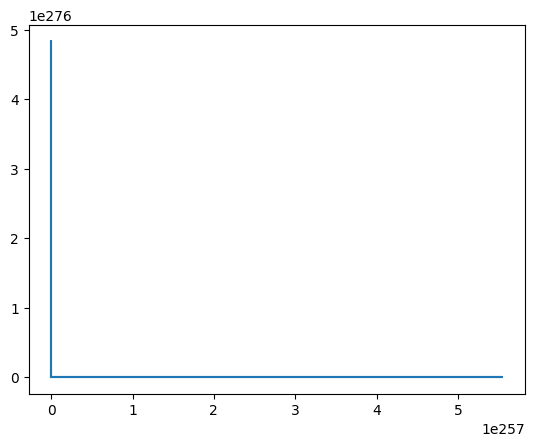

919th iteration, 761.5232313683966


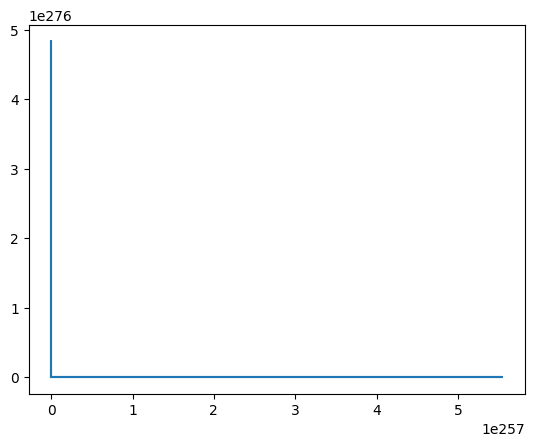

920th iteration, 761.5191428701793


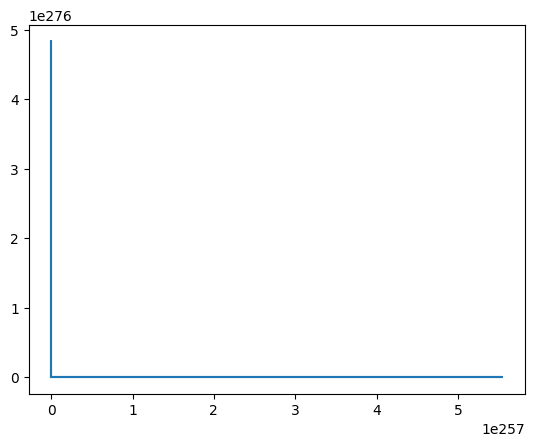

921th iteration, 761.5150544091377


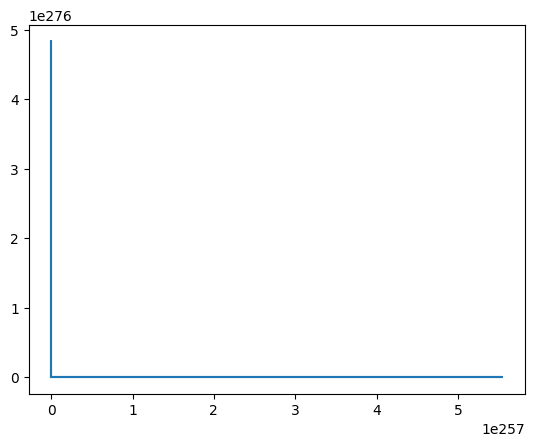

922th iteration, 761.5109659852714


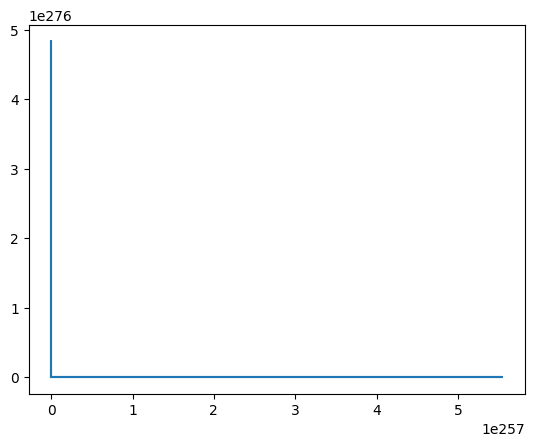

923th iteration, 761.5068775985801


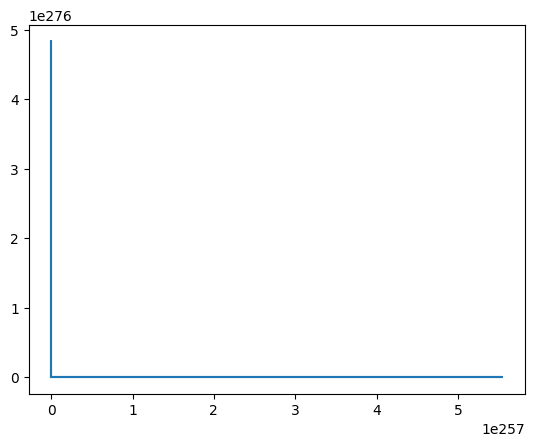

924th iteration, 761.5027892490631


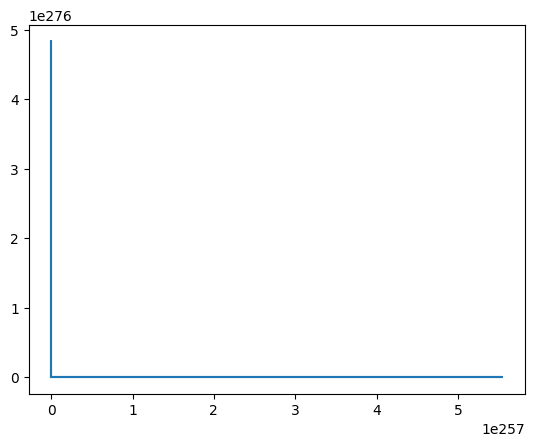

925th iteration, 761.4987009367201


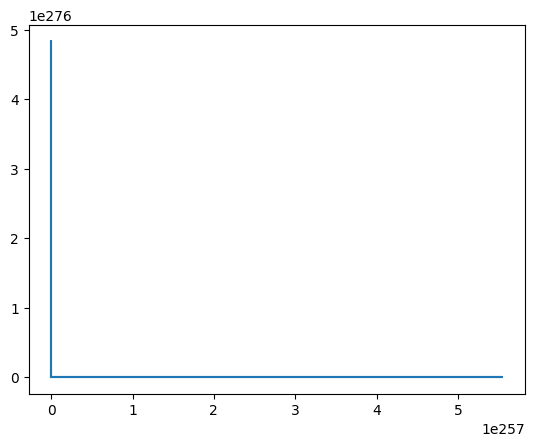

926th iteration, 761.494612661551


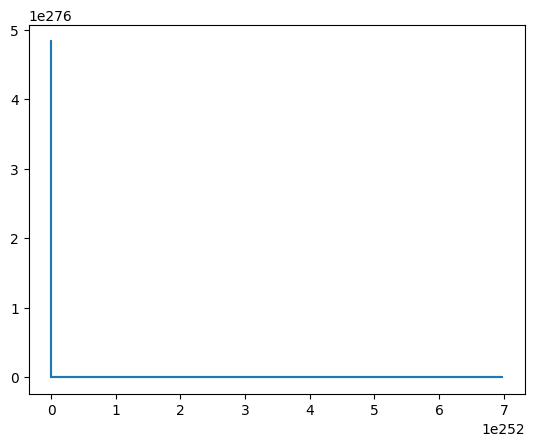

927th iteration, 761.490524423555


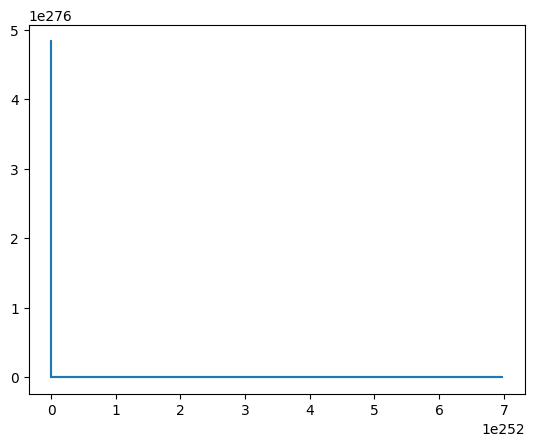

928th iteration, 761.4864362227326


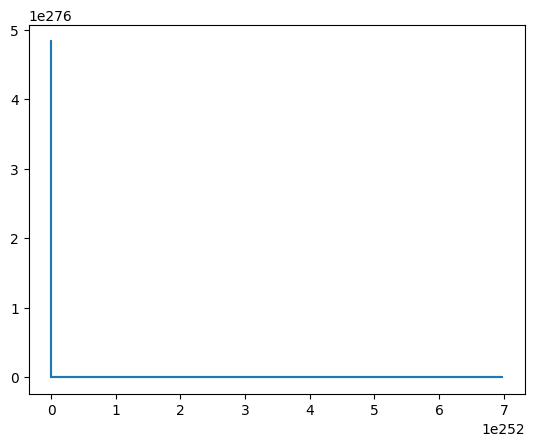

929th iteration, 761.4823480590824


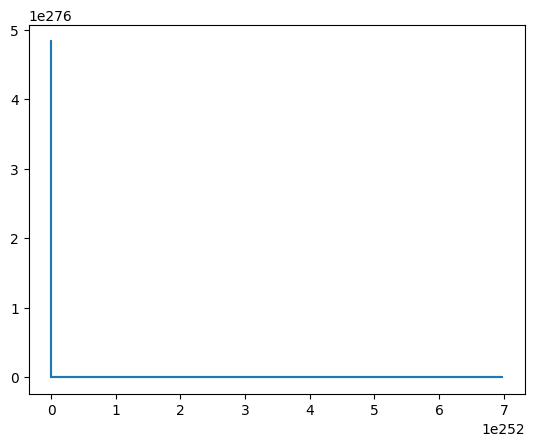

930th iteration, 761.478259932605


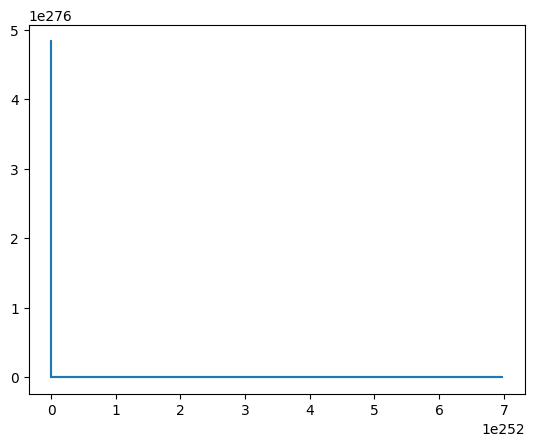

931th iteration, 761.4741718432995


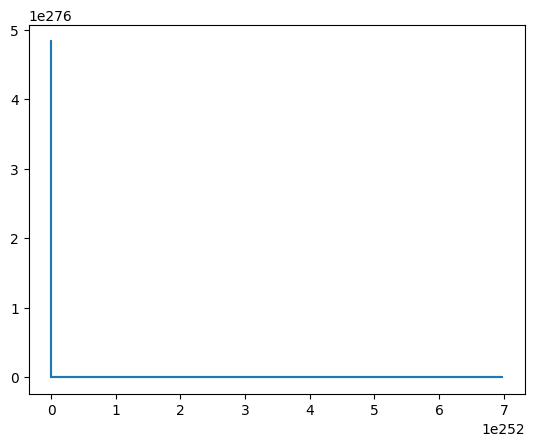

932th iteration, 761.4700837911652


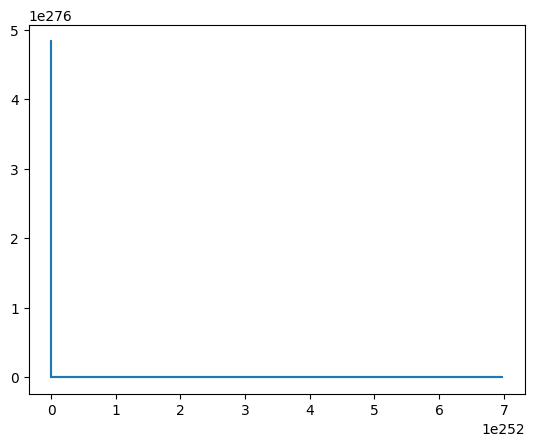

933th iteration, 761.4659957762019


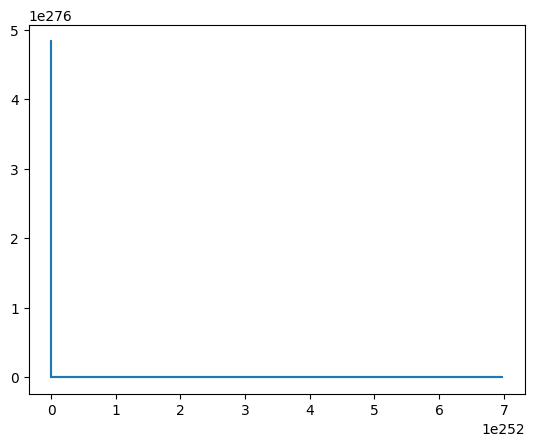

934th iteration, 761.4619077984094


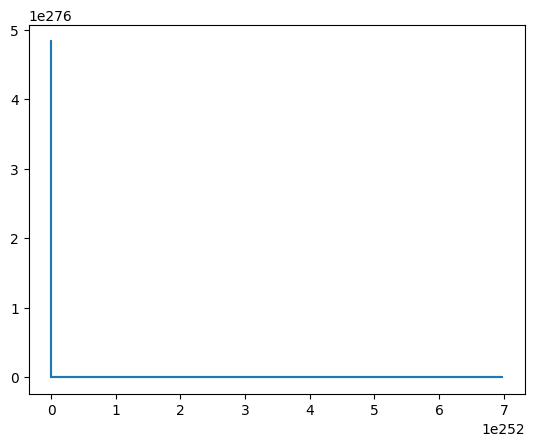

935th iteration, 761.4578198577876


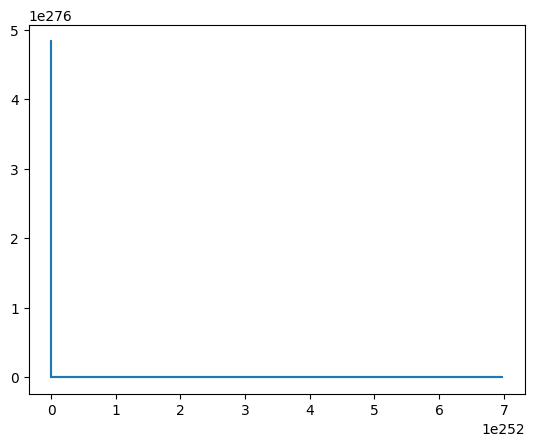

936th iteration, 761.4537319543359


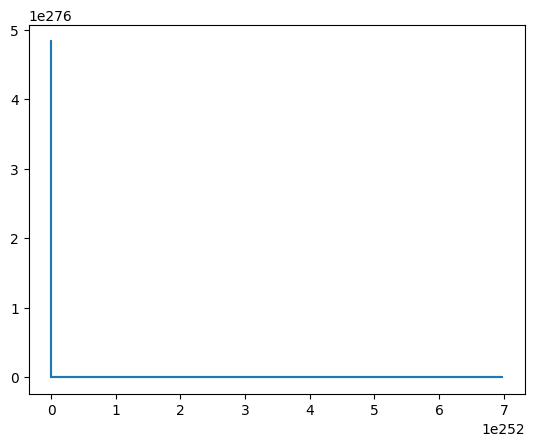

937th iteration, 761.4496440880534


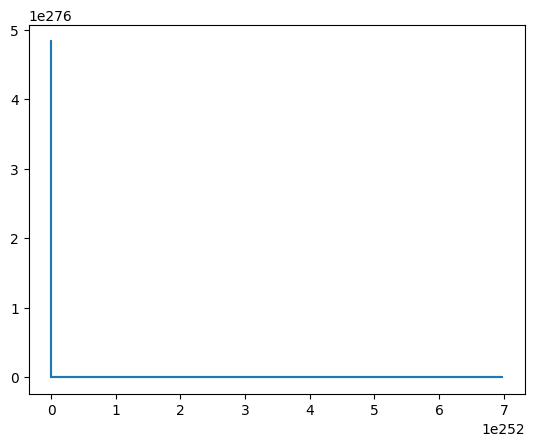

938th iteration, 761.4455562589407


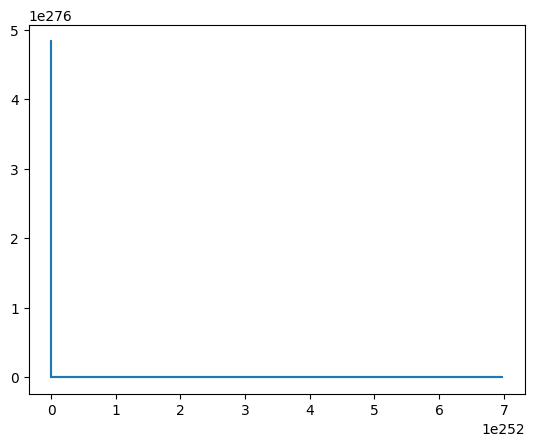

939th iteration, 761.4414684669964


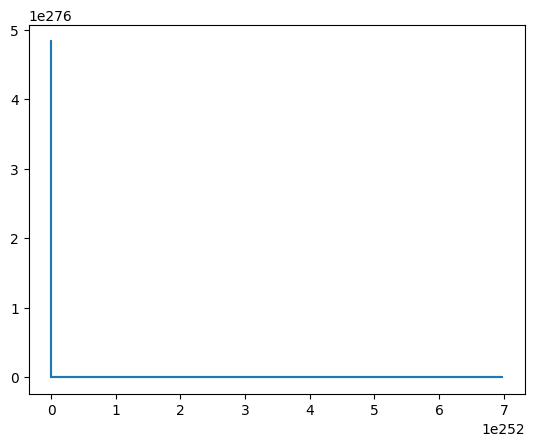

940th iteration, 761.4373807122207


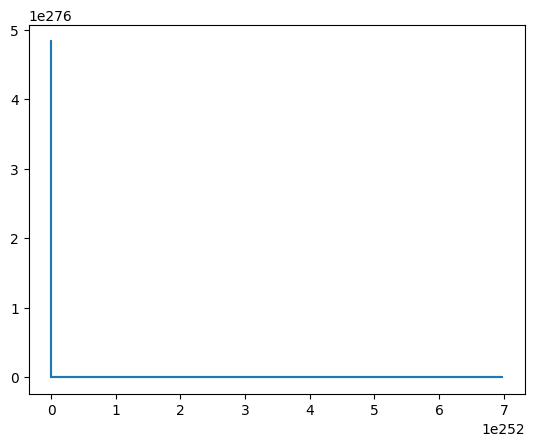

941th iteration, 761.433292994613


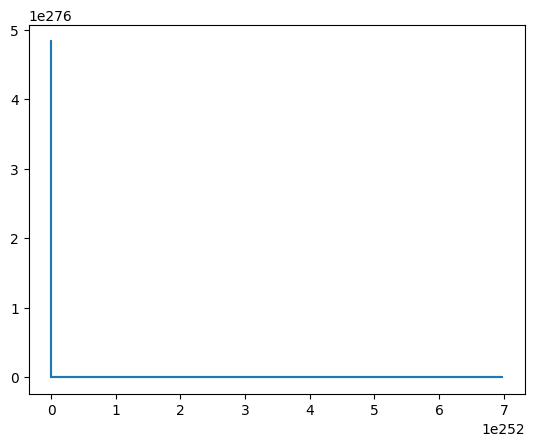

942th iteration, 761.4292053141731


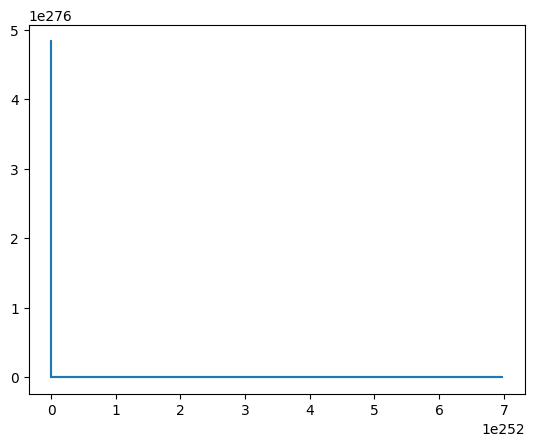

943th iteration, 761.4251176709008


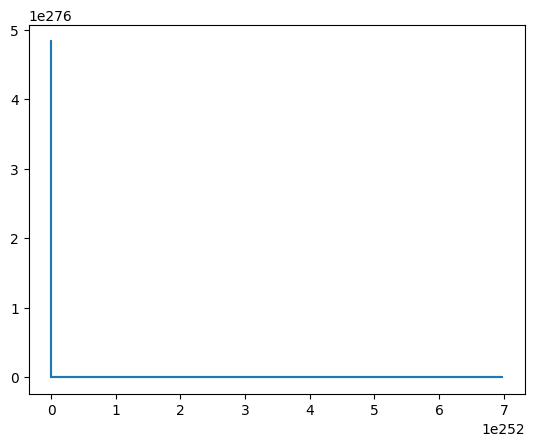

944th iteration, 761.4210300647957


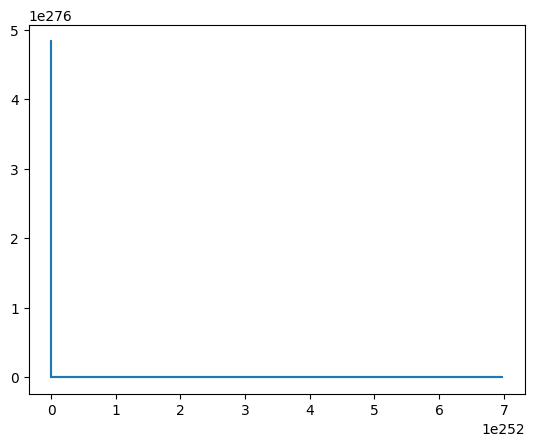

945th iteration, 761.4169424958571


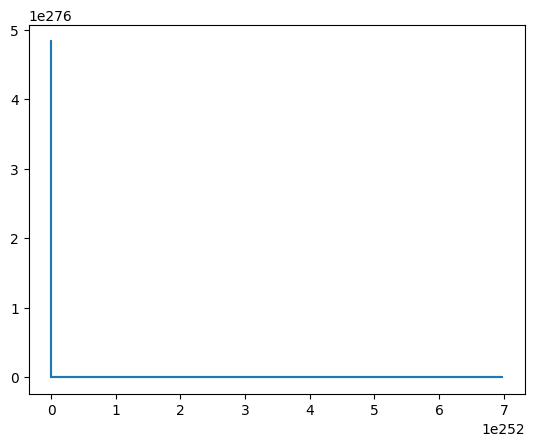

946th iteration, 761.4128549640848


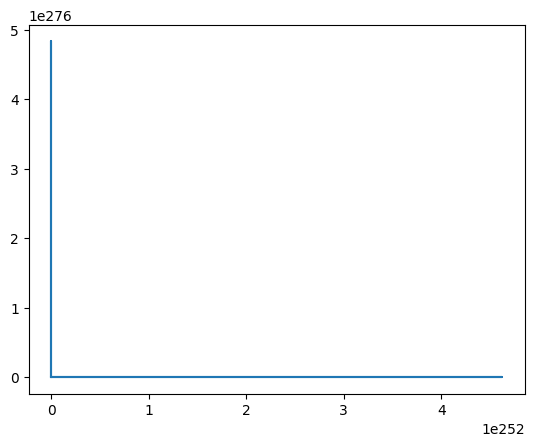

947th iteration, 761.408767469478


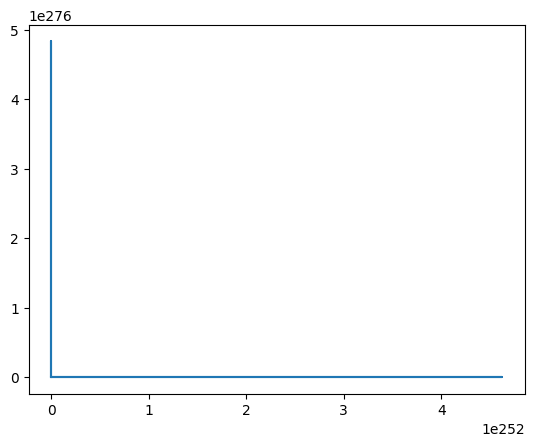

948th iteration, 761.4046800120371


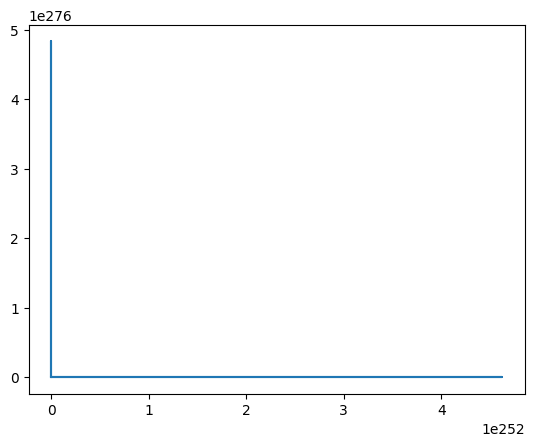

949th iteration, 761.4005925917611


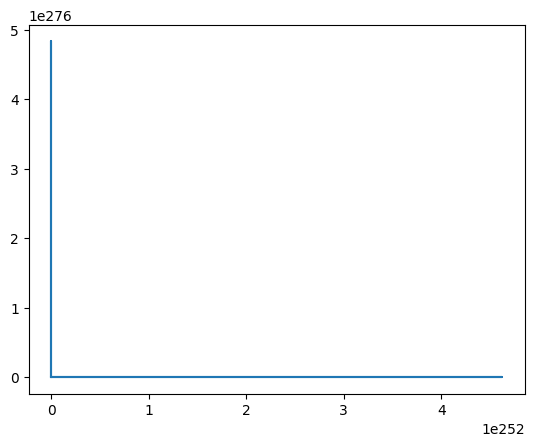

950th iteration, 761.3965052086502


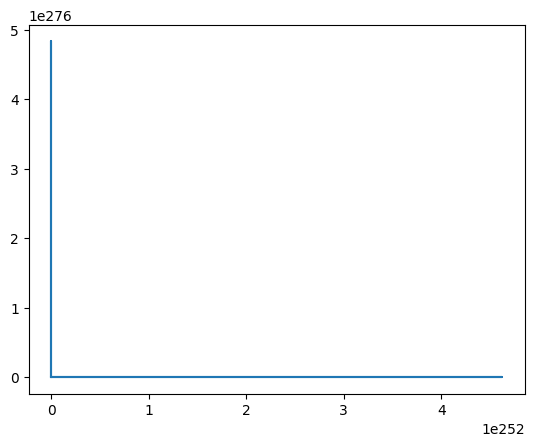

951th iteration, 761.3924178627034


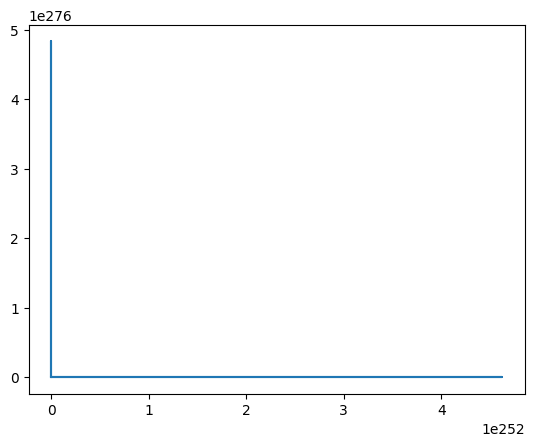

952th iteration, 761.388330553921


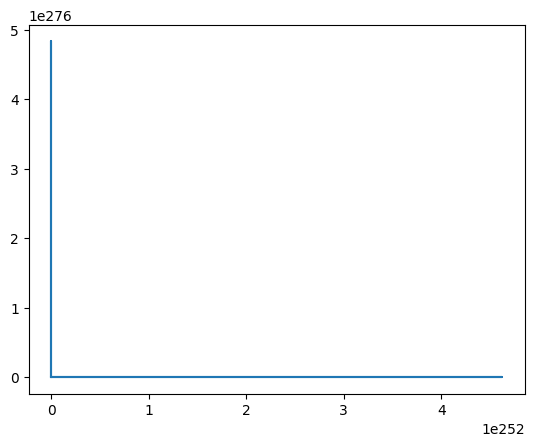

953th iteration, 761.384243282302


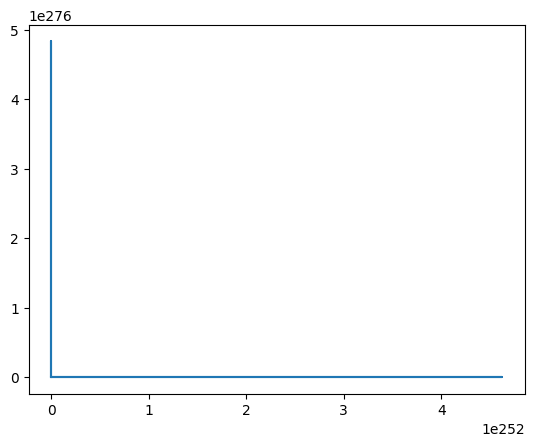

954th iteration, 761.3801560478461


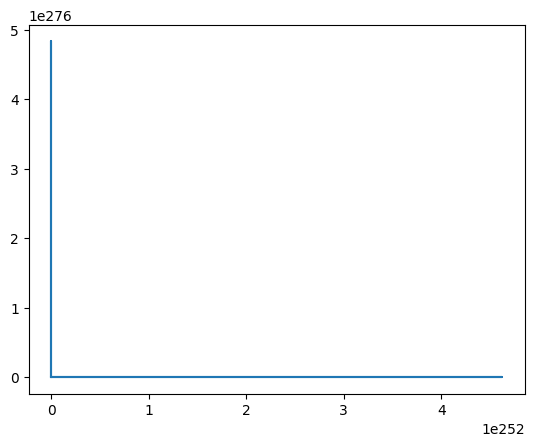

955th iteration, 761.3760688505532


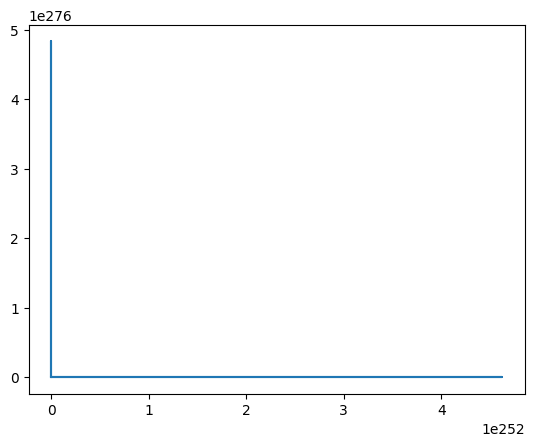

956th iteration, 761.3719816904227


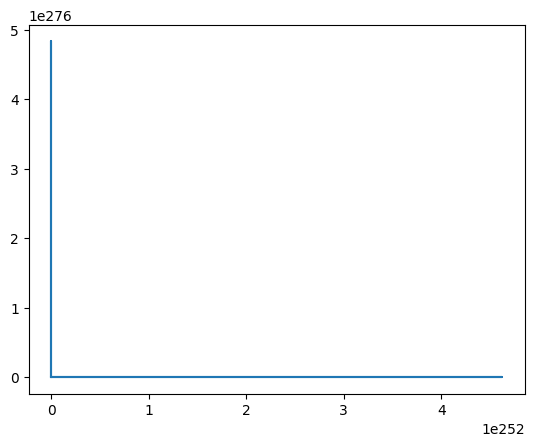

957th iteration, 761.3678945674546


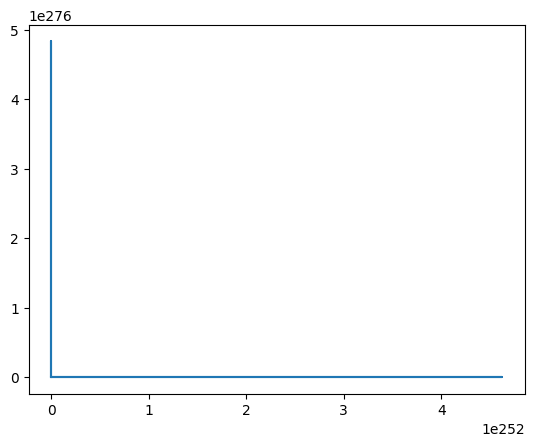

958th iteration, 761.3638074816482


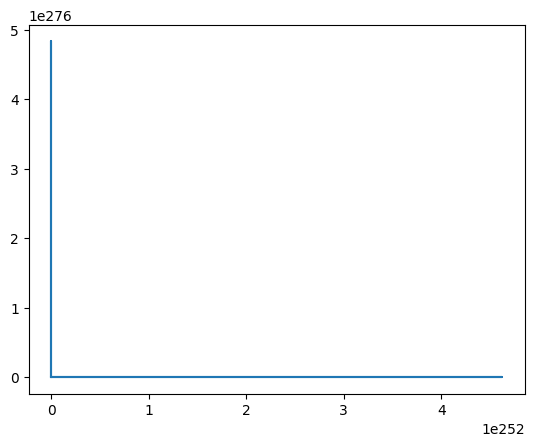

959th iteration, 761.359720433003


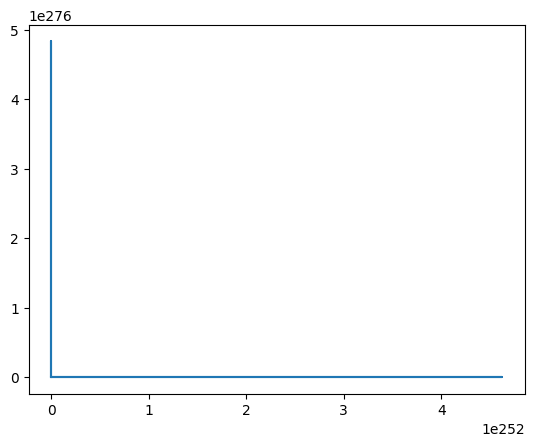

960th iteration, 761.3556334215189


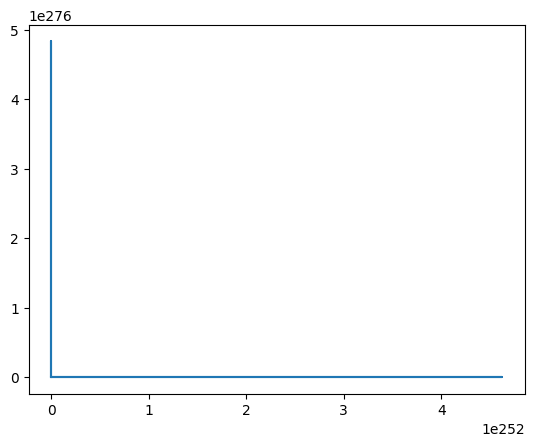

961th iteration, 761.3515464471957


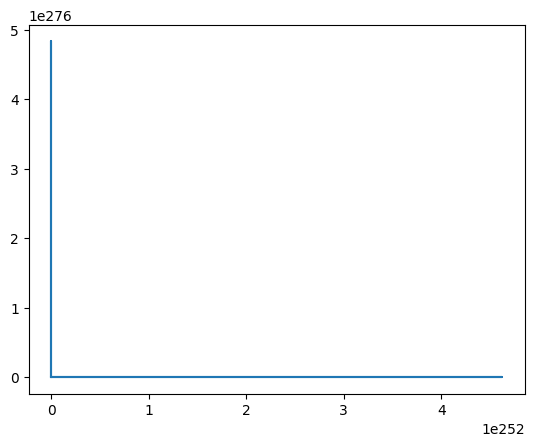

962th iteration, 761.3474595100321


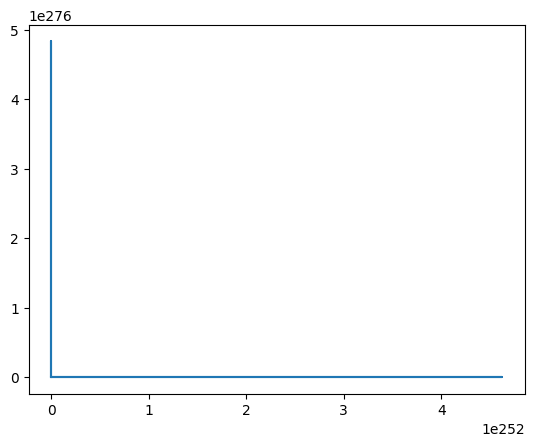

963th iteration, 761.3433726100291


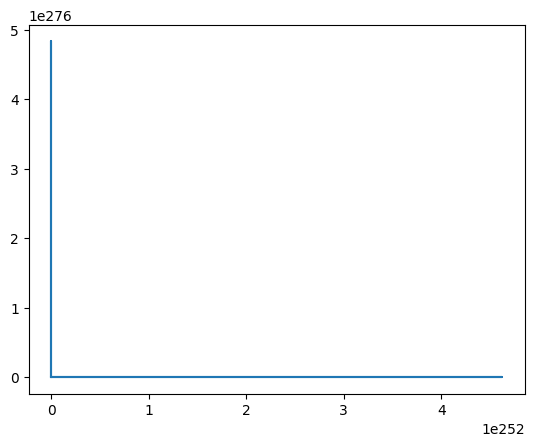

964th iteration, 761.3392857471855


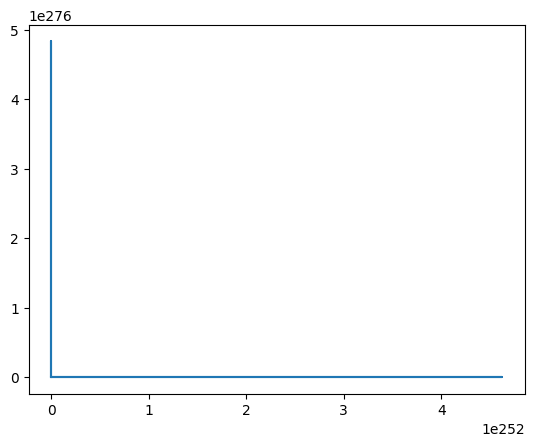

965th iteration, 761.3351989215009


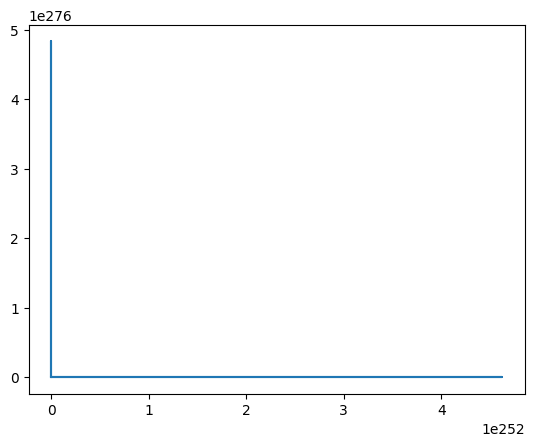

966th iteration, 761.3311121329755


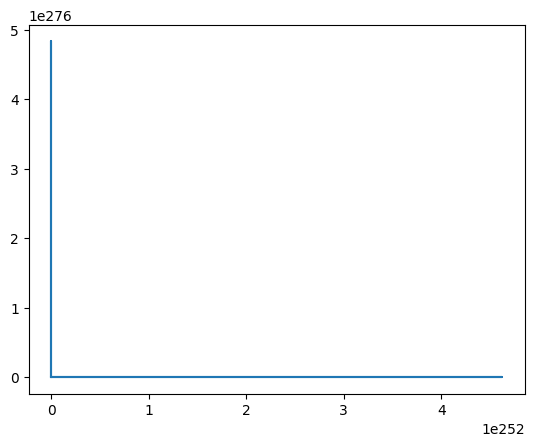

967th iteration, 761.327025381608


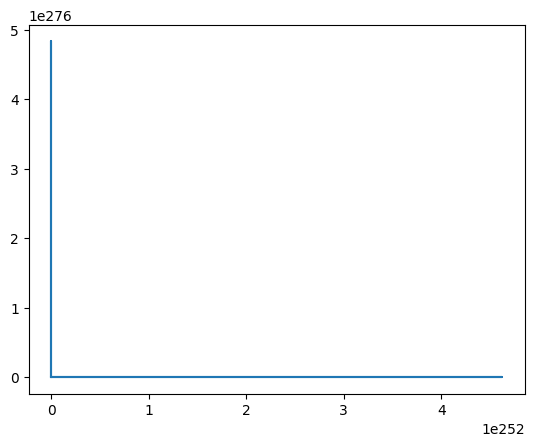

968th iteration, 761.3229386673984


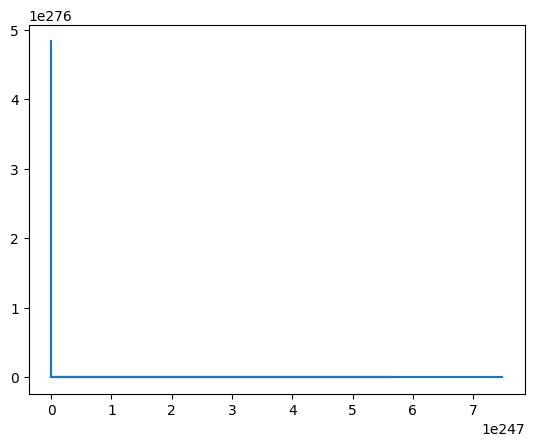

969th iteration, 761.3188519903464


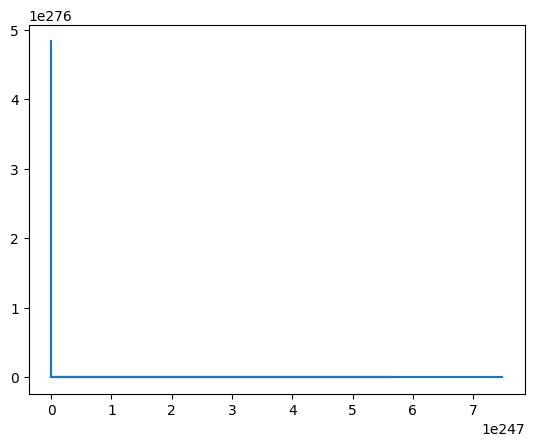

970th iteration, 761.3147653504517


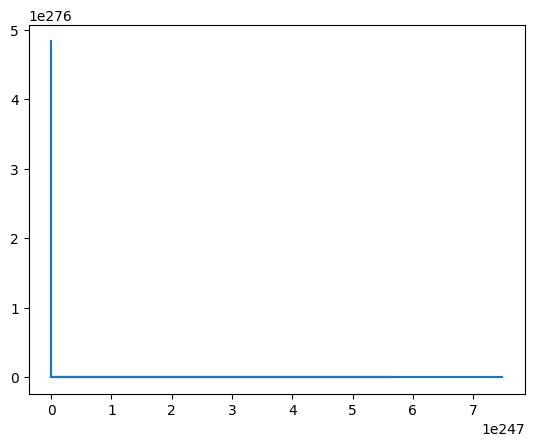

971th iteration, 761.3106787477142


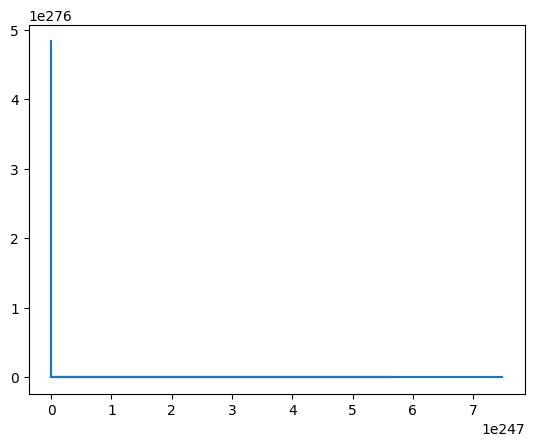

972th iteration, 761.3065921821328


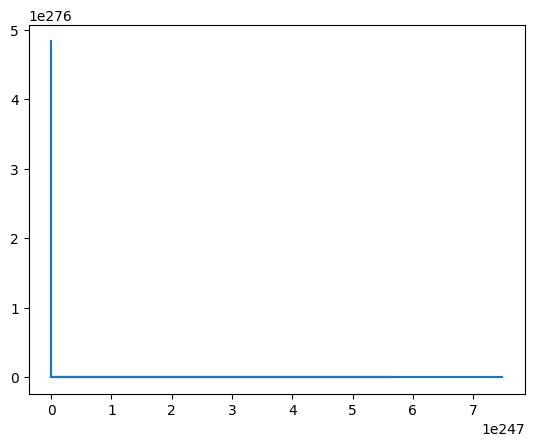

973th iteration, 761.3025056537081


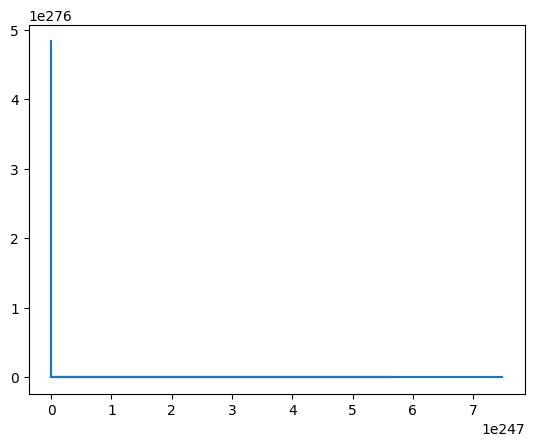

974th iteration, 761.2984191624389


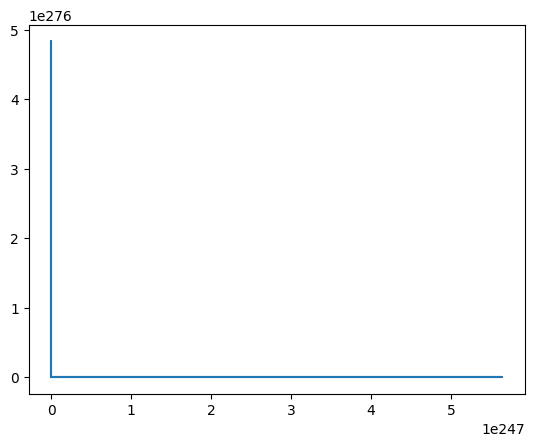

975th iteration, 761.2943327083254


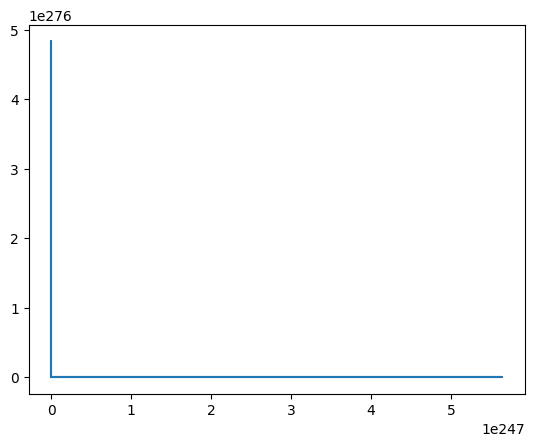

976th iteration, 761.2902462913667


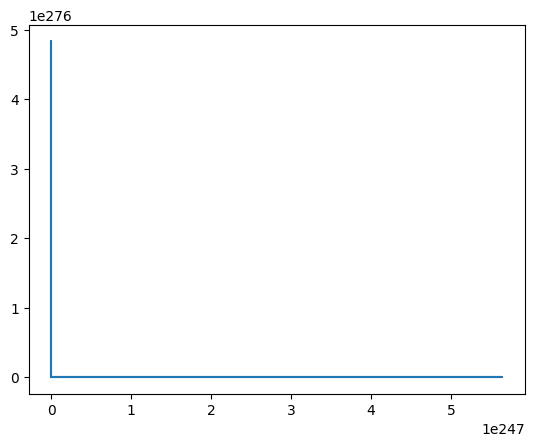

977th iteration, 761.2861599115627


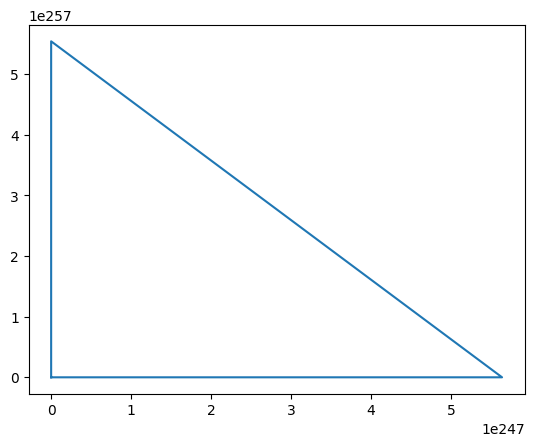

978th iteration, 761.282073568913


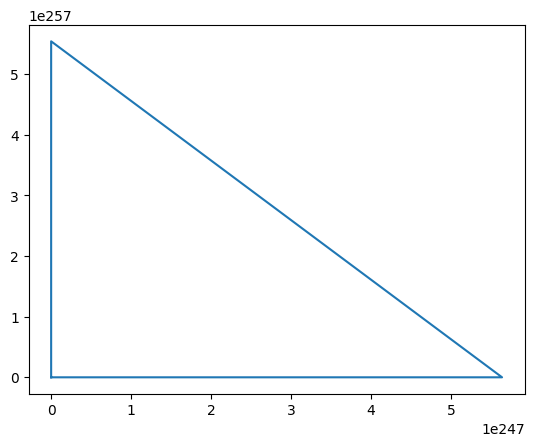

979th iteration, 761.2779872634172


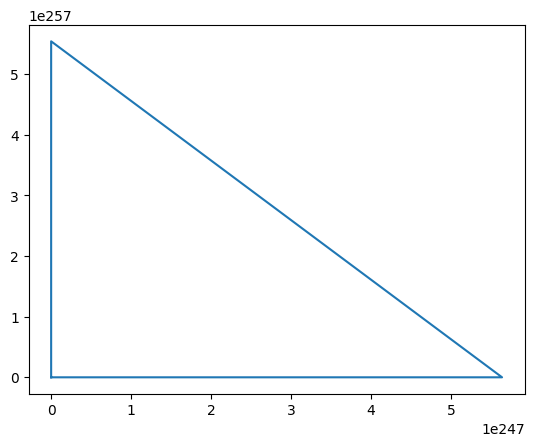

980th iteration, 761.273900995075


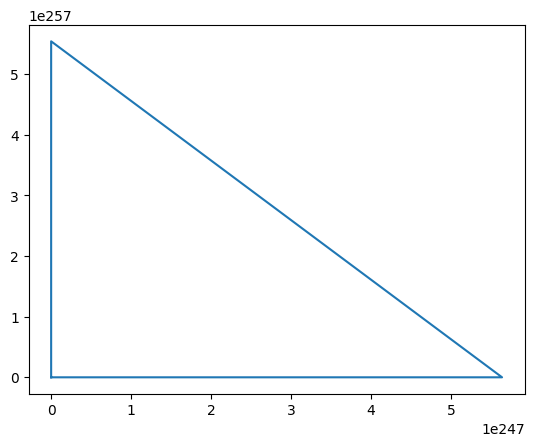

981th iteration, 761.2698147638854


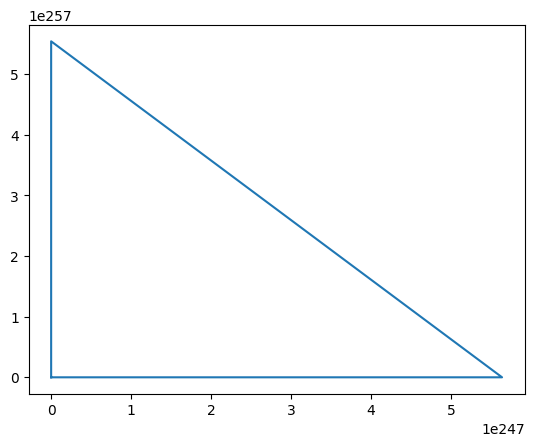

982th iteration, 761.2657285698491


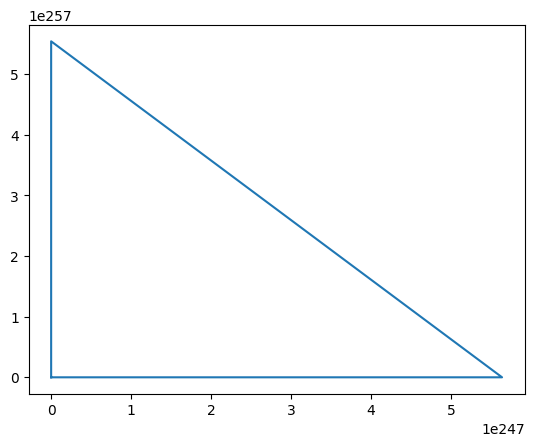

983th iteration, 761.2616424129651


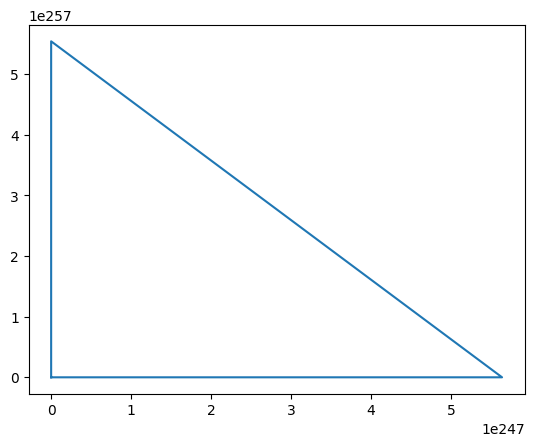

984th iteration, 761.2575562932333


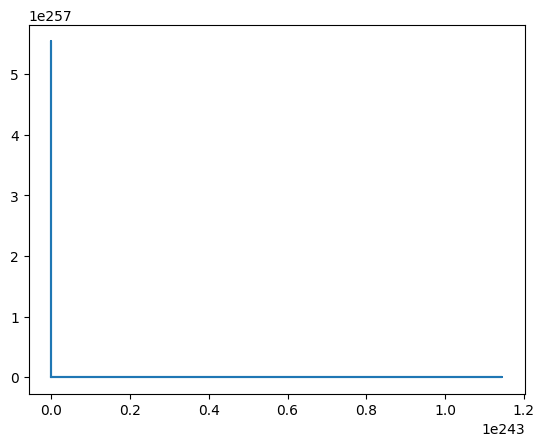

985th iteration, 761.2534702106531


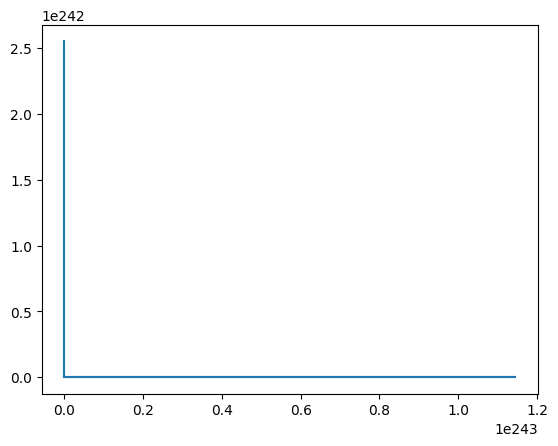

986th iteration, 761.2493841652238


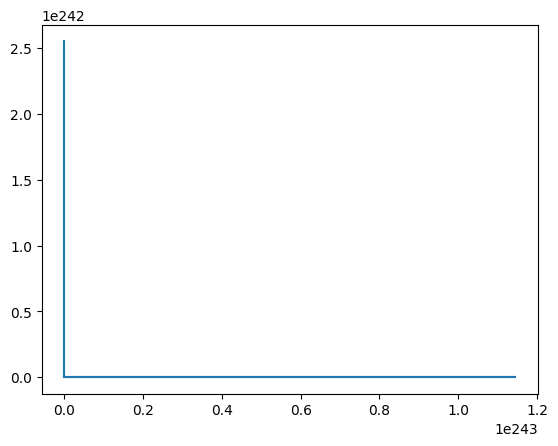

987th iteration, 761.2452981569454


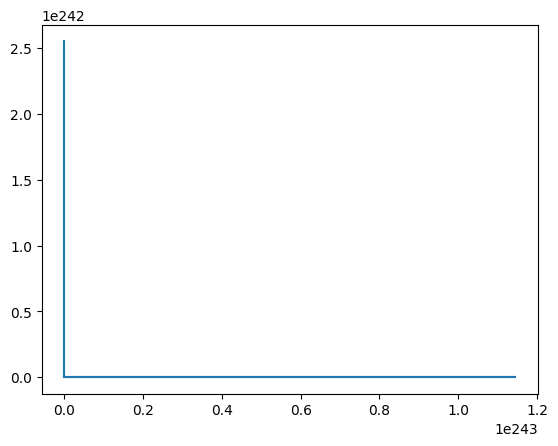

988th iteration, 761.2412121858177


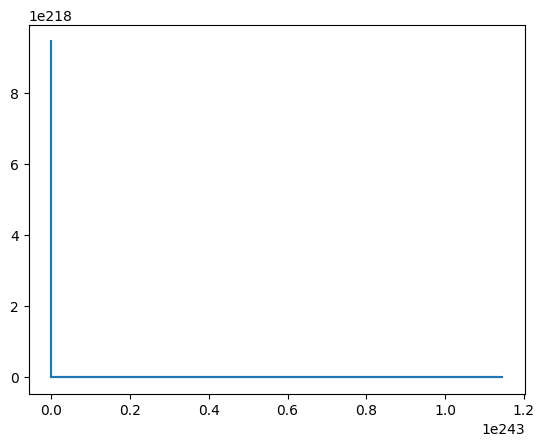

989th iteration, 761.2371262518406


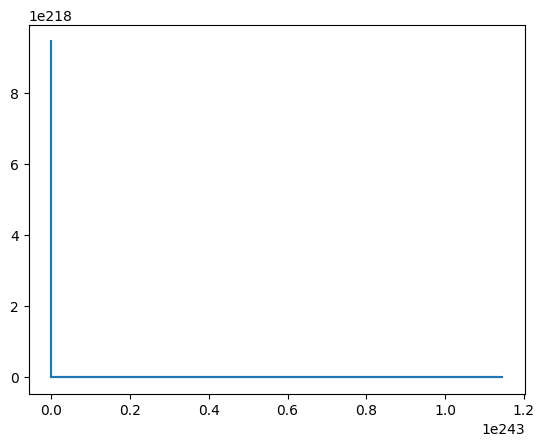

990th iteration, 761.2330403550126


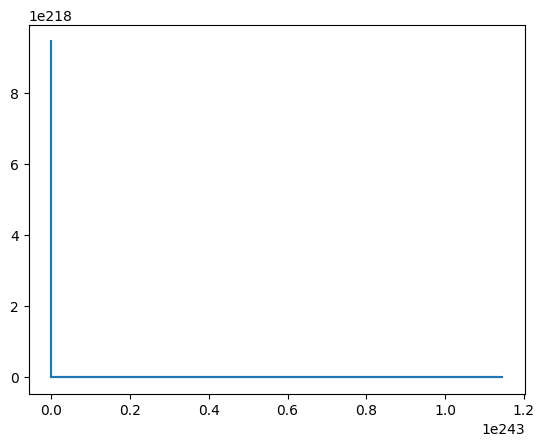

991th iteration, 761.2289544953344


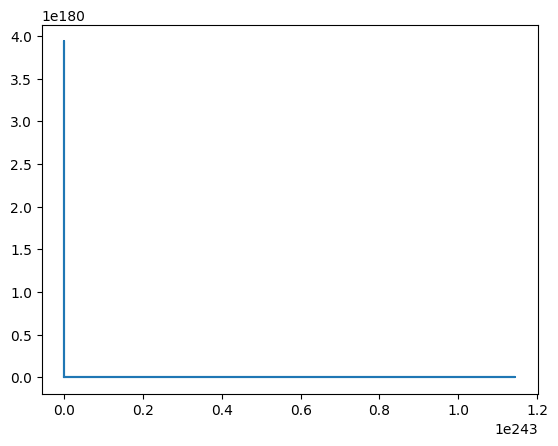

992th iteration, 761.2248686728049


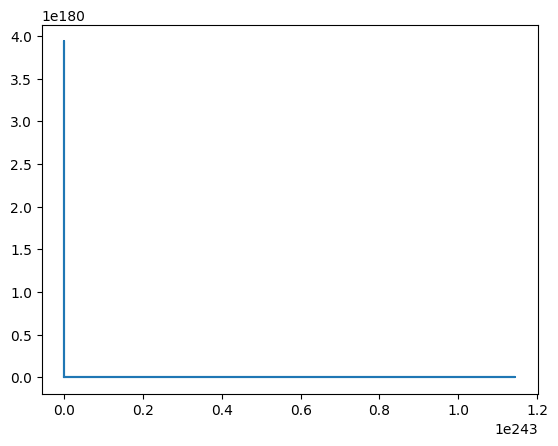

993th iteration, 761.2207828874241


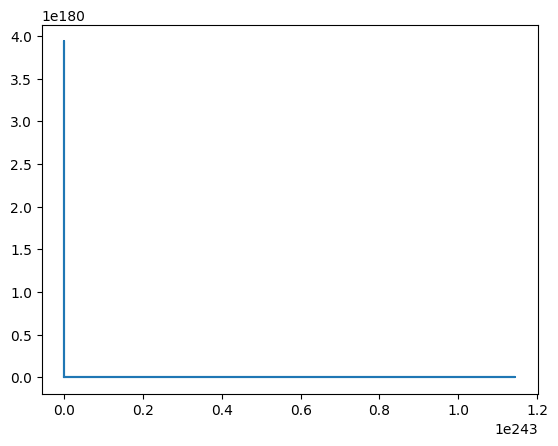

994th iteration, 761.2166971391915


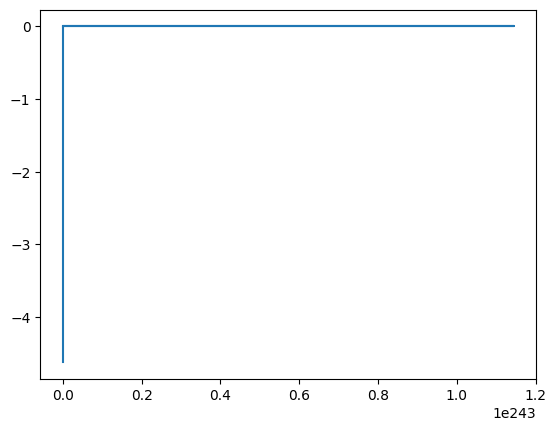

995th iteration, 761.2126114281073


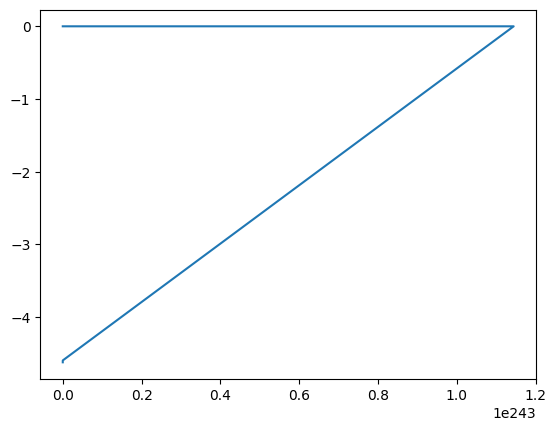

996th iteration, 761.2085257541702


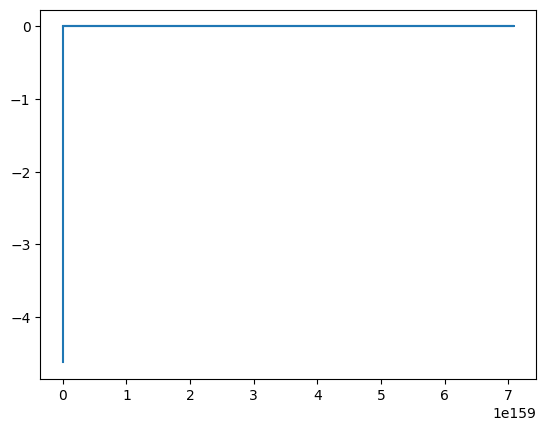

997th iteration, 761.2044401173799


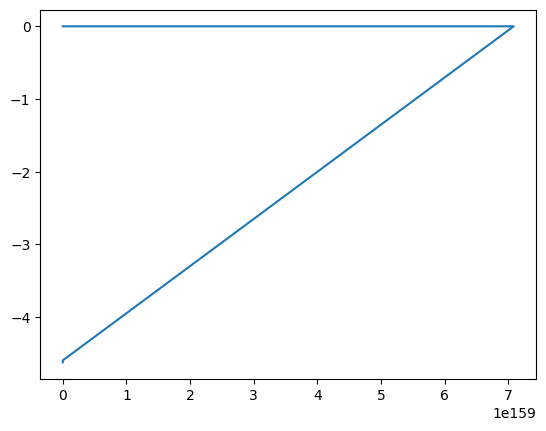

998th iteration, 761.2003545177372


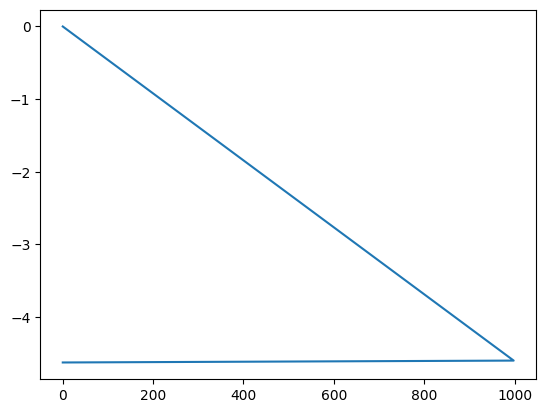

999th iteration, 761.1962689552403


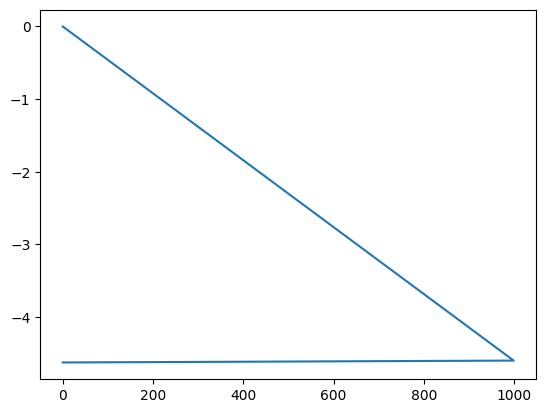

1000th iteration, 761.1921834298896


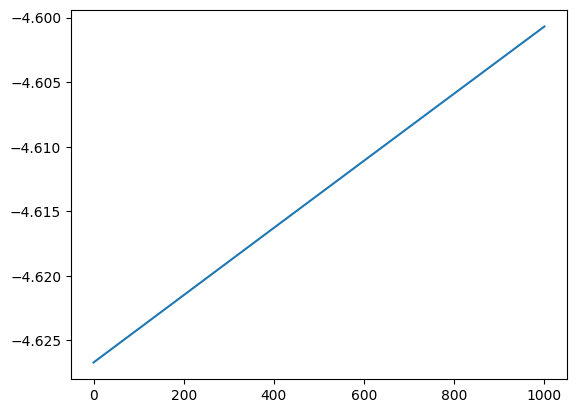

1001th iteration, 761.1880979416843


IndexError: index 1001 is out of bounds for axis 0 with size 1001

In [63]:
i = 0
iter = np.empty(1001)
w_1 = np.empty(1001)
cost_change = 1
while abs(cost_change) > 0.001 or i < 1000:
  pred = predict(number_train, x_train, w_para, b_para)
  loss = lossss(pred, y_train, number_train)
  temp_cost = cost_function(loss, lam, w_para)
  cost_change = abs(temp_cost - cost)
  cost = temp_cost
  w_para, b_para = grad_desc(w_para, b_para, pred, x_train, y_train, lam, alp, number_train)
  print(f'{i}th iteration, {cost}')
  w_1[i] = w_para[0]
  iter[i] = i
  plt.plot(iter, w_1)
  plt.show()
  i += 1
else:
  print('done')
  print(w_para)
  print(b_para)
  print(cost)
  print(f'done in {i} iterations')


In [64]:
print(w_para)
print(b_para)

[-4.60065594 -0.75392081 -3.94309975 -1.22232583  6.10488682]
23.647361075152435


In [ ]:
number_test = number - number_train
print(number_test)
x_test_list = []
for j in range(std_data.shape[1]):
    xj_test = np.zeros(number_test)
    for i in range(number_test):
        xj_test[i] = std_data.iloc[i + number_train, j]
    x_test_list.append(xj_test)  # Append xj_train directly to the list

# Separate the features (x_train) from the target (y_train)
x_test_tup = tuple(x_test_list[:-1]) # Exclude the last column (target)
x_test = np.column_stack(x_test_tup)
y_test = x_test_list[-1]  # The last column is the target

print(x_test)
#print(y_test)

In [ ]:
test_pred = predict(number_test, x_test, w_para, b_para)
test_loss = lossss(test_pred, y_test, number_test)
test_cost = cost_function(test_loss, lam, w_para)
print(test_cost)
test_rmse = rmse(test_loss)
print(test_rmse)